In [1]:
import json
import csv
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
from mplsoccer.pitch import Pitch
#import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
#match data loading
data = '{"playerIdNameDictionary":{"124106":"Leander Dendoncker","77636":"Willian José","97587":"Willy Boly","236519":"Romain Saïss","368547":"Ki-Jana Hoever","384887":"Vitinha","397328":"Christian Marques","337916":"Pedro Neto","238244":"Rúben Neves","296363":"Nélson Semedo","16161":"João Moutinho","23089":"Rui Patrício","140088":"Adama Traoré","115917":"Jonny","8643":"John Ruddy","97710":"Conor Coady","332867":"Morgan Gibbs-White","368310":"Maximilian Kilman","380655":"Fábio Silva","114147":"Alisson","115916":"Fabinho","108226":"Mohamed Salah","301455":"Konstantinos Tsimikas","243510":"Naby Keita","33568":"Georginio Wijnaldum","235755":"Diogo Jota","109915":"Sadio Mané","73399":"Adrián","74939":"Thiago","76304":"Xherdan Shaqiri","356743":"Ozan Kabak","381527":"Nathaniel Phillips","318871":"Trent Alexander-Arnold","355354":"Curtis Jones","84146":"Alex Oxlade-Chamberlain","4511":"James Milner","401782":"Rhys Williams","115726":"Andrew Robertson","386969":"Neco Williams"},"periodMinuteLimits":{"1":45,"2":90,"3":105,"4":120},"timeStamp":"2021-03-16 07:43:27","attendance":0,"venueName":"Molineux Stadium","referee":{"officialId":104,"firstName":"Craig","lastName":"Pawson","hasParticipatedMatches":false,"name":"Craig Pawson"},"weatherCode":"","elapsed":"FT","startTime":"2021-03-15T20:00:00","startDate":"2021-03-15T00:00:00","score":"0 : 1","htScore":"0 : 1","ftScore":"0 : 1","etScore":"","pkScore":"","statusCode":6,"periodCode":7,"home":{"teamId":161,"formations":[{"formationId":18,"formationName":"3412","captainPlayerId":97710,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":72,"jerseyNumbers":[11,22,19,15,16,27,8,28,7,37,12,2,17,18,20,21,32,49,75],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0],"playerIds":[23089,296363,115917,97587,97710,236519,238244,16161,337916,140088,77636,368547,380655,332867,384887,8643,124106,368310,397328],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":6.5,"horizontal":5.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5}]},{"formationId":18,"formationName":"3412","captainPlayerId":97710,"period":16,"startMinuteExpanded":72,"endMinuteExpanded":78,"jerseyNumbers":[11,22,19,15,16,27,8,28,17,37,12,2,12,18,20,21,32,49,75],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0],"playerIds":[23089,296363,115917,97587,97710,236519,238244,16161,380655,140088,77636,368547,77636,332867,384887,8643,124106,368310,397328],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":6.5,"horizontal":5.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5}],"subOnPlayerId":380655,"subOffPlayerId":77636},{"formationId":18,"formationName":"3412","captainPlayerId":97710,"period":16,"startMinuteExpanded":78,"endMinuteExpanded":86,"jerseyNumbers":[11,22,19,15,16,27,32,28,17,37,12,2,12,18,20,21,8,49,75],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0],"playerIds":[23089,296363,115917,97587,97710,236519,124106,16161,380655,140088,77636,368547,77636,332867,384887,8643,238244,368310,397328],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":6.5,"horizontal":5.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5}],"subOnPlayerId":124106,"subOffPlayerId":238244},{"formationId":17,"formationName":"3421","captainPlayerId":97710,"period":2,"startMinuteExpanded":86,"endMinuteExpanded":102,"jerseyNumbers":[11,37,19,15,16,27,32,28,17,7,18,2,20,21,49,75],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0],"playerIds":[23089,140088,115917,97587,97710,236519,124106,16161,380655,337916,332867,368547,384887,8643,368310,397328],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":9.0,"horizontal":5.0},{"vertical":7.5,"horizontal":3.5},{"vertical":7.5,"horizontal":6.5}]},{"formationId":17,"formationName":"3421","captainPlayerId":97710,"period":2,"startMinuteExpanded":102,"endMinuteExpanded":107,"jerseyNumbers":[21,37,19,15,16,27,32,28,17,7,18,2,20,11,49,75],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0],"playerIds":[8643,140088,115917,97587,97710,236519,124106,16161,380655,337916,332867,368547,384887,23089,368310,397328],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":9.0,"horizontal":5.0},{"vertical":7.5,"horizontal":3.5},{"vertical":7.5,"horizontal":6.5}],"subOnPlayerId":8643,"subOffPlayerId":23089}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,103,104,105,106,107,108,109,110],"ratings":{"0":6.01272727272727,"1":6.03818181818182,"2":6.04,"3":6.04,"4":6.09090909090909,"5":6.08727272727273,"7":6.08909090909091,"8":6.09090909090909,"9":6.09818181818182,"10":6.13272727272727,"11":6.13,"12":6.13272727272727,"13":6.12363636363636,"15":6.12363636363636,"16":6.13090909090909,"17":6.15,"18":6.15,"19":6.15090909090909,"20":6.15545454545455,"21":6.17272727272727,"22":6.19,"23":6.19818181818182,"24":6.19363636363636,"25":6.21181818181818,"26":6.21,"27":6.21909090909091,"28":6.21818181818182,"29":6.22272727272727,"30":6.24727272727273,"31":6.25181818181818,"32":6.26090909090909,"33":6.28636363636364,"34":6.29,"35":6.30090909090909,"36":6.29818181818182,"37":6.31,"38":6.31,"39":6.32909090909091,"40":6.33909090909091,"41":6.35545454545455,"42":6.37090909090909,"43":6.38636363636364,"44":6.39909090909091,"45":6.39909090909091,"46":6.17727272727273,"47":6.17636363636364,"48":6.20181818181818,"49":6.21090909090909,"50":6.21090909090909,"51":6.27,"52":6.28090909090909,"53":6.27818181818182,"54":6.26,"55":6.25727272727273,"56":6.25909090909091,"57":6.28090909090909,"58":6.27909090909091,"59":6.28636363636364,"60":6.31272727272727,"61":6.33272727272727,"62":6.32818181818182,"63":6.33909090909091,"64":6.33727272727273,"65":6.33454545454545,"66":6.35272727272727,"67":6.37818181818182,"68":6.39545454545455,"69":6.39363636363636,"70":6.39545454545454,"71":6.39727272727273,"72":6.36833333333333,"73":6.36833333333333,"74":6.375,"75":6.405,"76":6.405,"77":6.4075,"78":6.38923076923077,"79":6.4,"80":6.41307692307692,"81":6.45153846153846,"82":6.51538461538462,"84":6.52307692307692,"85":6.54307692307692,"86":6.50285714285714,"87":6.50142857142857,"88":6.51142857142857,"102":6.47733333333333,"103":6.476,"104":6.47533333333333,"105":6.47733333333333,"106":6.48066666666667,"107":6.48266666666667,"108":6.48066666666667,"109":6.52466666666667,"110":6.52866666666667},"shotsTotal":{"4":1.0,"10":1.0,"42":1.0,"44":1.0,"51":2.0,"66":1.0,"75":1.0,"81":1.0,"107":1.0},"shotsOnTarget":{"4":1.0,"42":1.0,"75":1.0,"81":1.0,"107":1.0},"shotsOffTarget":{"44":1.0,"51":1.0},"shotsBlocked":{"10":1.0,"51":1.0,"66":1.0},"clearances":{"0":1.0,"2":1.0,"9":1.0,"19":1.0,"21":1.0,"22":1.0,"30":2.0,"57":1.0,"59":1.0,"66":1.0,"105":1.0,"106":1.0},"interceptions":{"1":1.0,"20":1.0,"21":1.0,"29":1.0,"31":1.0,"32":1.0,"33":2.0,"35":1.0,"39":2.0,"40":1.0,"44":1.0,"48":1.0,"61":1.0,"68":1.0,"75":1.0,"79":1.0,"82":1.0,"85":2.0},"possession":{"0":12.0,"1":4.0,"3":13.0,"4":3.0,"5":10.0,"7":6.0,"8":11.0,"9":14.0,"10":14.0,"11":5.0,"12":1.0,"13":3.0,"15":6.0,"16":7.0,"17":20.0,"18":4.0,"19":7.0,"20":3.0,"21":1.0,"22":1.0,"23":2.0,"24":2.0,"25":7.0,"26":4.0,"27":1.0,"28":5.0,"29":9.0,"30":4.0,"31":6.0,"32":7.0,"33":4.0,"34":20.0,"35":9.0,"37":7.0,"38":2.0,"39":4.0,"40":10.0,"41":6.0,"43":5.0,"44":8.0,"45":8.0,"46":2.0,"47":2.0,"48":10.0,"50":3.0,"51":6.0,"52":7.0,"53":8.0,"55":5.0,"56":16.0,"57":9.0,"58":2.0,"59":7.0,"60":4.0,"61":4.0,"62":12.0,"63":2.0,"64":6.0,"65":2.0,"66":7.0,"67":7.0,"68":13.0,"69":1.0,"70":8.0,"71":7.0,"72":3.0,"73":3.0,"74":3.0,"75":1.0,"76":9.0,"77":15.0,"78":10.0,"79":6.0,"80":1.0,"81":9.0,"82":2.0,"84":6.0,"85":2.0,"86":4.0,"103":1.0,"104":5.0,"106":5.0,"107":13.0,"108":4.0,"109":8.0,"110":7.0},"touches":{"0":14.0,"1":7.0,"2":2.0,"3":17.0,"4":6.0,"5":12.0,"6":2.0,"7":6.0,"8":13.0,"9":16.0,"10":17.0,"11":7.0,"12":3.0,"13":5.0,"15":6.0,"16":8.0,"17":22.0,"18":4.0,"19":10.0,"20":4.0,"21":3.0,"22":4.0,"23":2.0,"24":2.0,"25":9.0,"26":6.0,"27":5.0,"28":6.0,"29":11.0,"30":9.0,"31":9.0,"32":8.0,"33":8.0,"34":20.0,"35":11.0,"36":1.0,"37":8.0,"38":4.0,"39":7.0,"40":11.0,"41":7.0,"42":1.0,"43":5.0,"44":11.0,"45":8.0,"46":3.0,"47":2.0,"48":12.0,"49":4.0,"50":4.0,"51":10.0,"52":10.0,"53":8.0,"54":2.0,"55":5.0,"56":17.0,"57":13.0,"58":4.0,"59":9.0,"60":6.0,"61":6.0,"62":14.0,"63":3.0,"64":7.0,"65":2.0,"66":9.0,"67":12.0,"68":15.0,"69":1.0,"70":10.0,"71":7.0,"72":5.0,"73":4.0,"74":6.0,"75":3.0,"76":10.0,"77":16.0,"78":11.0,"79":9.0,"80":3.0,"81":12.0,"82":6.0,"84":9.0,"85":7.0,"86":6.0,"88":1.0,"103":1.0,"104":5.0,"105":1.0,"106":6.0,"107":15.0,"108":5.0,"109":14.0,"110":7.0},"passesTotal":{"0":12.0,"1":3.0,"3":13.0,"4":3.0,"5":9.0,"7":6.0,"8":11.0,"9":14.0,"10":13.0,"11":5.0,"13":3.0,"15":6.0,"16":7.0,"17":19.0,"18":2.0,"19":6.0,"20":3.0,"22":1.0,"23":2.0,"25":7.0,"26":4.0,"28":5.0,"29":9.0,"30":4.0,"31":5.0,"32":7.0,"33":4.0,"34":20.0,"35":9.0,"37":7.0,"38":1.0,"39":4.0,"40":8.0,"41":5.0,"43":5.0,"44":7.0,"45":8.0,"46":2.0,"47":2.0,"48":9.0,"50":2.0,"51":3.0,"52":7.0,"53":7.0,"55":5.0,"56":16.0,"57":9.0,"58":2.0,"59":7.0,"60":4.0,"61":4.0,"62":12.0,"64":6.0,"65":2.0,"66":4.0,"67":6.0,"68":13.0,"70":8.0,"71":6.0,"72":3.0,"73":2.0,"75":1.0,"76":9.0,"77":14.0,"78":10.0,"79":6.0,"80":1.0,"81":7.0,"82":2.0,"84":6.0,"85":2.0,"86":4.0,"104":5.0,"106":5.0,"107":12.0,"108":4.0,"109":7.0,"110":3.0,"12":1.0,"21":1.0,"24":2.0,"27":1.0,"63":2.0,"69":1.0,"74":3.0,"103":1.0},"passesAccurate":{"0":11.0,"1":2.0,"3":11.0,"4":2.0,"5":6.0,"7":5.0,"8":10.0,"9":12.0,"10":13.0,"11":3.0,"13":2.0,"15":6.0,"16":6.0,"17":19.0,"18":2.0,"19":4.0,"20":1.0,"22":1.0,"23":1.0,"25":6.0,"26":4.0,"28":3.0,"29":6.0,"30":4.0,"31":4.0,"32":5.0,"33":3.0,"34":19.0,"35":6.0,"37":5.0,"38":1.0,"39":3.0,"40":8.0,"41":3.0,"43":3.0,"44":6.0,"45":7.0,"46":1.0,"47":1.0,"48":7.0,"50":1.0,"51":2.0,"52":5.0,"53":6.0,"55":3.0,"56":15.0,"57":7.0,"58":2.0,"59":4.0,"60":2.0,"61":2.0,"62":11.0,"64":3.0,"65":1.0,"66":3.0,"67":6.0,"68":11.0,"70":7.0,"71":5.0,"72":2.0,"73":1.0,"75":1.0,"76":9.0,"77":14.0,"78":9.0,"79":4.0,"80":1.0,"81":5.0,"82":1.0,"84":4.0,"85":1.0,"86":4.0,"104":3.0,"106":3.0,"107":12.0,"108":2.0,"109":5.0,"110":3.0},"passesKey":{"4":1.0,"10":1.0,"51":2.0,"75":1.0,"81":1.0},"passSuccess":{"0":91.67,"1":66.67,"3":84.62,"4":66.67,"5":66.67,"7":83.33,"8":90.91,"9":85.71,"10":100.0,"11":60.0,"13":66.67,"15":100.0,"16":85.71,"17":100.0,"18":100.0,"19":66.67,"20":33.33,"22":100.0,"23":50.0,"25":85.71,"26":100.0,"28":60.0,"29":66.67,"30":100.0,"31":80.0,"32":71.43,"33":75.0,"34":95.0,"35":66.67,"37":71.43,"38":100.0,"39":75.0,"40":100.0,"41":60.0,"43":60.0,"44":85.71,"45":87.5,"46":50.0,"47":50.0,"48":77.78,"50":50.0,"51":66.67,"52":71.43,"53":85.71,"55":60.0,"56":93.75,"57":77.78,"58":100.0,"59":57.14,"60":50.0,"61":50.0,"62":91.67,"64":50.0,"65":50.0,"66":75.0,"67":100.0,"68":84.62,"70":87.5,"71":83.33,"72":66.67,"73":50.0,"75":100.0,"76":100.0,"77":100.0,"78":90.0,"79":66.67,"80":100.0,"81":71.43,"82":50.0,"84":66.67,"85":50.0,"86":100.0,"104":60.0,"106":60.0,"107":100.0,"108":50.0,"109":71.43,"110":100.0,"12":0.0,"21":0.0,"24":0.0,"27":0.0,"63":0.0,"69":0.0,"74":0.0,"103":0.0},"aerialsTotal":{"0":1.0,"1":1.0,"10":1.0,"16":1.0,"23":1.0,"25":1.0,"30":1.0,"33":1.0,"41":3.0,"43":2.0,"51":2.0,"61":1.0,"63":2.0,"66":3.0,"68":1.0,"72":1.0,"74":3.0,"78":4.0,"81":1.0,"5":1.0,"12":1.0,"19":1.0,"24":1.0,"40":1.0,"44":2.0,"46":1.0,"55":1.0,"84":1.0,"85":1.0,"110":1.0},"aerialsWon":{"0":1.0,"1":1.0,"10":1.0,"16":1.0,"23":1.0,"25":1.0,"30":1.0,"33":1.0,"41":2.0,"43":2.0,"51":1.0,"61":1.0,"63":2.0,"66":2.0,"68":1.0,"72":1.0,"74":1.0,"78":2.0,"81":1.0},"aerialSuccess":{"41":200.0,"51":100.0,"66":200.0,"74":50.0,"78":100.0,"5":0.0,"12":0.0,"19":0.0,"24":0.0,"40":0.0,"44":0.0,"46":0.0,"55":0.0,"84":0.0,"85":0.0,"110":0.0},"offensiveAerials":{"1":1.0,"5":1.0,"10":1.0,"12":1.0,"24":1.0,"25":1.0,"40":1.0,"41":3.0,"43":1.0,"51":2.0,"66":2.0,"68":1.0,"74":2.0,"78":4.0,"81":1.0,"84":1.0,"110":1.0},"defensiveAerials":{"0":1.0,"16":1.0,"19":1.0,"23":1.0,"30":1.0,"33":1.0,"43":1.0,"44":2.0,"46":1.0,"55":1.0,"61":1.0,"63":2.0,"66":1.0,"72":1.0,"74":1.0,"85":1.0},"cornersTotal":{"18":1.0,"41":1.0,"51":1.0},"cornersAccurate":{"18":1.0,"51":1.0},"throwInsTotal":{"3":1.0,"6":2.0,"11":1.0,"17":1.0,"26":1.0,"27":1.0,"31":1.0,"46":1.0,"49":1.0,"50":1.0,"62":1.0,"63":1.0,"64":1.0,"67":1.0,"70":1.0,"77":1.0,"85":1.0},"throwInsAccurate":{"3":1.0,"6":1.0,"11":1.0,"17":1.0,"27":1.0,"31":1.0,"46":1.0,"50":1.0,"62":1.0,"63":1.0,"64":1.0,"67":1.0,"70":1.0,"77":1.0,"85":1.0},"throwInAccuracy":{"18":100.0,"51":100.0,"41":0.0},"offsidesCaught":{"33":1.0,"86":1.0},"foulsCommited":{"4":1.0,"21":1.0,"30":1.0,"31":1.0,"36":1.0,"49":1.0,"54":2.0,"58":1.0,"60":1.0,"62":1.0,"63":1.0,"65":1.0,"79":1.0,"87":1.0,"103":1.0,"105":1.0},"tacklesTotal":{"22":1.0,"27":1.0,"30":1.0,"37":1.0,"57":3.0,"60":1.0,"67":1.0,"79":2.0,"80":1.0,"84":1.0,"88":1.0,"10":1.0,"36":1.0,"49":2.0,"52":1.0,"74":1.0,"12":1.0,"13":1.0,"19":2.0,"20":1.0,"21":1.0,"39":1.0,"53":1.0},"tackleSuccessful":{"22":1.0,"27":1.0,"30":1.0,"37":1.0,"57":2.0,"60":1.0,"67":1.0,"79":1.0,"80":1.0,"84":1.0,"88":1.0,"10":1.0,"36":1.0,"49":2.0,"52":1.0,"74":1.0},"tackleUnsuccesful":{"12":1.0,"13":1.0,"19":2.0,"20":1.0,"21":1.0,"39":1.0,"53":1.0,"57":1.0,"79":1.0},"tackleSuccess":{"22":100.0,"27":100.0,"30":100.0,"37":100.0,"57":66.67,"60":100.0,"67":100.0,"79":50.0,"80":100.0,"84":100.0,"88":100.0,"10":100.0,"36":100.0,"49":100.0,"52":100.0,"74":100.0,"12":0.0,"13":0.0,"19":0.0,"20":0.0,"21":0.0,"39":0.0,"53":0.0},"dribbledPast":{"12":1.0,"13":1.0,"19":2.0,"20":1.0,"21":1.0,"39":1.0,"53":1.0,"57":1.0,"79":1.0},"dribblesWon":{"4":2.0,"17":1.0,"48":1.0,"51":1.0,"60":1.0,"67":1.0,"109":4.0},"dribblesAttempted":{"4":2.0,"17":1.0,"48":1.0,"51":1.0,"60":1.0,"67":2.0,"109":5.0,"57":1.0,"86":1.0},"dribblesLost":{"57":1.0,"67":1.0,"86":1.0,"109":1.0},"dribbleSuccess":{"4":100.0,"17":100.0,"48":100.0,"51":100.0,"60":100.0,"67":50.0,"109":80.0,"57":0.0,"86":0.0},"dispossessed":{"13":1.0,"19":1.0,"26":1.0,"27":1.0,"49":1.0,"56":1.0,"58":1.0,"74":1.0,"84":1.0,"108":1.0},"errors":{"46":1.0}},"incidentEvents":[{"id":2276370095.0,"eventId":386,"minute":36,"second":9,"teamId":161,"playerId":238244,"x":0.0,"y":0.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2276400597.0,"eventId":966,"minute":46,"second":20,"teamId":161,"playerId":23089,"x":50.0,"y":50.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":51,"displayName":"Error"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":170,"displayName":"LeadingToGoal"}}],"satisfiedEventsTypes":[97],"isTouch":false},{"id":2276383849.0,"eventId":549,"minute":51,"second":58,"teamId":161,"playerId":236519,"x":0.0,"y":0.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2276389039.0,"eventId":735,"minute":69,"second":14,"teamId":161,"playerId":77636,"relatedEventId":736,"relatedPlayerId":380655,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"736"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"12"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276389045.0,"eventId":736,"minute":69,"second":14,"teamId":161,"playerId":380655,"relatedEventId":735,"relatedPlayerId":77636,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"735"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276390753.0,"eventId":803,"minute":75,"second":34,"teamId":161,"playerId":238244,"relatedEventId":804,"relatedPlayerId":124106,"x":0.0,"y":0.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"804"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276390755.0,"eventId":804,"minute":75,"second":34,"teamId":161,"playerId":124106,"relatedEventId":803,"relatedPlayerId":238244,"x":0.0,"y":0.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"803"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"32"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276392395.0,"eventId":876,"minute":83,"second":22,"teamId":161,"playerId":296363,"relatedEventId":877,"relatedPlayerId":332867,"x":0.0,"y":0.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"877"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"22"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276392397.0,"eventId":877,"minute":83,"second":22,"teamId":161,"playerId":332867,"relatedEventId":876,"relatedPlayerId":296363,"x":0.0,"y":0.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"876"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"18"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"2"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276392681.0,"eventId":883,"minute":83,"second":23,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"23089,140088,115917,97587,97710,236519,124106,16161,380655,337916,332867,368547,384887,8643,368310,397328"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11, 37, 19, 15, 16, 27, 32, 28, 17, 7, 18, 2, 20, 21, 49, 75"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"97710"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"17"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276394585.0,"eventId":892,"minute":99,"second":53,"teamId":161,"playerId":23089,"relatedEventId":893,"relatedPlayerId":8643,"x":0.0,"y":0.0,"expandedMinute":102,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"893"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Goalkeeper"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276394587.0,"eventId":893,"minute":99,"second":53,"teamId":161,"playerId":8643,"relatedEventId":892,"relatedPlayerId":23089,"x":0.0,"y":0.0,"expandedMinute":102,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"21"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"1"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"892"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Goalkeeper"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276326051.0,"eventId":1,"minute":0,"second":0,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":130,"displayName":"TeamFormation"},"value":"18"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"23089,296363,115917,97587,97710,236519,238244,16161,337916,140088,77636,368547,380655,332867,384887,8643,124106,368310,397328"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"97710"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11, 22, 19, 15, 16, 27, 8, 28, 7, 37, 12, 2, 17, 18, 20, 21, 32, 49, 75"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{}},"missHighRight":{"stats":{}},"missLeft":{"stats":{"44":{"goalCount":0,"count":1}}},"missRight":{"stats":{"51":{"goalCount":0,"count":1}}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{}},"onTargetHighLeft":{"stats":{}},"onTargetHighCentre":{"stats":{"107":{"goalCount":0,"count":1}}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{"51":{"goalCount":0,"count":1}}},"onTargetLowCentre":{"stats":{"66":{"goalCount":0,"count":1},"75":{"goalCount":0,"count":1},"81":{"goalCount":0,"count":1}}},"onTargetLowRight":{"stats":{"4":{"goalCount":0,"count":1},"10":{"goalCount":0,"count":1},"42":{"goalCount":0,"count":1}}}},"name":"Wolves","countryName":"England","players":[{"playerId":23089,"shirtNo":11,"name":"Rui Patrício","position":"GK","height":190,"weight":84,"age":33,"isFirstEleven":true,"subbedInPlayerId":8643,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":102,"isManOfTheMatch":false,"field":"home","stats":{"totalSaves":{"81":1.0,"82":2.0},"collected":{"81":1.0,"82":1.0},"parriedSafe":{"82":1.0},"possession":{"3":1.0,"5":1.0,"7":1.0,"8":1.0,"19":1.0,"22":1.0,"24":1.0,"35":1.0,"37":1.0,"43":1.0,"48":1.0,"53":1.0,"55":1.0,"59":1.0,"62":1.0,"65":1.0,"66":1.0,"73":1.0,"76":1.0,"79":1.0,"81":1.0,"84":1.0},"ratings":{"0":6.0,"3":6.01,"5":6.02,"7":6.03,"8":6.03,"12":6.0,"19":5.98,"21":6.18,"22":6.18,"24":6.17,"35":6.15,"37":6.16,"43":6.17,"46":5.07,"48":5.08,"53":5.08,"55":5.08,"59":5.09,"62":5.09,"65":5.07,"66":5.08,"73":5.09,"76":5.1,"79":5.09,"81":5.19,"82":5.93,"84":5.93},"interceptions":{"21":1.0},"touches":{"3":1.0,"5":1.0,"7":1.0,"8":1.0,"19":1.0,"21":1.0,"22":1.0,"24":1.0,"35":1.0,"37":1.0,"43":1.0,"48":1.0,"53":1.0,"55":1.0,"59":1.0,"62":1.0,"65":1.0,"66":1.0,"73":1.0,"76":1.0,"79":1.0,"81":2.0,"82":2.0,"84":1.0},"passesTotal":{"3":1.0,"7":1.0,"8":1.0,"22":1.0,"37":1.0,"43":1.0,"53":1.0,"55":1.0,"59":1.0,"62":1.0,"76":1.0,"19":1.0,"24":1.0,"35":1.0,"65":1.0,"79":1.0,"84":1.0},"passesAccurate":{"3":1.0,"7":1.0,"8":1.0,"22":1.0,"37":1.0,"43":1.0,"53":1.0,"55":1.0,"59":1.0,"62":1.0,"76":1.0},"passSuccess":{"3":100.0,"7":100.0,"8":100.0,"22":100.0,"37":100.0,"43":100.0,"53":100.0,"55":100.0,"59":100.0,"62":100.0,"76":100.0,"19":0.0,"24":0.0,"35":0.0,"65":0.0,"79":0.0,"84":0.0},"tacklesTotal":{"12":1.0},"tackleUnsuccesful":{"12":1.0},"dribbledPast":{"12":1.0},"errors":{"46":1.0}}},{"playerId":97587,"shirtNo":15,"name":"Willy Boly","position":"DC","height":195,"weight":92,"age":30,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":2.0,"3":1.0,"4":1.0,"9":1.0,"10":3.0,"11":1.0,"12":1.0,"15":2.0,"16":1.0,"17":3.0,"24":1.0,"25":1.0,"26":1.0,"28":2.0,"29":2.0,"30":1.0,"31":2.0,"33":1.0,"41":1.0,"44":2.0,"45":1.0,"51":2.0,"52":2.0,"56":1.0,"57":1.0,"58":1.0,"61":1.0,"62":2.0,"65":1.0,"66":1.0,"68":1.0,"71":1.0,"76":1.0,"77":3.0,"84":2.0,"85":1.0,"86":1.0,"104":1.0,"107":1.0},"ratings":{"0":6.0,"1":6.08,"2":6.13,"3":6.13,"4":6.13,"9":6.13,"10":6.13,"11":6.13,"12":6.13,"15":6.13,"16":6.22,"17":6.39,"19":6.48,"21":6.53,"24":6.51,"25":6.51,"26":6.52,"28":6.49,"29":6.48,"30":6.57,"31":6.57,"33":6.58,"41":6.64,"44":6.64,"45":6.63,"46":6.43,"49":6.41,"51":6.49,"52":6.49,"54":6.44,"56":6.44,"57":6.49,"58":6.49,"60":6.63,"61":6.62,"62":6.62,"65":6.63,"66":6.63,"68":6.64,"71":6.64,"76":6.64,"77":6.64,"79":6.63,"80":6.67,"84":6.68,"85":6.86,"86":6.87,"88":7.0,"104":6.99,"105":6.97,"107":6.98},"shotsTotal":{"51":1.0},"shotsBlocked":{"51":1.0},"clearances":{"2":1.0,"21":1.0,"57":1.0},"interceptions":{"85":1.0},"touches":{"1":2.0,"2":1.0,"3":1.0,"4":1.0,"9":1.0,"10":3.0,"11":1.0,"12":1.0,"15":2.0,"16":1.0,"17":4.0,"19":1.0,"21":1.0,"24":1.0,"25":1.0,"26":1.0,"28":2.0,"29":2.0,"30":1.0,"31":2.0,"33":1.0,"41":1.0,"44":2.0,"45":1.0,"51":3.0,"52":2.0,"54":1.0,"56":1.0,"57":2.0,"58":1.0,"60":1.0,"61":1.0,"62":2.0,"65":1.0,"66":1.0,"68":1.0,"71":1.0,"72":1.0,"76":1.0,"77":3.0,"80":1.0,"84":2.0,"85":2.0,"86":1.0,"88":1.0,"104":1.0,"107":1.0},"passesTotal":{"1":2.0,"3":1.0,"4":1.0,"10":3.0,"11":1.0,"15":2.0,"16":1.0,"17":3.0,"25":1.0,"26":1.0,"29":2.0,"30":1.0,"31":2.0,"33":1.0,"44":2.0,"51":2.0,"52":2.0,"56":1.0,"58":1.0,"62":2.0,"65":1.0,"66":1.0,"68":1.0,"76":1.0,"77":3.0,"84":2.0,"86":1.0,"107":1.0,"9":1.0,"12":1.0,"24":1.0,"28":2.0,"41":1.0,"45":1.0,"57":1.0,"61":1.0,"71":1.0,"85":1.0,"104":1.0},"passesAccurate":{"1":1.0,"3":1.0,"4":1.0,"10":3.0,"11":1.0,"15":2.0,"16":1.0,"17":3.0,"25":1.0,"26":1.0,"29":1.0,"30":1.0,"31":1.0,"33":1.0,"44":1.0,"51":1.0,"52":1.0,"56":1.0,"58":1.0,"62":2.0,"65":1.0,"66":1.0,"68":1.0,"76":1.0,"77":3.0,"84":2.0,"86":1.0,"107":1.0},"passSuccess":{"1":50.0,"3":100.0,"4":100.0,"10":100.0,"11":100.0,"15":100.0,"16":100.0,"17":100.0,"25":100.0,"26":100.0,"29":50.0,"30":100.0,"31":50.0,"33":100.0,"44":50.0,"51":50.0,"52":50.0,"56":100.0,"58":100.0,"62":100.0,"65":100.0,"66":100.0,"68":100.0,"76":100.0,"77":100.0,"84":100.0,"86":100.0,"107":100.0,"9":0.0,"12":0.0,"24":0.0,"28":0.0,"41":0.0,"45":0.0,"57":0.0,"61":0.0,"71":0.0,"85":0.0,"104":0.0},"aerialsTotal":{"1":1.0,"16":1.0,"30":1.0,"41":2.0,"51":1.0},"aerialsWon":{"1":1.0,"16":1.0,"30":1.0,"41":1.0,"51":1.0},"aerialSuccess":{"41":100.0},"offensiveAerials":{"1":1.0,"41":2.0,"51":1.0},"defensiveAerials":{"16":1.0,"30":1.0},"foulsCommited":{"49":1.0,"54":1.0,"79":1.0,"105":1.0},"tacklesTotal":{"60":1.0,"88":1.0},"tackleSuccessful":{"60":1.0,"88":1.0},"tackleSuccess":{"60":100.0,"88":100.0},"dribblesWon":{"17":1.0},"dribblesAttempted":{"17":1.0},"dribbleSuccess":{"17":100.0}}},{"playerId":236519,"shirtNo":27,"name":"Romain Saïss","position":"DC","height":190,"weight":80,"age":30,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":1.0,"3":2.0,"5":1.0,"7":2.0,"8":2.0,"9":2.0,"11":1.0,"25":1.0,"26":1.0,"27":1.0,"32":2.0,"33":1.0,"34":4.0,"39":1.0,"45":1.0,"48":2.0,"51":1.0,"55":1.0,"56":1.0,"57":2.0,"59":2.0,"62":1.0,"63":1.0,"68":2.0,"70":1.0,"71":1.0,"72":1.0,"73":1.0,"76":1.0,"77":2.0,"78":3.0,"86":1.0,"107":2.0,"108":1.0,"109":2.0},"ratings":{"0":6.0,"1":6.2,"3":6.2,"5":6.19,"7":6.19,"8":6.2,"9":6.21,"11":6.22,"12":6.3,"21":6.27,"25":6.28,"26":6.28,"27":6.27,"30":6.32,"32":6.43,"33":6.43,"34":6.44,"39":6.54,"40":6.63,"44":6.73,"45":6.73,"46":6.53,"48":6.52,"51":6.95,"54":6.83,"55":6.82,"56":6.82,"57":6.8,"59":6.82,"62":6.82,"63":6.89,"68":6.9,"70":6.9,"71":6.9,"72":6.97,"73":6.96,"74":6.93,"76":6.93,"77":6.92,"78":6.93,"79":7.03,"86":7.03,"107":7.03,"108":7.02,"109":7.0},"clearances":{"30":1.0},"interceptions":{"1":1.0,"32":1.0,"39":1.0,"40":1.0,"44":1.0,"79":1.0},"touches":{"0":1.0,"1":1.0,"3":2.0,"5":1.0,"7":2.0,"8":2.0,"9":2.0,"10":1.0,"11":1.0,"12":1.0,"22":1.0,"25":1.0,"26":1.0,"27":1.0,"30":1.0,"32":3.0,"33":1.0,"34":4.0,"39":2.0,"40":1.0,"44":1.0,"45":1.0,"48":2.0,"51":2.0,"55":1.0,"56":1.0,"57":2.0,"59":3.0,"62":1.0,"63":1.0,"68":2.0,"70":1.0,"71":1.0,"72":1.0,"73":1.0,"74":1.0,"76":1.0,"77":2.0,"78":3.0,"79":1.0,"86":2.0,"107":2.0,"108":1.0,"109":2.0},"passesTotal":{"0":1.0,"3":2.0,"7":2.0,"8":2.0,"9":2.0,"11":1.0,"25":1.0,"26":1.0,"32":2.0,"33":1.0,"34":4.0,"39":1.0,"45":1.0,"48":2.0,"56":1.0,"57":2.0,"62":1.0,"68":2.0,"70":1.0,"71":1.0,"76":1.0,"77":1.0,"78":3.0,"86":1.0,"107":2.0,"5":1.0,"27":1.0,"55":1.0,"59":2.0,"63":1.0,"72":1.0,"73":1.0,"108":1.0,"109":2.0},"passesAccurate":{"0":1.0,"3":2.0,"7":1.0,"8":2.0,"9":2.0,"11":1.0,"25":1.0,"26":1.0,"32":2.0,"33":1.0,"34":4.0,"39":1.0,"45":1.0,"48":1.0,"56":1.0,"57":2.0,"62":1.0,"68":2.0,"70":1.0,"71":1.0,"76":1.0,"77":1.0,"78":2.0,"86":1.0,"107":2.0},"passesKey":{"51":1.0},"passSuccess":{"0":100.0,"3":100.0,"7":50.0,"8":100.0,"9":100.0,"11":100.0,"25":100.0,"26":100.0,"32":100.0,"33":100.0,"34":100.0,"39":100.0,"45":100.0,"48":50.0,"56":100.0,"57":100.0,"62":100.0,"68":100.0,"70":100.0,"71":100.0,"76":100.0,"77":100.0,"78":66.67,"86":100.0,"107":100.0,"5":0.0,"27":0.0,"55":0.0,"59":0.0,"63":0.0,"72":0.0,"73":0.0,"108":0.0,"109":0.0},"aerialsTotal":{"63":1.0,"72":1.0,"40":1.0},"aerialsWon":{"63":1.0,"72":1.0},"aerialSuccess":{"40":0.0},"offensiveAerials":{"40":1.0},"defensiveAerials":{"63":1.0,"72":1.0},"foulsCommited":{"54":1.0},"tacklesTotal":{"21":1.0,"57":1.0},"tackleUnsuccesful":{"21":1.0,"57":1.0},"dribbledPast":{"21":1.0,"57":1.0},"dribblesWon":{"51":1.0},"dribblesAttempted":{"51":1.0},"dribbleSuccess":{"51":100.0},"dispossessed":{"74":1.0}}},{"playerId":97710,"shirtNo":16,"name":"Conor Coady","position":"DC","height":185,"weight":73,"age":28,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":1.0,"3":3.0,"5":1.0,"8":2.0,"9":2.0,"10":1.0,"11":1.0,"15":1.0,"16":1.0,"17":3.0,"23":1.0,"25":1.0,"26":1.0,"32":1.0,"34":2.0,"35":2.0,"45":1.0,"52":1.0,"53":1.0,"55":1.0,"56":1.0,"58":1.0,"59":2.0,"62":1.0,"66":1.0,"67":2.0,"72":1.0,"74":1.0,"76":1.0,"77":1.0,"78":1.0,"79":1.0,"81":1.0,"85":1.0,"104":1.0,"106":2.0,"107":4.0,"108":2.0,"109":1.0,"110":1.0},"ratings":{"0":6.01,"3":6.02,"5":6.04,"8":6.05,"9":6.11,"10":6.11,"11":6.12,"15":6.12,"16":6.12,"17":6.13,"22":6.18,"23":6.19,"25":6.19,"26":6.19,"32":6.2,"33":6.3,"34":6.29,"35":6.31,"45":6.32,"46":6.12,"51":6.02,"52":6.02,"53":6.03,"55":6.04,"56":6.04,"58":6.04,"59":6.08,"61":6.12,"62":6.12,"66":6.12,"67":6.27,"72":6.28,"74":6.36,"76":6.37,"77":6.38,"78":6.39,"79":6.39,"81":6.38,"85":6.38,"88":6.39,"104":6.4,"106":6.39,"107":6.41,"108":6.42,"109":6.43,"110":6.42},"shotsTotal":{"51":1.0},"shotsOffTarget":{"51":1.0},"clearances":{"9":1.0,"22":1.0,"59":1.0},"interceptions":{"33":1.0},"touches":{"0":1.0,"3":3.0,"5":1.0,"8":2.0,"9":4.0,"10":1.0,"11":1.0,"15":1.0,"16":1.0,"17":3.0,"22":1.0,"23":1.0,"25":1.0,"26":1.0,"32":1.0,"33":1.0,"34":2.0,"35":2.0,"45":1.0,"51":1.0,"52":1.0,"53":1.0,"55":1.0,"56":1.0,"58":1.0,"59":3.0,"61":1.0,"62":2.0,"66":1.0,"67":3.0,"72":1.0,"74":1.0,"76":1.0,"77":1.0,"78":1.0,"79":1.0,"81":1.0,"85":1.0,"104":1.0,"106":2.0,"107":4.0,"108":2.0,"109":1.0,"110":1.0},"passesTotal":{"0":1.0,"3":3.0,"5":1.0,"8":2.0,"9":2.0,"10":1.0,"11":1.0,"15":1.0,"16":1.0,"17":3.0,"23":1.0,"25":1.0,"26":1.0,"32":1.0,"34":2.0,"35":2.0,"45":1.0,"52":1.0,"53":1.0,"55":1.0,"56":1.0,"58":1.0,"59":2.0,"62":1.0,"66":1.0,"67":2.0,"72":1.0,"76":1.0,"77":1.0,"78":1.0,"79":1.0,"85":1.0,"104":1.0,"106":2.0,"107":4.0,"108":2.0,"109":1.0,"110":1.0,"74":1.0,"81":1.0},"passesAccurate":{"0":1.0,"3":3.0,"5":1.0,"8":2.0,"9":2.0,"10":1.0,"11":1.0,"15":1.0,"16":1.0,"17":3.0,"23":1.0,"25":1.0,"26":1.0,"32":1.0,"34":1.0,"35":2.0,"45":1.0,"52":1.0,"53":1.0,"55":1.0,"56":1.0,"58":1.0,"59":1.0,"62":1.0,"66":1.0,"67":2.0,"72":1.0,"76":1.0,"77":1.0,"78":1.0,"79":1.0,"85":1.0,"104":1.0,"106":1.0,"107":4.0,"108":2.0,"109":1.0,"110":1.0},"passSuccess":{"0":100.0,"3":100.0,"5":100.0,"8":100.0,"9":100.0,"10":100.0,"11":100.0,"15":100.0,"16":100.0,"17":100.0,"23":100.0,"25":100.0,"26":100.0,"32":100.0,"34":50.0,"35":100.0,"45":100.0,"52":100.0,"53":100.0,"55":100.0,"56":100.0,"58":100.0,"59":50.0,"62":100.0,"66":100.0,"67":100.0,"72":100.0,"76":100.0,"77":100.0,"78":100.0,"79":100.0,"85":100.0,"104":100.0,"106":50.0,"107":100.0,"108":100.0,"109":100.0,"110":100.0,"74":0.0,"81":0.0},"aerialsTotal":{"74":1.0,"110":1.0},"aerialsWon":{"74":1.0},"aerialSuccess":{"110":0.0},"offensiveAerials":{"110":1.0},"defensiveAerials":{"74":1.0},"throwInsTotal":{"62":1.0},"throwInsAccurate":{"62":1.0},"tacklesTotal":{"67":1.0},"tackleSuccessful":{"67":1.0},"tackleSuccess":{"67":100.0}}},{"playerId":296363,"shirtNo":22,"name":"Nélson Semedo","position":"MR","height":177,"weight":67,"age":27,"isFirstEleven":true,"subbedInPlayerId":332867,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":86,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":2.0,"3":1.0,"5":3.0,"8":1.0,"9":1.0,"11":1.0,"17":3.0,"21":1.0,"25":1.0,"29":1.0,"30":1.0,"31":1.0,"32":1.0,"34":5.0,"35":1.0,"39":1.0,"40":1.0,"45":1.0,"46":1.0,"48":1.0,"50":1.0,"53":1.0,"56":2.0,"57":1.0,"62":1.0,"64":1.0,"66":1.0,"67":1.0,"68":2.0,"70":1.0,"77":1.0,"81":1.0,"86":1.0},"ratings":{"0":6.07,"3":6.08,"4":6.24,"5":6.2,"8":6.22,"9":6.22,"10":6.3,"11":6.29,"17":6.3,"19":6.35,"21":6.34,"25":6.33,"29":6.33,"30":6.47,"31":6.46,"32":6.45,"34":6.46,"35":6.45,"39":6.45,"40":6.44,"45":6.44,"46":6.31,"48":6.31,"50":6.32,"53":6.32,"54":6.29,"56":6.29,"57":6.28,"58":6.23,"60":6.21,"62":6.22,"64":6.2,"66":6.2,"67":6.2,"68":6.28,"70":6.29,"74":6.27,"77":6.27,"81":6.41,"86":6.41},"shotsTotal":{"4":1.0,"10":1.0},"shotsOnTarget":{"4":1.0},"shotsBlocked":{"10":1.0},"clearances":{"19":1.0},"touches":{"0":2.0,"1":1.0,"3":1.0,"4":1.0,"5":4.0,"6":2.0,"8":1.0,"9":1.0,"10":1.0,"11":2.0,"12":1.0,"17":3.0,"19":1.0,"21":1.0,"25":1.0,"29":1.0,"30":2.0,"31":1.0,"32":1.0,"34":5.0,"35":1.0,"39":1.0,"40":1.0,"45":1.0,"46":2.0,"48":1.0,"50":1.0,"53":1.0,"54":1.0,"56":2.0,"57":2.0,"58":1.0,"62":1.0,"63":1.0,"64":2.0,"66":1.0,"67":1.0,"68":2.0,"70":1.0,"77":1.0,"81":2.0,"86":1.0},"passesTotal":{"0":2.0,"3":1.0,"5":3.0,"8":1.0,"9":1.0,"17":3.0,"29":1.0,"30":1.0,"34":5.0,"45":1.0,"48":1.0,"50":1.0,"53":1.0,"56":2.0,"57":1.0,"62":1.0,"66":1.0,"67":1.0,"68":2.0,"70":1.0,"77":1.0,"86":1.0,"11":1.0,"21":1.0,"25":1.0,"32":1.0,"35":1.0,"39":1.0,"46":1.0,"64":1.0},"passesAccurate":{"0":1.0,"3":1.0,"5":2.0,"8":1.0,"9":1.0,"17":3.0,"29":1.0,"30":1.0,"34":5.0,"45":1.0,"48":1.0,"50":1.0,"53":1.0,"56":2.0,"57":1.0,"62":1.0,"66":1.0,"67":1.0,"68":1.0,"70":1.0,"77":1.0,"86":1.0},"passesKey":{"81":1.0},"passSuccess":{"0":50.0,"3":100.0,"5":66.67,"8":100.0,"9":100.0,"17":100.0,"29":100.0,"30":100.0,"34":100.0,"45":100.0,"48":100.0,"50":100.0,"53":100.0,"56":100.0,"57":100.0,"62":100.0,"66":100.0,"67":100.0,"68":50.0,"70":100.0,"77":100.0,"86":100.0,"11":0.0,"21":0.0,"25":0.0,"32":0.0,"35":0.0,"39":0.0,"46":0.0,"64":0.0},"aerialsTotal":{"0":1.0,"10":1.0,"68":1.0,"74":1.0},"aerialsWon":{"0":1.0,"10":1.0,"68":1.0},"aerialSuccess":{"74":0.0},"offensiveAerials":{"10":1.0,"68":1.0,"74":1.0},"defensiveAerials":{"0":1.0},"throwInsTotal":{"6":2.0,"11":1.0,"46":1.0,"63":1.0,"64":1.0},"throwInsAccurate":{"6":1.0,"11":1.0,"46":1.0,"63":1.0,"64":1.0},"foulsCommited":{"58":1.0,"60":1.0},"tacklesTotal":{"30":1.0},"tackleSuccessful":{"30":1.0},"tackleSuccess":{"30":100.0},"dribblesAttempted":{"57":1.0},"dribblesLost":{"57":1.0},"dispossessed":{"58":1.0}}},{"playerId":238244,"shirtNo":8,"name":"Rúben Neves","position":"MC","height":180,"weight":72,"age":24,"isFirstEleven":true,"subbedInPlayerId":124106,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":78,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":2.0,"3":2.0,"4":1.0,"7":1.0,"9":2.0,"10":2.0,"16":2.0,"17":4.0,"19":3.0,"20":1.0,"25":1.0,"29":3.0,"32":1.0,"33":1.0,"34":3.0,"35":1.0,"37":1.0,"39":1.0,"40":1.0,"43":1.0,"45":1.0,"47":1.0,"48":1.0,"56":2.0,"57":1.0,"60":3.0,"61":1.0,"66":1.0,"67":2.0,"68":3.0,"70":1.0,"76":2.0,"77":1.0,"78":1.0},"ratings":{"0":6.0,"3":6.0,"4":6.15,"7":6.16,"9":6.17,"10":6.28,"16":6.27,"17":6.29,"19":6.27,"20":6.32,"22":6.46,"25":6.54,"27":6.51,"29":6.5,"32":6.5,"33":6.51,"34":6.51,"35":6.51,"36":6.4,"37":6.53,"38":6.53,"39":6.5,"40":6.5,"42":6.67,"43":6.67,"44":6.69,"45":6.69,"46":6.56,"47":6.55,"48":6.56,"49":6.64,"52":6.72,"56":6.7,"57":6.7,"60":6.86,"61":6.87,"66":6.94,"67":6.94,"68":7.04,"70":7.05,"74":7.14,"76":7.15,"77":7.15,"78":7.15},"shotsTotal":{"42":1.0,"44":1.0},"shotsOnTarget":{"42":1.0},"shotsOffTarget":{"44":1.0},"interceptions":{"20":1.0,"68":1.0},"touches":{"0":3.0,"1":1.0,"3":2.0,"4":2.0,"7":1.0,"9":2.0,"10":3.0,"16":2.0,"17":4.0,"19":3.0,"20":2.0,"22":1.0,"25":2.0,"27":2.0,"29":3.0,"32":1.0,"33":1.0,"34":3.0,"35":1.0,"37":2.0,"38":2.0,"39":1.0,"40":1.0,"42":1.0,"43":1.0,"44":2.0,"45":1.0,"47":1.0,"48":1.0,"49":1.0,"52":1.0,"56":3.0,"57":1.0,"60":4.0,"61":1.0,"66":1.0,"67":2.0,"68":4.0,"70":1.0,"74":2.0,"76":2.0,"77":1.0,"78":1.0},"passesTotal":{"0":2.0,"3":2.0,"7":1.0,"9":2.0,"10":2.0,"16":2.0,"17":4.0,"19":3.0,"25":1.0,"29":3.0,"32":1.0,"33":1.0,"34":3.0,"35":1.0,"37":1.0,"39":1.0,"40":1.0,"45":1.0,"48":1.0,"56":2.0,"57":1.0,"60":3.0,"61":1.0,"67":1.0,"68":3.0,"70":1.0,"76":2.0,"77":1.0,"78":1.0,"4":1.0,"20":1.0,"43":1.0,"47":1.0,"66":1.0},"passesAccurate":{"0":2.0,"3":1.0,"7":1.0,"9":2.0,"10":2.0,"16":1.0,"17":4.0,"19":2.0,"25":1.0,"29":2.0,"32":1.0,"33":1.0,"34":3.0,"35":1.0,"37":1.0,"39":1.0,"40":1.0,"45":1.0,"48":1.0,"56":2.0,"57":1.0,"60":1.0,"61":1.0,"67":1.0,"68":3.0,"70":1.0,"76":2.0,"77":1.0,"78":1.0},"passSuccess":{"0":100.0,"3":50.0,"7":100.0,"9":100.0,"10":100.0,"16":50.0,"17":100.0,"19":66.67,"25":100.0,"29":66.67,"32":100.0,"33":100.0,"34":100.0,"35":100.0,"37":100.0,"39":100.0,"40":100.0,"45":100.0,"48":100.0,"56":100.0,"57":100.0,"60":33.33,"61":100.0,"67":100.0,"68":100.0,"70":100.0,"76":100.0,"77":100.0,"78":100.0,"4":0.0,"20":0.0,"43":0.0,"47":0.0,"66":0.0},"aerialsTotal":{"66":1.0,"44":1.0},"aerialsWon":{"66":1.0},"aerialSuccess":{"44":0.0},"offensiveAerials":{"66":1.0},"defensiveAerials":{"44":1.0},"foulsCommited":{"36":1.0},"tacklesTotal":{"22":1.0,"37":1.0,"10":1.0,"49":1.0,"52":1.0,"74":1.0,"19":1.0,"20":1.0,"39":1.0},"tackleSuccessful":{"22":1.0,"37":1.0,"10":1.0,"49":1.0,"52":1.0,"74":1.0},"tackleUnsuccesful":{"19":1.0,"20":1.0,"39":1.0},"tackleSuccess":{"22":100.0,"37":100.0,"10":100.0,"49":100.0,"52":100.0,"74":100.0,"19":0.0,"20":0.0,"39":0.0},"dribbledPast":{"19":1.0,"20":1.0,"39":1.0},"dribblesWon":{"4":1.0,"60":1.0},"dribblesAttempted":{"4":1.0,"60":1.0},"dribbleSuccess":{"4":100.0,"60":100.0},"dispossessed":{"27":1.0,"56":1.0}}},{"playerId":16161,"shirtNo":28,"name":"João Moutinho","position":"MC","height":170,"weight":61,"age":34,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":2.0,"3":1.0,"5":3.0,"8":1.0,"9":3.0,"10":3.0,"13":1.0,"15":1.0,"16":1.0,"17":4.0,"18":1.0,"19":1.0,"25":1.0,"28":2.0,"29":1.0,"30":1.0,"31":1.0,"34":2.0,"37":2.0,"40":4.0,"41":1.0,"44":3.0,"48":1.0,"51":2.0,"52":2.0,"53":2.0,"55":1.0,"56":3.0,"57":1.0,"59":2.0,"61":1.0,"62":3.0,"64":1.0,"67":1.0,"68":2.0,"70":1.0,"71":2.0,"73":1.0,"74":1.0,"75":1.0,"76":1.0,"77":2.0,"78":1.0,"79":1.0,"81":3.0,"82":1.0,"107":2.0,"109":2.0},"ratings":{"0":6.0,"3":6.01,"4":6.0,"5":5.99,"8":6.0,"9":6.0,"10":6.01,"13":6.0,"15":6.0,"16":6.02,"17":6.03,"18":6.03,"19":5.99,"25":5.99,"28":6.0,"29":6.0,"30":6.02,"31":6.13,"34":6.14,"37":6.14,"40":6.17,"41":6.16,"44":6.18,"46":6.05,"48":6.04,"51":6.21,"52":6.22,"53":6.22,"55":6.22,"56":6.23,"57":6.23,"59":6.24,"61":6.25,"62":6.25,"63":6.23,"64":6.24,"67":6.38,"68":6.38,"70":6.38,"71":6.4,"73":6.4,"74":6.39,"75":6.58,"76":6.58,"77":6.59,"78":6.55,"79":6.7,"80":6.83,"81":6.82,"82":6.81,"84":6.94,"85":7.07,"107":7.08,"109":7.09},"shotsTotal":{"66":1.0},"shotsBlocked":{"66":1.0},"interceptions":{"31":1.0,"75":1.0,"85":1.0},"touches":{"0":2.0,"3":1.0,"5":4.0,"8":1.0,"9":3.0,"10":3.0,"13":1.0,"15":1.0,"16":1.0,"17":4.0,"18":1.0,"19":1.0,"25":1.0,"28":2.0,"29":1.0,"30":1.0,"31":2.0,"34":2.0,"37":2.0,"40":4.0,"41":1.0,"44":3.0,"48":1.0,"51":2.0,"52":3.0,"53":2.0,"55":1.0,"56":3.0,"57":1.0,"59":2.0,"61":1.0,"62":3.0,"64":1.0,"66":1.0,"67":3.0,"68":2.0,"70":1.0,"71":2.0,"73":1.0,"74":1.0,"75":2.0,"76":1.0,"77":2.0,"78":2.0,"79":2.0,"80":1.0,"81":3.0,"82":1.0,"84":2.0,"85":2.0,"107":2.0,"109":2.0},"passesTotal":{"0":2.0,"3":1.0,"5":3.0,"8":1.0,"9":3.0,"10":3.0,"15":1.0,"16":1.0,"17":4.0,"18":1.0,"25":1.0,"28":2.0,"29":1.0,"30":1.0,"31":1.0,"34":2.0,"37":2.0,"40":4.0,"44":3.0,"51":1.0,"52":2.0,"53":2.0,"55":1.0,"56":3.0,"57":1.0,"59":2.0,"61":1.0,"62":3.0,"64":1.0,"67":1.0,"68":2.0,"70":1.0,"71":2.0,"73":1.0,"75":1.0,"76":1.0,"77":2.0,"78":1.0,"79":1.0,"81":3.0,"107":2.0,"109":2.0,"13":1.0,"48":1.0,"74":1.0,"82":1.0},"passesAccurate":{"0":2.0,"3":1.0,"5":2.0,"8":1.0,"9":3.0,"10":3.0,"15":1.0,"16":1.0,"17":4.0,"18":1.0,"25":1.0,"28":2.0,"29":1.0,"30":1.0,"31":1.0,"34":2.0,"37":2.0,"40":4.0,"44":3.0,"51":1.0,"52":2.0,"53":1.0,"55":1.0,"56":3.0,"57":1.0,"59":2.0,"61":1.0,"62":3.0,"64":1.0,"67":1.0,"68":2.0,"70":1.0,"71":2.0,"73":1.0,"75":1.0,"76":1.0,"77":2.0,"78":1.0,"79":1.0,"81":2.0,"107":2.0,"109":2.0},"passesKey":{"51":1.0,"75":1.0},"passSuccess":{"0":100.0,"3":100.0,"5":66.67,"8":100.0,"9":100.0,"10":100.0,"15":100.0,"16":100.0,"17":100.0,"18":100.0,"25":100.0,"28":100.0,"29":100.0,"30":100.0,"31":100.0,"34":100.0,"37":100.0,"40":100.0,"44":100.0,"51":100.0,"52":100.0,"53":50.0,"55":100.0,"56":100.0,"57":100.0,"59":100.0,"61":100.0,"62":100.0,"64":100.0,"67":100.0,"68":100.0,"70":100.0,"71":100.0,"73":100.0,"75":100.0,"76":100.0,"77":100.0,"78":100.0,"79":100.0,"81":66.67,"107":100.0,"109":100.0,"13":0.0,"48":0.0,"74":0.0,"82":0.0},"aerialsTotal":{"44":1.0,"78":2.0},"offensiveAerials":{"78":2.0},"defensiveAerials":{"44":1.0},"cornersTotal":{"18":1.0,"41":1.0,"51":1.0},"cornersAccurate":{"18":1.0,"51":1.0},"throwInAccuracy":{"18":100.0,"51":100.0,"41":0.0},"foulsCommited":{"4":1.0,"63":1.0},"tacklesTotal":{"79":1.0,"80":1.0,"84":1.0,"19":1.0},"tackleSuccessful":{"79":1.0,"80":1.0,"84":1.0},"tackleUnsuccesful":{"19":1.0},"tackleSuccess":{"79":100.0,"80":100.0,"84":100.0,"19":0.0},"dribbledPast":{"19":1.0},"dribblesWon":{"67":1.0},"dribblesAttempted":{"67":1.0},"dribbleSuccess":{"67":100.0}}},{"playerId":115917,"shirtNo":19,"name":"Jonny","position":"ML","height":175,"weight":70,"age":27,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":1.0,"3":1.0,"7":1.0,"8":1.0,"9":2.0,"10":2.0,"16":1.0,"17":2.0,"19":1.0,"28":1.0,"35":2.0,"37":1.0,"40":1.0,"41":1.0,"43":1.0,"44":1.0,"52":1.0,"53":1.0,"56":2.0,"61":1.0,"66":1.0,"67":1.0,"68":2.0,"70":1.0,"71":1.0,"72":1.0,"74":1.0,"76":1.0,"81":1.0,"107":1.0},"ratings":{"0":6.05,"3":6.04,"7":6.04,"8":6.03,"9":6.03,"10":6.03,"16":6.04,"17":6.03,"19":6.0,"26":5.96,"27":6.1,"28":6.11,"29":6.21,"30":6.26,"33":6.36,"35":6.36,"37":6.35,"39":6.45,"40":6.46,"41":6.46,"43":6.46,"44":6.45,"46":6.34,"48":6.44,"49":6.52,"52":6.56,"53":6.53,"56":6.53,"57":6.76,"58":6.79,"61":6.96,"65":6.94,"66":6.94,"67":6.94,"68":6.93,"70":6.93,"71":6.92,"72":6.92,"74":6.91,"76":6.91,"81":6.92,"107":6.92},"clearances":{"0":1.0,"30":1.0},"interceptions":{"29":1.0,"33":1.0,"39":1.0,"48":1.0,"61":1.0},"touches":{"0":2.0,"3":3.0,"7":1.0,"8":1.0,"9":2.0,"10":2.0,"16":1.0,"17":3.0,"19":2.0,"26":2.0,"27":2.0,"28":2.0,"29":1.0,"30":1.0,"31":1.0,"33":2.0,"35":2.0,"37":1.0,"39":1.0,"40":1.0,"41":1.0,"43":1.0,"44":1.0,"48":1.0,"49":2.0,"50":1.0,"52":2.0,"53":1.0,"56":2.0,"57":2.0,"58":1.0,"61":2.0,"66":1.0,"67":2.0,"68":3.0,"70":2.0,"71":1.0,"72":1.0,"74":1.0,"76":1.0,"77":1.0,"81":1.0,"85":1.0,"107":1.0},"passesTotal":{"0":1.0,"7":1.0,"9":2.0,"10":2.0,"16":1.0,"17":1.0,"19":1.0,"28":1.0,"35":2.0,"40":1.0,"41":1.0,"43":1.0,"52":1.0,"53":1.0,"56":2.0,"67":1.0,"68":2.0,"70":1.0,"72":1.0,"76":1.0,"81":1.0,"107":1.0,"3":1.0,"8":1.0,"37":1.0,"61":1.0,"74":1.0},"passesAccurate":{"0":1.0,"7":1.0,"9":1.0,"10":2.0,"16":1.0,"17":1.0,"19":1.0,"28":1.0,"35":2.0,"40":1.0,"41":1.0,"43":1.0,"52":1.0,"53":1.0,"56":1.0,"67":1.0,"68":1.0,"70":1.0,"72":1.0,"76":1.0,"81":1.0,"107":1.0},"passSuccess":{"0":100.0,"7":100.0,"9":50.0,"10":100.0,"16":100.0,"17":100.0,"19":100.0,"28":100.0,"35":100.0,"40":100.0,"41":100.0,"43":100.0,"52":100.0,"53":100.0,"56":50.0,"67":100.0,"68":50.0,"70":100.0,"72":100.0,"76":100.0,"81":100.0,"107":100.0,"3":0.0,"8":0.0,"37":0.0,"61":0.0,"74":0.0},"aerialsTotal":{"61":1.0},"aerialsWon":{"61":1.0},"defensiveAerials":{"61":1.0},"throwInsTotal":{"3":1.0,"17":1.0,"26":1.0,"27":1.0,"31":1.0,"49":1.0,"50":1.0,"67":1.0,"70":1.0,"77":1.0,"85":1.0},"throwInsAccurate":{"3":1.0,"17":1.0,"27":1.0,"31":1.0,"50":1.0,"67":1.0,"70":1.0,"77":1.0,"85":1.0},"foulsCommited":{"65":1.0},"tacklesTotal":{"27":1.0,"57":2.0,"49":1.0,"53":1.0},"tackleSuccessful":{"27":1.0,"57":2.0,"49":1.0},"tackleUnsuccesful":{"53":1.0},"tackleSuccess":{"27":100.0,"57":100.0,"49":100.0,"53":0.0},"dribbledPast":{"53":1.0},"dispossessed":{"19":1.0,"26":1.0}}},{"playerId":337916,"shirtNo":7,"name":"Pedro Neto","position":"AMC","height":172,"weight":69,"age":21,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":2.0,"1":1.0,"8":2.0,"9":1.0,"10":2.0,"13":1.0,"15":1.0,"16":1.0,"19":1.0,"20":1.0,"34":4.0,"35":1.0,"37":1.0,"38":2.0,"40":2.0,"41":3.0,"44":1.0,"45":1.0,"48":1.0,"51":1.0,"53":1.0,"55":1.0,"56":2.0,"62":2.0,"64":2.0,"71":1.0,"77":3.0,"78":2.0,"79":1.0,"81":1.0,"106":1.0,"109":1.0,"110":2.0},"ratings":{"0":6.01,"1":6.02,"2":5.99,"8":5.96,"9":5.96,"10":5.97,"13":5.98,"15":5.98,"16":5.95,"19":5.95,"20":5.96,"30":5.91,"31":5.86,"33":5.84,"34":5.86,"35":5.97,"36":6.05,"37":6.04,"38":6.04,"40":6.03,"41":6.12,"44":6.13,"45":6.13,"46":6.03,"48":6.03,"51":6.12,"53":6.12,"55":6.11,"56":6.12,"62":6.11,"64":6.11,"66":6.09,"67":6.08,"71":6.08,"74":6.06,"77":6.08,"78":6.17,"79":6.13,"81":6.14,"84":6.11,"85":6.09,"106":6.1,"107":6.06,"108":6.03,"109":6.02,"110":6.0},"interceptions":{"35":1.0},"touches":{"0":2.0,"1":1.0,"2":1.0,"8":4.0,"9":1.0,"10":2.0,"13":1.0,"15":1.0,"16":2.0,"19":1.0,"20":1.0,"30":1.0,"31":1.0,"34":4.0,"35":2.0,"36":1.0,"37":1.0,"38":2.0,"40":2.0,"41":3.0,"44":1.0,"45":1.0,"48":1.0,"51":1.0,"53":1.0,"55":1.0,"56":2.0,"62":2.0,"64":2.0,"67":1.0,"71":1.0,"73":1.0,"77":3.0,"78":2.0,"79":1.0,"81":1.0,"84":1.0,"106":1.0,"107":1.0,"108":1.0,"109":1.0,"110":2.0},"passesTotal":{"0":2.0,"1":1.0,"8":2.0,"9":1.0,"10":2.0,"13":1.0,"15":1.0,"16":1.0,"19":1.0,"20":1.0,"34":4.0,"35":1.0,"38":1.0,"40":1.0,"41":3.0,"44":1.0,"45":1.0,"48":1.0,"53":1.0,"56":2.0,"62":2.0,"64":2.0,"71":1.0,"77":3.0,"78":2.0,"79":1.0,"81":1.0,"106":1.0,"37":1.0,"55":1.0},"passesAccurate":{"0":2.0,"1":1.0,"8":2.0,"9":1.0,"10":2.0,"13":1.0,"15":1.0,"16":1.0,"19":1.0,"20":1.0,"34":4.0,"35":1.0,"38":1.0,"40":1.0,"41":2.0,"44":1.0,"45":1.0,"48":1.0,"53":1.0,"56":2.0,"62":1.0,"64":1.0,"71":1.0,"77":3.0,"78":2.0,"79":1.0,"81":1.0,"106":1.0},"passSuccess":{"0":100.0,"1":100.0,"8":100.0,"9":100.0,"10":100.0,"13":100.0,"15":100.0,"16":100.0,"19":100.0,"20":100.0,"34":100.0,"35":100.0,"38":100.0,"40":100.0,"41":66.67,"44":100.0,"45":100.0,"48":100.0,"53":100.0,"56":100.0,"62":50.0,"64":50.0,"71":100.0,"77":100.0,"78":100.0,"79":100.0,"81":100.0,"106":100.0,"37":0.0,"55":0.0},"aerialsTotal":{"41":1.0,"78":1.0,"66":1.0,"74":1.0,"85":1.0},"aerialsWon":{"41":1.0,"78":1.0},"aerialSuccess":{"66":0.0,"74":0.0,"85":0.0},"offensiveAerials":{"41":1.0,"66":1.0,"74":1.0,"78":1.0},"defensiveAerials":{"85":1.0},"offsidesCaught":{"33":1.0},"foulsCommited":{"30":1.0,"31":1.0},"tacklesTotal":{"36":1.0,"79":1.0},"tackleSuccessful":{"36":1.0},"tackleUnsuccesful":{"79":1.0},"tackleSuccess":{"36":100.0,"79":0.0},"dribbledPast":{"79":1.0},"dribblesAttempted":{"67":1.0},"dribblesLost":{"67":1.0},"dispossessed":{"84":1.0,"108":1.0}}},{"playerId":77636,"shirtNo":12,"name":"Willian José","position":"FW","height":189,"weight":93,"age":29,"isFirstEleven":true,"subbedInPlayerId":380655,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":72,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":1.0,"5":1.0,"11":1.0,"13":1.0,"18":1.0,"29":2.0,"30":1.0,"31":1.0,"33":1.0,"35":1.0,"37":1.0,"40":1.0,"43":1.0,"44":1.0,"46":1.0,"47":1.0,"48":2.0,"50":1.0,"52":1.0,"56":2.0,"57":2.0,"60":1.0,"62":1.0,"64":2.0,"69":1.0,"70":1.0,"71":1.0},"ratings":{"0":6.0,"3":5.97,"5":5.98,"11":5.97,"13":5.97,"18":5.98,"19":5.96,"24":5.94,"29":5.95,"30":5.95,"31":5.95,"33":6.03,"35":6.05,"37":6.06,"40":6.06,"43":6.15,"44":6.15,"46":6.07,"47":6.07,"48":6.08,"50":6.07,"51":6.05,"52":6.04,"56":6.06,"57":6.06,"60":6.07,"62":6.07,"64":6.06,"66":6.2,"69":6.18,"70":6.18,"71":6.19},"clearances":{"66":1.0},"touches":{"0":1.0,"3":2.0,"5":1.0,"11":1.0,"13":1.0,"18":1.0,"29":2.0,"30":1.0,"31":1.0,"33":2.0,"35":2.0,"37":1.0,"40":1.0,"43":1.0,"44":1.0,"46":1.0,"47":1.0,"48":2.0,"50":1.0,"51":1.0,"52":1.0,"56":2.0,"57":2.0,"60":1.0,"62":1.0,"64":2.0,"66":1.0,"69":1.0,"70":1.0,"71":1.0},"passesTotal":{"0":1.0,"5":1.0,"13":1.0,"18":1.0,"29":2.0,"30":1.0,"31":1.0,"37":1.0,"40":1.0,"43":1.0,"44":1.0,"46":1.0,"47":1.0,"48":2.0,"56":2.0,"57":2.0,"60":1.0,"62":1.0,"64":2.0,"70":1.0,"71":1.0,"11":1.0,"33":1.0,"35":1.0,"50":1.0,"52":1.0,"69":1.0},"passesAccurate":{"0":1.0,"5":1.0,"13":1.0,"18":1.0,"29":1.0,"30":1.0,"31":1.0,"37":1.0,"40":1.0,"43":1.0,"44":1.0,"46":1.0,"47":1.0,"48":2.0,"56":2.0,"57":2.0,"60":1.0,"62":1.0,"64":1.0,"70":1.0,"71":1.0},"passSuccess":{"0":100.0,"5":100.0,"13":100.0,"18":100.0,"29":50.0,"30":100.0,"31":100.0,"37":100.0,"40":100.0,"43":100.0,"44":100.0,"46":100.0,"47":100.0,"48":100.0,"56":100.0,"57":100.0,"60":100.0,"62":100.0,"64":50.0,"70":100.0,"71":100.0,"11":0.0,"33":0.0,"35":0.0,"50":0.0,"52":0.0,"69":0.0},"aerialsTotal":{"33":1.0,"43":1.0,"66":1.0,"19":1.0,"24":1.0,"46":1.0,"51":1.0},"aerialsWon":{"33":1.0,"43":1.0,"66":1.0},"aerialSuccess":{"19":0.0,"24":0.0,"46":0.0,"51":0.0},"offensiveAerials":{"24":1.0,"43":1.0,"51":1.0},"defensiveAerials":{"19":1.0,"33":1.0,"46":1.0,"66":1.0}}},{"playerId":140088,"shirtNo":37,"name":"Adama Traoré","position":"FW","height":178,"weight":72,"age":25,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"3":1.0,"4":1.0,"7":1.0,"8":1.0,"10":1.0,"15":1.0,"17":1.0,"18":2.0,"20":1.0,"23":1.0,"25":1.0,"26":1.0,"31":1.0,"32":2.0,"39":1.0,"43":1.0,"45":2.0,"48":1.0,"50":1.0,"53":1.0,"57":1.0,"63":1.0,"66":1.0,"68":1.0,"70":2.0,"77":2.0,"78":1.0,"104":1.0,"107":1.0,"110":2.0},"ratings":{"0":6.0,"1":5.99,"3":5.99,"4":6.25,"5":6.23,"7":6.23,"8":6.24,"10":6.41,"11":6.38,"12":6.36,"13":6.26,"15":6.26,"17":6.26,"18":6.25,"20":6.24,"21":6.22,"23":6.3,"25":6.42,"26":6.43,"29":6.39,"30":6.36,"31":6.36,"32":6.35,"39":6.39,"41":6.43,"43":6.5,"45":6.5,"46":6.44,"48":6.61,"49":6.57,"50":6.57,"53":6.56,"55":6.54,"57":6.53,"62":6.48,"63":6.55,"66":6.55,"68":6.55,"70":6.55,"75":6.72,"76":6.69,"77":6.69,"78":6.7,"79":6.66,"84":6.65,"86":6.63,"87":6.61,"103":6.62,"104":6.62,"107":6.61,"109":7.26,"110":7.34},"shotsTotal":{"75":1.0},"shotsOnTarget":{"75":1.0},"touches":{"1":1.0,"3":1.0,"4":2.0,"7":1.0,"8":1.0,"10":1.0,"11":1.0,"13":2.0,"15":1.0,"17":1.0,"18":2.0,"20":1.0,"23":1.0,"25":2.0,"26":1.0,"29":1.0,"30":1.0,"31":1.0,"32":2.0,"39":2.0,"41":1.0,"43":1.0,"45":2.0,"48":2.0,"49":1.0,"50":1.0,"53":1.0,"57":1.0,"62":1.0,"63":1.0,"66":1.0,"68":1.0,"70":3.0,"75":1.0,"76":1.0,"77":2.0,"78":1.0,"79":1.0,"104":1.0,"107":1.0,"109":6.0,"110":2.0},"passesTotal":{"3":1.0,"4":1.0,"7":1.0,"8":1.0,"15":1.0,"17":1.0,"25":1.0,"26":1.0,"31":1.0,"32":2.0,"39":1.0,"45":2.0,"48":1.0,"68":1.0,"70":2.0,"77":2.0,"78":1.0,"104":1.0,"20":1.0,"23":1.0,"43":1.0,"57":1.0,"63":1.0},"passesAccurate":{"3":1.0,"4":1.0,"7":1.0,"8":1.0,"15":1.0,"17":1.0,"25":1.0,"26":1.0,"31":1.0,"32":1.0,"39":1.0,"45":2.0,"48":1.0,"68":1.0,"70":1.0,"77":2.0,"78":1.0,"104":1.0},"passesKey":{"4":1.0,"10":1.0},"passSuccess":{"3":100.0,"4":100.0,"7":100.0,"8":100.0,"15":100.0,"17":100.0,"25":100.0,"26":100.0,"31":100.0,"32":50.0,"39":100.0,"45":100.0,"48":100.0,"68":100.0,"70":50.0,"77":100.0,"78":100.0,"104":100.0,"20":0.0,"23":0.0,"43":0.0,"57":0.0,"63":0.0},"aerialsTotal":{"23":1.0,"25":1.0,"43":1.0,"63":1.0,"5":1.0,"12":1.0,"55":1.0,"84":1.0},"aerialsWon":{"23":1.0,"25":1.0,"43":1.0,"63":1.0},"aerialSuccess":{"5":0.0,"12":0.0,"55":0.0,"84":0.0},"offensiveAerials":{"5":1.0,"12":1.0,"25":1.0,"84":1.0},"defensiveAerials":{"23":1.0,"43":1.0,"55":1.0,"63":1.0},"offsidesCaught":{"86":1.0},"foulsCommited":{"21":1.0,"62":1.0,"87":1.0},"tacklesTotal":{"13":1.0},"tackleUnsuccesful":{"13":1.0},"dribbledPast":{"13":1.0},"dribblesWon":{"4":1.0,"48":1.0,"109":4.0},"dribblesAttempted":{"4":1.0,"48":1.0,"109":5.0},"dribblesLost":{"109":1.0},"dribbleSuccess":{"4":100.0,"48":100.0,"109":80.0},"dispossessed":{"13":1.0,"49":1.0}}},{"playerId":124106,"shirtNo":32,"name":"Leander Dendoncker","position":"Sub","height":188,"weight":76,"age":25,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":78,"subbedOutPlayerId":238244,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"79":1.0,"80":1.0,"81":1.0,"82":1.0,"84":2.0,"110":1.0},"ratings":{"78":6.0,"79":6.0,"80":6.0,"81":6.01,"82":6.11,"84":6.11,"103":6.09,"105":6.14,"110":6.15},"clearances":{"105":1.0},"interceptions":{"82":1.0},"touches":{"79":1.0,"80":1.0,"81":1.0,"82":3.0,"84":2.0,"105":1.0,"110":1.0},"passesTotal":{"79":1.0,"80":1.0,"81":1.0,"82":1.0,"84":2.0,"110":1.0},"passesAccurate":{"79":1.0,"80":1.0,"81":1.0,"82":1.0,"84":1.0,"110":1.0},"passSuccess":{"79":100.0,"80":100.0,"81":100.0,"82":100.0,"84":50.0,"110":100.0},"foulsCommited":{"103":1.0}}},{"playerId":8643,"shirtNo":21,"name":"John Ruddy","position":"Sub","height":193,"weight":97,"age":34,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":102,"subbedOutPlayerId":23089,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"103":1.0,"104":1.0,"106":1.0},"ratings":{"102":6.0,"103":5.99,"104":5.98,"106":5.98},"touches":{"103":1.0,"104":1.0,"106":1.0},"passesTotal":{"106":1.0,"103":1.0,"104":1.0},"passesAccurate":{"106":1.0},"passSuccess":{"106":100.0,"103":0.0,"104":0.0}}},{"playerId":332867,"shirtNo":18,"name":"Morgan Gibbs-White","position":"Sub","height":171,"weight":0,"age":21,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":86,"subbedOutPlayerId":296363,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"104":1.0,"107":2.0,"108":1.0,"109":2.0,"110":1.0},"ratings":{"86":5.99,"104":5.99,"107":6.0,"108":6.0,"109":6.02,"110":6.02},"touches":{"86":1.0,"104":1.0,"107":2.0,"108":1.0,"109":2.0,"110":1.0},"passesTotal":{"104":1.0,"107":2.0,"109":2.0,"110":1.0,"108":1.0},"passesAccurate":{"104":1.0,"107":2.0,"109":2.0,"110":1.0},"passSuccess":{"104":100.0,"107":100.0,"109":100.0,"110":100.0,"108":0.0},"dribblesAttempted":{"86":1.0},"dribblesLost":{"86":1.0}}},{"playerId":380655,"shirtNo":17,"name":"Fábio Silva","position":"Sub","height":185,"weight":75,"age":18,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":72,"subbedOutPlayerId":77636,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"76":1.0,"78":1.0,"79":1.0,"84":1.0,"86":1.0,"106":1.0},"ratings":{"72":5.97,"76":5.97,"78":6.06,"79":6.05,"81":6.3,"84":6.3,"85":6.27,"86":6.27,"106":6.32,"107":6.35},"shotsTotal":{"81":1.0,"107":1.0},"shotsOnTarget":{"81":1.0,"107":1.0},"clearances":{"106":1.0},"touches":{"72":1.0,"76":1.0,"78":1.0,"79":1.0,"81":1.0,"84":1.0,"85":1.0,"86":1.0,"106":2.0,"107":1.0},"passesTotal":{"76":1.0,"78":1.0,"84":1.0,"86":1.0,"79":1.0,"106":1.0},"passesAccurate":{"76":1.0,"78":1.0,"84":1.0,"86":1.0},"passSuccess":{"76":100.0,"78":100.0,"84":100.0,"86":100.0,"79":0.0,"106":0.0},"aerialsTotal":{"78":1.0,"81":1.0},"aerialsWon":{"78":1.0,"81":1.0},"offensiveAerials":{"78":1.0,"81":1.0}}},{"playerId":368547,"shirtNo":2,"name":"Ki-Jana Hoever","position":"Sub","height":180,"weight":65,"age":19,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":384887,"shirtNo":20,"name":"Vitinha","position":"Sub","height":172,"weight":64,"age":21,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":397328,"shirtNo":75,"name":"Christian Marques","position":"Sub","height":187,"weight":0,"age":18,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":368310,"shirtNo":49,"name":"Maximilian Kilman","position":"Sub","height":0,"weight":0,"age":23,"isManOfTheMatch":false,"field":"home","stats":{}}],"managerName":"Nuno Espírito Santo","scores":{"halftime":0,"fulltime":0,"running":0},"field":"home","averageAge":25.6},"away":{"teamId":26,"formations":[{"formationId":4,"formationName":"433","captainPlayerId":33568,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":69,"jerseyNumbers":[1,66,26,3,47,19,6,5,20,11,10,7,8,13,15,17,21,23,46,76],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[114147,318871,115726,115916,381527,356743,74939,33568,235755,108226,109915,4511,243510,73399,84146,355354,301455,76304,401782,386969],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.5,"horizontal":5.0},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":5.5,"horizontal":2.0},{"vertical":5.5,"horizontal":8.0},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.0},{"vertical":8.5,"horizontal":8.0}]},{"formationId":4,"formationName":"433","captainPlayerId":4511,"period":2,"startMinuteExpanded":69,"endMinuteExpanded":84,"jerseyNumbers":[1,66,26,3,47,19,8,7,20,11,10,13,15,17,21,23,46,76],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0],"playerIds":[114147,318871,115726,115916,381527,356743,243510,4511,235755,108226,109915,73399,84146,355354,301455,76304,401782,386969],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.5,"horizontal":5.0},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":5.5,"horizontal":2.0},{"vertical":5.5,"horizontal":8.0},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.0},{"vertical":8.5,"horizontal":8.0}]},{"formationId":4,"formationName":"433","captainPlayerId":4511,"period":2,"startMinuteExpanded":84,"endMinuteExpanded":107,"jerseyNumbers":[1,66,26,3,47,19,8,7,15,11,10,13,20,17,21,23,46,76],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0],"playerIds":[114147,318871,115726,115916,381527,356743,243510,4511,84146,108226,109915,73399,235755,355354,301455,76304,401782,386969],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.5,"horizontal":5.0},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":5.5,"horizontal":2.0},{"vertical":5.5,"horizontal":8.0},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.0},{"vertical":8.5,"horizontal":8.0}],"subOnPlayerId":84146,"subOffPlayerId":235755}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,103,104,105,106,107,108,109,110],"ratings":{"0":5.99636363636364,"1":6.00909090909091,"2":6.01,"3":6.00818181818182,"4":6.03909090909091,"5":6.05454545454545,"6":6.06181818181818,"7":6.06181818181818,"8":6.05727272727273,"9":6.05727272727273,"10":6.06272727272727,"11":6.06363636363636,"12":6.10818181818182,"13":6.12818181818182,"15":6.12727272727273,"16":6.12909090909091,"17":6.13090909090909,"18":6.14,"19":6.20909090909091,"20":6.22909090909091,"21":6.24727272727273,"22":6.24,"23":6.24545454545455,"24":6.25909090909091,"25":6.25636363636364,"26":6.27727272727273,"27":6.28454545454546,"28":6.28363636363636,"29":6.29272727272727,"30":6.29454545454545,"31":6.30090909090909,"32":6.29818181818182,"33":6.29909090909091,"34":6.29909090909091,"35":6.30727272727273,"36":6.31090909090909,"37":6.32454545454545,"38":6.32818181818182,"39":6.34090909090909,"40":6.35454545454546,"41":6.37090909090909,"42":6.38,"43":6.37636363636364,"44":6.40727272727273,"45":6.40727272727273,"46":6.66363636363636,"47":6.66818181818182,"48":6.66545454545455,"49":6.67818181818182,"50":6.67727272727273,"51":6.69727272727273,"52":6.69545454545454,"53":6.72636363636364,"54":6.73,"55":6.76,"56":6.77181818181818,"57":6.80090909090909,"58":6.81727272727273,"59":6.81454545454545,"60":6.81363636363636,"61":6.81181818181818,"62":6.81363636363636,"63":6.81181818181818,"64":6.81181818181818,"65":6.81454545454546,"66":6.83545454545455,"67":6.84818181818182,"68":6.84545454545454,"69":6.73846153846154,"70":6.73769230769231,"71":6.73692307692308,"72":6.73461538461538,"73":6.73307692307692,"74":6.74923076923077,"75":6.75846153846154,"76":6.75769230769231,"77":6.76153846153846,"78":6.76923076923077,"79":6.78076923076923,"80":6.78,"81":6.83076923076923,"82":6.86846153846154,"84":6.82428571428571,"85":6.83,"86":6.85928571428571,"87":6.86071428571429,"88":6.85928571428572,"103":6.86214285714286,"104":6.86214285714286,"105":6.875,"106":6.88214285714286,"107":6.90285714285714,"108":6.91142857142857,"109":6.90928571428571,"110":7.04571428571429},"shotsTotal":{"12":1.0,"19":1.0,"25":1.0,"37":1.0,"46":1.0,"53":1.0,"55":1.0,"81":1.0,"82":2.0,"105":1.0,"106":1.0},"shotsOnTarget":{"46":1.0,"81":1.0,"82":2.0},"shotsOffTarget":{"37":1.0,"53":1.0,"55":1.0,"105":1.0,"106":1.0},"shotsBlocked":{"12":1.0,"19":1.0,"25":1.0},"clearances":{"1":1.0,"16":1.0,"17":1.0,"19":1.0,"31":1.0,"38":1.0,"40":2.0,"41":4.0,"47":1.0,"51":2.0,"53":1.0,"56":1.0,"66":3.0,"67":1.0,"77":1.0,"109":1.0,"110":3.0},"interceptions":{"1":1.0,"5":1.0,"6":1.0,"19":1.0,"26":1.0,"29":1.0,"35":1.0,"44":1.0,"55":1.0,"57":1.0,"81":2.0,"84":1.0,"107":1.0},"possession":{"0":7.0,"1":6.0,"2":12.0,"3":8.0,"4":6.0,"5":5.0,"6":6.0,"7":5.0,"8":7.0,"9":1.0,"10":5.0,"11":3.0,"12":14.0,"13":2.0,"15":5.0,"16":2.0,"19":6.0,"20":11.0,"21":16.0,"22":5.0,"23":15.0,"24":5.0,"25":3.0,"26":4.0,"27":9.0,"28":10.0,"29":4.0,"30":5.0,"31":5.0,"32":9.0,"33":10.0,"34":3.0,"35":5.0,"36":11.0,"37":4.0,"39":7.0,"40":2.0,"41":1.0,"43":6.0,"44":6.0,"45":2.0,"46":4.0,"48":5.0,"49":6.0,"50":1.0,"52":7.0,"53":1.0,"54":5.0,"55":1.0,"56":3.0,"57":9.0,"58":10.0,"59":5.0,"60":12.0,"61":12.0,"62":2.0,"63":2.0,"64":5.0,"65":2.0,"66":3.0,"67":1.0,"68":7.0,"70":1.0,"71":1.0,"72":11.0,"73":4.0,"74":10.0,"75":15.0,"76":3.0,"78":2.0,"79":6.0,"80":8.0,"81":1.0,"82":8.0,"84":3.0,"85":11.0,"86":3.0,"87":12.0,"103":2.0,"104":3.0,"105":3.0,"106":6.0,"107":1.0,"108":4.0,"109":6.0,"110":1.0},"touches":{"0":8.0,"1":9.0,"2":12.0,"3":9.0,"4":9.0,"5":7.0,"6":8.0,"7":7.0,"8":9.0,"9":3.0,"10":8.0,"11":4.0,"12":16.0,"13":6.0,"15":5.0,"16":4.0,"17":1.0,"18":2.0,"19":13.0,"20":13.0,"21":19.0,"22":7.0,"23":15.0,"24":5.0,"25":4.0,"26":6.0,"27":12.0,"28":11.0,"29":6.0,"30":7.0,"31":7.0,"32":11.0,"33":10.0,"34":3.0,"35":6.0,"36":13.0,"37":6.0,"38":1.0,"39":8.0,"40":5.0,"41":6.0,"42":1.0,"43":6.0,"44":7.0,"45":2.0,"46":5.0,"47":1.0,"48":6.0,"49":11.0,"50":2.0,"51":3.0,"52":10.0,"53":4.0,"54":7.0,"55":3.0,"56":5.0,"57":16.0,"58":12.0,"59":9.0,"60":14.0,"61":13.0,"62":4.0,"63":4.0,"64":6.0,"65":3.0,"66":8.0,"67":4.0,"68":10.0,"69":1.0,"70":2.0,"71":2.0,"72":11.0,"73":5.0,"74":13.0,"75":16.0,"76":3.0,"77":1.0,"78":3.0,"79":10.0,"80":10.0,"81":5.0,"82":10.0,"84":7.0,"85":11.0,"86":4.0,"87":14.0,"88":2.0,"103":3.0,"104":4.0,"105":6.0,"106":7.0,"107":3.0,"108":5.0,"109":9.0,"110":4.0},"passesTotal":{"0":6.0,"1":6.0,"2":11.0,"3":8.0,"4":6.0,"5":5.0,"6":6.0,"7":5.0,"8":7.0,"10":4.0,"11":3.0,"12":14.0,"13":2.0,"15":5.0,"16":2.0,"19":5.0,"20":11.0,"21":16.0,"22":5.0,"23":15.0,"24":4.0,"25":2.0,"26":4.0,"27":9.0,"28":10.0,"29":4.0,"30":5.0,"31":5.0,"32":8.0,"33":10.0,"34":3.0,"35":5.0,"36":11.0,"37":3.0,"39":6.0,"40":2.0,"43":5.0,"44":6.0,"46":4.0,"48":5.0,"49":6.0,"52":7.0,"53":1.0,"54":5.0,"56":3.0,"57":9.0,"58":10.0,"59":4.0,"60":12.0,"61":12.0,"62":2.0,"63":2.0,"64":5.0,"65":2.0,"66":2.0,"67":1.0,"68":7.0,"72":11.0,"73":3.0,"74":10.0,"75":14.0,"76":3.0,"79":6.0,"80":8.0,"81":1.0,"82":8.0,"84":3.0,"85":11.0,"86":3.0,"87":11.0,"103":2.0,"104":3.0,"105":2.0,"106":5.0,"108":4.0,"109":6.0,"9":1.0,"41":1.0,"45":1.0,"50":1.0,"70":1.0,"71":1.0,"78":2.0,"107":1.0,"110":1.0},"passesAccurate":{"0":4.0,"1":5.0,"2":9.0,"3":5.0,"4":4.0,"5":2.0,"6":6.0,"7":5.0,"8":5.0,"10":4.0,"11":2.0,"12":14.0,"13":2.0,"15":4.0,"16":1.0,"19":4.0,"20":10.0,"21":15.0,"22":4.0,"23":15.0,"24":3.0,"25":2.0,"26":3.0,"27":8.0,"28":7.0,"29":2.0,"30":4.0,"31":2.0,"32":6.0,"33":7.0,"34":2.0,"35":3.0,"36":11.0,"37":2.0,"39":3.0,"40":1.0,"43":3.0,"44":3.0,"46":4.0,"48":3.0,"49":4.0,"52":5.0,"53":1.0,"54":3.0,"56":2.0,"57":7.0,"58":10.0,"59":4.0,"60":11.0,"61":10.0,"62":2.0,"63":1.0,"64":3.0,"65":1.0,"66":1.0,"67":1.0,"68":6.0,"72":8.0,"73":2.0,"74":5.0,"75":13.0,"76":1.0,"79":4.0,"80":7.0,"81":1.0,"82":6.0,"84":2.0,"85":8.0,"86":2.0,"87":11.0,"103":1.0,"104":3.0,"105":2.0,"106":3.0,"108":1.0,"109":3.0},"passesKey":{"12":1.0,"19":1.0,"24":1.0,"37":1.0,"46":1.0,"53":1.0,"55":1.0,"81":1.0,"82":2.0,"105":1.0,"106":1.0},"passSuccess":{"0":66.67,"1":83.33,"2":81.82,"3":62.5,"4":66.67,"5":40.0,"6":100.0,"7":100.0,"8":71.43,"10":100.0,"11":66.67,"12":100.0,"13":100.0,"15":80.0,"16":50.0,"19":80.0,"20":90.91,"21":93.75,"22":80.0,"23":100.0,"24":75.0,"25":100.0,"26":75.0,"27":88.89,"28":70.0,"29":50.0,"30":80.0,"31":40.0,"32":75.0,"33":70.0,"34":66.67,"35":60.0,"36":100.0,"37":66.67,"39":50.0,"40":50.0,"43":60.0,"44":50.0,"46":100.0,"48":60.0,"49":66.67,"52":71.43,"53":100.0,"54":60.0,"56":66.67,"57":77.78,"58":100.0,"59":100.0,"60":91.67,"61":83.33,"62":100.0,"63":50.0,"64":60.0,"65":50.0,"66":50.0,"67":100.0,"68":85.71,"72":72.73,"73":66.67,"74":50.0,"75":92.86,"76":33.33,"79":66.67,"80":87.5,"81":100.0,"82":75.0,"84":66.67,"85":72.73,"86":66.67,"87":100.0,"103":50.0,"104":100.0,"105":100.0,"106":60.0,"108":25.0,"109":50.0,"9":0.0,"41":0.0,"45":0.0,"50":0.0,"70":0.0,"71":0.0,"78":0.0,"107":0.0,"110":0.0},"aerialsTotal":{"5":1.0,"12":1.0,"19":1.0,"24":1.0,"40":1.0,"41":3.0,"44":2.0,"46":1.0,"51":2.0,"55":1.0,"66":3.0,"74":3.0,"78":4.0,"84":1.0,"85":1.0,"110":1.0,"0":1.0,"1":1.0,"10":1.0,"16":1.0,"23":1.0,"25":1.0,"30":1.0,"33":1.0,"43":2.0,"61":1.0,"63":2.0,"68":1.0,"72":1.0,"81":1.0},"aerialsWon":{"5":1.0,"12":1.0,"19":1.0,"24":1.0,"40":1.0,"41":1.0,"44":2.0,"46":1.0,"51":1.0,"55":1.0,"66":1.0,"74":2.0,"78":2.0,"84":1.0,"85":1.0,"110":1.0},"aerialSuccess":{"41":50.0,"51":100.0,"66":50.0,"74":200.0,"78":100.0,"0":0.0,"1":0.0,"10":0.0,"16":0.0,"23":0.0,"25":0.0,"30":0.0,"33":0.0,"43":0.0,"61":0.0,"63":0.0,"68":0.0,"72":0.0,"81":0.0},"offensiveAerials":{"0":1.0,"16":1.0,"19":1.0,"23":1.0,"30":1.0,"33":1.0,"43":1.0,"44":2.0,"46":1.0,"55":1.0,"61":1.0,"63":2.0,"66":1.0,"72":1.0,"74":1.0,"85":1.0},"defensiveAerials":{"1":1.0,"5":1.0,"10":1.0,"12":1.0,"24":1.0,"25":1.0,"40":1.0,"41":3.0,"43":1.0,"51":2.0,"66":2.0,"68":1.0,"74":2.0,"78":4.0,"81":1.0,"84":1.0,"110":1.0},"cornersTotal":{"2":1.0,"106":1.0},"throwInsTotal":{"0":1.0,"5":1.0,"7":1.0,"16":1.0,"27":1.0,"28":1.0,"29":1.0,"59":1.0,"71":1.0,"73":1.0,"74":1.0,"78":1.0,"80":1.0,"88":1.0,"105":1.0},"throwInsAccurate":{"0":1.0,"5":1.0,"7":1.0,"16":1.0,"27":1.0,"28":1.0,"29":1.0,"59":1.0,"73":1.0,"74":1.0,"78":1.0,"80":1.0,"88":1.0,"105":1.0},"offsidesCaught":{"88":1.0},"foulsCommited":{"25":1.0,"35":1.0,"38":1.0,"39":1.0,"41":1.0,"52":1.0,"58":1.0,"61":1.0,"80":1.0,"85":1.0},"tacklesTotal":{"19":1.0,"26":1.0,"49":1.0,"57":1.0,"58":1.0,"67":2.0,"74":1.0,"86":1.0,"108":1.0,"13":1.0,"27":1.0,"56":1.0,"84":1.0,"109":5.0,"4":2.0,"17":1.0,"48":1.0,"51":1.0,"60":1.0},"tackleSuccessful":{"19":1.0,"26":1.0,"49":1.0,"57":1.0,"58":1.0,"67":1.0,"74":1.0,"86":1.0,"108":1.0,"13":1.0,"27":1.0,"56":1.0,"84":1.0,"109":1.0},"tackleUnsuccesful":{"4":2.0,"17":1.0,"48":1.0,"51":1.0,"60":1.0,"67":1.0,"109":4.0},"tackleSuccess":{"19":100.0,"26":100.0,"49":100.0,"57":100.0,"58":100.0,"67":50.0,"74":100.0,"86":100.0,"108":100.0,"13":100.0,"27":100.0,"56":100.0,"84":100.0,"109":20.0,"4":0.0,"17":0.0,"48":0.0,"51":0.0,"60":0.0},"dribbledPast":{"4":2.0,"17":1.0,"48":1.0,"51":1.0,"60":1.0,"67":1.0,"109":4.0},"dribblesWon":{"12":1.0,"13":1.0,"19":2.0,"20":1.0,"21":1.0,"39":1.0,"53":1.0,"57":1.0,"79":1.0},"dribblesAttempted":{"12":1.0,"13":1.0,"19":2.0,"20":1.0,"21":1.0,"39":1.0,"53":1.0,"57":1.0,"79":1.0,"10":1.0,"27":1.0,"30":1.0,"36":1.0,"37":1.0,"49":2.0,"52":1.0,"67":1.0,"80":1.0},"dribblesLost":{"10":1.0,"27":1.0,"30":1.0,"36":1.0,"37":1.0,"49":2.0,"52":1.0,"67":1.0,"80":1.0},"dribbleSuccess":{"12":100.0,"13":100.0,"19":100.0,"20":100.0,"21":100.0,"39":100.0,"53":100.0,"57":100.0,"79":100.0,"10":0.0,"27":0.0,"30":0.0,"36":0.0,"37":0.0,"49":0.0,"52":0.0,"67":0.0,"80":0.0},"dispossessed":{"22":1.0,"57":2.0,"60":1.0,"74":1.0,"79":1.0,"84":1.0,"87":1.0}},"incidentEvents":[{"id":2276373361.0,"eventId":405,"minute":41,"second":52,"teamId":26,"playerId":74939,"x":0.0,"y":0.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2276375893.0,"eventId":440,"minute":46,"second":18,"teamId":26,"playerId":109915,"x":76.0,"y":54.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,204,39,45,51,35,36,216,217],"isTouch":true,"endX":86.6,"endY":64.3},{"id":2276375899.0,"eventId":441,"minute":46,"second":20,"teamId":26,"playerId":235755,"relatedEventId":440,"relatedPlayerId":109915,"x":86.8,"y":63.2,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"440"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"53.9"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"1.9"}],"satisfiedEventsTypes":[90,23,8,9,1,3,12,16,18,25],"isTouch":true,"goalMouthZ":1.9,"goalMouthY":53.9,"isGoal":true,"isShot":true},{"id":2276388359.0,"eventId":651,"minute":66,"second":47,"teamId":26,"playerId":33568,"relatedEventId":652,"relatedPlayerId":4511,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"652"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"5"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276388365.0,"eventId":652,"minute":66,"second":47,"teamId":26,"playerId":4511,"relatedEventId":651,"relatedPlayerId":33568,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"7"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"651"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"8"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276388385.0,"eventId":653,"minute":66,"second":49,"teamId":26,"playerId":74939,"relatedEventId":654,"relatedPlayerId":243510,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"654"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"6"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276388389.0,"eventId":654,"minute":66,"second":49,"teamId":26,"playerId":243510,"relatedEventId":653,"relatedPlayerId":74939,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"653"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276388405.0,"eventId":655,"minute":66,"second":50,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"4"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 66, 26, 3, 47, 19, 8, 7, 20, 11, 10, 13, 15, 17, 21, 23, 46, 76"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"4511"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"114147,318871,115726,115916,381527,356743,243510,4511,235755,108226,109915,73399,84146,355354,301455,76304,401782,386969"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276391933.0,"eventId":771,"minute":81,"second":9,"teamId":26,"playerId":235755,"relatedEventId":772,"relatedPlayerId":84146,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"772"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"20"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276391935.0,"eventId":772,"minute":81,"second":9,"teamId":26,"playerId":84146,"relatedEventId":771,"relatedPlayerId":235755,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"15"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"771"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276392521.0,"eventId":802,"minute":83,"second":59,"teamId":26,"playerId":356743,"x":25.4,"y":43.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"881"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":14,"displayName":"LastMan"}}],"satisfiedEventsTypes":[90,140,142],"isTouch":true},{"id":2276326071.0,"eventId":1,"minute":0,"second":0,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"33568"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"114147,318871,115726,115916,381527,356743,74939,33568,235755,108226,109915,4511,243510,73399,84146,355354,301455,76304,401782,386969"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 66, 26, 3, 47, 19, 6, 5, 20, 11, 10, 7, 8, 13, 15, 17, 21, 23, 46, 76"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"4"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{"53":{"goalCount":0,"count":1}}},"missHighRight":{"stats":{}},"missLeft":{"stats":{"105":{"goalCount":0,"count":1},"106":{"goalCount":0,"count":1}}},"missRight":{"stats":{"37":{"goalCount":0,"count":1},"55":{"goalCount":0,"count":1}}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{}},"onTargetHighLeft":{"stats":{}},"onTargetHighCentre":{"stats":{}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{"12":{"goalCount":0,"count":1},"46":{"goalCount":1,"count":1},"82":{"goalCount":0,"count":2}}},"onTargetLowCentre":{"stats":{"25":{"goalCount":0,"count":1}}},"onTargetLowRight":{"stats":{"19":{"goalCount":0,"count":1},"81":{"goalCount":0,"count":1}}}},"name":"Liverpool","countryName":"England","players":[{"playerId":114147,"shirtNo":1,"name":"Alisson","position":"GK","height":191,"weight":91,"age":28,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"totalSaves":{"4":1.0,"42":1.0,"75":1.0,"81":1.0,"107":1.0},"collected":{"81":1.0},"parriedSafe":{"42":1.0,"75":1.0},"parriedDanger":{"4":1.0},"possession":{"2":1.0,"3":1.0,"4":1.0,"6":1.0,"7":1.0,"23":1.0,"25":1.0,"26":2.0,"27":1.0,"30":1.0,"32":2.0,"34":1.0,"39":1.0,"43":2.0,"44":1.0,"45":1.0,"52":1.0,"60":1.0,"63":1.0,"65":1.0,"72":1.0,"74":1.0,"75":2.0,"82":1.0,"85":1.0,"87":3.0,"106":1.0,"108":1.0,"109":1.0},"ratings":{"0":6.0,"2":6.0,"3":6.0,"4":6.37,"6":6.37,"7":6.38,"23":6.38,"25":6.38,"26":6.37,"27":6.37,"30":6.38,"32":6.39,"34":6.38,"39":6.39,"41":6.49,"42":6.59,"43":6.6,"44":6.6,"45":6.61,"46":6.66,"52":6.67,"53":6.77,"60":6.77,"63":6.76,"65":6.77,"66":6.82,"72":6.81,"74":6.81,"75":6.92,"81":7.13,"82":7.13,"85":7.13,"87":7.14,"106":7.13,"107":7.33,"108":7.33,"109":7.32,"110":7.71},"clearances":{"41":1.0,"53":1.0,"66":1.0,"110":1.0},"touches":{"1":1.0,"2":1.0,"3":1.0,"4":2.0,"6":1.0,"7":1.0,"23":1.0,"25":1.0,"26":2.0,"27":1.0,"30":1.0,"32":2.0,"34":1.0,"39":1.0,"41":1.0,"42":1.0,"43":2.0,"44":1.0,"45":1.0,"52":1.0,"53":1.0,"60":1.0,"63":1.0,"65":1.0,"66":1.0,"72":1.0,"74":1.0,"75":3.0,"81":1.0,"82":1.0,"85":1.0,"87":3.0,"106":1.0,"107":1.0,"108":1.0,"109":1.0,"110":1.0},"passesTotal":{"2":1.0,"3":1.0,"4":1.0,"6":1.0,"7":1.0,"23":1.0,"26":2.0,"27":1.0,"30":1.0,"32":1.0,"43":1.0,"44":1.0,"52":1.0,"60":1.0,"65":1.0,"74":1.0,"75":1.0,"82":1.0,"85":1.0,"87":2.0,"34":1.0,"63":1.0,"72":1.0,"106":1.0,"108":1.0,"109":1.0},"passesAccurate":{"2":1.0,"3":1.0,"4":1.0,"6":1.0,"7":1.0,"23":1.0,"26":1.0,"27":1.0,"30":1.0,"32":1.0,"43":1.0,"44":1.0,"52":1.0,"60":1.0,"65":1.0,"74":1.0,"75":1.0,"82":1.0,"85":1.0,"87":2.0},"passSuccess":{"2":100.0,"3":100.0,"4":100.0,"6":100.0,"7":100.0,"23":100.0,"26":50.0,"27":100.0,"30":100.0,"32":100.0,"43":100.0,"44":100.0,"52":100.0,"60":100.0,"65":100.0,"74":100.0,"75":100.0,"82":100.0,"85":100.0,"87":100.0,"34":0.0,"63":0.0,"72":0.0,"106":0.0,"108":0.0,"109":0.0}}},{"playerId":318871,"shirtNo":66,"name":"Trent Alexander-Arnold","position":"DR","height":175,"weight":69,"age":22,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"1":1.0,"2":2.0,"3":1.0,"4":1.0,"6":2.0,"8":1.0,"9":1.0,"12":3.0,"16":1.0,"19":1.0,"20":1.0,"21":2.0,"23":3.0,"25":1.0,"27":1.0,"28":2.0,"30":1.0,"31":1.0,"33":3.0,"35":1.0,"36":1.0,"37":1.0,"41":1.0,"43":1.0,"44":2.0,"45":1.0,"48":1.0,"49":2.0,"52":3.0,"54":1.0,"55":1.0,"56":1.0,"57":2.0,"58":1.0,"60":2.0,"61":3.0,"65":1.0,"68":1.0,"72":1.0,"73":1.0,"74":1.0,"75":2.0,"79":1.0,"80":2.0,"84":1.0,"85":1.0,"87":1.0,"104":1.0,"105":1.0,"107":1.0,"108":2.0,"109":1.0},"ratings":{"0":5.99,"1":5.98,"2":5.97,"3":5.96,"4":5.97,"6":5.97,"8":5.97,"9":5.97,"12":5.98,"16":6.02,"19":6.01,"20":6.02,"21":6.03,"23":6.04,"25":6.04,"27":6.04,"28":6.04,"30":6.04,"31":6.03,"33":6.02,"35":6.03,"36":6.03,"37":6.3,"41":6.29,"43":6.28,"44":6.28,"45":6.27,"46":6.35,"48":6.35,"49":6.35,"52":6.35,"53":6.52,"54":6.51,"55":6.68,"56":6.67,"57":6.67,"58":6.68,"60":6.68,"61":6.68,"65":6.67,"67":6.85,"68":6.86,"72":6.86,"73":6.85,"74":6.85,"75":6.86,"77":6.91,"79":6.91,"80":6.9,"81":6.88,"84":6.87,"85":6.88,"87":6.88,"104":6.85,"105":7.02,"107":7.01,"108":7.0,"109":7.01,"110":7.25},"clearances":{"16":1.0,"67":1.0,"77":1.0},"touches":{"0":1.0,"1":1.0,"2":2.0,"3":1.0,"4":1.0,"6":2.0,"8":1.0,"9":1.0,"12":3.0,"16":3.0,"19":1.0,"20":1.0,"21":2.0,"23":3.0,"25":1.0,"27":2.0,"28":3.0,"29":1.0,"30":1.0,"31":1.0,"33":3.0,"35":1.0,"36":1.0,"37":1.0,"41":1.0,"43":1.0,"44":2.0,"45":1.0,"48":1.0,"49":2.0,"52":3.0,"53":1.0,"54":1.0,"55":1.0,"56":1.0,"57":2.0,"58":1.0,"60":2.0,"61":3.0,"65":1.0,"67":2.0,"68":1.0,"72":1.0,"73":2.0,"74":1.0,"75":2.0,"77":1.0,"79":1.0,"80":2.0,"84":1.0,"85":1.0,"87":1.0,"88":1.0,"104":2.0,"105":2.0,"107":1.0,"108":2.0,"109":1.0},"passesTotal":{"2":2.0,"4":1.0,"6":2.0,"8":1.0,"12":3.0,"20":1.0,"21":2.0,"23":3.0,"25":1.0,"27":1.0,"28":2.0,"33":3.0,"35":1.0,"36":1.0,"44":2.0,"48":1.0,"49":2.0,"52":3.0,"57":2.0,"58":1.0,"60":2.0,"61":3.0,"68":1.0,"72":1.0,"74":1.0,"75":2.0,"79":1.0,"80":2.0,"85":1.0,"87":1.0,"104":1.0,"108":2.0,"109":1.0,"0":1.0,"1":1.0,"3":1.0,"9":1.0,"16":1.0,"30":1.0,"31":1.0,"41":1.0,"43":1.0,"45":1.0,"54":1.0,"56":1.0,"65":1.0,"84":1.0,"107":1.0},"passesAccurate":{"2":1.0,"4":1.0,"6":2.0,"8":1.0,"12":3.0,"20":1.0,"21":2.0,"23":3.0,"25":1.0,"27":1.0,"28":2.0,"33":1.0,"35":1.0,"36":1.0,"44":1.0,"48":1.0,"49":1.0,"52":1.0,"57":2.0,"58":1.0,"60":2.0,"61":2.0,"68":1.0,"72":1.0,"74":1.0,"75":2.0,"79":1.0,"80":1.0,"85":1.0,"87":1.0,"104":1.0,"108":1.0,"109":1.0},"passesKey":{"37":1.0,"55":1.0,"105":1.0},"passSuccess":{"2":50.0,"4":100.0,"6":100.0,"8":100.0,"12":100.0,"20":100.0,"21":100.0,"23":100.0,"25":100.0,"27":100.0,"28":100.0,"33":33.33,"35":100.0,"36":100.0,"44":50.0,"48":100.0,"49":50.0,"52":33.33,"57":100.0,"58":100.0,"60":100.0,"61":66.67,"68":100.0,"72":100.0,"74":100.0,"75":100.0,"79":100.0,"80":50.0,"85":100.0,"87":100.0,"104":100.0,"108":50.0,"109":100.0,"0":0.0,"1":0.0,"3":0.0,"9":0.0,"16":0.0,"30":0.0,"31":0.0,"41":0.0,"43":0.0,"45":0.0,"54":0.0,"56":0.0,"65":0.0,"84":0.0,"107":0.0},"aerialsTotal":{"81":1.0},"defensiveAerials":{"81":1.0},"throwInsTotal":{"16":1.0,"27":1.0,"28":1.0,"29":1.0,"73":1.0,"88":1.0,"105":1.0},"throwInsAccurate":{"16":1.0,"27":1.0,"28":1.0,"29":1.0,"73":1.0,"88":1.0,"105":1.0},"tacklesTotal":{"67":1.0},"tackleSuccessful":{"67":1.0},"tackleSuccess":{"67":100.0},"dribblesWon":{"53":1.0},"dribblesAttempted":{"53":1.0},"dribbleSuccess":{"53":100.0}}},{"playerId":356743,"shirtNo":19,"name":"Ozan Kabak","position":"DC","height":186,"weight":86,"age":20,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"1":1.0,"5":1.0,"7":2.0,"12":2.0,"20":1.0,"21":1.0,"24":1.0,"26":1.0,"27":2.0,"28":1.0,"29":2.0,"32":1.0,"33":1.0,"34":1.0,"36":3.0,"37":1.0,"39":1.0,"54":1.0,"58":1.0,"60":3.0,"61":2.0,"64":1.0,"68":1.0,"73":1.0,"75":1.0,"76":1.0,"79":1.0,"84":1.0,"85":2.0,"87":2.0},"ratings":{"0":6.0,"1":6.06,"4":6.03,"5":6.2,"6":6.3,"7":6.3,"12":6.39,"13":6.47,"20":6.47,"21":6.47,"23":6.46,"24":6.45,"25":6.44,"26":6.44,"27":6.44,"28":6.45,"29":6.44,"32":6.44,"33":6.45,"34":6.46,"35":6.56,"36":6.56,"37":6.55,"39":6.55,"40":6.6,"41":6.65,"46":6.72,"54":6.72,"55":6.77,"56":6.82,"58":6.82,"60":6.84,"61":6.83,"64":6.83,"66":6.93,"68":6.94,"73":6.94,"75":6.94,"76":6.95,"79":7.13,"84":7.21,"85":7.22,"86":7.63,"87":7.64,"109":7.6,"110":7.87},"shotsTotal":{"55":1.0},"shotsOffTarget":{"55":1.0},"clearances":{"1":1.0,"40":1.0,"41":1.0,"56":1.0,"66":2.0},"interceptions":{"5":1.0,"6":1.0,"35":1.0},"touches":{"1":2.0,"5":2.0,"6":1.0,"7":2.0,"8":1.0,"12":2.0,"13":1.0,"20":1.0,"21":1.0,"24":1.0,"26":1.0,"27":2.0,"28":1.0,"29":2.0,"32":1.0,"33":1.0,"34":1.0,"35":1.0,"36":3.0,"37":1.0,"39":1.0,"40":1.0,"41":1.0,"54":1.0,"55":1.0,"56":1.0,"58":1.0,"60":3.0,"61":2.0,"64":1.0,"66":2.0,"68":1.0,"73":1.0,"75":1.0,"76":1.0,"79":3.0,"84":1.0,"85":2.0,"86":1.0,"87":2.0},"passesTotal":{"1":1.0,"7":2.0,"12":2.0,"20":1.0,"21":1.0,"26":1.0,"27":2.0,"28":1.0,"29":2.0,"32":1.0,"33":1.0,"34":1.0,"36":3.0,"39":1.0,"54":1.0,"58":1.0,"60":3.0,"61":2.0,"64":1.0,"68":1.0,"73":1.0,"75":1.0,"76":1.0,"79":1.0,"84":1.0,"85":2.0,"87":2.0,"5":1.0,"24":1.0,"37":1.0},"passesAccurate":{"1":1.0,"7":2.0,"12":2.0,"20":1.0,"21":1.0,"26":1.0,"27":2.0,"28":1.0,"29":1.0,"32":1.0,"33":1.0,"34":1.0,"36":3.0,"39":1.0,"54":1.0,"58":1.0,"60":3.0,"61":1.0,"64":1.0,"68":1.0,"73":1.0,"75":1.0,"76":1.0,"79":1.0,"84":1.0,"85":2.0,"87":2.0},"passSuccess":{"1":100.0,"7":100.0,"12":100.0,"20":100.0,"21":100.0,"26":100.0,"27":100.0,"28":100.0,"29":50.0,"32":100.0,"33":100.0,"34":100.0,"36":100.0,"39":100.0,"54":100.0,"58":100.0,"60":100.0,"61":50.0,"64":100.0,"68":100.0,"73":100.0,"75":100.0,"76":100.0,"79":100.0,"84":100.0,"85":100.0,"87":100.0,"5":0.0,"24":0.0,"37":0.0},"aerialsTotal":{"5":1.0,"12":1.0,"55":1.0,"84":1.0,"23":1.0,"25":1.0},"aerialsWon":{"5":1.0,"12":1.0,"55":1.0,"84":1.0},"aerialSuccess":{"23":0.0,"25":0.0},"offensiveAerials":{"23":1.0,"55":1.0},"defensiveAerials":{"5":1.0,"12":1.0,"25":1.0,"84":1.0},"tacklesTotal":{"86":1.0,"13":1.0,"4":1.0,"109":1.0},"tackleSuccessful":{"86":1.0,"13":1.0},"tackleUnsuccesful":{"4":1.0,"109":1.0},"tackleSuccess":{"86":100.0,"13":100.0,"4":0.0,"109":0.0},"dribbledPast":{"4":1.0,"109":1.0},"dribblesWon":{"79":1.0},"dribblesAttempted":{"79":1.0},"dribbleSuccess":{"79":100.0}}},{"playerId":381527,"shirtNo":47,"name":"Nathaniel Phillips","position":"DC","height":190,"weight":0,"age":23,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"2":1.0,"3":2.0,"5":1.0,"6":1.0,"8":1.0,"11":1.0,"12":3.0,"15":1.0,"19":1.0,"21":1.0,"25":1.0,"27":1.0,"28":1.0,"30":1.0,"31":1.0,"32":3.0,"36":2.0,"39":1.0,"46":1.0,"57":1.0,"58":1.0,"60":1.0,"61":2.0,"64":1.0,"68":1.0,"72":1.0,"74":2.0,"75":3.0,"79":2.0,"80":1.0,"87":1.0,"103":1.0},"ratings":{"0":5.99,"2":5.99,"3":6.0,"5":6.0,"6":6.01,"8":6.01,"10":6.08,"11":6.08,"12":6.09,"15":6.08,"17":6.13,"19":6.21,"21":6.21,"25":6.21,"26":6.31,"27":6.32,"28":6.32,"30":6.32,"31":6.36,"32":6.36,"33":6.36,"35":6.34,"36":6.34,"38":6.39,"39":6.39,"40":6.44,"41":6.42,"46":6.57,"51":6.77,"57":6.77,"58":6.78,"60":6.78,"61":6.79,"64":6.78,"66":6.86,"68":6.87,"72":6.87,"74":6.96,"75":6.95,"79":6.95,"80":6.95,"84":7.05,"87":7.05,"103":7.1,"109":7.15,"110":7.41},"clearances":{"17":1.0,"31":1.0,"38":1.0,"40":1.0,"51":1.0,"109":1.0},"interceptions":{"26":1.0,"84":1.0},"touches":{"0":1.0,"2":1.0,"3":2.0,"5":1.0,"6":1.0,"8":1.0,"10":1.0,"11":1.0,"12":3.0,"15":1.0,"17":1.0,"19":1.0,"21":1.0,"25":1.0,"26":1.0,"27":1.0,"28":1.0,"30":1.0,"31":2.0,"32":3.0,"36":2.0,"38":1.0,"39":1.0,"40":1.0,"41":1.0,"46":1.0,"51":2.0,"52":1.0,"57":1.0,"58":1.0,"60":1.0,"61":2.0,"64":2.0,"66":1.0,"68":1.0,"72":1.0,"74":2.0,"75":3.0,"79":2.0,"80":1.0,"84":1.0,"87":1.0,"103":2.0,"109":1.0},"passesTotal":{"2":1.0,"3":2.0,"6":1.0,"8":1.0,"11":1.0,"12":3.0,"21":1.0,"25":1.0,"27":1.0,"28":1.0,"30":1.0,"32":3.0,"36":2.0,"46":1.0,"57":1.0,"58":1.0,"60":1.0,"61":2.0,"68":1.0,"72":1.0,"74":2.0,"75":3.0,"79":2.0,"80":1.0,"87":1.0,"103":1.0,"0":1.0,"5":1.0,"15":1.0,"19":1.0,"31":1.0,"39":1.0,"64":1.0},"passesAccurate":{"2":1.0,"3":2.0,"6":1.0,"8":1.0,"11":1.0,"12":3.0,"21":1.0,"25":1.0,"27":1.0,"28":1.0,"30":1.0,"32":2.0,"36":2.0,"46":1.0,"57":1.0,"58":1.0,"60":1.0,"61":2.0,"68":1.0,"72":1.0,"74":2.0,"75":2.0,"79":1.0,"80":1.0,"87":1.0,"103":1.0},"passSuccess":{"2":100.0,"3":100.0,"6":100.0,"8":100.0,"11":100.0,"12":100.0,"21":100.0,"25":100.0,"27":100.0,"28":100.0,"30":100.0,"32":66.67,"36":100.0,"46":100.0,"57":100.0,"58":100.0,"60":100.0,"61":100.0,"68":100.0,"72":100.0,"74":100.0,"75":66.67,"79":50.0,"80":100.0,"87":100.0,"103":100.0,"0":0.0,"5":0.0,"15":0.0,"19":0.0,"31":0.0,"39":0.0,"64":0.0},"aerialsTotal":{"19":1.0,"46":1.0,"51":2.0,"74":1.0,"10":1.0,"33":1.0,"41":1.0},"aerialsWon":{"19":1.0,"46":1.0,"51":1.0,"74":1.0},"aerialSuccess":{"51":100.0,"10":0.0,"33":0.0,"41":0.0},"offensiveAerials":{"19":1.0,"33":1.0,"46":1.0},"defensiveAerials":{"10":1.0,"41":1.0,"51":2.0,"74":1.0},"foulsCommited":{"35":1.0}}},{"playerId":115726,"shirtNo":26,"name":"Andrew Robertson","position":"DL","height":178,"weight":64,"age":27,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"2":1.0,"3":1.0,"4":1.0,"5":1.0,"6":1.0,"7":2.0,"8":2.0,"10":1.0,"11":1.0,"12":1.0,"15":1.0,"20":4.0,"21":3.0,"22":1.0,"23":3.0,"24":1.0,"27":2.0,"30":1.0,"31":1.0,"32":1.0,"33":1.0,"34":1.0,"35":1.0,"36":1.0,"39":1.0,"40":1.0,"43":2.0,"50":1.0,"52":1.0,"54":1.0,"57":1.0,"58":2.0,"59":2.0,"60":2.0,"61":1.0,"62":1.0,"63":1.0,"64":1.0,"66":1.0,"68":1.0,"74":1.0,"75":1.0,"79":1.0,"80":1.0,"82":1.0,"86":2.0,"87":2.0,"106":1.0},"ratings":{"0":6.0,"2":6.0,"3":5.98,"4":5.99,"5":5.98,"6":5.95,"7":5.97,"8":5.96,"10":5.95,"11":5.95,"12":5.95,"15":5.95,"18":6.0,"20":6.01,"21":6.02,"22":6.02,"23":6.04,"24":6.03,"27":6.02,"29":6.03,"30":6.03,"31":6.04,"32":6.03,"33":6.03,"34":6.03,"35":6.04,"36":6.04,"39":6.04,"40":6.05,"43":6.04,"46":6.12,"47":6.17,"50":6.16,"52":6.16,"54":6.16,"57":6.46,"58":6.47,"59":6.47,"60":6.48,"61":6.48,"62":6.52,"63":6.52,"64":6.53,"66":6.52,"68":6.52,"74":6.51,"75":6.51,"79":6.5,"80":6.51,"82":6.51,"86":6.5,"87":6.54,"106":6.53,"110":6.76},"clearances":{"47":1.0},"touches":{"0":2.0,"2":1.0,"3":1.0,"4":1.0,"5":2.0,"6":2.0,"7":3.0,"8":2.0,"10":1.0,"11":1.0,"12":1.0,"15":1.0,"18":1.0,"20":5.0,"21":3.0,"22":1.0,"23":3.0,"24":1.0,"27":2.0,"30":1.0,"31":1.0,"32":1.0,"33":1.0,"34":1.0,"35":1.0,"36":1.0,"39":1.0,"40":1.0,"43":2.0,"47":1.0,"50":1.0,"52":1.0,"54":1.0,"57":3.0,"58":2.0,"59":3.0,"60":2.0,"61":1.0,"62":2.0,"63":1.0,"64":1.0,"66":1.0,"68":1.0,"71":1.0,"74":2.0,"75":1.0,"78":1.0,"79":1.0,"80":2.0,"82":1.0,"86":2.0,"87":3.0,"106":1.0},"passesTotal":{"0":1.0,"4":1.0,"6":1.0,"7":2.0,"8":2.0,"12":1.0,"15":1.0,"20":4.0,"21":3.0,"22":1.0,"23":3.0,"27":2.0,"30":1.0,"31":1.0,"33":1.0,"34":1.0,"35":1.0,"36":1.0,"39":1.0,"40":1.0,"43":2.0,"52":1.0,"54":1.0,"58":2.0,"59":2.0,"60":2.0,"61":1.0,"62":1.0,"63":1.0,"64":1.0,"68":1.0,"75":1.0,"80":1.0,"82":1.0,"86":2.0,"87":2.0,"3":1.0,"5":1.0,"11":1.0,"32":1.0,"50":1.0,"57":1.0,"74":1.0,"79":1.0},"passesAccurate":{"0":1.0,"4":1.0,"6":1.0,"7":2.0,"8":1.0,"12":1.0,"15":1.0,"20":3.0,"21":3.0,"22":1.0,"23":3.0,"27":1.0,"30":1.0,"31":1.0,"33":1.0,"34":1.0,"35":1.0,"36":1.0,"39":1.0,"40":1.0,"43":1.0,"52":1.0,"54":1.0,"58":2.0,"59":2.0,"60":2.0,"61":1.0,"62":1.0,"63":1.0,"64":1.0,"68":1.0,"75":1.0,"80":1.0,"82":1.0,"86":1.0,"87":2.0},"passSuccess":{"0":100.0,"4":100.0,"6":100.0,"7":100.0,"8":50.0,"12":100.0,"15":100.0,"20":75.0,"21":100.0,"22":100.0,"23":100.0,"27":50.0,"30":100.0,"31":100.0,"33":100.0,"34":100.0,"35":100.0,"36":100.0,"39":100.0,"40":100.0,"43":50.0,"52":100.0,"54":100.0,"58":100.0,"59":100.0,"60":100.0,"61":100.0,"62":100.0,"63":100.0,"64":100.0,"68":100.0,"75":100.0,"80":100.0,"82":100.0,"86":50.0,"87":100.0,"3":0.0,"5":0.0,"11":0.0,"32":0.0,"50":0.0,"57":0.0,"74":0.0,"79":0.0},"cornersTotal":{"2":1.0,"106":1.0},"throwInsTotal":{"0":1.0,"5":1.0,"7":1.0,"59":1.0,"71":1.0,"74":1.0,"78":1.0,"80":1.0},"throwInsAccurate":{"0":1.0,"5":1.0,"7":1.0,"59":1.0,"74":1.0,"78":1.0,"80":1.0},"tacklesTotal":{"57":1.0},"tackleSuccessful":{"57":1.0},"tackleSuccess":{"57":100.0},"dribblesWon":{"57":1.0},"dribblesAttempted":{"57":1.0},"dribbleSuccess":{"57":100.0}}},{"playerId":115916,"shirtNo":3,"name":"Fabinho","position":"MC","height":188,"weight":78,"age":27,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"1":1.0,"2":2.0,"5":1.0,"8":1.0,"13":1.0,"15":1.0,"16":1.0,"20":1.0,"21":1.0,"23":2.0,"27":1.0,"28":1.0,"29":1.0,"30":1.0,"31":1.0,"32":1.0,"33":2.0,"35":1.0,"39":1.0,"44":1.0,"48":1.0,"49":1.0,"52":1.0,"56":1.0,"57":1.0,"60":1.0,"64":1.0,"71":1.0,"74":3.0,"75":2.0,"76":1.0,"85":2.0,"106":1.0,"109":1.0},"ratings":{"0":6.0,"1":6.01,"2":6.02,"5":6.02,"8":6.02,"13":6.2,"15":6.2,"16":6.2,"20":6.21,"21":6.24,"23":6.25,"25":6.23,"27":6.23,"28":6.23,"29":6.23,"30":6.24,"31":6.28,"32":6.28,"33":6.28,"35":6.27,"39":6.26,"41":6.31,"44":6.58,"46":6.7,"48":6.7,"49":6.84,"52":6.84,"55":6.95,"56":6.95,"57":6.92,"60":6.91,"63":6.89,"64":6.89,"71":6.88,"74":6.92,"75":6.93,"76":6.92,"78":6.9,"85":6.97,"106":6.98,"107":7.08,"109":7.01,"110":7.21},"clearances":{"41":1.0,"110":1.0},"interceptions":{"44":1.0,"55":1.0,"107":1.0},"touches":{"0":1.0,"1":1.0,"2":2.0,"3":1.0,"4":1.0,"5":1.0,"8":1.0,"11":1.0,"13":2.0,"15":1.0,"16":1.0,"20":1.0,"21":2.0,"23":2.0,"27":1.0,"28":1.0,"29":1.0,"30":1.0,"31":2.0,"32":2.0,"33":2.0,"35":1.0,"39":1.0,"41":1.0,"44":2.0,"48":1.0,"49":2.0,"52":1.0,"55":1.0,"56":1.0,"57":3.0,"60":1.0,"64":1.0,"71":1.0,"74":3.0,"75":2.0,"76":1.0,"85":2.0,"106":1.0,"107":1.0,"109":1.0,"110":1.0},"passesTotal":{"0":1.0,"1":1.0,"2":2.0,"5":1.0,"8":1.0,"13":1.0,"15":1.0,"16":1.0,"20":1.0,"21":1.0,"23":2.0,"27":1.0,"28":1.0,"30":1.0,"31":1.0,"32":1.0,"33":2.0,"39":1.0,"48":1.0,"49":1.0,"52":1.0,"56":1.0,"57":1.0,"75":2.0,"106":1.0,"29":1.0,"35":1.0,"44":1.0,"60":1.0,"64":1.0,"71":1.0,"74":3.0,"76":1.0,"85":2.0,"109":1.0},"passesAccurate":{"0":1.0,"1":1.0,"2":2.0,"5":1.0,"8":1.0,"13":1.0,"15":1.0,"16":1.0,"20":1.0,"21":1.0,"23":2.0,"27":1.0,"28":1.0,"30":1.0,"31":1.0,"32":1.0,"33":1.0,"39":1.0,"48":1.0,"49":1.0,"52":1.0,"56":1.0,"57":1.0,"75":2.0,"106":1.0},"passSuccess":{"0":100.0,"1":100.0,"2":100.0,"5":100.0,"8":100.0,"13":100.0,"15":100.0,"16":100.0,"20":100.0,"21":100.0,"23":100.0,"27":100.0,"28":100.0,"30":100.0,"31":100.0,"32":100.0,"33":50.0,"39":100.0,"48":100.0,"49":100.0,"52":100.0,"56":100.0,"57":100.0,"75":100.0,"106":100.0,"29":0.0,"35":0.0,"44":0.0,"60":0.0,"64":0.0,"71":0.0,"74":0.0,"76":0.0,"85":0.0,"109":0.0},"aerialsTotal":{"44":1.0,"74":1.0,"85":1.0,"63":1.0,"78":1.0},"aerialsWon":{"44":1.0,"74":1.0,"85":1.0},"aerialSuccess":{"63":0.0,"78":0.0},"offensiveAerials":{"44":1.0,"63":1.0,"85":1.0},"defensiveAerials":{"74":1.0,"78":1.0},"foulsCommited":{"25":1.0,"39":1.0},"tacklesTotal":{"49":1.0,"109":2.0},"tackleSuccessful":{"49":1.0},"tackleUnsuccesful":{"109":2.0},"tackleSuccess":{"49":100.0,"109":0.0},"dribbledPast":{"109":2.0},"dribblesWon":{"13":1.0},"dribblesAttempted":{"13":1.0},"dribbleSuccess":{"13":100.0}}},{"playerId":33568,"shirtNo":5,"name":"Georginio Wijnaldum","position":"MC","height":175,"weight":69,"age":30,"isFirstEleven":true,"subbedInPlayerId":4511,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":69,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"4":1.0,"5":1.0,"10":1.0,"12":1.0,"13":1.0,"15":2.0,"19":1.0,"20":1.0,"21":3.0,"22":2.0,"23":1.0,"26":1.0,"32":1.0,"33":1.0,"36":1.0,"40":1.0,"43":1.0,"49":1.0,"57":1.0,"58":3.0,"59":1.0,"60":1.0,"61":2.0,"64":1.0,"67":1.0},"ratings":{"0":6.0,"4":6.0,"5":6.01,"8":5.98,"10":5.98,"12":6.17,"13":6.17,"15":6.17,"19":6.22,"20":6.23,"21":6.24,"22":6.24,"23":6.25,"26":6.25,"29":6.35,"32":6.35,"33":6.35,"36":6.36,"40":6.35,"43":6.34,"46":6.45,"48":6.42,"49":6.43,"57":6.44,"58":6.44,"59":6.45,"60":6.42,"61":6.42,"64":6.42,"67":6.43,"68":6.41,"69":6.56},"clearances":{"19":1.0},"interceptions":{"29":1.0},"touches":{"4":1.0,"5":1.0,"8":1.0,"10":1.0,"12":1.0,"13":1.0,"15":2.0,"19":2.0,"20":1.0,"21":3.0,"22":2.0,"23":1.0,"26":1.0,"29":1.0,"32":1.0,"33":1.0,"36":1.0,"40":1.0,"43":1.0,"49":1.0,"50":1.0,"57":1.0,"58":3.0,"59":1.0,"60":1.0,"61":2.0,"63":1.0,"64":1.0,"67":1.0,"68":1.0},"passesTotal":{"4":1.0,"5":1.0,"10":1.0,"12":1.0,"13":1.0,"15":2.0,"19":1.0,"20":1.0,"21":3.0,"22":2.0,"23":1.0,"26":1.0,"32":1.0,"33":1.0,"36":1.0,"43":1.0,"49":1.0,"57":1.0,"58":3.0,"59":1.0,"60":1.0,"61":2.0,"64":1.0,"67":1.0,"40":1.0},"passesAccurate":{"4":1.0,"5":1.0,"10":1.0,"12":1.0,"13":1.0,"15":2.0,"19":1.0,"20":1.0,"21":3.0,"22":2.0,"23":1.0,"26":1.0,"32":1.0,"33":1.0,"36":1.0,"43":1.0,"49":1.0,"57":1.0,"58":3.0,"59":1.0,"60":1.0,"61":2.0,"64":1.0,"67":1.0},"passesKey":{"12":1.0},"passSuccess":{"4":100.0,"5":100.0,"10":100.0,"12":100.0,"13":100.0,"15":100.0,"19":100.0,"20":100.0,"21":100.0,"22":100.0,"23":100.0,"26":100.0,"32":100.0,"33":100.0,"36":100.0,"43":100.0,"49":100.0,"57":100.0,"58":100.0,"59":100.0,"60":100.0,"61":100.0,"64":100.0,"67":100.0,"40":0.0},"aerialsTotal":{"43":1.0,"68":1.0},"offensiveAerials":{"43":1.0},"defensiveAerials":{"68":1.0},"tacklesTotal":{"48":1.0,"60":1.0},"tackleUnsuccesful":{"48":1.0,"60":1.0},"dribbledPast":{"48":1.0,"60":1.0}}},{"playerId":74939,"shirtNo":6,"name":"Thiago","position":"MC","height":174,"weight":70,"age":29,"isFirstEleven":true,"subbedInPlayerId":243510,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":69,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"1":1.0,"2":2.0,"3":3.0,"4":2.0,"8":2.0,"10":1.0,"12":3.0,"19":1.0,"20":1.0,"21":3.0,"23":1.0,"24":3.0,"28":2.0,"29":1.0,"31":1.0,"33":1.0,"36":2.0,"37":1.0,"39":1.0,"44":1.0,"48":1.0,"54":1.0,"56":1.0,"57":2.0,"58":1.0,"61":1.0,"66":1.0,"68":2.0},"ratings":{"0":6.0,"1":6.0,"2":6.01,"3":6.01,"4":5.96,"8":5.95,"10":5.95,"12":5.97,"13":5.93,"19":6.18,"20":6.18,"21":6.19,"23":6.19,"24":6.36,"26":6.5,"28":6.49,"29":6.49,"30":6.53,"31":6.52,"32":6.49,"33":6.49,"36":6.5,"37":6.5,"38":6.49,"39":6.47,"41":6.36,"43":6.34,"44":6.42,"46":6.54,"48":6.53,"49":6.53,"52":6.5,"54":6.5,"56":6.51,"57":6.5,"58":6.5,"61":6.51,"65":6.54,"66":6.54,"67":6.51,"68":6.47,"69":6.62},"interceptions":{"19":1.0},"touches":{"0":1.0,"1":1.0,"2":2.0,"3":3.0,"4":2.0,"8":2.0,"10":1.0,"12":3.0,"13":2.0,"19":3.0,"20":1.0,"21":3.0,"23":1.0,"24":3.0,"26":1.0,"28":2.0,"29":1.0,"30":1.0,"31":1.0,"32":1.0,"33":1.0,"36":2.0,"37":1.0,"39":1.0,"44":1.0,"48":1.0,"49":4.0,"52":2.0,"54":1.0,"56":1.0,"57":2.0,"58":1.0,"61":2.0,"65":1.0,"66":1.0,"68":4.0,"69":1.0},"passesTotal":{"0":1.0,"1":1.0,"2":2.0,"3":3.0,"8":2.0,"10":1.0,"12":3.0,"19":1.0,"20":1.0,"21":3.0,"23":1.0,"24":3.0,"28":2.0,"29":1.0,"33":1.0,"36":2.0,"37":1.0,"44":1.0,"54":1.0,"56":1.0,"57":2.0,"58":1.0,"61":1.0,"66":1.0,"68":2.0,"4":2.0,"31":1.0,"39":1.0,"48":1.0},"passesAccurate":{"0":1.0,"1":1.0,"2":2.0,"3":2.0,"8":1.0,"10":1.0,"12":3.0,"19":1.0,"20":1.0,"21":3.0,"23":1.0,"24":3.0,"28":1.0,"29":1.0,"33":1.0,"36":2.0,"37":1.0,"44":1.0,"54":1.0,"56":1.0,"57":1.0,"58":1.0,"61":1.0,"66":1.0,"68":1.0},"passesKey":{"24":1.0},"passSuccess":{"0":100.0,"1":100.0,"2":100.0,"3":66.67,"8":50.0,"10":100.0,"12":100.0,"19":100.0,"20":100.0,"21":100.0,"23":100.0,"24":100.0,"28":50.0,"29":100.0,"33":100.0,"36":100.0,"37":100.0,"44":100.0,"54":100.0,"56":100.0,"57":50.0,"58":100.0,"61":100.0,"66":100.0,"68":50.0,"4":0.0,"31":0.0,"39":0.0,"48":0.0},"aerialsTotal":{"24":1.0,"44":1.0,"43":1.0},"aerialsWon":{"24":1.0,"44":1.0},"aerialSuccess":{"43":0.0},"offensiveAerials":{"44":1.0},"defensiveAerials":{"24":1.0,"43":1.0},"foulsCommited":{"38":1.0,"41":1.0,"52":1.0},"tacklesTotal":{"19":1.0,"26":1.0,"4":1.0,"67":1.0},"tackleSuccessful":{"19":1.0,"26":1.0},"tackleUnsuccesful":{"4":1.0,"67":1.0},"tackleSuccess":{"19":100.0,"26":100.0,"4":0.0,"67":0.0},"dribbledPast":{"4":1.0,"67":1.0},"dribblesAttempted":{"49":2.0,"52":1.0},"dribblesLost":{"49":2.0,"52":1.0}}},{"playerId":108226,"shirtNo":11,"name":"Mohamed Salah","position":"FWR","height":175,"weight":71,"age":28,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"2":3.0,"6":1.0,"12":1.0,"19":1.0,"21":1.0,"23":2.0,"33":1.0,"35":1.0,"37":1.0,"46":1.0,"48":1.0,"49":1.0,"58":1.0,"60":1.0,"61":1.0,"72":2.0,"82":1.0,"85":1.0,"104":1.0,"109":1.0},"ratings":{"0":6.0,"1":5.98,"2":5.98,"6":5.98,"10":5.97,"12":5.97,"19":5.98,"21":5.95,"23":5.95,"33":5.96,"35":5.95,"37":5.95,"41":5.94,"46":6.11,"48":6.1,"49":6.1,"53":6.09,"54":6.12,"56":6.2,"57":6.14,"58":6.12,"60":6.09,"61":6.08,"72":6.07,"80":6.06,"82":6.31,"84":6.28,"85":6.28,"88":6.26,"104":6.28,"105":6.31,"106":6.34,"109":6.35,"110":6.4},"shotsTotal":{"53":1.0,"82":1.0,"106":1.0},"shotsOnTarget":{"82":1.0},"shotsOffTarget":{"53":1.0,"106":1.0},"touches":{"2":3.0,"6":1.0,"10":2.0,"12":1.0,"19":1.0,"21":2.0,"23":2.0,"33":1.0,"35":1.0,"37":1.0,"46":1.0,"48":1.0,"49":1.0,"53":1.0,"54":1.0,"56":1.0,"57":2.0,"58":1.0,"60":2.0,"61":1.0,"72":2.0,"82":2.0,"84":1.0,"85":1.0,"104":1.0,"105":1.0,"106":1.0,"109":1.0},"passesTotal":{"2":3.0,"6":1.0,"12":1.0,"19":1.0,"21":1.0,"23":2.0,"33":1.0,"37":1.0,"46":1.0,"49":1.0,"58":1.0,"60":1.0,"61":1.0,"72":2.0,"82":1.0,"85":1.0,"104":1.0,"109":1.0,"35":1.0,"48":1.0},"passesAccurate":{"2":2.0,"6":1.0,"12":1.0,"19":1.0,"21":1.0,"23":2.0,"33":1.0,"37":1.0,"46":1.0,"49":1.0,"58":1.0,"60":1.0,"61":1.0,"72":1.0,"82":1.0,"85":1.0,"104":1.0,"109":1.0},"passesKey":{"82":1.0},"passSuccess":{"2":66.67,"6":100.0,"12":100.0,"19":100.0,"21":100.0,"23":100.0,"33":100.0,"37":100.0,"46":100.0,"49":100.0,"58":100.0,"60":100.0,"61":100.0,"72":50.0,"82":100.0,"85":100.0,"104":100.0,"109":100.0,"35":0.0,"48":0.0},"aerialsTotal":{"1":1.0,"41":1.0,"61":1.0},"offensiveAerials":{"61":1.0},"defensiveAerials":{"1":1.0,"41":1.0},"offsidesCaught":{"88":1.0},"foulsCommited":{"58":1.0,"80":1.0},"tacklesTotal":{"56":1.0},"tackleSuccessful":{"56":1.0},"tackleSuccess":{"56":100.0},"dribblesAttempted":{"10":1.0},"dribblesLost":{"10":1.0},"dispossessed":{"57":2.0,"60":1.0}}},{"playerId":235755,"shirtNo":20,"name":"Diogo Jota","position":"FW","height":178,"weight":70,"age":24,"isFirstEleven":true,"subbedInPlayerId":84146,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":84,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"1":1.0,"10":1.0,"19":1.0,"20":1.0,"22":1.0,"28":3.0,"35":1.0,"36":1.0,"44":1.0,"48":1.0,"49":1.0,"54":1.0,"57":1.0,"59":2.0,"62":1.0,"66":1.0,"72":2.0,"73":1.0,"74":1.0,"75":1.0,"76":1.0,"78":2.0,"82":1.0},"ratings":{"0":5.99,"1":6.09,"10":6.1,"16":6.08,"17":6.05,"19":6.1,"20":6.28,"22":6.24,"27":6.32,"28":6.31,"30":6.29,"35":6.3,"36":6.3,"37":6.29,"41":6.42,"44":6.41,"46":7.58,"48":7.6,"49":7.59,"51":7.56,"54":7.58,"57":7.69,"59":7.68,"61":7.66,"62":7.67,"63":7.7,"66":7.74,"67":7.72,"72":7.71,"73":7.71,"74":7.72,"75":7.72,"76":7.71,"78":7.85,"80":7.84,"82":7.99,"84":8.04},"shotsTotal":{"46":1.0,"82":1.0},"shotsOnTarget":{"46":1.0,"82":1.0},"clearances":{"41":1.0},"interceptions":{"1":1.0,"57":1.0},"touches":{"0":1.0,"1":2.0,"9":2.0,"10":1.0,"19":2.0,"20":2.0,"22":2.0,"27":2.0,"28":3.0,"35":1.0,"36":1.0,"37":1.0,"41":1.0,"44":1.0,"46":1.0,"48":1.0,"49":1.0,"54":2.0,"57":2.0,"59":4.0,"62":1.0,"63":1.0,"66":1.0,"67":1.0,"72":2.0,"73":1.0,"74":1.0,"75":1.0,"76":1.0,"78":2.0,"80":1.0,"82":2.0},"passesTotal":{"1":1.0,"10":1.0,"19":1.0,"20":1.0,"22":1.0,"28":3.0,"35":1.0,"36":1.0,"48":1.0,"57":1.0,"59":1.0,"62":1.0,"72":2.0,"73":1.0,"74":1.0,"75":1.0,"44":1.0,"49":1.0,"54":1.0,"66":1.0,"76":1.0,"78":2.0,"82":1.0},"passesAccurate":{"1":1.0,"10":1.0,"19":1.0,"20":1.0,"22":1.0,"28":1.0,"35":1.0,"36":1.0,"48":1.0,"57":1.0,"59":1.0,"62":1.0,"72":2.0,"73":1.0,"74":1.0,"75":1.0},"passesKey":{"19":1.0},"passSuccess":{"1":100.0,"10":100.0,"19":100.0,"20":100.0,"22":100.0,"28":33.33,"35":100.0,"36":100.0,"48":100.0,"57":100.0,"59":100.0,"62":100.0,"72":100.0,"73":100.0,"74":100.0,"75":100.0,"44":0.0,"49":0.0,"54":0.0,"66":0.0,"76":0.0,"78":0.0,"82":0.0},"aerialsTotal":{"41":1.0,"66":3.0,"78":2.0,"16":1.0,"30":1.0,"72":1.0},"aerialsWon":{"41":1.0,"66":1.0,"78":2.0},"aerialSuccess":{"66":50.0,"16":0.0,"30":0.0,"72":0.0},"offensiveAerials":{"16":1.0,"30":1.0,"66":1.0,"72":1.0},"defensiveAerials":{"41":1.0,"66":2.0,"78":2.0},"foulsCommited":{"61":1.0},"tacklesTotal":{"27":1.0,"17":1.0,"51":1.0},"tackleSuccessful":{"27":1.0},"tackleUnsuccesful":{"17":1.0,"51":1.0},"tackleSuccess":{"27":100.0,"17":0.0,"51":0.0},"dribbledPast":{"17":1.0,"51":1.0},"dribblesWon":{"20":1.0},"dribblesAttempted":{"20":1.0,"27":1.0,"37":1.0,"67":1.0,"80":1.0},"dribblesLost":{"27":1.0,"37":1.0,"67":1.0,"80":1.0},"dribbleSuccess":{"20":100.0,"27":0.0,"37":0.0,"67":0.0,"80":0.0},"dispossessed":{"22":1.0}}},{"playerId":109915,"shirtNo":10,"name":"Sadio Mané","position":"FWL","height":175,"weight":69,"age":28,"isFirstEleven":true,"isManOfTheMatch":true,"field":"away","stats":{"possession":{"0":1.0,"1":1.0,"10":1.0,"11":1.0,"20":1.0,"21":1.0,"22":1.0,"23":2.0,"27":1.0,"39":1.0,"46":2.0,"52":1.0,"53":1.0,"68":1.0,"70":1.0,"74":1.0,"75":1.0,"79":1.0,"80":2.0,"82":2.0,"86":1.0,"103":1.0,"106":1.0},"ratings":{"0":5.99,"1":5.99,"4":6.02,"7":5.99,"10":5.99,"11":6.0,"12":6.17,"18":6.22,"19":6.55,"20":6.55,"21":6.71,"22":6.67,"23":6.69,"27":6.69,"30":6.67,"36":6.69,"37":6.59,"39":6.75,"40":6.8,"46":7.5,"51":7.55,"52":7.55,"53":7.63,"58":7.8,"59":7.77,"60":7.8,"62":7.77,"63":7.75,"66":7.72,"68":7.72,"70":7.71,"74":7.67,"75":7.67,"79":7.68,"80":7.69,"81":8.06,"82":8.06,"84":8.03,"86":8.04,"103":8.03,"106":8.03,"109":8.0,"110":8.05},"shotsTotal":{"12":1.0,"19":1.0,"25":1.0,"37":1.0,"81":1.0},"shotsOnTarget":{"81":1.0},"shotsOffTarget":{"37":1.0},"shotsBlocked":{"12":1.0,"19":1.0,"25":1.0},"clearances":{"51":1.0},"interceptions":{"81":2.0},"touches":{"0":1.0,"1":1.0,"4":1.0,"7":1.0,"10":1.0,"11":1.0,"12":2.0,"18":1.0,"19":3.0,"20":1.0,"21":2.0,"22":2.0,"23":2.0,"25":1.0,"27":1.0,"30":1.0,"36":2.0,"37":1.0,"39":2.0,"40":1.0,"46":2.0,"48":1.0,"51":1.0,"52":1.0,"53":1.0,"58":2.0,"59":1.0,"60":1.0,"62":1.0,"66":1.0,"68":1.0,"70":1.0,"74":2.0,"75":1.0,"79":1.0,"80":2.0,"81":3.0,"82":2.0,"84":1.0,"86":1.0,"103":1.0,"106":1.0,"109":1.0},"passesTotal":{"0":1.0,"1":1.0,"10":1.0,"11":1.0,"20":1.0,"23":2.0,"27":1.0,"46":2.0,"52":1.0,"53":1.0,"68":1.0,"75":1.0,"79":1.0,"80":2.0,"82":2.0,"86":1.0,"106":1.0,"21":1.0,"22":1.0,"39":1.0,"70":1.0,"74":1.0,"103":1.0},"passesAccurate":{"0":1.0,"1":1.0,"10":1.0,"11":1.0,"20":1.0,"23":2.0,"27":1.0,"46":2.0,"52":1.0,"53":1.0,"68":1.0,"75":1.0,"79":1.0,"80":2.0,"82":1.0,"86":1.0,"106":1.0},"passesKey":{"46":1.0,"53":1.0},"passSuccess":{"0":100.0,"1":100.0,"10":100.0,"11":100.0,"20":100.0,"23":100.0,"27":100.0,"46":100.0,"52":100.0,"53":100.0,"68":100.0,"75":100.0,"79":100.0,"80":100.0,"82":50.0,"86":100.0,"106":100.0,"21":0.0,"22":0.0,"39":0.0,"70":0.0,"74":0.0,"103":0.0},"aerialsTotal":{"40":1.0,"0":1.0,"63":1.0},"aerialsWon":{"40":1.0},"aerialSuccess":{"0":0.0,"63":0.0},"offensiveAerials":{"0":1.0,"63":1.0},"defensiveAerials":{"40":1.0},"tacklesTotal":{"58":1.0},"tackleSuccessful":{"58":1.0},"tackleSuccess":{"58":100.0},"dribblesWon":{"12":1.0,"19":2.0,"21":1.0,"39":1.0},"dribblesAttempted":{"12":1.0,"19":2.0,"21":1.0,"39":1.0,"30":1.0,"36":1.0},"dribblesLost":{"30":1.0,"36":1.0},"dribbleSuccess":{"12":100.0,"19":100.0,"21":100.0,"39":100.0,"30":0.0,"36":0.0},"dispossessed":{"74":1.0,"84":1.0}}},{"playerId":243510,"shirtNo":8,"name":"Naby Keita","position":"Sub","height":172,"weight":64,"age":26,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":69,"subbedOutPlayerId":74939,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"72":3.0,"82":2.0,"85":1.0,"105":1.0,"106":1.0,"108":1.0,"110":1.0},"ratings":{"69":6.0,"72":6.0,"78":5.98,"82":6.07,"85":6.06,"105":6.07,"106":6.15,"108":6.28,"109":6.36,"110":6.52},"clearances":{"110":1.0},"touches":{"72":3.0,"82":2.0,"85":1.0,"105":1.0,"106":1.0,"108":2.0,"109":1.0,"110":2.0},"passesTotal":{"72":3.0,"82":2.0,"105":1.0,"106":1.0,"85":1.0,"108":1.0,"110":1.0},"passesAccurate":{"72":2.0,"82":2.0,"105":1.0,"106":1.0},"passesKey":{"82":1.0,"106":1.0},"passSuccess":{"72":66.67,"82":100.0,"105":100.0,"106":100.0,"85":0.0,"108":0.0,"110":0.0},"aerialsTotal":{"110":1.0,"78":1.0},"aerialsWon":{"110":1.0},"aerialSuccess":{"78":0.0},"defensiveAerials":{"78":1.0,"110":1.0},"tacklesTotal":{"108":1.0,"109":1.0},"tackleSuccessful":{"108":1.0,"109":1.0},"tackleSuccess":{"108":100.0,"109":100.0}}},{"playerId":84146,"shirtNo":15,"name":"Alex Oxlade-Chamberlain","position":"Sub","height":180,"weight":70,"age":27,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":84,"subbedOutPlayerId":235755,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"84":1.0,"85":2.0,"104":1.0,"105":1.0,"109":1.0},"ratings":{"84":6.09,"85":6.09,"87":6.05,"104":6.06,"105":6.03,"109":6.04,"110":6.07},"shotsTotal":{"105":1.0},"shotsOffTarget":{"105":1.0},"touches":{"84":2.0,"85":2.0,"87":1.0,"88":1.0,"104":1.0,"105":2.0,"109":1.0},"passesTotal":{"84":1.0,"85":2.0,"104":1.0,"105":1.0,"109":1.0},"passesAccurate":{"84":1.0,"85":2.0,"104":1.0,"105":1.0,"109":1.0},"passSuccess":{"84":100.0,"85":100.0,"104":100.0,"105":100.0,"109":100.0},"foulsCommited":{"85":1.0},"tacklesTotal":{"84":1.0},"tackleSuccessful":{"84":1.0},"tackleSuccess":{"84":100.0},"dispossessed":{"87":1.0}}},{"playerId":4511,"shirtNo":7,"name":"James Milner","position":"Sub","height":175,"weight":70,"age":35,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":69,"subbedOutPlayerId":33568,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"72":1.0,"73":1.0,"75":2.0,"80":2.0,"81":1.0,"85":1.0,"87":3.0,"106":1.0,"109":1.0},"ratings":{"69":6.0,"72":6.0,"73":5.99,"74":6.11,"75":6.11,"79":6.08,"80":6.08,"81":6.18,"85":6.18,"87":6.18,"106":6.18,"109":6.14,"110":6.17},"touches":{"70":1.0,"72":1.0,"73":1.0,"74":1.0,"75":2.0,"79":1.0,"80":2.0,"81":1.0,"85":1.0,"87":3.0,"106":1.0,"109":1.0},"passesTotal":{"72":1.0,"75":2.0,"80":2.0,"81":1.0,"85":1.0,"87":3.0,"73":1.0,"106":1.0,"109":1.0},"passesAccurate":{"72":1.0,"75":2.0,"80":2.0,"81":1.0,"85":1.0,"87":3.0},"passesKey":{"81":1.0},"passSuccess":{"72":100.0,"75":100.0,"80":100.0,"81":100.0,"85":100.0,"87":100.0,"73":0.0,"106":0.0,"109":0.0},"aerialsTotal":{"74":1.0},"offensiveAerials":{"74":1.0},"tacklesTotal":{"74":1.0,"109":1.0},"tackleSuccessful":{"74":1.0},"tackleUnsuccesful":{"109":1.0},"tackleSuccess":{"74":100.0,"109":0.0},"dribbledPast":{"109":1.0},"dispossessed":{"79":1.0}}},{"playerId":301455,"shirtNo":21,"name":"Konstantinos Tsimikas","position":"Sub","height":178,"weight":77,"age":24,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":73399,"shirtNo":13,"name":"Adrián","position":"Sub","height":190,"weight":80,"age":34,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":76304,"shirtNo":23,"name":"Xherdan Shaqiri","position":"Sub","height":169,"weight":72,"age":29,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":355354,"shirtNo":17,"name":"Curtis Jones","position":"Sub","height":185,"weight":75,"age":20,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":401782,"shirtNo":46,"name":"Rhys Williams","position":"Sub","height":0,"weight":0,"age":20,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":386969,"shirtNo":76,"name":"Neco Williams","position":"Sub","height":0,"weight":0,"age":19,"isManOfTheMatch":false,"field":"away","stats":{}}],"managerName":"Jürgen Klopp","scores":{"halftime":1,"fulltime":1,"running":1},"field":"away","averageAge":26.0},"maxMinute":107,"minuteExpanded":110,"maxPeriod":2,"expandedMinutes":{"1":{"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"29":29,"30":30,"31":31,"32":32,"33":33,"34":34,"35":35,"36":36,"37":37,"38":38,"39":39,"40":40,"41":41,"42":42,"43":43,"44":44,"45":45,"46":46,"47":47},"2":{"45":48,"46":49,"47":50,"48":51,"49":52,"50":53,"51":54,"52":55,"53":56,"54":57,"55":58,"56":59,"57":60,"58":61,"59":62,"60":63,"61":64,"62":65,"63":66,"64":67,"65":68,"66":69,"67":70,"68":71,"69":72,"70":73,"71":74,"72":75,"73":76,"74":77,"75":78,"76":79,"77":80,"78":81,"79":82,"80":83,"81":84,"82":85,"83":86,"84":87,"85":88,"86":89,"87":90,"88":91,"89":92,"90":93,"91":94,"92":95,"93":96,"94":97,"95":98,"96":99,"97":100,"98":101,"99":102,"100":103,"101":104,"102":105,"103":106,"104":107,"105":108,"106":109,"107":110}},"expandedMaxMinute":110,"periodEndMinutes":{"1":47,"2":107},"commonEvents":[],"events":[{"id":2276351059.0,"eventId":2,"minute":0,"second":0,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276351057.0,"eventId":2,"minute":0,"second":0,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276351067.0,"eventId":3,"minute":0,"second":0,"teamId":26,"playerId":74939,"x":50.0,"y":50.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.7,"endY":55.2},{"id":2276351087.0,"eventId":4,"minute":0,"second":3,"teamId":26,"playerId":381527,"x":33.3,"y":54.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":212,"displayName":"Length"},"value":"50.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":73.1,"endY":95.0},{"id":2276351091.0,"eventId":3,"minute":0,"second":6,"teamId":161,"playerId":296363,"x":27.8,"y":5.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276351093.0,"eventId":5,"minute":0,"second":6,"teamId":26,"playerId":109915,"x":72.2,"y":94.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276351099.0,"eventId":4,"minute":0,"second":6,"teamId":161,"playerId":296363,"x":30.5,"y":5.6,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":35.8,"endY":0.0},{"id":2276351111.0,"eventId":7,"minute":0,"second":13,"teamId":26,"playerId":115726,"x":65.1,"y":100.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"8.5"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":61.3,"endY":90.9},{"id":2276351115.0,"eventId":8,"minute":0,"second":15,"teamId":26,"playerId":115916,"x":61.3,"y":90.9,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.5,"endY":97.2},{"id":2276351127.0,"eventId":9,"minute":0,"second":17,"teamId":26,"playerId":115726,"x":67.8,"y":97.4,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,37,216,217],"isTouch":true,"endX":77.4,"endY":82.1},{"id":2276351135.0,"eventId":10,"minute":0,"second":18,"teamId":26,"playerId":109915,"x":77.4,"y":82.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"92.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":92.5,"endY":89.0},{"id":2276351147.0,"eventId":11,"minute":0,"second":20,"teamId":26,"playerId":235755,"x":92.6,"y":88.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":72,"displayName":"LeftFoot"}}],"satisfiedEventsTypes":[90,137,123,125,34,37,216,217],"isTouch":true,"endX":87.7,"endY":50.7},{"id":2276351151.0,"eventId":6,"minute":0,"second":22,"teamId":161,"playerId":115917,"x":8.1,"y":53.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.7"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":25.7,"endY":64.3},{"id":2276351161.0,"eventId":12,"minute":0,"second":25,"teamId":26,"playerId":318871,"x":73.9,"y":42.4,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.9"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.7"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":73.7,"endY":46.9},{"id":2276351175.0,"eventId":7,"minute":0,"second":25,"teamId":161,"playerId":238244,"x":26.1,"y":52.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"12"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276351177.0,"eventId":8,"minute":0,"second":26,"teamId":161,"playerId":337916,"x":32.8,"y":54.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276351185.0,"eventId":9,"minute":0,"second":26,"teamId":161,"playerId":337916,"x":32.8,"y":54.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.4,"endY":56.1},{"id":2276351189.0,"eventId":10,"minute":0,"second":27,"teamId":161,"playerId":238244,"x":27.4,"y":56.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.5,"endY":57.6},{"id":2276351983.0,"eventId":29,"minute":0,"second":29,"teamId":161,"playerId":337916,"x":40.5,"y":60.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.2,"endY":85.9},{"id":2276351231.0,"eventId":11,"minute":0,"second":35,"teamId":161,"playerId":77636,"x":55.5,"y":72.9,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.9,"endY":85.7},{"id":2276351241.0,"eventId":12,"minute":0,"second":37,"teamId":161,"playerId":16161,"x":56.9,"y":85.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":66.8,"endY":94.4},{"id":2276351265.0,"eventId":13,"minute":0,"second":40,"teamId":161,"playerId":115917,"x":68.3,"y":93.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.6,"endY":93.2},{"id":2276351287.0,"eventId":14,"minute":0,"second":43,"teamId":161,"playerId":16161,"x":57.7,"y":88.6,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.3"},{"type":{"value":212,"displayName":"Length"},"value":"28.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":49.3,"endY":48.9},{"id":2276351321.0,"eventId":15,"minute":0,"second":46,"teamId":161,"playerId":238244,"x":49.0,"y":49.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.2,"endY":23.7},{"id":2276351329.0,"eventId":16,"minute":0,"second":49,"teamId":161,"playerId":236519,"x":40.1,"y":24.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.7,"endY":39.8},{"id":2276351359.0,"eventId":17,"minute":0,"second":53,"teamId":161,"playerId":97710,"x":34.7,"y":39.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"44.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":68.8,"endY":1.6},{"id":2276351387.0,"eventId":18,"minute":0,"second":59,"teamId":161,"playerId":296363,"x":72.6,"y":11.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.3,"endY":3.7},{"id":2276351397.0,"eventId":19,"minute":1,"second":4,"teamId":161,"playerId":140088,"x":94.1,"y":7.7,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.2"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"13"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":96.7,"endY":44.2},{"id":2276351433.0,"eventId":13,"minute":1,"second":5,"teamId":26,"playerId":114147,"x":5.2,"y":54.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":11,"displayName":"Claim"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":88,"displayName":"HighClaim"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"19"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276351421.0,"eventId":20,"minute":1,"second":6,"teamId":161,"playerId":296363,"x":91.4,"y":46.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276351473.0,"eventId":14,"minute":1,"second":7,"teamId":26,"playerId":356743,"x":6.0,"y":58.8,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"16.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"43.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":36.5,"endY":16.7},{"id":2276351493.0,"eventId":21,"minute":1,"second":12,"teamId":161,"playerId":97587,"x":62.1,"y":87.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"15"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276351477.0,"eventId":15,"minute":1,"second":12,"teamId":26,"playerId":108226,"x":37.9,"y":12.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"21"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276351509.0,"eventId":22,"minute":1,"second":12,"teamId":161,"playerId":97587,"x":60.7,"y":91.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":69.0,"endY":86.2},{"id":2276351529.0,"eventId":24,"minute":1,"second":14,"teamId":161,"playerId":337916,"x":67.0,"y":81.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276351515.0,"eventId":23,"minute":1,"second":14,"teamId":161,"playerId":337916,"x":69.0,"y":86.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.0,"endY":81.2},{"id":2276351539.0,"eventId":25,"minute":1,"second":16,"teamId":161,"playerId":97587,"x":70.3,"y":77.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":66.1,"endY":65.1},{"id":2276351543.0,"eventId":16,"minute":1,"second":18,"teamId":26,"playerId":235755,"x":34.7,"y":41.9,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276351557.0,"eventId":26,"minute":1,"second":18,"teamId":161,"playerId":238244,"x":66.2,"y":62.9,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276351551.0,"eventId":17,"minute":1,"second":19,"teamId":26,"playerId":115916,"x":27.9,"y":40.7,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276351563.0,"eventId":18,"minute":1,"second":19,"teamId":26,"playerId":115916,"x":27.9,"y":40.7,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.2,"endY":48.4},{"id":2276351587.0,"eventId":19,"minute":1,"second":21,"teamId":26,"playerId":74939,"x":37.0,"y":51.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":51.9,"endY":77.5},{"id":2276351653.0,"eventId":20,"minute":1,"second":31,"teamId":26,"playerId":109915,"x":69.2,"y":84.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.4,"endY":95.7},{"id":2276351665.0,"eventId":21,"minute":1,"second":35,"teamId":26,"playerId":235755,"x":57.8,"y":89.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.5,"endY":78.2},{"id":2276351701.0,"eventId":22,"minute":1,"second":38,"teamId":26,"playerId":356743,"x":44.3,"y":67.9,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"},{"type":{"value":212,"displayName":"Length"},"value":"38.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.7"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":47.2,"endY":11.7},{"id":2276351733.0,"eventId":23,"minute":1,"second":43,"teamId":26,"playerId":318871,"x":51.9,"y":16.1,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"84.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"48.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":84.1,"endY":66.4},{"id":2276351739.0,"eventId":27,"minute":1,"second":45,"teamId":161,"playerId":236519,"x":14.8,"y":35.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2276351751.0,"eventId":24,"minute":1,"second":48,"teamId":26,"playerId":318871,"x":94.5,"y":71.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"28"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276351753.0,"eventId":28,"minute":1,"second":48,"teamId":161,"playerId":236519,"x":5.5,"y":28.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"24"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276351989.0,"eventId":25,"minute":2,"second":15,"teamId":26,"playerId":115726,"x":99.5,"y":99.5,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"35.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.8"}],"satisfiedEventsTypes":[90,137,123,125,30,32,33,34,37,216,217],"isTouch":true,"endX":91.8,"endY":49.0},{"id":2276352007.0,"eventId":30,"minute":2,"second":17,"teamId":161,"playerId":97587,"x":8.1,"y":49.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":28.7,"endY":34.3},{"id":2276352017.0,"eventId":26,"minute":2,"second":19,"teamId":26,"playerId":74939,"x":76.7,"y":64.5,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.3"}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,37,216,217],"isTouch":true,"endX":71.1,"endY":63.3},{"id":2276352031.0,"eventId":27,"minute":2,"second":20,"teamId":26,"playerId":108226,"x":71.1,"y":63.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"}],"satisfiedEventsTypes":[90,119,28,138,34,36,216,217],"isTouch":true,"endX":67.5,"endY":75.9},{"id":2276352047.0,"eventId":32,"minute":2,"second":22,"teamId":161,"playerId":337916,"x":43.5,"y":23.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276352069.0,"eventId":28,"minute":2,"second":23,"teamId":26,"playerId":108226,"x":53.8,"y":76.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.8,"endY":74.1},{"id":2276352071.0,"eventId":29,"minute":2,"second":26,"teamId":26,"playerId":115916,"x":34.4,"y":74.2,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276352083.0,"eventId":30,"minute":2,"second":26,"teamId":26,"playerId":115916,"x":34.4,"y":74.2,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.5,"endY":60.6},{"id":2276352095.0,"eventId":31,"minute":2,"second":29,"teamId":26,"playerId":114147,"x":20.5,"y":60.6,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":30.9,"endY":55.2},{"id":2276352137.0,"eventId":32,"minute":2,"second":32,"teamId":26,"playerId":108226,"x":31.0,"y":61.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"85.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.3,"endY":85.9},{"id":2276352161.0,"eventId":33,"minute":2,"second":37,"teamId":26,"playerId":115916,"x":32.1,"y":64.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.3,"endY":43.7},{"id":2276352183.0,"eventId":34,"minute":2,"second":41,"teamId":26,"playerId":74939,"x":38.2,"y":29.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.6,"endY":7.1},{"id":2276352205.0,"eventId":35,"minute":2,"second":45,"teamId":26,"playerId":318871,"x":43.2,"y":9.5,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":33.7,"endY":23.7},{"id":2276352217.0,"eventId":36,"minute":2,"second":49,"teamId":26,"playerId":381527,"x":33.4,"y":24.6,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.8,"endY":8.2},{"id":2276352225.0,"eventId":37,"minute":2,"second":51,"teamId":26,"playerId":318871,"x":38.6,"y":7.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.6"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":49.6,"endY":0.0},{"id":2276352303.0,"eventId":34,"minute":3,"second":5,"teamId":161,"playerId":115917,"x":53.0,"y":100.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":62.9,"endY":93.3},{"id":2276352307.0,"eventId":35,"minute":3,"second":6,"teamId":161,"playerId":77636,"x":60.9,"y":94.5,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276352337.0,"eventId":43,"minute":3,"second":7,"teamId":26,"playerId":74939,"x":43.3,"y":9.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"36"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":212,"displayName":"Length"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,34,36,215,217],"isTouch":true,"endX":41.6,"endY":9.8},{"id":2276352321.0,"eventId":36,"minute":3,"second":7,"teamId":161,"playerId":77636,"x":60.8,"y":96.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"43"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276352313.0,"eventId":39,"minute":3,"second":7,"teamId":26,"playerId":74939,"x":39.8,"y":5.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276352327.0,"eventId":40,"minute":3,"second":9,"teamId":26,"playerId":74939,"x":37.6,"y":5.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.8,"endY":12.8},{"id":2276352329.0,"eventId":41,"minute":3,"second":10,"teamId":26,"playerId":381527,"x":27.7,"y":14.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276352335.0,"eventId":42,"minute":3,"second":11,"teamId":26,"playerId":381527,"x":27.7,"y":14.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.8"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":11.8,"endY":39.8},{"id":2276352361.0,"eventId":44,"minute":3,"second":14,"teamId":26,"playerId":114147,"x":13.2,"y":51.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"30.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.6,"endY":88.9},{"id":2276352367.0,"eventId":45,"minute":3,"second":17,"teamId":26,"playerId":115726,"x":29.6,"y":88.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.2"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":40.2,"endY":78.1},{"id":2276352393.0,"eventId":37,"minute":3,"second":18,"teamId":161,"playerId":16161,"x":57.8,"y":8.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276352423.0,"eventId":38,"minute":3,"second":21,"teamId":161,"playerId":16161,"x":57.5,"y":4.7,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.9,"endY":5.8},{"id":2276352455.0,"eventId":39,"minute":3,"second":24,"teamId":161,"playerId":236519,"x":37.3,"y":6.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"27.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":23.3,"endY":40.6},{"id":2276352475.0,"eventId":40,"minute":3,"second":28,"teamId":161,"playerId":97710,"x":23.3,"y":40.6,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.8,"endY":55.8},{"id":2276352495.0,"eventId":41,"minute":3,"second":30,"teamId":161,"playerId":23089,"x":4.8,"y":55.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"49.0"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":47.5,"endY":26.7},{"id":2276352501.0,"eventId":42,"minute":3,"second":33,"teamId":161,"playerId":140088,"x":47.5,"y":26.7,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.6"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.6,"endY":7.4},{"id":2276352521.0,"eventId":43,"minute":3,"second":37,"teamId":161,"playerId":296363,"x":44.6,"y":8.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":33.0,"endY":6.8},{"id":2276352531.0,"eventId":44,"minute":3,"second":39,"teamId":161,"playerId":236519,"x":31.8,"y":8.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.3,"endY":33.6},{"id":2276352567.0,"eventId":45,"minute":3,"second":40,"teamId":161,"playerId":238244,"x":33.3,"y":33.6,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.2,"endY":28.6},{"id":2276352591.0,"eventId":46,"minute":3,"second":43,"teamId":161,"playerId":97710,"x":25.9,"y":31.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":23.7,"endY":61.2},{"id":2276352609.0,"eventId":47,"minute":3,"second":47,"teamId":161,"playerId":97587,"x":23.8,"y":61.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.5,"endY":37.0},{"id":2276352635.0,"eventId":48,"minute":3,"second":49,"teamId":161,"playerId":97710,"x":25.0,"y":36.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"39.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":34.6,"endY":93.0},{"id":2276352647.0,"eventId":49,"minute":3,"second":52,"teamId":161,"playerId":115917,"x":34.6,"y":93.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":42.5,"endY":79.0},{"id":2276352645.0,"eventId":46,"minute":3,"second":52,"teamId":26,"playerId":74939,"x":55.6,"y":21.6,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276352659.0,"eventId":47,"minute":3,"second":54,"teamId":26,"playerId":74939,"x":55.6,"y":18.5,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.8,"endY":5.9},{"id":2276352665.0,"eventId":48,"minute":3,"second":56,"teamId":26,"playerId":318871,"x":58.6,"y":6.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"50"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,34,36,215,217],"isTouch":true,"endX":57.1,"endY":21.8},{"id":2276352679.0,"eventId":50,"minute":3,"second":56,"teamId":161,"playerId":115917,"x":35.3,"y":93.5,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"48"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276352685.0,"eventId":51,"minute":3,"second":57,"teamId":161,"playerId":238244,"x":37.3,"y":77.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276352687.0,"eventId":52,"minute":3,"second":57,"teamId":161,"playerId":238244,"x":37.3,"y":77.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"4.0"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":41.1,"endY":78.5},{"id":2276352697.0,"eventId":49,"minute":3,"second":59,"teamId":26,"playerId":381527,"x":44.6,"y":22.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.3,"endY":19.1},{"id":2276352701.0,"eventId":50,"minute":3,"second":59,"teamId":26,"playerId":115916,"x":53.3,"y":19.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276352711.0,"eventId":51,"minute":4,"second":0,"teamId":26,"playerId":74939,"x":53.3,"y":15.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":64.6,"endY":10.4},{"id":2276352727.0,"eventId":53,"minute":4,"second":2,"teamId":161,"playerId":97587,"x":26.6,"y":85.0,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.8"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,36,214,217],"isTouch":true,"endX":30.8,"endY":86.3},{"id":2276352729.0,"eventId":52,"minute":4,"second":3,"teamId":26,"playerId":74939,"x":66.6,"y":15.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"54"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276352733.0,"eventId":54,"minute":4,"second":3,"teamId":161,"playerId":238244,"x":33.4,"y":84.9,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"52"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276352741.0,"eventId":55,"minute":4,"second":5,"teamId":161,"playerId":238244,"x":29.4,"y":82.6,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":39.3,"endY":72.0},{"id":2276352743.0,"eventId":53,"minute":4,"second":5,"teamId":26,"playerId":115916,"x":54.2,"y":28.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276352755.0,"eventId":54,"minute":4,"second":8,"teamId":26,"playerId":356743,"x":32.8,"y":53.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"56"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276352771.0,"eventId":56,"minute":4,"second":8,"teamId":161,"playerId":140088,"x":67.2,"y":46.7,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"54"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276352787.0,"eventId":57,"minute":4,"second":12,"teamId":161,"playerId":140088,"x":73.2,"y":61.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"81.8"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":81.8,"endY":37.3},{"id":2276352805.0,"eventId":59,"minute":4,"second":15,"teamId":161,"playerId":296363,"relatedEventId":57,"relatedPlayerId":140088,"x":89.5,"y":39.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.2"},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.9"},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":147,"displayName":"BlockedY"},"value":"47.5"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"55"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"57"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}}],"satisfiedEventsTypes":[90,8,9,1,3,12],"isTouch":true,"blockedX":98.9,"blockedY":47.5,"goalMouthZ":3.2,"goalMouthY":46.4,"isShot":true},{"id":2276352807.0,"eventId":55,"minute":4,"second":15,"teamId":26,"playerId":114147,"x":2.5,"y":52.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":174,"displayName":"ParriedDanger"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"59"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,107,112,111,82,76,78,80],"isTouch":true},{"id":2276352815.0,"eventId":56,"minute":4,"second":17,"teamId":26,"playerId":115726,"x":4.1,"y":61.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276352841.0,"eventId":57,"minute":4,"second":18,"teamId":26,"playerId":115726,"x":4.1,"y":61.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":23.7,"endY":78.8},{"id":2276352843.0,"eventId":58,"minute":4,"second":23,"teamId":26,"playerId":109915,"x":32.7,"y":74.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"60"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276352857.0,"eventId":60,"minute":4,"second":23,"teamId":161,"playerId":16161,"x":67.3,"y":25.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"58"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276405635.0,"eventId":898,"minute":4,"second":54,"teamId":26,"playerId":33568,"x":34.7,"y":67.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":18.9,"endY":48.1},{"id":2276405643.0,"eventId":899,"minute":4,"second":55,"teamId":26,"playerId":114147,"x":18.9,"y":48.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"31.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.7,"endY":6.1},{"id":2276405671.0,"eventId":900,"minute":4,"second":55,"teamId":26,"playerId":318871,"x":41.0,"y":5.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"48.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":48.2,"endY":6.9},{"id":2276405683.0,"eventId":901,"minute":4,"second":58,"teamId":26,"playerId":74939,"x":55.4,"y":6.9,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"},{"type":{"value":212,"displayName":"Length"},"value":"46.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":89.2,"endY":51.9},{"id":2276353049.0,"eventId":61,"minute":5,"second":2,"teamId":161,"playerId":23089,"x":9.3,"y":53.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276353129.0,"eventId":62,"minute":5,"second":13,"teamId":161,"playerId":23089,"x":8.7,"y":49.6,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"32.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":25.7,"endY":9.2},{"id":2276353235.0,"eventId":64,"minute":5,"second":14,"teamId":161,"playerId":296363,"x":34.0,"y":9.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276353247.0,"eventId":63,"minute":5,"second":23,"teamId":26,"playerId":115726,"x":59.1,"y":100.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":55.7,"endY":90.0},{"id":2276353253.0,"eventId":64,"minute":5,"second":24,"teamId":26,"playerId":115916,"x":55.7,"y":90.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.7,"endY":98.3},{"id":2276353255.0,"eventId":65,"minute":5,"second":26,"teamId":26,"playerId":115726,"x":57.6,"y":98.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":212,"displayName":"Length"},"value":"2.9"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"65"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":58.1,"endY":93.9},{"id":2276353263.0,"eventId":65,"minute":5,"second":26,"teamId":161,"playerId":16161,"x":43.7,"y":6.7,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"65"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276353271.0,"eventId":66,"minute":5,"second":28,"teamId":161,"playerId":77636,"x":46.9,"y":31.8,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276353287.0,"eventId":67,"minute":5,"second":29,"teamId":161,"playerId":77636,"x":46.1,"y":31.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.4,"endY":12.9},{"id":2276353295.0,"eventId":68,"minute":5,"second":32,"teamId":161,"playerId":16161,"x":45.4,"y":14.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.0,"endY":5.2},{"id":2276353319.0,"eventId":69,"minute":5,"second":34,"teamId":161,"playerId":296363,"x":34.6,"y":6.8,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"19.0"},{"type":{"value":212,"displayName":"Length"},"value":"30.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.0,"endY":44.9},{"id":2276353343.0,"eventId":70,"minute":5,"second":38,"teamId":161,"playerId":97710,"x":18.9,"y":44.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"32.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":35.1,"endY":4.4},{"id":2276353383.0,"eventId":71,"minute":5,"second":41,"teamId":161,"playerId":296363,"x":35.1,"y":4.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":18.2,"endY":6.4},{"id":2276353397.0,"eventId":72,"minute":5,"second":46,"teamId":161,"playerId":236519,"x":22.7,"y":22.7,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.0"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":62.0,"endY":28.0},{"id":2276353423.0,"eventId":66,"minute":5,"second":48,"teamId":26,"playerId":381527,"x":38.9,"y":67.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":54.6,"endY":88.3},{"id":2276353435.0,"eventId":73,"minute":5,"second":52,"teamId":161,"playerId":16161,"x":38.6,"y":6.2,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":44.2,"endY":4.1},{"id":2276353449.0,"eventId":74,"minute":5,"second":53,"teamId":161,"playerId":296363,"x":44.3,"y":4.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,119,28,123,35,36,215,217],"isTouch":true,"endX":64.2,"endY":15.2},{"id":2276353451.0,"eventId":67,"minute":5,"second":55,"teamId":26,"playerId":356743,"x":36.2,"y":80.6,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"75"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276353453.0,"eventId":75,"minute":5,"second":55,"teamId":161,"playerId":140088,"x":63.8,"y":19.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"67"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276353465.0,"eventId":68,"minute":5,"second":55,"teamId":26,"playerId":356743,"x":36.7,"y":76.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":41.9,"endY":72.3},{"id":2276353471.0,"eventId":76,"minute":5,"second":56,"teamId":161,"playerId":16161,"x":57.9,"y":19.7,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":65.1,"endY":19.2},{"id":2276353481.0,"eventId":69,"minute":5,"second":57,"teamId":26,"playerId":356743,"x":35.9,"y":76.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276353493.0,"eventId":70,"minute":5,"second":59,"teamId":26,"playerId":33568,"x":41.4,"y":79.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276353503.0,"eventId":71,"minute":5,"second":59,"teamId":26,"playerId":33568,"x":41.4,"y":79.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.4,"endY":91.4},{"id":2276353521.0,"eventId":72,"minute":6,"second":1,"teamId":26,"playerId":115726,"x":31.7,"y":88.7,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.9"},{"type":{"value":212,"displayName":"Length"},"value":"26.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.1,"endY":59.9},{"id":2276353557.0,"eventId":73,"minute":6,"second":5,"teamId":26,"playerId":114147,"x":13.8,"y":54.2,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"31.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.6,"endY":12.0},{"id":2276353571.0,"eventId":74,"minute":6,"second":10,"teamId":26,"playerId":318871,"x":39.1,"y":6.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.9,"endY":3.4},{"id":2276353585.0,"eventId":75,"minute":6,"second":12,"teamId":26,"playerId":108226,"x":52.9,"y":3.4,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":212,"displayName":"Length"},"value":"14.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.2,"endY":3.8},{"id":2276353621.0,"eventId":76,"minute":6,"second":14,"teamId":26,"playerId":318871,"x":40.4,"y":5.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.3,"endY":31.6},{"id":2276353649.0,"eventId":77,"minute":6,"second":18,"teamId":26,"playerId":381527,"x":33.0,"y":36.9,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"51.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":61.3,"endY":98.3},{"id":2276355797.0,"eventId":105,"minute":6,"second":21,"teamId":26,"playerId":115726,"x":62.5,"y":98.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276353825.0,"eventId":78,"minute":6,"second":48,"teamId":161,"playerId":296363,"x":37.1,"y":0.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":60.0,"endY":4.3},{"id":2276353843.0,"eventId":79,"minute":6,"second":50,"teamId":26,"playerId":356743,"x":39.1,"y":92.7,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276353959.0,"eventId":80,"minute":6,"second":59,"teamId":161,"playerId":296363,"x":59.0,"y":0.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"6.0"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":63.8,"endY":3.2},{"id":2276353973.0,"eventId":81,"minute":7,"second":3,"teamId":161,"playerId":140088,"x":53.1,"y":6.4,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.7,"endY":1.6},{"id":2276354009.0,"eventId":82,"minute":7,"second":6,"teamId":161,"playerId":236519,"x":37.7,"y":1.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"41.1"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":8.5,"endY":41.9},{"id":2276354037.0,"eventId":83,"minute":7,"second":10,"teamId":161,"playerId":23089,"x":8.6,"y":46.4,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"},{"type":{"value":212,"displayName":"Length"},"value":"38.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"}],"satisfiedEventsTypes":[90,116,123,126,35,36,214,217],"isTouch":true,"endX":23.9,"endY":97.4},{"id":2276354059.0,"eventId":84,"minute":7,"second":14,"teamId":161,"playerId":115917,"x":20.2,"y":95.9,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.3,"endY":81.1},{"id":2276354069.0,"eventId":85,"minute":7,"second":17,"teamId":161,"playerId":238244,"x":24.4,"y":77.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"},{"type":{"value":212,"displayName":"Length"},"value":"43.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":30.1,"endY":13.1},{"id":2276354111.0,"eventId":86,"minute":7,"second":20,"teamId":161,"playerId":236519,"x":30.8,"y":11.8,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":41.6,"endY":0.0},{"id":2276354213.0,"eventId":82,"minute":7,"second":31,"teamId":26,"playerId":115726,"x":44.2,"y":100.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,37,214],"isTouch":true,"endX":30.5,"endY":85.6},{"id":2276354227.0,"eventId":83,"minute":7,"second":33,"teamId":26,"playerId":356743,"x":26.7,"y":81.5,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":16.2,"endY":64.6},{"id":2276354253.0,"eventId":84,"minute":7,"second":36,"teamId":26,"playerId":114147,"x":17.5,"y":64.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"27.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.0,"endY":94.7},{"id":2276354277.0,"eventId":85,"minute":7,"second":39,"teamId":26,"playerId":115726,"x":36.1,"y":93.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.4,"endY":79.1},{"id":2276354305.0,"eventId":86,"minute":7,"second":42,"teamId":26,"playerId":356743,"x":31.5,"y":76.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.2,"endY":95.1},{"id":2276354343.0,"eventId":87,"minute":7,"second":45,"teamId":26,"playerId":115726,"x":44.2,"y":96.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"42.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":83.7,"endY":80.3},{"id":2276354347.0,"eventId":88,"minute":7,"second":48,"teamId":26,"playerId":109915,"x":83.7,"y":80.3,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276354653.0,"eventId":89,"minute":8,"second":18,"teamId":161,"playerId":23089,"x":4.3,"y":42.8,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":10.8,"endY":44.2},{"id":2276354675.0,"eventId":90,"minute":8,"second":19,"teamId":161,"playerId":97710,"x":10.8,"y":44.2,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.7"},{"type":{"value":212,"displayName":"Length"},"value":"51.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":51.7,"endY":86.3},{"id":2276354679.0,"eventId":91,"minute":8,"second":22,"teamId":161,"playerId":115917,"x":51.7,"y":86.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":56.3,"endY":77.2},{"id":2276354705.0,"eventId":90,"minute":8,"second":23,"teamId":26,"playerId":115916,"x":43.2,"y":29.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.8,"endY":31.6},{"id":2276354709.0,"eventId":91,"minute":8,"second":25,"teamId":26,"playerId":381527,"x":31.6,"y":34.5,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276354729.0,"eventId":92,"minute":8,"second":25,"teamId":26,"playerId":381527,"x":31.6,"y":34.5,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.2,"endY":25.0},{"id":2276354735.0,"eventId":93,"minute":8,"second":29,"teamId":26,"playerId":318871,"x":30.3,"y":20.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.5,"endY":33.4},{"id":2276354749.0,"eventId":94,"minute":8,"second":29,"teamId":26,"playerId":74939,"x":42.5,"y":33.4,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.8"}],"satisfiedEventsTypes":[90,117,119,28,34,36,214,217],"isTouch":true,"endX":31.8,"endY":48.8},{"id":2276354759.0,"eventId":93,"minute":8,"second":31,"teamId":161,"playerId":140088,"x":67.8,"y":45.4,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276354767.0,"eventId":94,"minute":8,"second":31,"teamId":161,"playerId":140088,"x":67.8,"y":45.4,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"},{"type":{"value":212,"displayName":"Length"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":65.4,"endY":44.3},{"id":2276354771.0,"eventId":95,"minute":8,"second":33,"teamId":161,"playerId":337916,"x":69.0,"y":33.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276354783.0,"eventId":95,"minute":8,"second":35,"teamId":26,"playerId":115726,"x":31.8,"y":71.1,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"96"},{"type":{"value":212,"displayName":"Length"},"value":"2.2"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"}],"satisfiedEventsTypes":[90,117,119,28,34,37,214,217],"isTouch":true,"endX":29.9,"endY":69.9},{"id":2276354785.0,"eventId":96,"minute":8,"second":35,"teamId":161,"playerId":337916,"x":69.5,"y":31.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"95"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276354787.0,"eventId":96,"minute":8,"second":35,"teamId":26,"playerId":356743,"x":21.8,"y":66.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276354793.0,"eventId":97,"minute":8,"second":37,"teamId":26,"playerId":115726,"x":26.0,"y":67.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276354801.0,"eventId":98,"minute":8,"second":37,"teamId":26,"playerId":115726,"x":26.0,"y":67.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.9,"endY":62.1},{"id":2276354815.0,"eventId":99,"minute":8,"second":37,"teamId":26,"playerId":74939,"x":29.9,"y":62.1,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.9,"endY":70.6},{"id":2276354817.0,"eventId":100,"minute":8,"second":38,"teamId":26,"playerId":33568,"x":32.1,"y":71.1,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276354819.0,"eventId":97,"minute":8,"second":39,"teamId":161,"playerId":296363,"x":61.2,"y":30.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276354853.0,"eventId":98,"minute":8,"second":39,"teamId":161,"playerId":296363,"x":61.2,"y":30.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.6,"endY":24.3},{"id":2276354857.0,"eventId":99,"minute":8,"second":43,"teamId":161,"playerId":337916,"x":63.2,"y":16.1,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.8,"endY":16.5},{"id":2276354887.0,"eventId":100,"minute":8,"second":45,"teamId":161,"playerId":236519,"x":57.8,"y":16.5,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.4,"endY":23.3},{"id":2276354969.0,"eventId":101,"minute":8,"second":47,"teamId":161,"playerId":16161,"x":63.4,"y":23.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.0"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":82.0,"endY":3.1},{"id":2276355005.0,"eventId":102,"minute":8,"second":51,"teamId":161,"playerId":337916,"x":78.7,"y":6.2,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.5,"endY":9.2},{"id":2276355061.0,"eventId":103,"minute":8,"second":54,"teamId":161,"playerId":236519,"x":60.4,"y":10.4,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.0,"endY":38.5},{"id":2276355125.0,"eventId":104,"minute":8,"second":56,"teamId":161,"playerId":97710,"x":46.0,"y":38.5,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"81.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"29.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":49.6,"endY":81.7},{"id":2276355137.0,"eventId":105,"minute":9,"second":2,"teamId":161,"playerId":97587,"x":53.5,"y":87.5,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":64.0,"endY":97.4},{"id":2276355139.0,"eventId":101,"minute":9,"second":4,"teamId":26,"playerId":318871,"x":38.2,"y":3.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276355165.0,"eventId":102,"minute":9,"second":4,"teamId":26,"playerId":318871,"x":38.2,"y":3.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.7"},{"type":{"value":212,"displayName":"Length"},"value":"40.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":75.9,"endY":13.7},{"id":2276355171.0,"eventId":106,"minute":9,"second":7,"teamId":161,"playerId":97710,"x":21.8,"y":84.7,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.1"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":23.1,"endY":86.8},{"id":2276355187.0,"eventId":103,"minute":9,"second":7,"teamId":26,"playerId":235755,"x":75.9,"y":13.7,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276355185.0,"eventId":107,"minute":9,"second":7,"teamId":161,"playerId":97710,"x":23.5,"y":87.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276355209.0,"eventId":108,"minute":9,"second":10,"teamId":161,"playerId":115917,"x":22.6,"y":91.2,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276355227.0,"eventId":109,"minute":9,"second":10,"teamId":161,"playerId":115917,"x":22.4,"y":90.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"}],"satisfiedEventsTypes":[90,117,119,28,34,37,214,217],"isTouch":true,"endX":21.8,"endY":90.5},{"id":2276355201.0,"eventId":104,"minute":9,"second":10,"teamId":26,"playerId":235755,"x":76.8,"y":12.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276355309.0,"eventId":110,"minute":9,"second":14,"teamId":161,"playerId":97710,"x":1.8,"y":70.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"47.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.9"}],"satisfiedEventsTypes":[90,116,123,126,35,37,214,217],"isTouch":true,"endX":30.5,"endY":17.9},{"id":2276355319.0,"eventId":111,"minute":9,"second":22,"teamId":161,"playerId":296363,"x":58.0,"y":11.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.4,"endY":2.5},{"id":2276355347.0,"eventId":112,"minute":9,"second":24,"teamId":161,"playerId":337916,"x":57.4,"y":2.5,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.0,"endY":12.3},{"id":2276355377.0,"eventId":113,"minute":9,"second":27,"teamId":161,"playerId":16161,"x":52.2,"y":15.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.8,"endY":35.7},{"id":2276355413.0,"eventId":114,"minute":9,"second":28,"teamId":161,"playerId":238244,"x":44.4,"y":30.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.0,"endY":9.1},{"id":2276355467.0,"eventId":115,"minute":9,"second":34,"teamId":161,"playerId":236519,"x":45.9,"y":20.6,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"55.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.0"}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":65.0,"endY":96.3},{"id":2276355527.0,"eventId":116,"minute":9,"second":38,"teamId":161,"playerId":115917,"x":64.3,"y":96.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"72.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.4,"endY":72.4},{"id":2276355547.0,"eventId":117,"minute":9,"second":43,"teamId":161,"playerId":16161,"x":47.3,"y":63.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.9"},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.9,"endY":24.9},{"id":2276355589.0,"eventId":118,"minute":9,"second":44,"teamId":161,"playerId":236519,"x":42.9,"y":24.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.9,"endY":12.3},{"id":2276355617.0,"eventId":119,"minute":9,"second":49,"teamId":161,"playerId":238244,"x":52.3,"y":14.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":33.3,"endY":51.5},{"id":2276355649.0,"eventId":120,"minute":9,"second":51,"teamId":161,"playerId":97710,"x":33.3,"y":51.5,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.9,"endY":64.8},{"id":2276355681.0,"eventId":121,"minute":9,"second":55,"teamId":161,"playerId":16161,"x":47.1,"y":63.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"26.5"}],"satisfiedEventsTypes":[90,118,116,29,123,35,36,215,217],"isTouch":true,"endX":60.7,"endY":96.8},{"id":2276355691.0,"eventId":122,"minute":10,"second":0,"teamId":161,"playerId":115917,"x":62.9,"y":94.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.5,"endY":79.4},{"id":2276355729.0,"eventId":123,"minute":10,"second":1,"teamId":161,"playerId":16161,"x":57.5,"y":80.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.2,"endY":91.5},{"id":2276355777.0,"eventId":124,"minute":10,"second":3,"teamId":161,"playerId":97587,"x":37.2,"y":91.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.3,"endY":56.4},{"id":2276355793.0,"eventId":125,"minute":10,"second":8,"teamId":161,"playerId":97710,"x":34.6,"y":57.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":33.9,"endY":82.0},{"id":2276355801.0,"eventId":126,"minute":10,"second":9,"teamId":161,"playerId":97587,"x":33.9,"y":82.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.1,"endY":76.9},{"id":2276355835.0,"eventId":127,"minute":10,"second":10,"teamId":161,"playerId":16161,"x":39.1,"y":76.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.8,"endY":94.4},{"id":2276355855.0,"eventId":128,"minute":10,"second":14,"teamId":161,"playerId":97587,"x":52.3,"y":92.6,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.7,"endY":85.6},{"id":2276355875.0,"eventId":129,"minute":10,"second":15,"teamId":161,"playerId":337916,"x":62.9,"y":85.6,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.8,"endY":95.4},{"id":2276355881.0,"eventId":130,"minute":10,"second":18,"teamId":161,"playerId":115917,"x":66.7,"y":92.6,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":62.9,"endY":96.0},{"id":2276355913.0,"eventId":131,"minute":10,"second":20,"teamId":161,"playerId":337916,"x":63.2,"y":95.7,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":59.8,"endY":80.8},{"id":2276355931.0,"eventId":132,"minute":10,"second":24,"teamId":161,"playerId":16161,"x":60.9,"y":81.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"63.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.4"}],"satisfiedEventsTypes":[90,118,116,29,123,34,37,215,217],"isTouch":true,"endX":56.4,"endY":63.9},{"id":2276355987.0,"eventId":133,"minute":10,"second":26,"teamId":161,"playerId":238244,"x":56.4,"y":63.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"79.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"47.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":79.1,"endY":3.5},{"id":2276356005.0,"eventId":134,"minute":10,"second":33,"teamId":161,"playerId":140088,"x":87.9,"y":16.7,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"107"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.6"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,123,124,39,40,35,36,216,217],"isTouch":true,"endX":88.6,"endY":42.7},{"id":2276356015.0,"eventId":135,"minute":10,"second":34,"teamId":161,"playerId":296363,"x":88.6,"y":48.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"106"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276356011.0,"eventId":106,"minute":10,"second":34,"teamId":26,"playerId":381527,"x":11.4,"y":51.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"135"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276356025.0,"eventId":136,"minute":10,"second":34,"teamId":161,"playerId":296363,"relatedEventId":134,"relatedPlayerId":140088,"x":88.9,"y":48.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"48.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"107"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"47.7"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"134"},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"90.7"}],"satisfiedEventsTypes":[90,9,1,3,10,13],"isTouch":true,"blockedX":90.7,"blockedY":48.4,"goalMouthZ":19.0,"goalMouthY":47.7,"isShot":true},{"id":2276356019.0,"eventId":107,"minute":10,"second":34,"teamId":26,"playerId":381527,"x":12.8,"y":53.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"136"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":94,"displayName":"OutfielderBlock"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2276356051.0,"eventId":109,"minute":10,"second":38,"teamId":26,"playerId":74939,"x":23.2,"y":52.4,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.8,"endY":54.8},{"id":2276356055.0,"eventId":110,"minute":10,"second":39,"teamId":26,"playerId":235755,"x":31.2,"y":53.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276356087.0,"eventId":111,"minute":10,"second":41,"teamId":26,"playerId":235755,"x":31.9,"y":52.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":212,"displayName":"Length"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.6,"endY":53.0},{"id":2276356091.0,"eventId":112,"minute":10,"second":42,"teamId":26,"playerId":108226,"x":37.4,"y":50.7,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"138"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276356093.0,"eventId":138,"minute":10,"second":42,"teamId":161,"playerId":238244,"x":62.6,"y":49.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"112"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276356095.0,"eventId":113,"minute":10,"second":42,"teamId":26,"playerId":108226,"x":36.7,"y":53.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276356129.0,"eventId":114,"minute":10,"second":45,"teamId":26,"playerId":33568,"x":40.4,"y":70.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.4,"endY":93.5},{"id":2276356157.0,"eventId":115,"minute":10,"second":52,"teamId":26,"playerId":109915,"x":78.5,"y":76.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":95.0,"endY":82.7},{"id":2276356173.0,"eventId":116,"minute":10,"second":55,"teamId":26,"playerId":115726,"x":95.0,"y":82.7,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.6"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":212,"displayName":"Length"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,137,123,125,35,37,216,217],"isTouch":true,"endX":95.2,"endY":80.6},{"id":2276356175.0,"eventId":139,"minute":10,"second":55,"teamId":161,"playerId":236519,"x":1.1,"y":18.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276356181.0,"eventId":140,"minute":10,"second":56,"teamId":161,"playerId":238244,"x":9.0,"y":29.4,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276356267.0,"eventId":141,"minute":10,"second":57,"teamId":161,"playerId":238244,"x":9.0,"y":29.4,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":20.6,"endY":34.8},{"id":2276356273.0,"eventId":142,"minute":11,"second":7,"teamId":161,"playerId":296363,"x":40.1,"y":1.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"117"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.2"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":41.2,"endY":2.2},{"id":2276356301.0,"eventId":117,"minute":11,"second":7,"teamId":26,"playerId":115916,"x":50.9,"y":97.5,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"142"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276356595.0,"eventId":144,"minute":11,"second":41,"teamId":161,"playerId":296363,"x":56.1,"y":0.0,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":64.7,"endY":7.4},{"id":2276356597.0,"eventId":145,"minute":11,"second":42,"teamId":161,"playerId":77636,"x":64.7,"y":7.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":212,"displayName":"Length"},"value":"1.7"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"}],"satisfiedEventsTypes":[90,119,28,34,36,215,217],"isTouch":true,"endX":63.1,"endY":7.9},{"id":2276356643.0,"eventId":119,"minute":11,"second":43,"teamId":26,"playerId":381527,"x":36.6,"y":81.5,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.1,"endY":92.4},{"id":2276356647.0,"eventId":120,"minute":11,"second":45,"teamId":26,"playerId":109915,"x":47.1,"y":92.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276356679.0,"eventId":121,"minute":11,"second":45,"teamId":26,"playerId":109915,"x":47.1,"y":92.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.6,"endY":96.8},{"id":2276356699.0,"eventId":122,"minute":11,"second":48,"teamId":26,"playerId":115726,"x":35.0,"y":96.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"50.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":70.3,"endY":46.4},{"id":2276356715.0,"eventId":146,"minute":11,"second":51,"teamId":161,"playerId":97587,"x":28.6,"y":49.1,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"}],"satisfiedEventsTypes":[90,116,29,138,34,37,214,217],"isTouch":true,"endX":27.4,"endY":38.6},{"id":2276356721.0,"eventId":147,"minute":11,"second":52,"teamId":161,"playerId":97710,"x":27.5,"y":38.3,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276356731.0,"eventId":148,"minute":11,"second":53,"teamId":161,"playerId":97710,"x":27.5,"y":38.3,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.4,"endY":19.5},{"id":2276356767.0,"eventId":149,"minute":11,"second":54,"teamId":161,"playerId":236519,"x":31.4,"y":19.5,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"22.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"34.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":64.4,"endY":22.1},{"id":2276356771.0,"eventId":150,"minute":11,"second":57,"teamId":161,"playerId":140088,"x":64.4,"y":22.1,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276356777.0,"eventId":123,"minute":11,"second":58,"teamId":26,"playerId":115726,"x":42.5,"y":85.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276356801.0,"eventId":124,"minute":12,"second":0,"teamId":26,"playerId":115726,"x":43.2,"y":81.7,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.7,"endY":64.2},{"id":2276356913.0,"eventId":125,"minute":12,"second":2,"teamId":26,"playerId":381527,"x":34.4,"y":58.8,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.3,"endY":21.3},{"id":2276356957.0,"eventId":126,"minute":12,"second":10,"teamId":26,"playerId":318871,"x":57.0,"y":15.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"41.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.5,"endY":33.0},{"id":2276356969.0,"eventId":127,"minute":12,"second":13,"teamId":26,"playerId":381527,"x":41.7,"y":33.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":51.8,"endY":45.1},{"id":2276356975.0,"eventId":128,"minute":12,"second":14,"teamId":26,"playerId":74939,"x":51.8,"y":45.1,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.7,"endY":33.9},{"id":2276357019.0,"eventId":129,"minute":12,"second":18,"teamId":26,"playerId":381527,"x":40.1,"y":36.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.2,"endY":60.5},{"id":2276357027.0,"eventId":130,"minute":12,"second":23,"teamId":26,"playerId":356743,"x":44.0,"y":56.9,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.3,"endY":54.9},{"id":2276357047.0,"eventId":131,"minute":12,"second":24,"teamId":26,"playerId":74939,"x":53.3,"y":54.9,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.4,"endY":53.7},{"id":2276357063.0,"eventId":132,"minute":12,"second":26,"teamId":26,"playerId":33568,"x":63.3,"y":53.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":4,"displayName":"Throughball"}},{"type":{"value":212,"displayName":"Length"},"value":"27.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.9"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,128,204,39,42,35,36,216,217],"isTouch":true,"endX":88.9,"endY":57.5},{"id":2276357117.0,"eventId":133,"minute":12,"second":28,"teamId":26,"playerId":109915,"x":90.2,"y":58.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"151"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276357087.0,"eventId":151,"minute":12,"second":28,"teamId":161,"playerId":23089,"x":9.8,"y":42.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"133"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276357133.0,"eventId":134,"minute":12,"second":32,"teamId":26,"playerId":109915,"relatedEventId":132,"relatedPlayerId":33568,"x":90.7,"y":65.8,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"53.2"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"152"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"62.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"93.2"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"132"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":76,"displayName":"LowLeft"}}],"satisfiedEventsTypes":[90,9,1,3,10,11],"isTouch":true,"blockedX":93.2,"blockedY":62.5,"goalMouthZ":19.0,"goalMouthY":53.2,"isShot":true},{"id":2276357127.0,"eventId":152,"minute":12,"second":32,"teamId":161,"playerId":236519,"x":9.5,"y":40.1,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"134"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2276357143.0,"eventId":153,"minute":12,"second":33,"teamId":161,"playerId":296363,"x":9.1,"y":44.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276357165.0,"eventId":154,"minute":12,"second":35,"teamId":161,"playerId":97587,"x":3.8,"y":26.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276357209.0,"eventId":155,"minute":12,"second":39,"teamId":161,"playerId":97587,"x":7.0,"y":17.7,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"56.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":60.5,"endY":30.4},{"id":2276357229.0,"eventId":135,"minute":12,"second":43,"teamId":26,"playerId":356743,"x":39.4,"y":71.1,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"156"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276357215.0,"eventId":156,"minute":12,"second":43,"teamId":161,"playerId":140088,"x":60.6,"y":28.9,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"135"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276357233.0,"eventId":136,"minute":12,"second":43,"teamId":26,"playerId":356743,"x":39.2,"y":73.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":46.4,"endY":64.8},{"id":2276357243.0,"eventId":137,"minute":12,"second":45,"teamId":26,"playerId":74939,"x":46.3,"y":64.8,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276357295.0,"eventId":138,"minute":12,"second":46,"teamId":26,"playerId":74939,"x":47.7,"y":59.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.6,"endY":32.2},{"id":2276357315.0,"eventId":139,"minute":12,"second":50,"teamId":26,"playerId":318871,"x":58.7,"y":27.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.5,"endY":7.6},{"id":2276357367.0,"eventId":140,"minute":12,"second":52,"teamId":26,"playerId":108226,"x":62.4,"y":7.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.4,"endY":7.0},{"id":2276357387.0,"eventId":141,"minute":12,"second":56,"teamId":26,"playerId":318871,"x":77.3,"y":12.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,34,36,216,217],"isTouch":true,"endX":72.5,"endY":50.6},{"id":2276357409.0,"eventId":142,"minute":13,"second":0,"teamId":26,"playerId":33568,"x":73.3,"y":46.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.6,"endY":33.9},{"id":2276357415.0,"eventId":143,"minute":13,"second":1,"teamId":26,"playerId":74939,"x":75.1,"y":36.6,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276357441.0,"eventId":157,"minute":13,"second":2,"teamId":161,"playerId":16161,"x":31.6,"y":62.1,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"144"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"},{"type":{"value":212,"displayName":"Length"},"value":"1.0"}],"satisfiedEventsTypes":[90,117,119,28,34,36,214,217],"isTouch":true,"endX":30.9,"endY":63.1},{"id":2276357433.0,"eventId":144,"minute":13,"second":2,"teamId":26,"playerId":74939,"x":73.5,"y":38.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"157"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276357471.0,"eventId":158,"minute":13,"second":4,"teamId":161,"playerId":337916,"x":37.2,"y":65.1,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276357515.0,"eventId":159,"minute":13,"second":6,"teamId":161,"playerId":337916,"x":53.9,"y":58.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.0,"endY":77.9},{"id":2276357541.0,"eventId":160,"minute":13,"second":11,"teamId":161,"playerId":77636,"x":77.0,"y":70.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.3"},{"type":{"value":212,"displayName":"Length"},"value":"23.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":84.3,"endY":38.5},{"id":2276357543.0,"eventId":161,"minute":13,"second":12,"teamId":161,"playerId":140088,"x":87.9,"y":38.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"145"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276357561.0,"eventId":145,"minute":13,"second":13,"teamId":26,"playerId":356743,"x":12.1,"y":61.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"161"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276357553.0,"eventId":162,"minute":13,"second":14,"teamId":161,"playerId":140088,"x":87.4,"y":37.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276357575.0,"eventId":146,"minute":13,"second":16,"teamId":26,"playerId":115916,"x":7.6,"y":60.1,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"163"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276357567.0,"eventId":163,"minute":13,"second":16,"teamId":161,"playerId":140088,"x":92.4,"y":39.9,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"146"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276357577.0,"eventId":147,"minute":13,"second":18,"teamId":26,"playerId":115916,"x":5.5,"y":68.2,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276357641.0,"eventId":148,"minute":13,"second":18,"teamId":26,"playerId":115916,"x":4.1,"y":72.3,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.1,"endY":93.3},{"id":2276405835.0,"eventId":902,"minute":15,"second":31,"teamId":26,"playerId":33568,"x":35.3,"y":83.9,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.2,"endY":95.7},{"id":2276358855.0,"eventId":154,"minute":15,"second":32,"teamId":26,"playerId":115726,"x":54.6,"y":93.6,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"47.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.9,"endY":80.6},{"id":2276358863.0,"eventId":155,"minute":15,"second":34,"teamId":26,"playerId":33568,"x":48.3,"y":83.5,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"64.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.9,"endY":64.9},{"id":2276358869.0,"eventId":156,"minute":15,"second":38,"teamId":26,"playerId":115916,"x":44.3,"y":56.3,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"14.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"29.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":50.3,"endY":14.7},{"id":2276358875.0,"eventId":157,"minute":15,"second":41,"teamId":26,"playerId":381527,"x":55.4,"y":8.9,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":73.1,"endY":20.3},{"id":2276358899.0,"eventId":169,"minute":15,"second":43,"teamId":161,"playerId":97587,"x":27.6,"y":74.8,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"74.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.4,"endY":74.5},{"id":2276358901.0,"eventId":170,"minute":15,"second":44,"teamId":161,"playerId":16161,"x":32.4,"y":74.5,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276358921.0,"eventId":171,"minute":15,"second":44,"teamId":161,"playerId":16161,"x":32.4,"y":74.5,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.1,"endY":73.0},{"id":2276358961.0,"eventId":172,"minute":15,"second":49,"teamId":161,"playerId":337916,"x":45.3,"y":86.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.2,"endY":77.6},{"id":2276358975.0,"eventId":173,"minute":15,"second":52,"teamId":161,"playerId":97587,"x":30.3,"y":72.6,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.7,"endY":40.4},{"id":2276359007.0,"eventId":174,"minute":15,"second":55,"teamId":161,"playerId":97710,"x":28.7,"y":40.4,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"},{"type":{"value":212,"displayName":"Length"},"value":"27.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.5,"endY":25.5},{"id":2276359031.0,"eventId":175,"minute":15,"second":58,"teamId":161,"playerId":140088,"x":48.1,"y":29.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.8,"endY":44.9},{"id":2276359045.0,"eventId":176,"minute":16,"second":0,"teamId":161,"playerId":238244,"x":46.3,"y":45.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"42.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":64.0,"endY":100.0},{"id":2276359219.0,"eventId":159,"minute":16,"second":20,"teamId":26,"playerId":318871,"x":39.9,"y":0.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":42.4,"endY":11.0},{"id":2276359231.0,"eventId":160,"minute":16,"second":21,"teamId":26,"playerId":115916,"x":42.4,"y":11.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.0,"endY":4.3},{"id":2276359271.0,"eventId":161,"minute":16,"second":22,"teamId":26,"playerId":318871,"x":39.0,"y":4.3,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.2"},{"type":{"value":212,"displayName":"Length"},"value":"28.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,36,215,217],"isTouch":true,"endX":60.2,"endY":30.3},{"id":2276359639.0,"eventId":187,"minute":16,"second":26,"teamId":161,"playerId":97587,"x":35.0,"y":70.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"162"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276359277.0,"eventId":162,"minute":16,"second":26,"teamId":26,"playerId":235755,"x":65.0,"y":29.9,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"187"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276359289.0,"eventId":178,"minute":16,"second":26,"teamId":161,"playerId":97587,"x":37.3,"y":71.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":41.1,"endY":70.9},{"id":2276359297.0,"eventId":179,"minute":16,"second":26,"teamId":161,"playerId":238244,"x":40.6,"y":70.9,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276359333.0,"eventId":180,"minute":16,"second":29,"teamId":161,"playerId":238244,"x":40.6,"y":70.9,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.2,"endY":54.9},{"id":2276359403.0,"eventId":181,"minute":16,"second":33,"teamId":161,"playerId":97710,"x":29.4,"y":56.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.3,"endY":64.8},{"id":2276359425.0,"eventId":182,"minute":16,"second":38,"teamId":161,"playerId":337916,"x":45.1,"y":70.9,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.6,"endY":96.0},{"id":2276359533.0,"eventId":183,"minute":16,"second":41,"teamId":161,"playerId":115917,"x":56.4,"y":95.9,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.2,"endY":87.2},{"id":2276359609.0,"eventId":184,"minute":16,"second":47,"teamId":161,"playerId":16161,"x":53.6,"y":75.7,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"37.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.1"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":89.1,"endY":86.0},{"id":2276359611.0,"eventId":185,"minute":16,"second":51,"teamId":161,"playerId":337916,"x":89.6,"y":87.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276359619.0,"eventId":163,"minute":16,"second":52,"teamId":26,"playerId":318871,"x":8.3,"y":12.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":4.7,"endY":0.0},{"id":2276359787.0,"eventId":188,"minute":17,"second":8,"teamId":161,"playerId":115917,"x":91.8,"y":100.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":81.0,"endY":97.2},{"id":2276359795.0,"eventId":189,"minute":17,"second":9,"teamId":161,"playerId":16161,"x":81.0,"y":97.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":88.3,"endY":95.0},{"id":2276359817.0,"eventId":190,"minute":17,"second":10,"teamId":161,"playerId":115917,"x":88.3,"y":95.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"89.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,136,123,125,35,37,216,217],"isTouch":true,"endX":89.6,"endY":67.5},{"id":2276359827.0,"eventId":165,"minute":17,"second":11,"teamId":26,"playerId":381527,"x":10.4,"y":36.4,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.0"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.0"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":28.0,"endY":24.0},{"id":2276359853.0,"eventId":191,"minute":17,"second":13,"teamId":161,"playerId":238244,"x":67.1,"y":77.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":72.6,"endY":93.5},{"id":2276359867.0,"eventId":192,"minute":17,"second":14,"teamId":161,"playerId":16161,"x":72.6,"y":93.5,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"}],"satisfiedEventsTypes":[90,118,116,29,138,34,37,215,217],"isTouch":true,"endX":57.6,"endY":88.3},{"id":2276359883.0,"eventId":166,"minute":17,"second":16,"teamId":26,"playerId":235755,"x":39.3,"y":11.3,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"193"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276359893.0,"eventId":193,"minute":17,"second":16,"teamId":161,"playerId":97587,"x":60.7,"y":88.7,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"166"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276359915.0,"eventId":194,"minute":17,"second":18,"teamId":161,"playerId":97587,"x":60.0,"y":86.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.9,"endY":67.3},{"id":2276359967.0,"eventId":195,"minute":17,"second":20,"teamId":161,"playerId":238244,"x":56.9,"y":67.3,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"46.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.2"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":70.2,"endY":2.2},{"id":2276359979.0,"eventId":196,"minute":17,"second":26,"teamId":161,"playerId":296363,"x":78.3,"y":9.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":76.2,"endY":20.3},{"id":2276359987.0,"eventId":197,"minute":17,"second":27,"teamId":161,"playerId":140088,"x":76.2,"y":20.3,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":79.1,"endY":7.1},{"id":2276360005.0,"eventId":198,"minute":17,"second":28,"teamId":161,"playerId":296363,"x":79.1,"y":7.1,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":66.1,"endY":21.9},{"id":2276360037.0,"eventId":199,"minute":17,"second":30,"teamId":161,"playerId":238244,"x":65.5,"y":23.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.9"},{"type":{"value":212,"displayName":"Length"},"value":"24.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":48.9,"endY":48.5},{"id":2276360051.0,"eventId":200,"minute":17,"second":33,"teamId":161,"playerId":97710,"x":48.9,"y":48.5,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.0,"endY":67.9},{"id":2276360063.0,"eventId":201,"minute":17,"second":37,"teamId":161,"playerId":16161,"x":55.4,"y":70.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.7,"endY":94.7},{"id":2276360091.0,"eventId":202,"minute":17,"second":39,"teamId":161,"playerId":97587,"x":53.7,"y":94.7,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.0,"endY":97.1},{"id":2276360119.0,"eventId":203,"minute":17,"second":41,"teamId":161,"playerId":115917,"x":60.7,"y":96.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"},{"type":{"value":212,"displayName":"Length"},"value":"30.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.2,"endY":90.6},{"id":2276360169.0,"eventId":204,"minute":17,"second":44,"teamId":161,"playerId":97587,"x":32.2,"y":90.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"29.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":17.7,"endY":53.9},{"id":2276360189.0,"eventId":205,"minute":17,"second":48,"teamId":161,"playerId":97710,"x":20.8,"y":49.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.7,"endY":49.7},{"id":2276360221.0,"eventId":206,"minute":17,"second":49,"teamId":161,"playerId":238244,"x":29.7,"y":49.7,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.6,"endY":36.3},{"id":2276360271.0,"eventId":207,"minute":17,"second":52,"teamId":161,"playerId":97710,"x":26.8,"y":34.9,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.7,"endY":45.4},{"id":2276360313.0,"eventId":208,"minute":17,"second":56,"teamId":161,"playerId":16161,"x":43.4,"y":36.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"25.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":66.8,"endY":24.6},{"id":2276360343.0,"eventId":209,"minute":17,"second":59,"teamId":161,"playerId":296363,"x":65.8,"y":30.1,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":73.4,"endY":57.6},{"id":2276360379.0,"eventId":210,"minute":18,"second":2,"teamId":161,"playerId":77636,"x":73.8,"y":55.7,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.4"},{"type":{"value":212,"displayName":"Length"},"value":"29.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":85.4,"endY":17.0},{"id":2276360383.0,"eventId":211,"minute":18,"second":5,"teamId":161,"playerId":140088,"x":89.0,"y":23.7,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"167"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.4"},{"type":{"value":212,"displayName":"Length"},"value":"2.5"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":90.4,"endY":26.7},{"id":2276360391.0,"eventId":167,"minute":18,"second":6,"teamId":26,"playerId":115726,"x":9.5,"y":75.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"9.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"211"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.3"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":9.5,"endY":75.3},{"id":2276360465.0,"eventId":212,"minute":18,"second":13,"teamId":161,"playerId":140088,"x":91.2,"y":13.2,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"92.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"168"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"2.2"}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":92.1,"endY":16.2},{"id":2276360475.0,"eventId":168,"minute":18,"second":14,"teamId":26,"playerId":109915,"x":7.2,"y":84.4,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"212"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":185,"displayName":"BlockedCross"}}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":7.2,"endY":84.4},{"id":2276360497.0,"eventId":169,"minute":18,"second":14,"teamId":26,"playerId":109915,"x":7.5,"y":84.2,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"213"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276360499.0,"eventId":213,"minute":18,"second":14,"teamId":161,"playerId":140088,"x":92.5,"y":15.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"169"},{"type":{"value":75,"displayName":"MissRight"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276360895.0,"eventId":214,"minute":18,"second":58,"teamId":161,"playerId":16161,"x":99.5,"y":0.5,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.9"}],"satisfiedEventsTypes":[90,118,116,29,204,30,31,33,34,36,216,217],"isTouch":true,"endX":97.9,"endY":11.1},{"id":2276360909.0,"eventId":215,"minute":19,"second":1,"teamId":161,"playerId":337916,"x":94.2,"y":10.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":85.9,"endY":15.6},{"id":2276360915.0,"eventId":216,"minute":19,"second":3,"teamId":161,"playerId":16161,"x":85.8,"y":16.8,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.5"}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":89.1,"endY":41.5},{"id":2276360931.0,"eventId":170,"minute":19,"second":4,"teamId":26,"playerId":33568,"x":12.1,"y":58.8,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":27.6,"endY":57.8},{"id":2276360947.0,"eventId":217,"minute":19,"second":7,"teamId":161,"playerId":238244,"x":70.4,"y":44.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"90.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"31.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":90.1,"endY":10.1},{"id":2276360953.0,"eventId":171,"minute":19,"second":10,"teamId":26,"playerId":74939,"x":10.5,"y":88.7,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276360963.0,"eventId":172,"minute":19,"second":10,"teamId":26,"playerId":74939,"x":13.2,"y":89.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276361023.0,"eventId":173,"minute":19,"second":13,"teamId":26,"playerId":74939,"x":18.5,"y":85.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":42.8,"endY":91.4},{"id":2276361029.0,"eventId":174,"minute":19,"second":16,"teamId":26,"playerId":235755,"x":44.3,"y":90.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2276361037.0,"eventId":218,"minute":19,"second":18,"teamId":161,"playerId":238244,"x":45.8,"y":23.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276361097.0,"eventId":219,"minute":19,"second":18,"teamId":161,"playerId":238244,"x":45.5,"y":23.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"38.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":10.9,"endY":40.6},{"id":2276361139.0,"eventId":220,"minute":19,"second":24,"teamId":161,"playerId":23089,"x":4.4,"y":44.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"44.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"}],"satisfiedEventsTypes":[90,117,119,123,127,35,36,215,217],"isTouch":true,"endX":45.5,"endY":63.0},{"id":2276361137.0,"eventId":175,"minute":19,"second":27,"teamId":26,"playerId":381527,"x":54.0,"y":36.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"221"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276361153.0,"eventId":221,"minute":19,"second":27,"teamId":161,"playerId":77636,"x":46.0,"y":63.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"175"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276361167.0,"eventId":176,"minute":19,"second":27,"teamId":26,"playerId":381527,"x":52.8,"y":35.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":62.0,"endY":8.9},{"id":2276361201.0,"eventId":222,"minute":19,"second":32,"teamId":161,"playerId":115917,"x":34.0,"y":89.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.5,"endY":75.4},{"id":2276361249.0,"eventId":223,"minute":19,"second":33,"teamId":161,"playerId":238244,"x":34.5,"y":75.4,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.9,"endY":91.1},{"id":2276361253.0,"eventId":224,"minute":19,"second":38,"teamId":161,"playerId":115917,"x":52.0,"y":86.7,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"177"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276361263.0,"eventId":177,"minute":19,"second":38,"teamId":26,"playerId":74939,"x":48.0,"y":13.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"224"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276361265.0,"eventId":178,"minute":19,"second":39,"teamId":26,"playerId":108226,"x":58.5,"y":15.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276361285.0,"eventId":179,"minute":19,"second":39,"teamId":26,"playerId":108226,"x":58.5,"y":15.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.4,"endY":44.0},{"id":2276361295.0,"eventId":180,"minute":19,"second":44,"teamId":26,"playerId":235755,"x":73.8,"y":56.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.5"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,34,36,216,217],"isTouch":true,"endX":72.6,"endY":64.5},{"id":2276361309.0,"eventId":181,"minute":19,"second":45,"teamId":26,"playerId":109915,"x":71.5,"y":60.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"225"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276361303.0,"eventId":225,"minute":19,"second":45,"teamId":161,"playerId":16161,"x":28.5,"y":39.4,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"181"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276361323.0,"eventId":182,"minute":19,"second":47,"teamId":26,"playerId":109915,"x":73.0,"y":54.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"226"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276361313.0,"eventId":226,"minute":19,"second":47,"teamId":161,"playerId":238244,"x":27.0,"y":46.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"182"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276361327.0,"eventId":183,"minute":19,"second":49,"teamId":26,"playerId":109915,"relatedEventId":180,"relatedPlayerId":235755,"x":77.1,"y":48.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":146,"displayName":"BlockedX"},"value":"78.9"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"48.2"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"48.0"},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"227"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"180"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":22,"displayName":"RegularPlay"}}],"satisfiedEventsTypes":[90,9,2,3,10,11],"isTouch":true,"blockedX":78.9,"blockedY":48.0,"goalMouthZ":19.0,"goalMouthY":48.2,"isShot":true},{"id":2276361335.0,"eventId":227,"minute":19,"second":49,"teamId":161,"playerId":97587,"x":22.2,"y":51.8,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"183"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":94,"displayName":"OutfielderBlock"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2276361367.0,"eventId":184,"minute":19,"second":52,"teamId":26,"playerId":318871,"x":94.1,"y":17.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"29.0"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,136,123,125,34,36,216,217],"isTouch":true,"endX":88.1,"endY":59.0},{"id":2276361379.0,"eventId":228,"minute":19,"second":54,"teamId":161,"playerId":296363,"x":9.6,"y":40.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"41.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"13.7"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":22.6,"endY":41.0},{"id":2276361461.0,"eventId":185,"minute":19,"second":59,"teamId":26,"playerId":33568,"x":77.8,"y":59.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":84.6,"endY":82.0},{"id":2276361499.0,"eventId":186,"minute":20,"second":2,"teamId":26,"playerId":115726,"x":86.1,"y":82.1,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":78.4,"endY":69.6},{"id":2276361523.0,"eventId":187,"minute":20,"second":6,"teamId":26,"playerId":33568,"x":76.3,"y":71.7,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.7,"endY":93.8},{"id":2276361527.0,"eventId":188,"minute":20,"second":9,"teamId":26,"playerId":115726,"x":77.5,"y":88.1,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.1"},{"type":{"value":212,"displayName":"Length"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":79.1,"endY":83.3},{"id":2276361531.0,"eventId":229,"minute":20,"second":9,"teamId":161,"playerId":238244,"x":22.7,"y":26.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276361549.0,"eventId":230,"minute":20,"second":12,"teamId":161,"playerId":337916,"x":25.3,"y":52.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276361593.0,"eventId":231,"minute":20,"second":15,"teamId":161,"playerId":337916,"x":24.1,"y":34.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.0,"endY":18.0},{"id":2276361601.0,"eventId":232,"minute":20,"second":17,"teamId":161,"playerId":238244,"x":26.0,"y":18.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":27.0,"endY":18.3},{"id":2276361611.0,"eventId":189,"minute":20,"second":17,"teamId":26,"playerId":115726,"x":74.9,"y":79.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276361681.0,"eventId":233,"minute":20,"second":24,"teamId":161,"playerId":140088,"x":72.2,"y":64.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"88.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":88.8,"endY":72.6},{"id":2276361687.0,"eventId":190,"minute":20,"second":26,"teamId":26,"playerId":318871,"x":12.9,"y":24.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276361749.0,"eventId":191,"minute":20,"second":32,"teamId":26,"playerId":318871,"x":21.9,"y":12.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.8,"endY":19.2},{"id":2276361773.0,"eventId":192,"minute":20,"second":33,"teamId":26,"playerId":74939,"x":30.8,"y":19.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.2,"endY":24.1},{"id":2276361801.0,"eventId":193,"minute":20,"second":36,"teamId":26,"playerId":115916,"x":29.4,"y":34.9,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":212,"displayName":"Length"},"value":"24.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.5,"endY":71.4},{"id":2276361823.0,"eventId":194,"minute":20,"second":40,"teamId":26,"playerId":356743,"x":32.5,"y":75.1,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.0,"endY":93.5},{"id":2276361843.0,"eventId":195,"minute":20,"second":42,"teamId":26,"playerId":115726,"x":38.0,"y":93.5,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"84.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.7,"endY":84.7},{"id":2276361905.0,"eventId":196,"minute":20,"second":44,"teamId":26,"playerId":109915,"x":47.2,"y":85.1,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.8,"endY":90.3},{"id":2276361939.0,"eventId":197,"minute":20,"second":50,"teamId":26,"playerId":235755,"x":76.3,"y":73.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"234"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276361917.0,"eventId":234,"minute":20,"second":50,"teamId":161,"playerId":238244,"x":23.7,"y":26.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"197"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276361985.0,"eventId":198,"minute":20,"second":53,"teamId":26,"playerId":235755,"x":75.4,"y":71.7,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.0,"endY":83.0},{"id":2276362007.0,"eventId":199,"minute":20,"second":56,"teamId":26,"playerId":115726,"x":73.9,"y":79.7,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"48.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":84.7,"endY":10.6},{"id":2276362023.0,"eventId":200,"minute":21,"second":0,"teamId":26,"playerId":318871,"x":90.6,"y":13.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.4"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":87.4,"endY":43.9},{"id":2276362029.0,"eventId":201,"minute":21,"second":1,"teamId":26,"playerId":108226,"x":87.3,"y":44.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276362037.0,"eventId":235,"minute":21,"second":3,"teamId":161,"playerId":97587,"x":12.8,"y":56.1,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.0"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":24.8,"endY":60.0},{"id":2276362059.0,"eventId":202,"minute":21,"second":4,"teamId":26,"playerId":74939,"x":76.9,"y":41.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.0,"endY":58.2},{"id":2276362159.0,"eventId":203,"minute":21,"second":7,"teamId":26,"playerId":33568,"x":78.1,"y":58.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":77.3,"endY":86.6},{"id":2276362173.0,"eventId":204,"minute":21,"second":15,"teamId":26,"playerId":115726,"x":82.0,"y":83.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.6,"endY":81.5},{"id":2276362247.0,"eventId":205,"minute":21,"second":16,"teamId":26,"playerId":33568,"x":70.6,"y":80.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.2,"endY":70.8},{"id":2276362253.0,"eventId":206,"minute":21,"second":22,"teamId":26,"playerId":115916,"x":73.8,"y":80.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":71.1,"endY":95.1},{"id":2276362291.0,"eventId":207,"minute":21,"second":24,"teamId":26,"playerId":115726,"x":70.7,"y":94.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":58.9,"endY":76.0},{"id":2276362309.0,"eventId":208,"minute":21,"second":27,"teamId":26,"playerId":356743,"x":56.5,"y":66.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":48.0,"endY":46.4},{"id":2276362343.0,"eventId":209,"minute":21,"second":29,"teamId":26,"playerId":381527,"x":48.0,"y":46.4,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.8,"endY":15.2},{"id":2276362369.0,"eventId":210,"minute":21,"second":34,"teamId":26,"playerId":74939,"x":59.3,"y":18.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.6,"endY":13.2},{"id":2276362379.0,"eventId":211,"minute":21,"second":37,"teamId":26,"playerId":108226,"x":76.9,"y":9.4,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"},{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":72.6,"endY":5.6},{"id":2276362393.0,"eventId":212,"minute":21,"second":39,"teamId":26,"playerId":318871,"x":72.9,"y":7.9,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.5,"endY":27.0},{"id":2276362413.0,"eventId":213,"minute":21,"second":40,"teamId":26,"playerId":74939,"x":67.8,"y":27.4,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.6,"endY":47.3},{"id":2276362453.0,"eventId":214,"minute":21,"second":43,"teamId":26,"playerId":33568,"x":68.3,"y":51.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.3"},{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.3,"endY":87.4},{"id":2276362477.0,"eventId":215,"minute":21,"second":46,"teamId":26,"playerId":115726,"x":79.1,"y":85.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":89.2,"endY":81.4},{"id":2276362483.0,"eventId":216,"minute":21,"second":48,"teamId":26,"playerId":109915,"x":96.9,"y":71.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"236"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276362479.0,"eventId":236,"minute":21,"second":48,"teamId":161,"playerId":236519,"x":3.1,"y":28.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"216"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276362489.0,"eventId":217,"minute":21,"second":49,"teamId":26,"playerId":109915,"x":99.8,"y":67.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"98.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":98.3,"endY":56.6},{"id":2276362495.0,"eventId":237,"minute":21,"second":50,"teamId":161,"playerId":23089,"x":3.1,"y":42.4,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2276362523.0,"eventId":238,"minute":21,"second":52,"teamId":161,"playerId":296363,"x":12.7,"y":15.5,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276362545.0,"eventId":239,"minute":21,"second":52,"teamId":161,"playerId":296363,"x":12.7,"y":15.5,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"32.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":42.9,"endY":6.8},{"id":2276362573.0,"eventId":218,"minute":21,"second":55,"teamId":26,"playerId":115916,"x":57.8,"y":87.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"240"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276362569.0,"eventId":240,"minute":21,"second":55,"teamId":161,"playerId":140088,"x":42.2,"y":12.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"218"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276405841.0,"eventId":903,"minute":22,"second":4,"teamId":26,"playerId":33568,"x":59.8,"y":82.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,131,35,36,215,217],"isTouch":true,"endX":66.1,"endY":92.5},{"id":2276362691.0,"eventId":219,"minute":22,"second":8,"teamId":26,"playerId":115726,"x":63.2,"y":92.1,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.9,"endY":75.2},{"id":2276363421.0,"eventId":234,"minute":22,"second":8,"teamId":26,"playerId":235755,"x":86.4,"y":61.2,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"249"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276363453.0,"eventId":249,"minute":22,"second":9,"teamId":161,"playerId":238244,"x":13.6,"y":38.8,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"234"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276362749.0,"eventId":242,"minute":22,"second":9,"teamId":161,"playerId":236519,"x":7.6,"y":31.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276362695.0,"eventId":220,"minute":22,"second":9,"teamId":26,"playerId":235755,"x":87.2,"y":63.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":92.3,"endY":68.2},{"id":2276362713.0,"eventId":221,"minute":22,"second":11,"teamId":26,"playerId":109915,"x":92.4,"y":70.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":91.3,"endY":61.2},{"id":2276362747.0,"eventId":241,"minute":22,"second":11,"teamId":161,"playerId":97710,"x":8.4,"y":43.3,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"22.8"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":28.7,"endY":22.8},{"id":2276362887.0,"eventId":222,"minute":22,"second":18,"teamId":26,"playerId":33568,"x":81.6,"y":86.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.5,"endY":92.7},{"id":2276362893.0,"eventId":223,"minute":22,"second":27,"teamId":26,"playerId":109915,"x":96.3,"y":76.1,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276363101.0,"eventId":245,"minute":22,"second":59,"teamId":161,"playerId":23089,"x":5.0,"y":49.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.9"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":7.0,"endY":46.9},{"id":2276363129.0,"eventId":246,"minute":23,"second":1,"teamId":161,"playerId":97710,"x":7.1,"y":46.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"42.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":44.4,"endY":21.6},{"id":2276363135.0,"eventId":247,"minute":23,"second":3,"teamId":161,"playerId":140088,"x":45.0,"y":23.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"225"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276363131.0,"eventId":225,"minute":23,"second":3,"teamId":26,"playerId":356743,"x":55.0,"y":76.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"247"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276363155.0,"eventId":248,"minute":23,"second":3,"teamId":161,"playerId":140088,"x":44.4,"y":21.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.6"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":62.7,"endY":5.6},{"id":2276363183.0,"eventId":226,"minute":23,"second":7,"teamId":26,"playerId":115726,"x":38.0,"y":93.5,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276363203.0,"eventId":227,"minute":23,"second":8,"teamId":26,"playerId":115726,"x":38.0,"y":93.5,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.0,"endY":75.4},{"id":2276363231.0,"eventId":228,"minute":23,"second":11,"teamId":26,"playerId":115916,"x":39.5,"y":75.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.5,"endY":95.1},{"id":2276363293.0,"eventId":229,"minute":23,"second":13,"teamId":26,"playerId":115726,"x":36.3,"y":92.1,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"31.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":15.0,"endY":60.2},{"id":2276363323.0,"eventId":230,"minute":23,"second":22,"teamId":26,"playerId":114147,"x":15.8,"y":46.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.4,"endY":12.2},{"id":2276363343.0,"eventId":231,"minute":23,"second":26,"teamId":26,"playerId":318871,"x":33.2,"y":13.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.3,"endY":24.6},{"id":2276363385.0,"eventId":232,"minute":23,"second":29,"teamId":26,"playerId":74939,"x":37.4,"y":30.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.2,"endY":49.4},{"id":2276363413.0,"eventId":233,"minute":23,"second":33,"teamId":26,"playerId":115916,"x":42.0,"y":63.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.8,"endY":56.4},{"id":2276363477.0,"eventId":235,"minute":23,"second":37,"teamId":26,"playerId":109915,"x":45.8,"y":71.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.1,"endY":95.7},{"id":2276363537.0,"eventId":236,"minute":23,"second":41,"teamId":26,"playerId":115726,"x":54.4,"y":94.1,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.5,"endY":75.3},{"id":2276363589.0,"eventId":237,"minute":23,"second":44,"teamId":26,"playerId":109915,"x":45.9,"y":67.2,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"40.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":59.1,"endY":11.7},{"id":2276363599.0,"eventId":238,"minute":23,"second":52,"teamId":26,"playerId":318871,"x":77.3,"y":20.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":87.8,"endY":14.1},{"id":2276363611.0,"eventId":239,"minute":23,"second":54,"teamId":26,"playerId":108226,"x":89.3,"y":16.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"94.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":94.3,"endY":28.6},{"id":2276363625.0,"eventId":240,"minute":23,"second":56,"teamId":26,"playerId":318871,"x":95.8,"y":30.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":95.3,"endY":42.4},{"id":2276363981.0,"eventId":245,"minute":23,"second":56,"teamId":26,"playerId":33568,"x":94.9,"y":42.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"35.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":88.2,"endY":35.3},{"id":2276363673.0,"eventId":241,"minute":23,"second":59,"teamId":26,"playerId":108226,"x":85.6,"y":38.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":89.5,"endY":46.3},{"id":2276363695.0,"eventId":242,"minute":24,"second":1,"teamId":26,"playerId":74939,"x":82.8,"y":48.5,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.2"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":79.2,"endY":79.6},{"id":2276363723.0,"eventId":243,"minute":24,"second":3,"teamId":26,"playerId":115726,"x":79.2,"y":79.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"37.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"100.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":72,"displayName":"LeftFoot"}}],"satisfiedEventsTypes":[90,137,123,125,35,37,216,217],"isTouch":true,"endX":100.0,"endY":35.1},{"id":2276364217.0,"eventId":251,"minute":24,"second":46,"teamId":161,"playerId":23089,"x":4.4,"y":51.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":212,"displayName":"Length"},"value":"49.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.0"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":51.0,"endY":45.1},{"id":2276364231.0,"eventId":246,"minute":24,"second":49,"teamId":26,"playerId":74939,"x":49.4,"y":56.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"252"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276364219.0,"eventId":252,"minute":24,"second":49,"teamId":161,"playerId":77636,"x":50.6,"y":43.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"246"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276364245.0,"eventId":247,"minute":24,"second":49,"teamId":26,"playerId":74939,"x":49.9,"y":57.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"}],"satisfiedEventsTypes":[90,116,29,138,34,36,215,217],"isTouch":true,"endX":44.1,"endY":65.7},{"id":2276364249.0,"eventId":248,"minute":24,"second":51,"teamId":26,"playerId":356743,"x":44.1,"y":65.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276364259.0,"eventId":249,"minute":24,"second":51,"teamId":26,"playerId":356743,"x":44.1,"y":65.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":212,"displayName":"Length"},"value":"29.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":68.6,"endY":43.9},{"id":2276364271.0,"eventId":253,"minute":24,"second":54,"teamId":161,"playerId":97587,"x":28.5,"y":58.5,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":35.9,"endY":59.0},{"id":2276364319.0,"eventId":250,"minute":24,"second":55,"teamId":26,"playerId":74939,"x":62.7,"y":42.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.0"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":73.0,"endY":59.4},{"id":2276364321.0,"eventId":251,"minute":25,"second":0,"teamId":26,"playerId":109915,"relatedEventId":250,"relatedPlayerId":74939,"x":84.7,"y":58.5,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"254"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"250"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.2"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"57.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":146,"displayName":"BlockedX"},"value":"86.8"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,9,1,3,10,12],"isTouch":true,"blockedX":86.8,"blockedY":57.2,"goalMouthZ":19.0,"goalMouthY":49.2,"isShot":true},{"id":2276364327.0,"eventId":254,"minute":25,"second":0,"teamId":161,"playerId":238244,"x":12.6,"y":39.1,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"251"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2276364347.0,"eventId":255,"minute":25,"second":3,"teamId":161,"playerId":236519,"x":28.9,"y":28.8,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276364409.0,"eventId":256,"minute":25,"second":3,"teamId":161,"playerId":236519,"x":30.1,"y":28.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.5"},{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.5,"endY":31.6},{"id":2276364419.0,"eventId":257,"minute":25,"second":7,"teamId":161,"playerId":140088,"x":47.0,"y":25.4,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"252"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276364415.0,"eventId":252,"minute":25,"second":7,"teamId":26,"playerId":115916,"x":53.0,"y":74.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"257"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276364683.0,"eventId":258,"minute":25,"second":35,"teamId":161,"playerId":238244,"x":47.6,"y":23.5,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,131,35,36,215,217],"isTouch":true,"endX":54.3,"endY":33.0},{"id":2276405913.0,"eventId":975,"minute":25,"second":36,"teamId":161,"playerId":16161,"x":52.6,"y":29.7,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"31.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.5,"endY":59.9},{"id":2276364707.0,"eventId":259,"minute":25,"second":37,"teamId":161,"playerId":97587,"x":35.7,"y":51.5,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.2,"endY":31.8},{"id":2276364725.0,"eventId":260,"minute":25,"second":40,"teamId":161,"playerId":97710,"x":27.2,"y":31.8,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"30.8"}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":55.8,"endY":21.9},{"id":2276364735.0,"eventId":261,"minute":25,"second":43,"teamId":161,"playerId":140088,"x":55.9,"y":23.7,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"253"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276364737.0,"eventId":253,"minute":25,"second":43,"teamId":26,"playerId":356743,"x":44.1,"y":76.3,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"261"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276364741.0,"eventId":262,"minute":25,"second":43,"teamId":161,"playerId":140088,"x":55.8,"y":21.9,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"}],"satisfiedEventsTypes":[90,118,116,29,138,34,37,215,217],"isTouch":true,"endX":53.2,"endY":4.4},{"id":2276364817.0,"eventId":263,"minute":25,"second":46,"teamId":161,"playerId":296363,"x":54.0,"y":5.8,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"45.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.1"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":85.1,"endY":52.7},{"id":2276364819.0,"eventId":254,"minute":25,"second":50,"teamId":26,"playerId":114147,"x":15.8,"y":45.1,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276364867.0,"eventId":255,"minute":25,"second":51,"teamId":26,"playerId":114147,"x":14.2,"y":37.5,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":25.6,"endY":13.2},{"id":2276364885.0,"eventId":256,"minute":25,"second":56,"teamId":26,"playerId":318871,"x":29.1,"y":11.3,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.3,"endY":30.4},{"id":2276364907.0,"eventId":257,"minute":25,"second":59,"teamId":26,"playerId":381527,"x":20.4,"y":30.9,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.0,"endY":53.1},{"id":2276364925.0,"eventId":258,"minute":26,"second":2,"teamId":26,"playerId":114147,"x":12.9,"y":55.1,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.0,"endY":59.4},{"id":2276364935.0,"eventId":259,"minute":26,"second":4,"teamId":26,"playerId":33568,"x":24.5,"y":66.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.9,"endY":81.4},{"id":2276364941.0,"eventId":260,"minute":26,"second":7,"teamId":26,"playerId":356743,"x":15.3,"y":79.3,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.2,"endY":70.8},{"id":2276364965.0,"eventId":261,"minute":26,"second":8,"teamId":26,"playerId":114147,"x":3.2,"y":70.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"30.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,117,119,127,35,36,214,217],"isTouch":true,"endX":26.1,"endY":98.4},{"id":2276364969.0,"eventId":264,"minute":26,"second":13,"teamId":161,"playerId":140088,"x":72.0,"y":4.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276364989.0,"eventId":265,"minute":26,"second":14,"teamId":161,"playerId":140088,"x":71.6,"y":4.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":55.4,"endY":6.5},{"id":2276365017.0,"eventId":266,"minute":26,"second":17,"teamId":161,"playerId":236519,"x":55.4,"y":6.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":212,"displayName":"Length"},"value":"27.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.7,"endY":32.4},{"id":2276365037.0,"eventId":267,"minute":26,"second":20,"teamId":161,"playerId":97710,"x":34.7,"y":32.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.9,"endY":66.7},{"id":2276365085.0,"eventId":268,"minute":26,"second":25,"teamId":161,"playerId":97587,"x":32.9,"y":70.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":39.1,"endY":96.5},{"id":2276365087.0,"eventId":269,"minute":26,"second":30,"teamId":161,"playerId":115917,"x":36.8,"y":94.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"262"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276365107.0,"eventId":262,"minute":26,"second":30,"teamId":26,"playerId":74939,"x":63.2,"y":6.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"269"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276365283.0,"eventId":271,"minute":26,"second":49,"teamId":161,"playerId":115917,"x":31.3,"y":100.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":48.0,"endY":97.1},{"id":2276365291.0,"eventId":264,"minute":26,"second":50,"teamId":26,"playerId":381527,"x":51.2,"y":4.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276365391.0,"eventId":273,"minute":27,"second":3,"teamId":161,"playerId":115917,"x":46.1,"y":100.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":42.8,"endY":79.6},{"id":2276365395.0,"eventId":274,"minute":27,"second":4,"teamId":161,"playerId":238244,"x":43.5,"y":81.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"266"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276365387.0,"eventId":266,"minute":27,"second":5,"teamId":26,"playerId":235755,"x":56.5,"y":19.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"274"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276365401.0,"eventId":275,"minute":27,"second":5,"teamId":161,"playerId":238244,"x":43.0,"y":82.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276365407.0,"eventId":267,"minute":27,"second":6,"teamId":26,"playerId":235755,"x":55.4,"y":14.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276365417.0,"eventId":268,"minute":27,"second":8,"teamId":26,"playerId":235755,"x":59.1,"y":3.2,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"276"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276365427.0,"eventId":276,"minute":27,"second":8,"teamId":161,"playerId":115917,"x":40.9,"y":96.8,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"268"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276365605.0,"eventId":270,"minute":27,"second":25,"teamId":26,"playerId":318871,"x":59.3,"y":0.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.3"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":59.5,"endY":27.3},{"id":2276365635.0,"eventId":271,"minute":27,"second":28,"teamId":26,"playerId":109915,"x":57.7,"y":35.5,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"},{"type":{"value":212,"displayName":"Length"},"value":"27.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.9,"endY":73.6},{"id":2276365653.0,"eventId":272,"minute":27,"second":32,"teamId":26,"playerId":115726,"x":53.9,"y":68.8,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.5,"endY":50.9},{"id":2276365661.0,"eventId":273,"minute":27,"second":33,"teamId":26,"playerId":115916,"x":53.5,"y":50.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.6,"endY":62.1},{"id":2276365679.0,"eventId":274,"minute":27,"second":35,"teamId":26,"playerId":356743,"x":43.6,"y":62.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":51.8,"endY":87.4},{"id":2276365687.0,"eventId":275,"minute":27,"second":37,"teamId":26,"playerId":115726,"x":51.8,"y":87.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":60.4,"endY":73.2},{"id":2276365721.0,"eventId":279,"minute":27,"second":38,"teamId":161,"playerId":236519,"x":35.7,"y":28.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"43.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":73.1,"endY":54.9},{"id":2276365765.0,"eventId":276,"minute":27,"second":44,"teamId":26,"playerId":114147,"x":32.3,"y":36.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.7,"endY":8.9},{"id":2276365833.0,"eventId":277,"minute":27,"second":50,"teamId":26,"playerId":318871,"x":54.3,"y":15.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.5,"endY":36.1},{"id":2276365871.0,"eventId":278,"minute":27,"second":53,"teamId":26,"playerId":381527,"x":38.4,"y":37.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.7"},{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"}],"satisfiedEventsTypes":[90,116,29,36,215,217],"isTouch":true,"endX":38.4,"endY":68.7},{"id":2276365885.0,"eventId":279,"minute":27,"second":56,"teamId":26,"playerId":356743,"x":39.1,"y":67.8,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.8,"endY":59.3},{"id":2276366027.0,"eventId":280,"minute":28,"second":3,"teamId":26,"playerId":74939,"x":41.7,"y":56.3,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.9,"endY":79.6},{"id":2276366085.0,"eventId":281,"minute":28,"second":13,"teamId":26,"playerId":356743,"x":46.8,"y":66.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.0,"endY":36.0},{"id":2276366115.0,"eventId":282,"minute":28,"second":20,"teamId":26,"playerId":235755,"x":63.2,"y":14.0,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.0,"endY":5.8},{"id":2276366165.0,"eventId":283,"minute":28,"second":21,"teamId":26,"playerId":318871,"x":66.3,"y":6.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.2,"endY":21.3},{"id":2276366189.0,"eventId":284,"minute":28,"second":27,"teamId":26,"playerId":381527,"x":45.1,"y":27.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.6,"endY":6.8},{"id":2276366209.0,"eventId":285,"minute":28,"second":29,"teamId":26,"playerId":74939,"x":56.0,"y":6.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.6"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":73.6,"endY":22.5},{"id":2276366227.0,"eventId":280,"minute":28,"second":31,"teamId":161,"playerId":97587,"x":22.1,"y":70.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":36.0,"endY":72.0},{"id":2276366239.0,"eventId":286,"minute":28,"second":33,"teamId":26,"playerId":115916,"x":61.9,"y":23.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.9,"endY":12.3},{"id":2276366259.0,"eventId":287,"minute":28,"second":35,"teamId":26,"playerId":318871,"x":67.4,"y":9.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.2,"endY":12.0},{"id":2276366261.0,"eventId":288,"minute":28,"second":37,"teamId":26,"playerId":235755,"x":74.8,"y":11.3,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"281"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"1.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":73.5,"endY":12.8},{"id":2276366269.0,"eventId":281,"minute":28,"second":37,"teamId":161,"playerId":115917,"x":23.5,"y":89.3,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"288"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276366285.0,"eventId":282,"minute":28,"second":38,"teamId":161,"playerId":16161,"x":27.3,"y":85.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276366291.0,"eventId":283,"minute":28,"second":38,"teamId":161,"playerId":16161,"x":27.3,"y":85.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.8,"endY":89.4},{"id":2276366297.0,"eventId":284,"minute":28,"second":39,"teamId":161,"playerId":97587,"x":19.8,"y":89.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,214,217],"isTouch":true,"endX":28.8,"endY":100.0},{"id":2276366417.0,"eventId":290,"minute":28,"second":53,"teamId":26,"playerId":318871,"x":69.9,"y":0.0,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.5"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":81.5,"endY":12.8},{"id":2276366425.0,"eventId":291,"minute":28,"second":55,"teamId":26,"playerId":235755,"x":81.6,"y":12.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,123,34,36,216,217],"isTouch":true,"endX":77.0,"endY":18.2},{"id":2276366473.0,"eventId":286,"minute":28,"second":57,"teamId":161,"playerId":16161,"x":32.5,"y":83.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"6.7"}],"satisfiedEventsTypes":[90,116,29,138,34,36,214,217],"isTouch":true,"endX":28.5,"endY":91.2},{"id":2276366477.0,"eventId":287,"minute":28,"second":58,"teamId":161,"playerId":115917,"x":28.5,"y":91.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276366507.0,"eventId":288,"minute":28,"second":58,"teamId":161,"playerId":115917,"x":28.5,"y":91.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":38.6,"endY":92.4},{"id":2276366517.0,"eventId":289,"minute":29,"second":2,"teamId":161,"playerId":77636,"x":39.1,"y":92.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.6"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":60.6,"endY":88.3},{"id":2276366541.0,"eventId":292,"minute":29,"second":3,"teamId":26,"playerId":356743,"x":44.4,"y":11.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"31.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.6"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":74.5,"endY":15.6},{"id":2276366551.0,"eventId":290,"minute":29,"second":6,"teamId":161,"playerId":97587,"x":31.5,"y":72.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":38.5,"endY":74.1},{"id":2276366555.0,"eventId":293,"minute":29,"second":7,"teamId":26,"playerId":33568,"x":59.3,"y":21.8,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276366557.0,"eventId":291,"minute":29,"second":8,"teamId":161,"playerId":97587,"x":32.3,"y":75.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276366575.0,"eventId":292,"minute":29,"second":9,"teamId":161,"playerId":97587,"x":32.0,"y":75.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"},{"type":{"value":212,"displayName":"Length"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.9,"endY":67.5},{"id":2276366657.0,"eventId":293,"minute":29,"second":11,"teamId":161,"playerId":238244,"x":32.1,"y":67.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"30.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.2,"endY":24.1},{"id":2276366683.0,"eventId":294,"minute":29,"second":18,"teamId":161,"playerId":296363,"x":53.7,"y":25.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":42.9,"endY":35.4},{"id":2276366695.0,"eventId":295,"minute":29,"second":20,"teamId":161,"playerId":238244,"x":42.3,"y":35.4,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.6,"endY":43.9},{"id":2276366707.0,"eventId":296,"minute":29,"second":21,"teamId":161,"playerId":16161,"x":45.6,"y":43.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.2,"endY":41.6},{"id":2276366715.0,"eventId":297,"minute":29,"second":21,"teamId":161,"playerId":238244,"x":37.2,"y":41.6,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"}],"satisfiedEventsTypes":[90,117,119,123,127,34,36,214,217],"isTouch":true,"endX":32.2,"endY":100.0},{"id":2276366903.0,"eventId":295,"minute":29,"second":42,"teamId":26,"playerId":318871,"x":62.9,"y":0.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.7"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"},{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":58.7,"endY":26.8},{"id":2276366943.0,"eventId":296,"minute":29,"second":44,"teamId":26,"playerId":74939,"x":57.4,"y":28.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.1,"endY":38.2},{"id":2276366963.0,"eventId":297,"minute":29,"second":48,"teamId":26,"playerId":356743,"x":44.6,"y":32.7,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":50.6,"endY":21.2},{"id":2276366977.0,"eventId":298,"minute":29,"second":50,"teamId":26,"playerId":115916,"x":52.1,"y":18.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":61.5,"endY":16.5},{"id":2276366989.0,"eventId":299,"minute":29,"second":50,"teamId":161,"playerId":115917,"x":39.4,"y":81.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276366995.0,"eventId":300,"minute":29,"second":52,"teamId":161,"playerId":77636,"x":53.2,"y":78.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276367021.0,"eventId":301,"minute":29,"second":53,"teamId":161,"playerId":77636,"x":53.2,"y":78.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":60.3,"endY":53.1},{"id":2276367029.0,"eventId":302,"minute":29,"second":53,"teamId":161,"playerId":140088,"x":60.3,"y":53.1,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276367031.0,"eventId":299,"minute":29,"second":55,"teamId":26,"playerId":115726,"x":36.4,"y":73.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276367151.0,"eventId":300,"minute":30,"second":1,"teamId":26,"playerId":115726,"x":65.3,"y":77.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.4,"endY":95.0},{"id":2276367153.0,"eventId":301,"minute":30,"second":6,"teamId":26,"playerId":109915,"x":76.8,"y":92.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"303"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276367165.0,"eventId":303,"minute":30,"second":6,"teamId":161,"playerId":296363,"x":23.2,"y":7.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"301"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276367169.0,"eventId":304,"minute":30,"second":9,"teamId":161,"playerId":296363,"x":31.3,"y":7.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276367197.0,"eventId":305,"minute":30,"second":9,"teamId":161,"playerId":296363,"x":31.6,"y":7.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.9,"endY":25.5},{"id":2276367201.0,"eventId":306,"minute":30,"second":11,"teamId":161,"playerId":140088,"x":39.0,"y":25.9,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276367213.0,"eventId":302,"minute":30,"second":12,"teamId":26,"playerId":115916,"x":62.6,"y":62.0,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276367249.0,"eventId":303,"minute":30,"second":14,"teamId":26,"playerId":115916,"x":62.2,"y":58.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"37.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.5,"endY":37.1},{"id":2276367261.0,"eventId":304,"minute":30,"second":16,"teamId":26,"playerId":318871,"x":65.3,"y":36.0,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":85.4,"endY":61.2},{"id":2276367271.0,"eventId":307,"minute":30,"second":18,"teamId":161,"playerId":236519,"x":15.0,"y":34.7,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":20.1,"endY":65.1},{"id":2276367327.0,"eventId":308,"minute":30,"second":21,"teamId":161,"playerId":115917,"x":19.8,"y":64.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.6"},{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":24.6,"endY":62.6},{"id":2276367337.0,"eventId":309,"minute":30,"second":23,"teamId":161,"playerId":97587,"x":24.2,"y":64.3,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"305"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276367325.0,"eventId":305,"minute":30,"second":23,"teamId":26,"playerId":235755,"x":75.8,"y":35.7,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"309"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276367345.0,"eventId":310,"minute":30,"second":24,"teamId":161,"playerId":97587,"x":24.6,"y":62.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.8"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,34,36,214,217],"isTouch":true,"endX":23.8,"endY":68.4},{"id":2276367349.0,"eventId":311,"minute":30,"second":24,"teamId":161,"playerId":16161,"x":22.0,"y":71.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276367353.0,"eventId":312,"minute":30,"second":25,"teamId":161,"playerId":16161,"x":22.0,"y":71.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":41.6,"endY":73.6},{"id":2276367355.0,"eventId":313,"minute":30,"second":26,"teamId":161,"playerId":77636,"x":41.6,"y":73.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"},{"type":{"value":156,"displayName":"LayOff"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.6,"endY":89.3},{"id":2276367421.0,"eventId":314,"minute":30,"second":33,"teamId":161,"playerId":337916,"x":70.7,"y":94.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276367447.0,"eventId":306,"minute":30,"second":34,"teamId":26,"playerId":74939,"x":21.2,"y":6.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276367471.0,"eventId":307,"minute":30,"second":36,"teamId":26,"playerId":74939,"x":27.8,"y":4.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"315"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276367477.0,"eventId":315,"minute":30,"second":36,"teamId":161,"playerId":337916,"x":72.2,"y":95.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"307"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276367607.0,"eventId":308,"minute":30,"second":50,"teamId":26,"playerId":381527,"x":27.9,"y":12.0,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"35.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.1"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":18.1,"endY":35.2},{"id":2276367627.0,"eventId":309,"minute":30,"second":54,"teamId":26,"playerId":114147,"x":19.0,"y":35.7,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"39.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":34.1,"endY":89.1},{"id":2276367681.0,"eventId":310,"minute":31,"second":0,"teamId":26,"playerId":115726,"x":39.3,"y":82.7,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.1,"endY":63.1},{"id":2276367703.0,"eventId":311,"minute":31,"second":4,"teamId":26,"playerId":115916,"x":38.9,"y":59.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"33.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":46.1,"endY":12.3},{"id":2276367713.0,"eventId":312,"minute":31,"second":7,"teamId":26,"playerId":318871,"x":52.7,"y":11.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":63.6,"endY":0.0},{"id":2276367919.0,"eventId":317,"minute":31,"second":31,"teamId":161,"playerId":115917,"x":43.2,"y":100.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":54.0,"endY":96.9},{"id":2276367949.0,"eventId":318,"minute":31,"second":34,"teamId":161,"playerId":77636,"x":48.1,"y":96.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"31.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.4,"endY":51.8},{"id":2276367997.0,"eventId":319,"minute":31,"second":37,"teamId":161,"playerId":140088,"x":53.3,"y":48.5,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.5,"endY":23.1},{"id":2276368007.0,"eventId":320,"minute":31,"second":41,"teamId":161,"playerId":296363,"x":78.1,"y":25.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"91.9"},{"type":{"value":212,"displayName":"Length"},"value":"26.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":91.9,"endY":58.8},{"id":2276368047.0,"eventId":314,"minute":31,"second":42,"teamId":26,"playerId":381527,"x":10.1,"y":44.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.2"},{"type":{"value":212,"displayName":"Length"},"value":"27.5"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":7.2,"endY":4.7},{"id":2276368049.0,"eventId":315,"minute":31,"second":48,"teamId":26,"playerId":381527,"x":8.8,"y":3.7,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276368073.0,"eventId":316,"minute":31,"second":48,"teamId":26,"playerId":381527,"x":11.8,"y":3.7,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":27.9,"endY":5.0},{"id":2276368075.0,"eventId":321,"minute":31,"second":50,"teamId":161,"playerId":16161,"x":67.2,"y":93.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276368079.0,"eventId":322,"minute":31,"second":51,"teamId":161,"playerId":16161,"x":67.3,"y":95.4,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276368087.0,"eventId":323,"minute":31,"second":51,"teamId":161,"playerId":16161,"x":67.4,"y":98.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":58.8,"endY":94.8},{"id":2276368097.0,"eventId":324,"minute":31,"second":52,"teamId":161,"playerId":97587,"x":58.8,"y":94.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"82.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":68.0,"endY":82.9},{"id":2276368105.0,"eventId":317,"minute":31,"second":54,"teamId":26,"playerId":74939,"x":32.3,"y":12.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":34.8,"endY":6.8},{"id":2276368137.0,"eventId":325,"minute":31,"second":55,"teamId":161,"playerId":97587,"x":61.5,"y":91.2,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.3,"endY":76.9},{"id":2276368139.0,"eventId":326,"minute":31,"second":57,"teamId":161,"playerId":337916,"x":72.0,"y":76.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276368141.0,"eventId":318,"minute":31,"second":58,"teamId":26,"playerId":115916,"x":27.0,"y":21.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"327"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276368173.0,"eventId":327,"minute":31,"second":58,"teamId":161,"playerId":337916,"x":73.0,"y":78.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"318"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276368337.0,"eventId":319,"minute":32,"second":22,"teamId":26,"playerId":381527,"x":24.6,"y":18.8,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":15.1,"endY":40.2},{"id":2276405957.0,"eventId":904,"minute":32,"second":22,"teamId":26,"playerId":114147,"x":14.5,"y":42.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":20.1,"endY":54.5},{"id":2276405999.0,"eventId":905,"minute":32,"second":24,"teamId":26,"playerId":356743,"x":20.1,"y":54.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.7,"endY":22.2},{"id":2276368361.0,"eventId":321,"minute":32,"second":28,"teamId":26,"playerId":381527,"x":32.0,"y":20.7,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.9"},{"type":{"value":212,"displayName":"Length"},"value":"50.1"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":68.9,"endY":67.3},{"id":2276368373.0,"eventId":328,"minute":32,"second":31,"teamId":161,"playerId":236519,"x":29.0,"y":30.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,34,36,214,217],"isTouch":true,"endX":27.3,"endY":43.6},{"id":2276368377.0,"eventId":329,"minute":32,"second":33,"teamId":161,"playerId":97710,"x":27.3,"y":43.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276368407.0,"eventId":330,"minute":32,"second":33,"teamId":161,"playerId":97710,"x":27.3,"y":43.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,116,29,123,35,37,215,217],"isTouch":true,"endX":34.5,"endY":34.0},{"id":2276368429.0,"eventId":331,"minute":32,"second":36,"teamId":161,"playerId":238244,"x":36.7,"y":27.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.2,"endY":7.1},{"id":2276368453.0,"eventId":332,"minute":32,"second":38,"teamId":161,"playerId":296363,"x":31.7,"y":5.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"43.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":70.8,"endY":25.5},{"id":2276368479.0,"eventId":322,"minute":32,"second":42,"teamId":26,"playerId":381527,"x":25.1,"y":70.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,34,37,214,217],"isTouch":true,"endX":13.1,"endY":60.5},{"id":2276368483.0,"eventId":323,"minute":32,"second":44,"teamId":26,"playerId":114147,"x":13.1,"y":60.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276368495.0,"eventId":324,"minute":32,"second":45,"teamId":26,"playerId":114147,"x":13.1,"y":60.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"}],"satisfiedEventsTypes":[90,35,37,215,217],"isTouch":true,"endX":35.4,"endY":59.6},{"id":2276368515.0,"eventId":325,"minute":32,"second":47,"teamId":26,"playerId":115916,"x":36.6,"y":62.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":50.3,"endY":82.0},{"id":2276368527.0,"eventId":326,"minute":32,"second":50,"teamId":26,"playerId":33568,"x":52.1,"y":82.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.8,"endY":97.5},{"id":2276368545.0,"eventId":327,"minute":32,"second":51,"teamId":26,"playerId":115726,"x":60.9,"y":96.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":64.6,"endY":87.8},{"id":2276368541.0,"eventId":333,"minute":32,"second":52,"teamId":161,"playerId":236519,"x":34.6,"y":8.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276368555.0,"eventId":334,"minute":32,"second":54,"teamId":161,"playerId":236519,"x":37.4,"y":4.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276368561.0,"eventId":335,"minute":32,"second":54,"teamId":161,"playerId":236519,"x":37.4,"y":4.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":45.7,"endY":17.4},{"id":2276368573.0,"eventId":336,"minute":32,"second":57,"teamId":161,"playerId":140088,"x":46.4,"y":20.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"},{"type":{"value":212,"displayName":"Length"},"value":"3.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":47.0,"endY":24.6},{"id":2276369291.0,"eventId":342,"minute":32,"second":57,"teamId":26,"playerId":115916,"x":54.7,"y":67.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276368591.0,"eventId":329,"minute":32,"second":58,"teamId":26,"playerId":74939,"x":56.5,"y":65.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":211,"displayName":"OverRun"}}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2276368601.0,"eventId":337,"minute":32,"second":59,"teamId":161,"playerId":140088,"x":52.6,"y":27.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.2,"endY":43.3},{"id":2276379651.0,"eventId":11338,"minute":33,"teamId":161,"playerId":337916,"x":88.2,"y":15.3,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2276368651.0,"eventId":338,"minute":33,"second":1,"teamId":161,"playerId":77636,"x":59.3,"y":43.0,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"337916"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":88.2,"endY":15.3},{"id":2276368655.0,"eventId":330,"minute":33,"second":1,"teamId":26,"playerId":381527,"x":27.3,"y":66.7,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2276406015.0,"eventId":906,"minute":33,"second":21,"teamId":26,"playerId":115726,"x":13.3,"y":92.8,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.9"}],"satisfiedEventsTypes":[90,116,29,131,35,37,214,217],"isTouch":true,"endX":30.5,"endY":89.9},{"id":2276368789.0,"eventId":332,"minute":33,"second":23,"teamId":26,"playerId":33568,"x":43.3,"y":74.7,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.0,"endY":59.3},{"id":2276368809.0,"eventId":333,"minute":33,"second":27,"teamId":26,"playerId":115916,"x":39.2,"y":50.6,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.4,"endY":25.2},{"id":2276368827.0,"eventId":334,"minute":33,"second":30,"teamId":26,"playerId":74939,"x":57.2,"y":18.8,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.9,"endY":7.9},{"id":2276368831.0,"eventId":335,"minute":33,"second":32,"teamId":26,"playerId":318871,"x":62.5,"y":8.3,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.4"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"339"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":63.5,"endY":11.4},{"id":2276368839.0,"eventId":339,"minute":33,"second":32,"teamId":161,"playerId":115917,"x":35.7,"y":92.4,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"335"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276368851.0,"eventId":336,"minute":33,"second":34,"teamId":26,"playerId":318871,"x":59.2,"y":5.6,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"61.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.2,"endY":24.3},{"id":2276368859.0,"eventId":337,"minute":33,"second":36,"teamId":26,"playerId":108226,"x":61.1,"y":24.3,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":56.7,"endY":27.9},{"id":2276368871.0,"eventId":338,"minute":33,"second":37,"teamId":26,"playerId":115916,"x":56.7,"y":27.9,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.6"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":75.9,"endY":17.6},{"id":2276368875.0,"eventId":340,"minute":33,"second":38,"teamId":161,"playerId":115917,"x":22.5,"y":82.7,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276368889.0,"eventId":341,"minute":33,"second":40,"teamId":161,"playerId":97587,"x":24.6,"y":87.8,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276368919.0,"eventId":342,"minute":33,"second":42,"teamId":161,"playerId":97587,"x":26.5,"y":89.0,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":46.8,"endY":89.9},{"id":2276368927.0,"eventId":343,"minute":33,"second":46,"teamId":161,"playerId":77636,"x":47.0,"y":91.0,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"339"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276368925.0,"eventId":339,"minute":33,"second":46,"teamId":26,"playerId":381527,"x":53.0,"y":9.0,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"343"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276368931.0,"eventId":344,"minute":33,"second":46,"teamId":161,"playerId":77636,"x":46.8,"y":89.9,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.6"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":59.6,"endY":88.0},{"id":2276368961.0,"eventId":340,"minute":33,"second":48,"teamId":26,"playerId":356743,"x":43.9,"y":9.7,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":61.6,"endY":19.4},{"id":2276368965.0,"eventId":341,"minute":33,"second":50,"teamId":26,"playerId":318871,"x":61.6,"y":19.4,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":67.5,"endY":28.9},{"id":2276368971.0,"eventId":345,"minute":33,"second":51,"teamId":161,"playerId":97710,"x":32.8,"y":67.9,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276368977.0,"eventId":346,"minute":33,"second":53,"teamId":161,"playerId":238244,"x":31.1,"y":67.2,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276368997.0,"eventId":347,"minute":33,"second":54,"teamId":161,"playerId":238244,"x":29.9,"y":66.9,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.6,"endY":51.2},{"id":2276369023.0,"eventId":348,"minute":33,"second":55,"teamId":161,"playerId":236519,"x":27.6,"y":51.2,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.2,"endY":30.1},{"id":2276369025.0,"eventId":349,"minute":34,"second":0,"teamId":161,"playerId":337916,"x":42.2,"y":30.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276369033.0,"eventId":350,"minute":34,"second":0,"teamId":161,"playerId":337916,"x":42.2,"y":30.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.6,"endY":10.3},{"id":2276369039.0,"eventId":351,"minute":34,"second":2,"teamId":161,"playerId":296363,"x":44.6,"y":10.3,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.7,"endY":27.0},{"id":2276369045.0,"eventId":352,"minute":34,"second":3,"teamId":161,"playerId":238244,"x":43.7,"y":27.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.5,"endY":7.4},{"id":2276369071.0,"eventId":353,"minute":34,"second":5,"teamId":161,"playerId":296363,"x":43.5,"y":7.4,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.3,"endY":18.9},{"id":2276369099.0,"eventId":354,"minute":34,"second":9,"teamId":161,"playerId":236519,"x":29.3,"y":19.5,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.4,"endY":3.2},{"id":2276369129.0,"eventId":355,"minute":34,"second":12,"teamId":161,"playerId":296363,"x":45.7,"y":4.4,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.1,"endY":16.8},{"id":2276369139.0,"eventId":356,"minute":34,"second":15,"teamId":161,"playerId":238244,"x":37.3,"y":24.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.0,"endY":53.3},{"id":2276369157.0,"eventId":357,"minute":34,"second":17,"teamId":161,"playerId":16161,"x":32.9,"y":54.5,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.3,"endY":35.5},{"id":2276369165.0,"eventId":358,"minute":34,"second":20,"teamId":161,"playerId":238244,"x":40.8,"y":35.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.8,"endY":12.9},{"id":2276369183.0,"eventId":359,"minute":34,"second":21,"teamId":161,"playerId":236519,"x":36.8,"y":12.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.7"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.7,"endY":20.0},{"id":2276369201.0,"eventId":360,"minute":34,"second":23,"teamId":161,"playerId":337916,"x":57.7,"y":14.6,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.8,"endY":3.4},{"id":2276369217.0,"eventId":361,"minute":34,"second":25,"teamId":161,"playerId":296363,"x":63.1,"y":3.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.3,"endY":10.4},{"id":2276369233.0,"eventId":362,"minute":34,"second":27,"teamId":161,"playerId":337916,"x":63.3,"y":10.4,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.0,"endY":2.3},{"id":2276369277.0,"eventId":363,"minute":34,"second":28,"teamId":161,"playerId":296363,"x":60.8,"y":3.4,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.1,"endY":3.2},{"id":2276369297.0,"eventId":364,"minute":34,"second":32,"teamId":161,"playerId":236519,"x":42.2,"y":3.8,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.9,"endY":2.3},{"id":2276369313.0,"eventId":365,"minute":34,"second":33,"teamId":161,"playerId":337916,"x":53.9,"y":2.3,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.5,"endY":2.0},{"id":2276369339.0,"eventId":366,"minute":34,"second":36,"teamId":161,"playerId":236519,"x":37.4,"y":2.8,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.0"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.0,"endY":32.2},{"id":2276369371.0,"eventId":367,"minute":34,"second":40,"teamId":161,"playerId":97710,"x":25.6,"y":31.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"52.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.1"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":73.1,"endY":9.1},{"id":2276369389.0,"eventId":343,"minute":34,"second":44,"teamId":26,"playerId":115726,"x":29.3,"y":86.8,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,34,37,214,217],"isTouch":true,"endX":27.7,"endY":72.3},{"id":2276369395.0,"eventId":344,"minute":34,"second":47,"teamId":26,"playerId":356743,"x":27.4,"y":70.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276369433.0,"eventId":345,"minute":34,"second":48,"teamId":26,"playerId":356743,"x":22.2,"y":63.3,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":9.5,"endY":51.3},{"id":2276369447.0,"eventId":346,"minute":34,"second":53,"teamId":26,"playerId":114147,"x":9.5,"y":49.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"46.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":53.1,"endY":37.3},{"id":2276369467.0,"eventId":368,"minute":34,"second":56,"teamId":161,"playerId":97710,"x":46.7,"y":65.3,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":56.6,"endY":63.3},{"id":2276369469.0,"eventId":369,"minute":34,"second":57,"teamId":161,"playerId":16161,"x":53.3,"y":59.4,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276369499.0,"eventId":370,"minute":34,"second":58,"teamId":161,"playerId":16161,"x":53.3,"y":59.4,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.1,"endY":89.7},{"id":2276369515.0,"eventId":371,"minute":35,"second":2,"teamId":161,"playerId":115917,"x":61.9,"y":91.2,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.1,"endY":95.4},{"id":2276369537.0,"eventId":372,"minute":35,"second":5,"teamId":161,"playerId":77636,"x":68.4,"y":94.2,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"29.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":54.3,"endY":56.1},{"id":2276369543.0,"eventId":347,"minute":35,"second":7,"teamId":26,"playerId":235755,"x":44.9,"y":44.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276369587.0,"eventId":348,"minute":35,"second":7,"teamId":26,"playerId":235755,"x":44.9,"y":44.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"30.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.3,"endY":2.2},{"id":2276369613.0,"eventId":349,"minute":35,"second":13,"teamId":26,"playerId":108226,"x":67.5,"y":10.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"22.6"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":88.4,"endY":18.9},{"id":2276369611.0,"eventId":373,"minute":35,"second":17,"teamId":161,"playerId":97710,"x":7.4,"y":84.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276369643.0,"eventId":374,"minute":35,"second":17,"teamId":161,"playerId":97710,"x":7.4,"y":84.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.8,"endY":64.8},{"id":2276369665.0,"eventId":375,"minute":35,"second":19,"teamId":161,"playerId":23089,"x":3.8,"y":64.8,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.8"},{"type":{"value":212,"displayName":"Length"},"value":"37.4"}],"satisfiedEventsTypes":[90,117,119,127,35,36,214,217],"isTouch":true,"endX":32.8,"endY":96.8},{"id":2276369675.0,"eventId":350,"minute":35,"second":21,"teamId":26,"playerId":318871,"x":64.4,"y":6.1,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276369685.0,"eventId":351,"minute":35,"second":21,"teamId":26,"playerId":318871,"x":64.4,"y":6.1,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.5,"endY":24.7},{"id":2276369703.0,"eventId":352,"minute":35,"second":23,"teamId":26,"playerId":115916,"x":68.9,"y":25.6,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":69.6,"endY":44.5},{"id":2276369709.0,"eventId":376,"minute":35,"second":24,"teamId":161,"playerId":337916,"x":32.8,"y":61.8,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276369713.0,"eventId":377,"minute":35,"second":26,"teamId":161,"playerId":337916,"x":30.9,"y":66.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276369733.0,"eventId":378,"minute":35,"second":26,"teamId":161,"playerId":337916,"x":31.4,"y":69.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"82.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.3,"endY":82.4},{"id":2276369745.0,"eventId":379,"minute":35,"second":28,"teamId":161,"playerId":115917,"x":25.3,"y":83.5,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"}],"satisfiedEventsTypes":[90,116,29,123,35,37,215,217],"isTouch":true,"endX":41.6,"endY":81.5},{"id":2276369747.0,"eventId":380,"minute":35,"second":30,"teamId":161,"playerId":77636,"x":42.8,"y":82.8,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"353"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276369763.0,"eventId":353,"minute":35,"second":30,"teamId":26,"playerId":381527,"x":57.2,"y":17.2,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"380"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276369893.0,"eventId":381,"minute":35,"second":48,"teamId":161,"playerId":238244,"x":41.6,"y":79.4,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":31.0,"endY":53.1},{"id":2276369959.0,"eventId":382,"minute":35,"second":50,"teamId":161,"playerId":97710,"x":30.4,"y":51.8,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"42.7"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":56.8,"endY":4.1},{"id":2276369967.0,"eventId":383,"minute":35,"second":56,"teamId":161,"playerId":296363,"x":62.6,"y":11.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":75.2,"endY":19.7},{"id":2276369971.0,"eventId":354,"minute":35,"second":57,"teamId":26,"playerId":356743,"x":22.8,"y":77.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276369983.0,"eventId":355,"minute":35,"second":59,"teamId":26,"playerId":115726,"x":24.4,"y":91.8,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276370023.0,"eventId":356,"minute":35,"second":59,"teamId":26,"playerId":115726,"x":24.4,"y":91.8,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.3,"endY":83.6},{"id":2276370027.0,"eventId":357,"minute":36,"second":1,"teamId":26,"playerId":109915,"x":35.8,"y":73.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"384"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276370037.0,"eventId":384,"minute":36,"second":2,"teamId":161,"playerId":337916,"x":64.2,"y":26.6,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"357"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276370065.0,"eventId":359,"minute":36,"second":5,"teamId":26,"playerId":109915,"x":41.6,"y":57.8,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"385"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276370073.0,"eventId":385,"minute":36,"second":5,"teamId":161,"playerId":238244,"x":58.4,"y":42.2,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"359"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276370095.0,"eventId":386,"minute":36,"second":9,"teamId":161,"playerId":238244,"x":0.0,"y":0.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2276370251.0,"eventId":360,"minute":36,"second":27,"teamId":26,"playerId":356743,"x":39.7,"y":64.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,35,36,215,217],"isTouch":true,"endX":48.6,"endY":82.0},{"id":2276406123.0,"eventId":907,"minute":36,"second":28,"teamId":26,"playerId":115726,"x":47.2,"y":83.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.0,"endY":63.7},{"id":2276406147.0,"eventId":908,"minute":36,"second":28,"teamId":26,"playerId":356743,"x":39.0,"y":63.7,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.7,"endY":25.4},{"id":2276370265.0,"eventId":361,"minute":36,"second":30,"teamId":26,"playerId":381527,"x":35.9,"y":37.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.1,"endY":32.5},{"id":2276370269.0,"eventId":362,"minute":36,"second":31,"teamId":26,"playerId":74939,"x":45.1,"y":32.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.8,"endY":34.5},{"id":2276370297.0,"eventId":363,"minute":36,"second":35,"teamId":26,"playerId":381527,"x":37.2,"y":41.8,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.6,"endY":57.9},{"id":2276370357.0,"eventId":364,"minute":36,"second":37,"teamId":26,"playerId":356743,"x":29.1,"y":55.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.0,"endY":22.5},{"id":2276370423.0,"eventId":365,"minute":36,"second":43,"teamId":26,"playerId":74939,"x":22.6,"y":17.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"46.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":37.2,"endY":81.8},{"id":2276370453.0,"eventId":366,"minute":36,"second":50,"teamId":26,"playerId":235755,"x":55.3,"y":75.7,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.4,"endY":63.7},{"id":2276370477.0,"eventId":367,"minute":36,"second":53,"teamId":26,"playerId":33568,"x":67.3,"y":56.6,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.0,"endY":33.3},{"id":2276370511.0,"eventId":368,"minute":36,"second":56,"teamId":26,"playerId":318871,"x":74.9,"y":29.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":87.0,"endY":18.8},{"id":2276370515.0,"eventId":369,"minute":37,"second":0,"teamId":26,"playerId":108226,"x":85.9,"y":26.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":78.5,"endY":26.7},{"id":2276370523.0,"eventId":370,"minute":37,"second":0,"teamId":26,"playerId":318871,"x":78.6,"y":22.9,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.2"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,124,202,39,40,35,36,216,217],"isTouch":true,"endX":87.2,"endY":48.0},{"id":2276370537.0,"eventId":371,"minute":37,"second":2,"teamId":26,"playerId":109915,"relatedEventId":370,"relatedPlayerId":318871,"x":88.8,"y":47.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"9.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"370"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"40.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":17,"displayName":"BoxCentre"}}],"satisfiedEventsTypes":[90,6,89,9,88,200,1,3,13],"isTouch":true,"goalMouthZ":9.7,"goalMouthY":40.8,"isShot":true},{"id":2276370851.0,"eventId":388,"minute":37,"second":37,"teamId":161,"playerId":23089,"x":4.3,"y":57.5,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":212,"displayName":"Length"},"value":"46.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":48.2,"endY":50.6},{"id":2276370891.0,"eventId":389,"minute":37,"second":39,"teamId":161,"playerId":337916,"x":47.9,"y":49.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"50.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"2.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":50.3,"endY":51.3},{"id":2276370933.0,"eventId":373,"minute":37,"second":44,"teamId":26,"playerId":74939,"x":53.8,"y":44.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":56.8,"endY":47.9},{"id":2276370939.0,"eventId":374,"minute":37,"second":44,"teamId":26,"playerId":235755,"x":54.2,"y":46.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"398"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276371315.0,"eventId":398,"minute":37,"second":45,"teamId":161,"playerId":238244,"x":45.8,"y":53.9,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"374"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276370947.0,"eventId":390,"minute":37,"second":45,"teamId":161,"playerId":238244,"x":46.3,"y":53.6,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.9,"endY":61.8},{"id":2276370949.0,"eventId":391,"minute":37,"second":47,"teamId":161,"playerId":77636,"x":44.5,"y":62.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276370963.0,"eventId":392,"minute":37,"second":48,"teamId":161,"playerId":77636,"x":44.4,"y":62.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.8,"endY":58.2},{"id":2276370993.0,"eventId":393,"minute":37,"second":48,"teamId":161,"playerId":16161,"x":40.8,"y":58.2,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.3,"endY":76.3},{"id":2276371005.0,"eventId":394,"minute":37,"second":53,"teamId":161,"playerId":115917,"x":57.9,"y":69.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.6"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":66.6,"endY":59.7},{"id":2276371029.0,"eventId":375,"minute":37,"second":54,"teamId":26,"playerId":356743,"x":29.0,"y":44.6,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.4"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":45.0,"endY":36.4},{"id":2276371113.0,"eventId":395,"minute":37,"second":59,"teamId":161,"playerId":16161,"x":61.8,"y":85.0,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.6,"endY":96.9},{"id":2276371145.0,"eventId":396,"minute":38,"second":3,"teamId":161,"playerId":337916,"x":68.1,"y":79.8,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.8,"endY":70.1},{"id":2276371153.0,"eventId":397,"minute":38,"second":5,"teamId":161,"playerId":238244,"x":62.4,"y":73.8,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"376"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276371169.0,"eventId":376,"minute":38,"second":5,"teamId":26,"playerId":74939,"x":37.6,"y":26.2,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"397"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276371657.0,"eventId":399,"minute":38,"second":54,"teamId":161,"playerId":337916,"x":67.9,"y":75.7,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.4"},{"type":{"value":212,"displayName":"Length"},"value":"25.6"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,137,123,125,35,37,216,217],"isTouch":true,"endX":87.4,"endY":53.0},{"id":2276371667.0,"eventId":377,"minute":38,"second":56,"teamId":26,"playerId":381527,"x":12.4,"y":39.8,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.1"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":12.5,"endY":74.1},{"id":2276371679.0,"eventId":400,"minute":38,"second":58,"teamId":161,"playerId":238244,"x":86.7,"y":23.4,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276371701.0,"eventId":378,"minute":39,"second":0,"teamId":26,"playerId":109915,"x":12.2,"y":85.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276371785.0,"eventId":379,"minute":39,"second":4,"teamId":26,"playerId":109915,"x":7.6,"y":88.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"401"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276371761.0,"eventId":401,"minute":39,"second":4,"teamId":161,"playerId":238244,"x":92.4,"y":12.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"379"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276371795.0,"eventId":380,"minute":39,"second":6,"teamId":26,"playerId":109915,"x":18.9,"y":92.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.1"}],"satisfiedEventsTypes":[90,117,119,28,35,37,214,217],"isTouch":true,"endX":27.9,"endY":89.1},{"id":2276371801.0,"eventId":402,"minute":39,"second":7,"teamId":161,"playerId":236519,"x":72.8,"y":7.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276371829.0,"eventId":403,"minute":39,"second":9,"teamId":161,"playerId":236519,"x":65.0,"y":3.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.9,"endY":8.8},{"id":2276371833.0,"eventId":404,"minute":39,"second":11,"teamId":161,"playerId":296363,"x":59.8,"y":8.9,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276371847.0,"eventId":405,"minute":39,"second":11,"teamId":161,"playerId":296363,"x":59.8,"y":8.9,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"31.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.1"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":85.1,"endY":32.5},{"id":2276371859.0,"eventId":381,"minute":39,"second":14,"teamId":26,"playerId":114147,"x":15.0,"y":66.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276371955.0,"eventId":382,"minute":39,"second":17,"teamId":26,"playerId":114147,"x":15.5,"y":66.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":27.1,"endY":65.1},{"id":2276372029.0,"eventId":383,"minute":39,"second":22,"teamId":26,"playerId":115916,"x":37.1,"y":66.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.0,"endY":92.4},{"id":2276372069.0,"eventId":384,"minute":39,"second":27,"teamId":26,"playerId":115726,"x":53.7,"y":92.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.2,"endY":74.7},{"id":2276372101.0,"eventId":385,"minute":39,"second":31,"teamId":26,"playerId":356743,"x":39.0,"y":64.9,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.8,"endY":43.1},{"id":2276372127.0,"eventId":386,"minute":39,"second":34,"teamId":26,"playerId":381527,"x":40.1,"y":37.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":55.5,"endY":21.8},{"id":2276372175.0,"eventId":406,"minute":39,"second":35,"teamId":161,"playerId":115917,"x":40.8,"y":94.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276372169.0,"eventId":387,"minute":39,"second":36,"teamId":26,"playerId":74939,"x":53.4,"y":22.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"48.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.2"}],"satisfiedEventsTypes":[90,117,119,28,34,36,215,217],"isTouch":true,"endX":48.1,"endY":57.2},{"id":2276372187.0,"eventId":407,"minute":39,"second":38,"teamId":161,"playerId":140088,"x":52.5,"y":48.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276372199.0,"eventId":408,"minute":39,"second":38,"teamId":161,"playerId":140088,"x":52.5,"y":48.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.6,"endY":34.6},{"id":2276372215.0,"eventId":409,"minute":39,"second":41,"teamId":161,"playerId":238244,"x":45.6,"y":34.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.9,"endY":44.6},{"id":2276372221.0,"eventId":410,"minute":39,"second":43,"teamId":161,"playerId":140088,"x":53.0,"y":44.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"388"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276372241.0,"eventId":388,"minute":39,"second":43,"teamId":26,"playerId":115916,"x":47.0,"y":55.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"410"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276372461.0,"eventId":412,"minute":40,"second":7,"teamId":161,"playerId":16161,"x":52.5,"y":47.3,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.6"},{"type":{"value":212,"displayName":"Length"},"value":"34.7"}],"satisfiedEventsTypes":[90,118,116,123,126,131,204,35,36,216,217],"isTouch":true,"endX":84.0,"endY":62.6},{"id":2276372491.0,"eventId":413,"minute":40,"second":10,"teamId":161,"playerId":337916,"x":84.0,"y":62.6,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":97.2,"endY":81.5},{"id":2276372497.0,"eventId":414,"minute":40,"second":13,"teamId":161,"playerId":115917,"x":97.2,"y":81.5,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":89.9,"endY":83.6},{"id":2276372515.0,"eventId":415,"minute":40,"second":14,"teamId":161,"playerId":337916,"x":89.9,"y":83.6,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.3"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,137,123,125,35,37,216,217],"isTouch":true,"endX":91.7,"endY":56.3},{"id":2276372521.0,"eventId":390,"minute":40,"second":15,"teamId":26,"playerId":381527,"x":7.5,"y":39.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.2"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":20.2,"endY":59.3},{"id":2276372531.0,"eventId":391,"minute":40,"second":16,"teamId":26,"playerId":33568,"x":21.3,"y":61.7,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276372559.0,"eventId":392,"minute":40,"second":17,"teamId":26,"playerId":33568,"x":21.3,"y":61.7,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":36.5,"endY":81.7},{"id":2276372583.0,"eventId":416,"minute":40,"second":19,"teamId":161,"playerId":236519,"x":61.0,"y":7.9,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276372637.0,"eventId":393,"minute":40,"second":22,"teamId":26,"playerId":115726,"x":26.2,"y":91.5,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,116,29,123,35,37,215,217],"isTouch":true,"endX":44.5,"endY":74.1},{"id":2276372645.0,"eventId":394,"minute":40,"second":24,"teamId":26,"playerId":109915,"x":45.8,"y":77.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"417"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276372643.0,"eventId":417,"minute":40,"second":24,"teamId":161,"playerId":236519,"x":54.2,"y":22.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"394"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276372653.0,"eventId":395,"minute":40,"second":24,"teamId":26,"playerId":109915,"x":44.6,"y":74.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":21,"displayName":"OtherBodyPart"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276372661.0,"eventId":418,"minute":40,"second":25,"teamId":161,"playerId":16161,"x":46.6,"y":28.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276372669.0,"eventId":419,"minute":40,"second":25,"teamId":161,"playerId":16161,"x":46.6,"y":28.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.9"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.7,"endY":20.9},{"id":2276372683.0,"eventId":420,"minute":40,"second":26,"teamId":161,"playerId":238244,"x":56.6,"y":22.3,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.0,"endY":31.0},{"id":2276372691.0,"eventId":421,"minute":40,"second":29,"teamId":161,"playerId":16161,"x":55.1,"y":44.7,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.1,"endY":48.0},{"id":2276372697.0,"eventId":422,"minute":40,"second":30,"teamId":161,"playerId":77636,"x":65.4,"y":46.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"61.5"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.5,"endY":38.2},{"id":2276372733.0,"eventId":423,"minute":40,"second":31,"teamId":161,"playerId":16161,"x":61.5,"y":38.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.4,"endY":8.5},{"id":2276372751.0,"eventId":424,"minute":40,"second":36,"teamId":161,"playerId":296363,"x":79.9,"y":21.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"10.2"}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":86.2,"endY":32.7},{"id":2276372795.0,"eventId":396,"minute":40,"second":36,"teamId":26,"playerId":356743,"x":12.8,"y":62.0,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"77.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"0.0"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":0.0,"endY":77.8},{"id":2276372801.0,"eventId":397,"minute":40,"second":38,"teamId":26,"playerId":356743,"x":4.2,"y":73.9,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"425"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276372777.0,"eventId":425,"minute":40,"second":38,"teamId":161,"playerId":296363,"x":95.8,"y":26.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"397"},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276373073.0,"eventId":426,"minute":41,"second":17,"teamId":161,"playerId":16161,"x":99.5,"y":0.5,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"93.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"399"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.6"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"34.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,136,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":93.0,"endY":49.6},{"id":2276373087.0,"eventId":398,"minute":41,"second":19,"teamId":26,"playerId":235755,"x":8.0,"y":51.2,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"427"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276373085.0,"eventId":427,"minute":41,"second":19,"teamId":161,"playerId":97587,"x":92.0,"y":48.8,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"398"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276374465.0,"eventId":419,"minute":41,"second":19,"teamId":26,"playerId":235755,"x":10.1,"y":55.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.3"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":10.9,"endY":53.3},{"id":2276373115.0,"eventId":399,"minute":41,"second":21,"teamId":26,"playerId":114147,"x":3.3,"y":49.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":41,"displayName":"Punch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"426"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,93,94,205,214],"isTouch":true,"endX":25.1,"endY":52.2},{"id":2276373103.0,"eventId":429,"minute":41,"second":22,"teamId":161,"playerId":337916,"x":74.4,"y":48.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"400"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276373121.0,"eventId":400,"minute":41,"second":22,"teamId":26,"playerId":108226,"x":25.6,"y":51.9,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"429"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276373119.0,"eventId":430,"minute":41,"second":23,"teamId":161,"playerId":337916,"x":72.9,"y":49.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.2"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":87.8,"endY":47.2},{"id":2276373125.0,"eventId":431,"minute":41,"second":24,"teamId":161,"playerId":97587,"x":89.2,"y":48.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"401"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276373127.0,"eventId":401,"minute":41,"second":24,"teamId":26,"playerId":381527,"x":10.8,"y":51.9,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"431"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276373137.0,"eventId":432,"minute":41,"second":24,"teamId":161,"playerId":97587,"x":87.3,"y":48.7,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"1.3"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":88.5,"endY":49.1},{"id":2276373683.0,"eventId":406,"minute":41,"second":24,"teamId":26,"playerId":381527,"x":8.8,"y":49.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276373735.0,"eventId":407,"minute":41,"second":25,"teamId":26,"playerId":356743,"x":10.1,"y":45.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.0"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":16.0,"endY":46.6},{"id":2276373155.0,"eventId":402,"minute":41,"second":26,"teamId":26,"playerId":115916,"x":15.3,"y":47.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":29.1,"endY":40.0},{"id":2276373157.0,"eventId":433,"minute":41,"second":27,"teamId":161,"playerId":337916,"x":74.7,"y":55.5,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":82.8,"endY":65.1},{"id":2276373187.0,"eventId":403,"minute":41,"second":28,"teamId":26,"playerId":318871,"x":16.3,"y":36.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"47.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":60.1,"endY":21.2},{"id":2276373243.0,"eventId":434,"minute":41,"second":34,"teamId":161,"playerId":115917,"x":39.6,"y":90.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.4,"endY":96.2},{"id":2276373313.0,"eventId":435,"minute":41,"second":38,"teamId":161,"playerId":337916,"x":58.8,"y":94.7,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"38.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":77.1,"endY":45.8},{"id":2276373317.0,"eventId":436,"minute":41,"second":43,"teamId":161,"playerId":140088,"x":72.7,"y":52.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"404"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276373303.0,"eventId":404,"minute":41,"second":43,"teamId":26,"playerId":74939,"x":27.3,"y":47.9,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"436"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276373361.0,"eventId":405,"minute":41,"second":52,"teamId":26,"playerId":74939,"x":0.0,"y":0.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2276373925.0,"eventId":437,"minute":42,"second":51,"teamId":161,"playerId":238244,"x":74.1,"y":53.9,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.1"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":147,"displayName":"BlockedY"},"value":"50.2"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"17.1"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"408"},{"type":{"value":26,"displayName":"DirectFreekick"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"97.7"},{"type":{"value":80,"displayName":"LowRight"}}],"satisfiedEventsTypes":[90,8,9,2,5,11],"isTouch":true,"blockedX":97.7,"blockedY":50.2,"goalMouthZ":17.1,"goalMouthY":46.1,"isShot":true},{"id":2276373943.0,"eventId":408,"minute":42,"second":52,"teamId":26,"playerId":114147,"x":2.1,"y":52.4,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":173,"displayName":"ParriedSafe"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"437"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":11117,"displayName":"KeeperSaveObox"}}],"satisfiedEventsTypes":[90,108,112,76,78,83,81],"isTouch":true},{"id":2276373947.0,"eventId":409,"minute":42,"second":53,"teamId":26,"playerId":114147,"x":2.1,"y":52.4,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276374033.0,"eventId":410,"minute":43,"second":3,"teamId":26,"playerId":114147,"x":14.4,"y":54.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"41.7"}],"satisfiedEventsTypes":[90,35,37,215,217],"isTouch":true,"endX":39.7,"endY":7.3},{"id":2276374035.0,"eventId":411,"minute":43,"second":3,"teamId":26,"playerId":318871,"x":39.3,"y":6.2,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":48.9,"endY":13.7},{"id":2276374053.0,"eventId":438,"minute":43,"second":5,"teamId":161,"playerId":115917,"x":52.3,"y":84.1,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.4"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":59.4,"endY":83.6},{"id":2276374057.0,"eventId":439,"minute":43,"second":7,"teamId":161,"playerId":77636,"x":58.1,"y":83.2,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"412"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276374047.0,"eventId":412,"minute":43,"second":7,"teamId":26,"playerId":74939,"x":41.9,"y":16.8,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"439"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276374069.0,"eventId":440,"minute":43,"second":7,"teamId":161,"playerId":77636,"x":59.4,"y":83.6,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,34,37,215,217],"isTouch":true,"endX":54.0,"endY":70.9},{"id":2276374083.0,"eventId":441,"minute":43,"second":7,"teamId":161,"playerId":238244,"x":54.0,"y":70.9,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276374095.0,"eventId":442,"minute":43,"second":9,"teamId":161,"playerId":238244,"x":54.0,"y":70.9,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"29.5"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":81.3,"endY":60.5},{"id":2276374099.0,"eventId":413,"minute":43,"second":12,"teamId":26,"playerId":114147,"x":19.1,"y":37.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276374133.0,"eventId":414,"minute":43,"second":12,"teamId":26,"playerId":114147,"x":19.2,"y":37.1,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"29.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.6,"endY":76.6},{"id":2276374177.0,"eventId":415,"minute":43,"second":16,"teamId":26,"playerId":115726,"x":35.8,"y":76.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.2,"endY":69.4},{"id":2276374225.0,"eventId":416,"minute":43,"second":18,"teamId":26,"playerId":33568,"x":39.8,"y":67.9,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.7,"endY":90.0},{"id":2276374253.0,"eventId":417,"minute":43,"second":22,"teamId":26,"playerId":115726,"x":56.1,"y":91.8,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"100.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.5"},{"type":{"value":212,"displayName":"Length"},"value":"47.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":100.0,"endY":83.5},{"id":2276374497.0,"eventId":444,"minute":43,"second":53,"teamId":161,"playerId":23089,"x":4.5,"y":44.3,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"44.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":46.4,"endY":31.0},{"id":2276374509.0,"eventId":445,"minute":43,"second":58,"teamId":161,"playerId":140088,"x":46.0,"y":29.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"420"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276374517.0,"eventId":420,"minute":43,"second":58,"teamId":26,"playerId":33568,"x":54.0,"y":70.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"445"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276374551.0,"eventId":446,"minute":43,"second":58,"teamId":161,"playerId":140088,"x":46.4,"y":31.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":48.6,"endY":47.6},{"id":2276374535.0,"eventId":421,"minute":44,"second":0,"teamId":26,"playerId":74939,"x":51.4,"y":52.5,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"447"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276374563.0,"eventId":447,"minute":44,"second":0,"teamId":161,"playerId":16161,"x":48.6,"y":47.5,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"421"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276374547.0,"eventId":422,"minute":44,"second":0,"teamId":26,"playerId":74939,"x":51.3,"y":52.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"}],"satisfiedEventsTypes":[90,116,29,138,34,37,215,217],"isTouch":true,"endX":43.9,"endY":46.4},{"id":2276374549.0,"eventId":423,"minute":44,"second":1,"teamId":26,"playerId":318871,"x":43.9,"y":46.4,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276374581.0,"eventId":424,"minute":44,"second":1,"teamId":26,"playerId":318871,"x":43.9,"y":46.4,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":60.3,"endY":30.0},{"id":2276374619.0,"eventId":448,"minute":44,"second":3,"teamId":161,"playerId":97587,"x":33.9,"y":67.5,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":43.9,"endY":54.0},{"id":2276374625.0,"eventId":425,"minute":44,"second":5,"teamId":26,"playerId":115916,"x":55.4,"y":45.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"449"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276374631.0,"eventId":449,"minute":44,"second":5,"teamId":161,"playerId":238244,"x":44.6,"y":54.2,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"425"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276374633.0,"eventId":426,"minute":44,"second":5,"teamId":26,"playerId":115916,"x":53.6,"y":45.1,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.9"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":55.9,"endY":43.4},{"id":2276374649.0,"eventId":450,"minute":44,"second":5,"teamId":161,"playerId":238244,"x":43.9,"y":54.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276374663.0,"eventId":451,"minute":44,"second":6,"teamId":161,"playerId":16161,"x":41.6,"y":63.1,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276374705.0,"eventId":452,"minute":44,"second":6,"teamId":161,"playerId":16161,"x":41.6,"y":63.1,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"33.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":72.4,"endY":77.9},{"id":2276374725.0,"eventId":453,"minute":44,"second":13,"teamId":161,"playerId":337916,"x":68.2,"y":84.2,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":60.1,"endY":79.0},{"id":2276374741.0,"eventId":454,"minute":44,"second":14,"teamId":161,"playerId":16161,"x":60.1,"y":79.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"37.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":95.1,"endY":86.6},{"id":2276374817.0,"eventId":456,"minute":44,"second":19,"teamId":161,"playerId":115917,"x":97.9,"y":83.7,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.7"}],"satisfiedEventsTypes":[90,137,123,125,34,37,216,217],"isTouch":true,"endX":92.7,"endY":59.6},{"id":2276374829.0,"eventId":427,"minute":44,"second":20,"teamId":26,"playerId":115916,"x":6.4,"y":39.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2276374827.0,"eventId":457,"minute":44,"second":23,"teamId":161,"playerId":238244,"x":87.9,"y":39.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"8.3"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"58.2"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,6,89,9,87,1,3,11],"isTouch":true,"goalMouthZ":8.3,"goalMouthY":58.2,"isShot":true},{"id":2276375115.0,"eventId":429,"minute":44,"second":50,"teamId":26,"playerId":114147,"x":4.7,"y":41.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":212,"displayName":"Length"},"value":"24.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":13.2,"endY":7.3},{"id":2276406181.0,"eventId":909,"minute":44,"second":50,"teamId":26,"playerId":318871,"x":43.7,"y":5.2,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.1,"endY":27.7},{"id":2276406195.0,"eventId":910,"minute":44,"second":50,"teamId":26,"playerId":235755,"x":66.5,"y":26.5,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.5"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":79.5,"endY":28.0},{"id":2276406203.0,"eventId":976,"minute":44,"second":51,"teamId":161,"playerId":236519,"x":20.5,"y":72.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276375099.0,"eventId":459,"minute":44,"second":52,"teamId":161,"playerId":16161,"x":31.5,"y":69.9,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276375125.0,"eventId":460,"minute":44,"second":52,"teamId":161,"playerId":16161,"x":31.5,"y":69.9,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.4,"endY":76.9},{"id":2276375143.0,"eventId":461,"minute":44,"second":56,"teamId":161,"playerId":77636,"x":37.3,"y":75.3,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.2,"endY":69.1},{"id":2276375223.0,"eventId":462,"minute":44,"second":58,"teamId":161,"playerId":97587,"x":31.3,"y":68.1,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"44.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.7"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":69.0,"endY":37.7},{"id":2276375249.0,"eventId":463,"minute":45,"second":7,"teamId":161,"playerId":140088,"x":72.7,"y":17.1,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.6,"endY":27.1},{"id":2276375273.0,"eventId":464,"minute":45,"second":9,"teamId":161,"playerId":337916,"x":67.6,"y":27.1,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.4,"endY":12.5},{"id":2276375289.0,"eventId":465,"minute":45,"second":9,"teamId":161,"playerId":140088,"x":76.4,"y":12.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.9,"endY":15.5},{"id":2276375313.0,"eventId":466,"minute":45,"second":12,"teamId":161,"playerId":296363,"x":68.9,"y":15.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.5,"endY":23.7},{"id":2276375325.0,"eventId":467,"minute":45,"second":14,"teamId":161,"playerId":238244,"x":64.2,"y":18.3,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.5,"endY":28.2},{"id":2276375357.0,"eventId":468,"minute":45,"second":17,"teamId":161,"playerId":236519,"x":54.5,"y":28.2,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.5,"endY":47.6},{"id":2276375399.0,"eventId":469,"minute":45,"second":19,"teamId":161,"playerId":97710,"x":45.5,"y":47.6,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,36,215,217],"isTouch":true,"endX":45.5,"endY":70.5},{"id":2276375423.0,"eventId":470,"minute":45,"second":23,"teamId":161,"playerId":97587,"x":46.1,"y":70.3,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"49.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":88.6,"endY":39.2},{"id":2276375427.0,"eventId":431,"minute":45,"second":26,"teamId":26,"playerId":114147,"x":13.1,"y":60.6,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276375533.0,"eventId":432,"minute":45,"second":30,"teamId":26,"playerId":114147,"x":14.5,"y":53.4,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"42.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"}],"satisfiedEventsTypes":[90,35,37,215,217],"isTouch":true,"endX":44.6,"endY":12.5},{"id":2276375543.0,"eventId":433,"minute":45,"second":36,"teamId":26,"playerId":318871,"x":42.5,"y":12.6,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"64.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":61.7,"endY":100.0},{"id":2276375799.0,"eventId":473,"minute":46,"second":7,"teamId":161,"playerId":296363,"x":39.7,"y":0.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":49.3,"endY":8.0},{"id":2276375801.0,"eventId":474,"minute":46,"second":9,"teamId":161,"playerId":77636,"x":49.3,"y":8.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.7,"endY":5.9},{"id":2276375823.0,"eventId":475,"minute":46,"second":10,"teamId":161,"playerId":296363,"x":43.7,"y":5.9,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":46.7,"endY":11.6},{"id":2276375831.0,"eventId":435,"minute":46,"second":13,"teamId":26,"playerId":381527,"x":54.3,"y":87.8,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"476"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276375829.0,"eventId":476,"minute":46,"second":13,"teamId":161,"playerId":77636,"x":45.7,"y":12.2,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"435"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276375843.0,"eventId":436,"minute":46,"second":13,"teamId":26,"playerId":381527,"x":55.8,"y":86.8,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"72.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.4"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":63.4,"endY":72.9},{"id":2276375845.0,"eventId":437,"minute":46,"second":15,"teamId":26,"playerId":109915,"x":63.8,"y":71.4,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276375861.0,"eventId":438,"minute":46,"second":15,"teamId":26,"playerId":109915,"x":65.2,"y":64.5,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.8,"endY":38.6},{"id":2276375871.0,"eventId":439,"minute":46,"second":17,"teamId":26,"playerId":108226,"x":73.5,"y":39.4,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.6,"endY":53.7},{"id":2276375893.0,"eventId":440,"minute":46,"second":18,"teamId":26,"playerId":109915,"x":76.0,"y":54.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,204,39,45,51,35,36,216,217],"isTouch":true,"endX":86.6,"endY":64.3},{"id":2276400597.0,"eventId":966,"minute":46,"second":20,"teamId":161,"playerId":23089,"x":50.0,"y":50.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":51,"displayName":"Error"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":170,"displayName":"LeadingToGoal"}}],"satisfiedEventsTypes":[97],"isTouch":false},{"id":2276375899.0,"eventId":441,"minute":46,"second":20,"teamId":26,"playerId":235755,"relatedEventId":440,"relatedPlayerId":109915,"x":86.8,"y":63.2,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"440"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"53.9"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"1.9"}],"satisfiedEventsTypes":[90,23,8,9,1,3,12,16,18,25],"isTouch":true,"goalMouthZ":1.9,"goalMouthY":53.9,"isGoal":true,"isShot":true},{"id":2276376417.0,"eventId":478,"minute":47,"second":13,"teamId":161,"playerId":77636,"x":50.0,"y":49.9,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.6"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.6,"endY":48.7},{"id":2276376461.0,"eventId":479,"minute":47,"second":14,"teamId":161,"playerId":238244,"x":37.5,"y":49.1,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"38.8"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":70.9,"endY":24.8},{"id":2276406317.0,"eventId":911,"minute":47,"second":16,"teamId":26,"playerId":115726,"x":29.5,"y":78.5,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.2"}],"satisfiedEventsTypes":[90,93,94,56,215],"isTouch":true,"endX":37.6,"endY":82.2},{"id":2276376487.0,"eventId":442,"minute":47,"second":20,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276376481.0,"eventId":480,"minute":47,"second":20,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276382065.0,"eventId":443,"minute":45,"second":0,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276382069.0,"eventId":482,"minute":45,"second":0,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276382083.0,"eventId":483,"minute":45,"second":0,"teamId":161,"playerId":77636,"x":50.0,"y":50.5,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.2,"endY":49.7},{"id":2276382087.0,"eventId":484,"minute":45,"second":2,"teamId":161,"playerId":238244,"x":36.2,"y":57.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"48.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":69.8,"endY":7.9},{"id":2276382093.0,"eventId":485,"minute":45,"second":5,"teamId":161,"playerId":140088,"x":74.8,"y":8.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,138,34,215,217],"isTouch":true,"endX":64.5,"endY":8.3},{"id":2276382095.0,"eventId":486,"minute":45,"second":6,"teamId":161,"playerId":296363,"x":66.0,"y":7.1,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.4,"endY":17.8},{"id":2276382099.0,"eventId":487,"minute":45,"second":8,"teamId":161,"playerId":16161,"x":57.0,"y":21.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"}],"satisfiedEventsTypes":[90,117,119,28,34,36,215,217],"isTouch":true,"endX":48.6,"endY":31.8},{"id":2276382111.0,"eventId":444,"minute":45,"second":9,"teamId":26,"playerId":235755,"x":53.4,"y":64.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276382147.0,"eventId":445,"minute":45,"second":12,"teamId":26,"playerId":235755,"x":53.6,"y":62.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"39.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"}],"satisfiedEventsTypes":[90,118,116,126,34,37,215,217],"isTouch":true,"endX":52.7,"endY":5.3},{"id":2276382149.0,"eventId":446,"minute":45,"second":18,"teamId":26,"playerId":318871,"x":53.5,"y":5.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.7,"endY":15.0},{"id":2276382153.0,"eventId":447,"minute":45,"second":19,"teamId":26,"playerId":74939,"x":53.7,"y":15.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":63.0,"endY":8.2},{"id":2276382775.0,"eventId":509,"minute":45,"second":20,"teamId":161,"playerId":115917,"x":31.8,"y":94.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276382163.0,"eventId":448,"minute":45,"second":22,"teamId":26,"playerId":115916,"x":61.5,"y":26.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.9,"endY":26.8},{"id":2276382171.0,"eventId":449,"minute":45,"second":24,"teamId":26,"playerId":108226,"x":71.5,"y":28.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.5"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":91.9,"endY":45.5},{"id":2276382177.0,"eventId":488,"minute":45,"second":26,"teamId":161,"playerId":23089,"x":10.7,"y":49.1,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276382219.0,"eventId":489,"minute":45,"second":40,"teamId":161,"playerId":23089,"x":12.5,"y":47.9,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"33.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":31.8,"endY":9.1},{"id":2276382231.0,"eventId":490,"minute":45,"second":45,"teamId":161,"playerId":236519,"x":32.1,"y":9.1,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"450"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"},{"type":{"value":212,"displayName":"Length"},"value":"2.4"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":34.4,"endY":8.8},{"id":2276382241.0,"eventId":450,"minute":45,"second":45,"teamId":26,"playerId":109915,"x":63.2,"y":94.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"490"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276382255.0,"eventId":491,"minute":45,"second":47,"teamId":161,"playerId":236519,"x":34.0,"y":10.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"28.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.9,"endY":34.9},{"id":2276382257.0,"eventId":492,"minute":45,"second":49,"teamId":161,"playerId":77636,"x":56.4,"y":34.9,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.4,"endY":24.3},{"id":2276382261.0,"eventId":493,"minute":45,"second":50,"teamId":161,"playerId":337916,"x":58.4,"y":20.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.1,"endY":2.3},{"id":2276382263.0,"eventId":451,"minute":45,"second":55,"teamId":26,"playerId":33568,"x":39.3,"y":95.9,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"494"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276382269.0,"eventId":494,"minute":45,"second":55,"teamId":161,"playerId":140088,"x":60.7,"y":4.1,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"451"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276382273.0,"eventId":495,"minute":46,"second":0,"teamId":161,"playerId":140088,"x":64.6,"y":20.2,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"452"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276382277.0,"eventId":452,"minute":46,"second":0,"teamId":26,"playerId":115916,"x":35.4,"y":79.8,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"495"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276382279.0,"eventId":453,"minute":46,"second":2,"teamId":26,"playerId":33568,"x":39.0,"y":70.2,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276382291.0,"eventId":454,"minute":46,"second":2,"teamId":26,"playerId":33568,"x":39.7,"y":69.4,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.3,"endY":57.3},{"id":2276382293.0,"eventId":455,"minute":46,"second":3,"teamId":26,"playerId":74939,"x":44.6,"y":58.4,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"496"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276382313.0,"eventId":496,"minute":46,"second":3,"teamId":161,"playerId":238244,"x":55.4,"y":41.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"455"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276382315.0,"eventId":456,"minute":46,"second":4,"teamId":26,"playerId":235755,"x":55.7,"y":73.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":59.2,"endY":44.5},{"id":2276382355.0,"eventId":457,"minute":46,"second":6,"teamId":26,"playerId":74939,"x":57.0,"y":46.2,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"497"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276382319.0,"eventId":497,"minute":46,"second":6,"teamId":161,"playerId":97587,"x":43.0,"y":53.8,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"457"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276382427.0,"eventId":458,"minute":46,"second":29,"teamId":26,"playerId":115916,"x":55.7,"y":43.5,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.4"}],"satisfiedEventsTypes":[90,118,116,29,131,35,37,215,217],"isTouch":true,"endX":60.4,"endY":25.2},{"id":2276382445.0,"eventId":460,"minute":46,"second":32,"teamId":26,"playerId":318871,"x":67.3,"y":21.0,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.0,"endY":7.0},{"id":2276382459.0,"eventId":461,"minute":46,"second":35,"teamId":26,"playerId":108226,"x":72.3,"y":9.4,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.5,"endY":25.6},{"id":2276382461.0,"eventId":462,"minute":46,"second":39,"teamId":26,"playerId":74939,"x":75.0,"y":19.2,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"500"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276382463.0,"eventId":500,"minute":46,"second":39,"teamId":161,"playerId":115917,"x":25.0,"y":80.8,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"462"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276382467.0,"eventId":463,"minute":46,"second":39,"teamId":26,"playerId":74939,"x":79.3,"y":18.0,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276382507.0,"eventId":502,"minute":46,"second":56,"teamId":161,"playerId":115917,"x":15.8,"y":100.0,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":34.9,"endY":98.0},{"id":2276382513.0,"eventId":465,"minute":46,"second":57,"teamId":26,"playerId":318871,"x":60.3,"y":2.9,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":63.2,"endY":0.0},{"id":2276382573.0,"eventId":504,"minute":47,"second":14,"teamId":161,"playerId":115917,"x":30.0,"y":100.0,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"48.1"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":48.1,"endY":98.1},{"id":2276382591.0,"eventId":505,"minute":47,"second":17,"teamId":161,"playerId":77636,"x":48.1,"y":97.8,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"48.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":66.2,"endY":32.1},{"id":2276382595.0,"eventId":467,"minute":47,"second":22,"teamId":26,"playerId":115726,"x":34.2,"y":77.6,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":38.5,"endY":80.8},{"id":2276382615.0,"eventId":506,"minute":47,"second":27,"teamId":161,"playerId":296363,"x":73.8,"y":30.7,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":88.3,"endY":15.5},{"id":2276382617.0,"eventId":507,"minute":47,"second":31,"teamId":161,"playerId":140088,"x":88.3,"y":15.8,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.0"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,136,123,125,34,36,216,217],"isTouch":true,"endX":88.0,"endY":23.3},{"id":2276382621.0,"eventId":468,"minute":47,"second":31,"teamId":26,"playerId":33568,"x":15.3,"y":80.2,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276382629.0,"eventId":469,"minute":47,"second":34,"teamId":26,"playerId":33568,"x":13.6,"y":78.4,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"508"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276382633.0,"eventId":508,"minute":47,"second":34,"teamId":161,"playerId":140088,"x":86.4,"y":21.6,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"469"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276382813.0,"eventId":510,"minute":48,"second":9,"teamId":161,"playerId":16161,"x":99.9,"y":1.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"90.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"26.0"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,123,124,30,31,33,39,40,41,34,36,216,217],"isTouch":true,"endX":90.8,"endY":36.7},{"id":2276382821.0,"eventId":511,"minute":48,"second":10,"teamId":161,"playerId":97587,"x":91.2,"y":39.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"470"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276382807.0,"eventId":470,"minute":48,"second":10,"teamId":26,"playerId":381527,"x":8.8,"y":60.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"511"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276382825.0,"eventId":512,"minute":48,"second":10,"teamId":161,"playerId":97587,"relatedEventId":510,"relatedPlayerId":16161,"x":91.9,"y":42.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"52.0"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"93.4"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"44.4"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"510"},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"493"}],"satisfiedEventsTypes":[90,9,1,5,10,13],"isTouch":true,"blockedX":93.4,"blockedY":44.4,"goalMouthZ":19.0,"goalMouthY":52.0,"isShot":true},{"id":2276383409.0,"eventId":493,"minute":48,"second":10,"teamId":26,"playerId":381527,"x":8.3,"y":54.3,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"512"},{"type":{"value":94,"displayName":"OutfielderBlock"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2276382827.0,"eventId":471,"minute":48,"second":12,"teamId":26,"playerId":109915,"x":13.3,"y":43.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":25.1,"endY":23.9},{"id":2276382847.0,"eventId":513,"minute":48,"second":17,"teamId":161,"playerId":337916,"x":78.5,"y":92.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"41.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,137,123,124,35,37,216,217],"isTouch":true,"endX":95.7,"endY":37.1},{"id":2276382861.0,"eventId":514,"minute":48,"second":20,"teamId":161,"playerId":97587,"x":95.7,"y":37.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"90.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,34,36,216,217],"isTouch":true,"endX":90.6,"endY":45.1},{"id":2276382855.0,"eventId":472,"minute":48,"second":20,"teamId":26,"playerId":381527,"x":8.2,"y":54.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"515"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276382865.0,"eventId":515,"minute":48,"second":20,"teamId":161,"playerId":77636,"x":91.8,"y":46.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"472"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276382863.0,"eventId":473,"minute":48,"second":21,"teamId":26,"playerId":381527,"x":7.1,"y":53.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.1"},{"type":{"value":212,"displayName":"Length"},"value":"2.8"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":9.1,"endY":55.8},{"id":2276383969.0,"eventId":550,"minute":48,"second":21,"teamId":161,"playerId":77636,"x":92.7,"y":47.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276382881.0,"eventId":516,"minute":48,"second":25,"teamId":161,"playerId":97587,"x":98.2,"y":13.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":88.4,"endY":8.3},{"id":2276382883.0,"eventId":517,"minute":48,"second":27,"teamId":161,"playerId":16161,"x":89.3,"y":8.3,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":79.2,"endY":8.8},{"id":2276382889.0,"eventId":474,"minute":48,"second":29,"teamId":26,"playerId":235755,"x":18.6,"y":87.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"518"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276382891.0,"eventId":518,"minute":48,"second":29,"teamId":161,"playerId":236519,"x":81.4,"y":12.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"474"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276382907.0,"eventId":519,"minute":48,"second":31,"teamId":161,"playerId":236519,"x":79.4,"y":16.7,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.3"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.1"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.8"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,137,123,124,202,39,40,35,36,216,217],"isTouch":true,"endX":89.8,"endY":55.1},{"id":2276382913.0,"eventId":520,"minute":48,"second":32,"teamId":161,"playerId":97710,"relatedEventId":519,"relatedPlayerId":236519,"x":91.6,"y":54.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"41.8"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"519"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"33.3"}],"satisfiedEventsTypes":[90,6,89,9,88,200,1,5,13],"isTouch":true,"goalMouthZ":33.3,"goalMouthY":41.8,"isShot":true},{"id":2276383025.0,"eventId":477,"minute":49,"second":2,"teamId":26,"playerId":114147,"x":5.0,"y":52.7,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"44.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.0"},{"type":{"value":74,"displayName":"MissHigh"}}],"satisfiedEventsTypes":[90,116,123,126,35,37,214,217],"isTouch":true,"endX":32.0,"endY":3.1},{"id":2276383033.0,"eventId":478,"minute":49,"second":6,"teamId":26,"playerId":318871,"x":35.7,"y":3.7,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.0,"endY":19.2},{"id":2276383051.0,"eventId":479,"minute":49,"second":7,"teamId":26,"playerId":115916,"x":38.0,"y":19.2,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.8,"endY":30.7},{"id":2276383055.0,"eventId":480,"minute":49,"second":10,"teamId":26,"playerId":74939,"x":43.6,"y":21.8,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"522"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276383057.0,"eventId":522,"minute":49,"second":10,"teamId":161,"playerId":238244,"x":56.4,"y":78.2,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"480"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276401331.0,"eventId":883,"minute":49,"second":10,"teamId":26,"playerId":74939,"x":41.2,"y":22.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276383061.0,"eventId":523,"minute":49,"second":11,"teamId":161,"playerId":16161,"x":46.4,"y":90.2,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276383085.0,"eventId":524,"minute":49,"second":12,"teamId":161,"playerId":16161,"x":46.4,"y":90.2,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.6,"endY":80.9},{"id":2276383087.0,"eventId":525,"minute":49,"second":12,"teamId":161,"playerId":97587,"x":38.6,"y":80.9,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,123,35,36,215,217],"isTouch":true,"endX":61.2,"endY":83.0},{"id":2276383077.0,"eventId":481,"minute":49,"second":14,"teamId":26,"playerId":318871,"x":37.7,"y":16.4,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276383103.0,"eventId":482,"minute":49,"second":15,"teamId":26,"playerId":318871,"x":39.3,"y":18.9,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"38.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.8"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":75.8,"endY":25.8},{"id":2276383111.0,"eventId":526,"minute":49,"second":19,"teamId":161,"playerId":97587,"x":20.5,"y":73.6,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.6"}],"satisfiedEventsTypes":[90,116,29,138,35,36,214,217],"isTouch":true,"endX":30.2,"endY":83.6},{"id":2276383113.0,"eventId":527,"minute":49,"second":21,"teamId":161,"playerId":115917,"x":30.2,"y":86.8,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276383129.0,"eventId":528,"minute":49,"second":23,"teamId":161,"playerId":115917,"x":31.2,"y":92.6,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"483"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276383139.0,"eventId":483,"minute":49,"second":23,"teamId":26,"playerId":74939,"x":68.8,"y":7.4,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"528"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276383225.0,"eventId":529,"minute":49,"second":37,"teamId":161,"playerId":16161,"x":28.7,"y":85.4,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.2"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":21.2,"endY":59.3},{"id":2276383247.0,"eventId":530,"minute":49,"second":41,"teamId":161,"playerId":97710,"x":22.2,"y":61.7,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"31.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":41.8,"endY":97.4},{"id":2276383261.0,"eventId":531,"minute":49,"second":43,"teamId":161,"playerId":115917,"x":41.8,"y":97.4,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":54.0,"endY":95.9},{"id":2276385499.0,"eventId":620,"minute":49,"second":45,"teamId":161,"playerId":77636,"x":52.8,"y":97.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"4.1"}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":53.1,"endY":91.5},{"id":2276383273.0,"eventId":484,"minute":49,"second":47,"teamId":26,"playerId":381527,"x":43.9,"y":5.8,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276383279.0,"eventId":486,"minute":49,"second":49,"teamId":26,"playerId":318871,"x":46.2,"y":7.1,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276383293.0,"eventId":487,"minute":49,"second":50,"teamId":26,"playerId":318871,"x":46.4,"y":5.6,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":54.1,"endY":17.8},{"id":2276383741.0,"eventId":545,"minute":49,"second":50,"teamId":161,"playerId":16161,"x":44.2,"y":88.4,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276383301.0,"eventId":488,"minute":49,"second":56,"teamId":26,"playerId":109915,"x":62.6,"y":61.2,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.5,"endY":87.8},{"id":2276383313.0,"eventId":489,"minute":49,"second":58,"teamId":26,"playerId":115726,"x":58.4,"y":85.3,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.1,"endY":73.3},{"id":2276383333.0,"eventId":490,"minute":50,"second":2,"teamId":26,"playerId":109915,"x":68.5,"y":65.8,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.1"},{"type":{"value":212,"displayName":"Length"},"value":"30.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,123,204,39,45,35,37,216,217],"isTouch":true,"endX":76.0,"endY":22.1},{"id":2276383337.0,"eventId":491,"minute":50,"second":6,"teamId":26,"playerId":108226,"relatedEventId":490,"relatedPlayerId":109915,"x":75.9,"y":29.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"72.2"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"53.4"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"490"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":29,"displayName":"Assisted"}}],"satisfiedEventsTypes":[90,6,9,2,3,12],"isTouch":true,"goalMouthZ":72.2,"goalMouthY":53.4,"isShot":true},{"id":2276383431.0,"eventId":534,"minute":50,"second":22,"teamId":161,"playerId":23089,"x":3.7,"y":41.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.9"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":7.4,"endY":42.1},{"id":2276383447.0,"eventId":535,"minute":50,"second":23,"teamId":161,"playerId":97710,"x":7.4,"y":42.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"45.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":33.6,"endY":95.6},{"id":2276383471.0,"eventId":536,"minute":50,"second":29,"teamId":161,"playerId":115917,"x":44.5,"y":91.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":49.3,"endY":80.2},{"id":2276383525.0,"eventId":537,"minute":50,"second":35,"teamId":161,"playerId":16161,"x":44.9,"y":71.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"45.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.6"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":59.0,"endY":8.6},{"id":2276383563.0,"eventId":538,"minute":50,"second":40,"teamId":161,"playerId":296363,"x":62.0,"y":9.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.0,"endY":4.3},{"id":2276383569.0,"eventId":539,"minute":50,"second":47,"teamId":161,"playerId":140088,"x":95.0,"y":14.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"494"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":95.2,"endY":51.8},{"id":2276383583.0,"eventId":494,"minute":50,"second":48,"teamId":26,"playerId":114147,"x":4.4,"y":49.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":41,"displayName":"Punch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.1"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"539"}],"satisfiedEventsTypes":[90,93,94,205,214],"isTouch":true,"endX":20.1,"endY":47.0},{"id":2276383593.0,"eventId":540,"minute":50,"second":51,"teamId":161,"playerId":337916,"x":78.0,"y":46.7,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,37,216,217],"isTouch":true,"endX":72.7,"endY":41.5},{"id":2276383597.0,"eventId":541,"minute":50,"second":52,"teamId":161,"playerId":16161,"x":72.7,"y":41.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":76.5,"endY":75.9},{"id":2276383605.0,"eventId":495,"minute":50,"second":55,"teamId":26,"playerId":318871,"x":24.1,"y":21.9,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"542"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276383615.0,"eventId":542,"minute":50,"second":55,"teamId":161,"playerId":115917,"x":75.9,"y":78.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"495"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276383607.0,"eventId":496,"minute":50,"second":57,"teamId":26,"playerId":318871,"x":25.0,"y":9.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276383637.0,"eventId":497,"minute":51,"second":0,"teamId":26,"playerId":318871,"x":17.4,"y":1.1,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":44.5,"endY":8.8},{"id":2276383643.0,"eventId":543,"minute":51,"second":2,"teamId":161,"playerId":97587,"x":59.8,"y":92.3,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276383673.0,"eventId":498,"minute":51,"second":8,"teamId":26,"playerId":108226,"x":39.9,"y":10.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"544"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276383667.0,"eventId":544,"minute":51,"second":8,"teamId":161,"playerId":97587,"x":60.1,"y":90.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"498"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276383765.0,"eventId":499,"minute":51,"second":30,"teamId":26,"playerId":74939,"x":42.9,"y":20.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":33.0,"endY":49.1},{"id":2276383773.0,"eventId":500,"minute":51,"second":34,"teamId":26,"playerId":356743,"x":38.1,"y":66.3,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.2,"endY":92.0},{"id":2276383783.0,"eventId":501,"minute":51,"second":36,"teamId":26,"playerId":115726,"x":46.3,"y":92.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.2,"endY":96.0},{"id":2276383785.0,"eventId":502,"minute":51,"second":38,"teamId":26,"playerId":235755,"x":62.2,"y":96.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":58.1,"endY":90.9},{"id":2276383803.0,"eventId":547,"minute":51,"second":39,"teamId":161,"playerId":296363,"x":42.0,"y":6.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276383823.0,"eventId":503,"minute":51,"second":43,"teamId":26,"playerId":235755,"x":72.0,"y":83.8,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"548"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276383827.0,"eventId":548,"minute":51,"second":43,"teamId":161,"playerId":236519,"x":28.0,"y":16.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"503"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276383849.0,"eventId":549,"minute":51,"second":58,"teamId":161,"playerId":236519,"x":0.0,"y":0.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2276384033.0,"eventId":504,"minute":52,"second":28,"teamId":26,"playerId":318871,"x":74.4,"y":85.1,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"38.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,123,124,38,40,43,35,37,216,217],"isTouch":true,"endX":96.8,"endY":40.6},{"id":2276384107.0,"eventId":507,"minute":52,"second":30,"teamId":26,"playerId":356743,"x":96.6,"y":41.2,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"551"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276384045.0,"eventId":551,"minute":52,"second":30,"teamId":161,"playerId":140088,"x":3.4,"y":58.8,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"507"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276384035.0,"eventId":505,"minute":52,"second":30,"teamId":26,"playerId":356743,"relatedEventId":504,"relatedPlayerId":318871,"x":96.8,"y":40.6,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"39.2"},{"type":{"value":60,"displayName":"SmallBoxRight"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"504"},{"type":{"value":24,"displayName":"SetPiece"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"30.6"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,6,89,9,0,5,13],"isTouch":true,"goalMouthZ":30.6,"goalMouthY":39.2,"isShot":true},{"id":2276384113.0,"eventId":553,"minute":52,"second":44,"teamId":161,"playerId":23089,"x":4.6,"y":54.4,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":4.7,"endY":47.0},{"id":2276401607.0,"eventId":967,"minute":52,"second":46,"teamId":161,"playerId":97710,"x":5.0,"y":47.8,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,37,214,217],"isTouch":true,"endX":22.3,"endY":4.0},{"id":2276401613.0,"eventId":968,"minute":52,"second":48,"teamId":161,"playerId":236519,"x":27.7,"y":4.9,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":41.4,"endY":15.3},{"id":2276384399.0,"eventId":513,"minute":52,"second":53,"teamId":26,"playerId":115916,"x":57.3,"y":83.3,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276384133.0,"eventId":555,"minute":52,"second":55,"teamId":161,"playerId":16161,"x":31.0,"y":33.4,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":42.6,"endY":29.7},{"id":2276384135.0,"eventId":556,"minute":52,"second":56,"teamId":161,"playerId":337916,"x":42.6,"y":29.7,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"23.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":57.0,"endY":23.0},{"id":2276384127.0,"eventId":508,"minute":52,"second":58,"teamId":26,"playerId":115916,"x":44.8,"y":75.0,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384163.0,"eventId":509,"minute":53,"second":2,"teamId":26,"playerId":115916,"x":40.0,"y":57.2,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,29,123,34,37,215,217],"isTouch":true,"endX":39.8,"endY":20.3},{"id":2276384175.0,"eventId":510,"minute":53,"second":9,"teamId":26,"playerId":318871,"x":60.3,"y":11.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.7"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":76.7,"endY":30.7},{"id":2276384193.0,"eventId":557,"minute":53,"second":10,"teamId":161,"playerId":97710,"x":24.8,"y":61.5,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"}],"satisfiedEventsTypes":[90,116,29,138,34,36,214,217],"isTouch":true,"endX":24.2,"endY":93.5},{"id":2276384199.0,"eventId":558,"minute":53,"second":13,"teamId":161,"playerId":115917,"x":18.7,"y":92.7,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384209.0,"eventId":559,"minute":53,"second":15,"teamId":161,"playerId":115917,"x":13.3,"y":93.3,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.5,"endY":72.9},{"id":2276384219.0,"eventId":560,"minute":53,"second":17,"teamId":161,"playerId":238244,"x":23.5,"y":72.9,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.1,"endY":72.7},{"id":2276384227.0,"eventId":561,"minute":53,"second":18,"teamId":161,"playerId":16161,"x":32.2,"y":72.7,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.1,"endY":95.4},{"id":2276384235.0,"eventId":562,"minute":53,"second":20,"teamId":161,"playerId":238244,"x":34.1,"y":95.4,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.6,"endY":98.3},{"id":2276384247.0,"eventId":563,"minute":53,"second":22,"teamId":161,"playerId":77636,"x":42.6,"y":98.3,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.3,"endY":76.3},{"id":2276384255.0,"eventId":564,"minute":53,"second":25,"teamId":161,"playerId":337916,"x":62.8,"y":88.1,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"65.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.2,"endY":97.8},{"id":2276384287.0,"eventId":565,"minute":53,"second":28,"teamId":161,"playerId":77636,"x":62.3,"y":91.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"55.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":69.5,"endY":11.1},{"id":2276384301.0,"eventId":566,"minute":53,"second":32,"teamId":161,"playerId":296363,"x":67.0,"y":11.9,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":58.2,"endY":12.0},{"id":2276384313.0,"eventId":567,"minute":53,"second":36,"teamId":161,"playerId":236519,"x":58.8,"y":12.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.6,"endY":26.1},{"id":2276384325.0,"eventId":568,"minute":53,"second":38,"teamId":161,"playerId":16161,"x":68.6,"y":21.9,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.0,"endY":8.3},{"id":2276384339.0,"eventId":569,"minute":53,"second":40,"teamId":161,"playerId":296363,"x":78.1,"y":9.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":72.4,"endY":16.8},{"id":2276384357.0,"eventId":570,"minute":53,"second":42,"teamId":161,"playerId":16161,"x":72.4,"y":16.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"30.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.4"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":74.7,"endY":61.4},{"id":2276384359.0,"eventId":571,"minute":53,"second":44,"teamId":161,"playerId":238244,"x":73.1,"y":65.4,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"512"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276384377.0,"eventId":512,"minute":53,"second":45,"teamId":26,"playerId":108226,"x":26.9,"y":34.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"571"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276384395.0,"eventId":572,"minute":53,"second":47,"teamId":161,"playerId":97587,"x":68.5,"y":60.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.3,"endY":96.2},{"id":2276384403.0,"eventId":573,"minute":53,"second":53,"teamId":161,"playerId":337916,"x":82.2,"y":85.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":90.4,"endY":69.7},{"id":2276384411.0,"eventId":574,"minute":53,"second":56,"teamId":161,"playerId":115917,"x":91.2,"y":67.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.7"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":92.7,"endY":53.1},{"id":2276384425.0,"eventId":514,"minute":53,"second":56,"teamId":26,"playerId":356743,"x":8.0,"y":43.7,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":20.1,"endY":17.3},{"id":2276384431.0,"eventId":515,"minute":53,"second":58,"teamId":26,"playerId":74939,"x":20.1,"y":17.3,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384439.0,"eventId":516,"minute":53,"second":58,"teamId":26,"playerId":74939,"x":20.1,"y":17.3,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.2,"endY":22.8},{"id":2276384443.0,"eventId":517,"minute":54,"second":0,"teamId":26,"playerId":318871,"x":14.0,"y":22.4,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.0"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.0,"endY":22.1},{"id":2276384453.0,"eventId":518,"minute":54,"second":1,"teamId":26,"playerId":235755,"x":32.0,"y":22.1,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,34,37,214,217],"isTouch":true,"endX":31.4,"endY":2.9},{"id":2276384461.0,"eventId":519,"minute":54,"second":3,"teamId":26,"playerId":74939,"x":31.4,"y":2.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":39.4,"endY":24.3},{"id":2276384463.0,"eventId":575,"minute":54,"second":4,"teamId":161,"playerId":97587,"x":65.1,"y":80.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384465.0,"eventId":576,"minute":54,"second":4,"teamId":161,"playerId":97587,"x":65.1,"y":80.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.8,"endY":75.0},{"id":2276384837.0,"eventId":537,"minute":54,"second":5,"teamId":26,"playerId":235755,"x":30.2,"y":27.0,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276384475.0,"eventId":520,"minute":54,"second":6,"teamId":26,"playerId":33568,"x":28.6,"y":43.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384477.0,"eventId":521,"minute":54,"second":8,"teamId":26,"playerId":33568,"x":28.6,"y":43.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.9,"endY":34.9},{"id":2276384481.0,"eventId":522,"minute":54,"second":9,"teamId":26,"playerId":115916,"x":26.9,"y":34.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.5,"endY":39.7},{"id":2276384501.0,"eventId":523,"minute":54,"second":10,"teamId":26,"playerId":381527,"x":22.5,"y":39.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":21.6,"endY":22.2},{"id":2276384513.0,"eventId":524,"minute":54,"second":14,"teamId":26,"playerId":318871,"x":22.5,"y":18.5,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.6,"endY":3.1},{"id":2276384529.0,"eventId":525,"minute":54,"second":15,"teamId":26,"playerId":74939,"x":30.6,"y":4.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.6,"endY":27.6},{"id":2276384533.0,"eventId":526,"minute":54,"second":18,"teamId":26,"playerId":115916,"x":36.1,"y":31.0,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276384537.0,"eventId":577,"minute":54,"second":19,"teamId":161,"playerId":238244,"x":64.8,"y":69.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384545.0,"eventId":578,"minute":54,"second":19,"teamId":161,"playerId":238244,"x":64.8,"y":69.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.8,"endY":63.7},{"id":2276384557.0,"eventId":579,"minute":54,"second":20,"teamId":161,"playerId":77636,"x":67.8,"y":63.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.0,"endY":43.6},{"id":2276384559.0,"eventId":580,"minute":54,"second":23,"teamId":161,"playerId":140088,"x":66.3,"y":46.3,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"527"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":66.7,"endY":51.0},{"id":2276384565.0,"eventId":527,"minute":54,"second":23,"teamId":26,"playerId":115916,"x":36.7,"y":43.4,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"580"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276384577.0,"eventId":581,"minute":54,"second":26,"teamId":161,"playerId":236519,"x":58.0,"y":38.3,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.8,"endY":30.9},{"id":2276384581.0,"eventId":582,"minute":54,"second":28,"teamId":161,"playerId":77636,"x":72.8,"y":30.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.2,"endY":7.1},{"id":2276384589.0,"eventId":583,"minute":54,"second":30,"teamId":161,"playerId":296363,"x":77.0,"y":7.1,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.0,"endY":13.1},{"id":2276384595.0,"eventId":584,"minute":54,"second":33,"teamId":161,"playerId":236519,"x":64.0,"y":13.1,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.6,"endY":26.5},{"id":2276384601.0,"eventId":585,"minute":54,"second":37,"teamId":161,"playerId":16161,"x":67.8,"y":24.1,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"78.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.4,"endY":5.8},{"id":2276384603.0,"eventId":586,"minute":54,"second":39,"teamId":161,"playerId":296363,"x":77.4,"y":8.2,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"528"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276384607.0,"eventId":528,"minute":54,"second":39,"teamId":26,"playerId":115726,"x":22.6,"y":91.8,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"586"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276384609.0,"eventId":529,"minute":54,"second":41,"teamId":26,"playerId":115726,"x":25.3,"y":90.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384633.0,"eventId":530,"minute":54,"second":44,"teamId":26,"playerId":115726,"x":46.8,"y":85.2,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"587"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276384623.0,"eventId":587,"minute":54,"second":44,"teamId":161,"playerId":236519,"x":53.2,"y":14.8,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"530"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276384639.0,"eventId":531,"minute":54,"second":48,"teamId":26,"playerId":115726,"x":72.8,"y":77.2,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.6"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":81.6,"endY":49.3},{"id":2276384645.0,"eventId":588,"minute":54,"second":49,"teamId":161,"playerId":97587,"x":18.8,"y":49.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"58.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.1"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":21.1,"endY":58.5},{"id":2276384681.0,"eventId":532,"minute":54,"second":53,"teamId":26,"playerId":108226,"x":96.6,"y":30.4,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"589"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276384687.0,"eventId":589,"minute":54,"second":53,"teamId":161,"playerId":115917,"x":3.4,"y":69.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"532"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276385615.0,"eventId":571,"minute":54,"second":55,"teamId":26,"playerId":108226,"x":96.1,"y":31.8,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"590"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276384695.0,"eventId":590,"minute":54,"second":55,"teamId":161,"playerId":115917,"x":3.9,"y":68.2,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"571"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276384699.0,"eventId":591,"minute":54,"second":56,"teamId":161,"playerId":115917,"x":9.8,"y":74.8,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276384719.0,"eventId":593,"minute":55,"second":0,"teamId":161,"playerId":115917,"x":12.8,"y":79.1,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"533"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276384701.0,"eventId":533,"minute":55,"second":0,"teamId":26,"playerId":108226,"x":87.2,"y":20.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"593"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276384749.0,"eventId":594,"minute":55,"second":6,"teamId":161,"playerId":97587,"x":15.8,"y":74.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":11.4,"endY":59.4},{"id":2276384787.0,"eventId":595,"minute":55,"second":16,"teamId":161,"playerId":97710,"x":19.5,"y":38.6,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,123,35,37,214,217],"isTouch":true,"endX":26.6,"endY":7.0},{"id":2276384793.0,"eventId":596,"minute":55,"second":21,"teamId":161,"playerId":296363,"x":38.4,"y":5.5,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"535"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276384815.0,"eventId":535,"minute":55,"second":21,"teamId":26,"playerId":109915,"x":61.6,"y":94.5,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"596"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276384819.0,"eventId":536,"minute":55,"second":23,"teamId":26,"playerId":109915,"x":64.9,"y":96.6,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"597"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276384821.0,"eventId":597,"minute":55,"second":23,"teamId":161,"playerId":296363,"x":35.1,"y":3.4,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"536"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276384901.0,"eventId":538,"minute":55,"second":39,"teamId":26,"playerId":115726,"x":67.0,"y":96.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,118,116,29,131,204,35,37,216,217],"isTouch":true,"endX":67.8,"endY":86.6},{"id":2276402051.0,"eventId":884,"minute":55,"second":40,"teamId":26,"playerId":33568,"x":65.2,"y":85.3,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.9"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.2,"endY":91.9},{"id":2276402109.0,"eventId":885,"minute":55,"second":41,"teamId":26,"playerId":115726,"x":67.9,"y":93.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.0,"endY":89.3},{"id":2276384917.0,"eventId":539,"minute":55,"second":43,"teamId":26,"playerId":33568,"x":61.3,"y":91.7,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.9,"endY":77.3},{"id":2276384923.0,"eventId":540,"minute":55,"second":46,"teamId":26,"playerId":356743,"x":43.7,"y":70.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"37.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.8,"endY":37.1},{"id":2276384957.0,"eventId":541,"minute":55,"second":48,"teamId":26,"playerId":381527,"x":41.1,"y":36.7,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.9,"endY":11.3},{"id":2276384963.0,"eventId":542,"minute":55,"second":54,"teamId":26,"playerId":318871,"x":64.4,"y":19.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.6,"endY":30.0},{"id":2276384965.0,"eventId":543,"minute":55,"second":55,"teamId":26,"playerId":108226,"x":71.6,"y":30.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.7,"endY":36.1},{"id":2276384977.0,"eventId":544,"minute":55,"second":56,"teamId":26,"playerId":74939,"x":68.0,"y":39.2,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.5,"endY":67.2},{"id":2276384993.0,"eventId":545,"minute":55,"second":59,"teamId":26,"playerId":33568,"x":71.9,"y":77.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":79.1,"endY":91.1},{"id":2276385003.0,"eventId":546,"minute":56,"second":1,"teamId":26,"playerId":115726,"x":80.7,"y":90.2,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":83.6,"endY":69.9},{"id":2276385011.0,"eventId":547,"minute":56,"second":2,"teamId":26,"playerId":235755,"x":83.6,"y":69.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":74.0,"endY":79.9},{"id":2276385027.0,"eventId":548,"minute":56,"second":4,"teamId":26,"playerId":33568,"x":75.2,"y":80.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":81.6,"endY":89.4},{"id":2276385043.0,"eventId":549,"minute":56,"second":7,"teamId":26,"playerId":115726,"x":81.1,"y":89.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":84.6,"endY":78.2},{"id":2276385047.0,"eventId":550,"minute":56,"second":8,"teamId":26,"playerId":109915,"x":87.8,"y":73.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276385045.0,"eventId":598,"minute":56,"second":10,"teamId":161,"playerId":97710,"x":5.8,"y":26.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276385069.0,"eventId":599,"minute":56,"second":11,"teamId":161,"playerId":97710,"x":3.3,"y":27.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":1.2,"endY":12.0},{"id":2276385071.0,"eventId":600,"minute":56,"second":13,"teamId":161,"playerId":236519,"x":1.8,"y":13.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276385089.0,"eventId":601,"minute":56,"second":19,"teamId":161,"playerId":236519,"x":2.4,"y":7.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,37,214,217],"isTouch":true,"endX":13.4,"endY":0.0},{"id":2276385157.0,"eventId":552,"minute":56,"second":32,"teamId":26,"playerId":115726,"x":85.2,"y":100.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":91.5,"endY":88.6},{"id":2276385163.0,"eventId":553,"minute":56,"second":35,"teamId":26,"playerId":235755,"x":94.5,"y":89.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"603"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.8"},{"type":{"value":212,"displayName":"Length"},"value":"2.2"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,137,123,125,34,37,216,217],"isTouch":true,"endX":93.8,"endY":86.3},{"id":2276385167.0,"eventId":603,"minute":56,"second":35,"teamId":161,"playerId":236519,"x":7.9,"y":10.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"7.9"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"553"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.0"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":7.9,"endY":10.0},{"id":2276386991.0,"eventId":618,"minute":56,"second":35,"teamId":26,"playerId":235755,"x":95.9,"y":90.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276385175.0,"eventId":604,"minute":56,"second":36,"teamId":161,"playerId":16161,"x":10.7,"y":11.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276385179.0,"eventId":605,"minute":56,"second":37,"teamId":161,"playerId":16161,"x":10.7,"y":11.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":3.4,"endY":14.1},{"id":2276385183.0,"eventId":606,"minute":56,"second":38,"teamId":161,"playerId":236519,"x":3.4,"y":14.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.5"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"554"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"1.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,37,214,217],"isTouch":true,"endX":4.6,"endY":13.5},{"id":2276385185.0,"eventId":554,"minute":56,"second":38,"teamId":26,"playerId":235755,"x":94.5,"y":86.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"606"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276385285.0,"eventId":608,"minute":56,"second":49,"teamId":161,"playerId":23089,"x":4.2,"y":45.7,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"8.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.5"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":8.6,"endY":35.5},{"id":2276385291.0,"eventId":609,"minute":56,"second":53,"teamId":161,"playerId":97710,"x":8.6,"y":35.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.8,"endY":25.0},{"id":2276385305.0,"eventId":610,"minute":56,"second":54,"teamId":161,"playerId":16161,"x":24.8,"y":25.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.3,"endY":33.9},{"id":2276385313.0,"eventId":611,"minute":56,"second":57,"teamId":161,"playerId":97710,"x":4.1,"y":32.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,123,127,35,37,215,217],"isTouch":true,"endX":43.5,"endY":32.7},{"id":2276385323.0,"eventId":556,"minute":57,"second":0,"teamId":26,"playerId":115916,"x":55.8,"y":69.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":68.4,"endY":62.0},{"id":2276385347.0,"eventId":557,"minute":57,"second":2,"teamId":26,"playerId":33568,"x":64.2,"y":64.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"612"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276385339.0,"eventId":612,"minute":57,"second":2,"teamId":161,"playerId":238244,"x":35.8,"y":35.6,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"557"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276385359.0,"eventId":613,"minute":57,"second":3,"teamId":161,"playerId":238244,"x":35.0,"y":36.9,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":52.0,"endY":32.1},{"id":2276385363.0,"eventId":558,"minute":57,"second":5,"teamId":26,"playerId":356743,"x":47.7,"y":69.9,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276385391.0,"eventId":559,"minute":57,"second":7,"teamId":26,"playerId":356743,"x":51.9,"y":54.2,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.2,"endY":28.5},{"id":2276385401.0,"eventId":560,"minute":57,"second":9,"teamId":26,"playerId":108226,"x":67.3,"y":28.6,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.9,"endY":19.8},{"id":2276385437.0,"eventId":562,"minute":57,"second":14,"teamId":26,"playerId":318871,"x":67.9,"y":15.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.3,"endY":32.2},{"id":2276385439.0,"eventId":563,"minute":57,"second":17,"teamId":26,"playerId":108226,"x":74.8,"y":32.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"614"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276385445.0,"eventId":614,"minute":57,"second":17,"teamId":161,"playerId":97587,"x":25.2,"y":67.6,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"563"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276385447.0,"eventId":615,"minute":57,"second":19,"teamId":161,"playerId":238244,"x":29.0,"y":71.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276385473.0,"eventId":616,"minute":57,"second":19,"teamId":161,"playerId":238244,"x":29.0,"y":71.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.1,"endY":84.8},{"id":2276385485.0,"eventId":618,"minute":57,"second":22,"teamId":161,"playerId":77636,"x":35.1,"y":81.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.1,"endY":76.1},{"id":2276385489.0,"eventId":619,"minute":57,"second":22,"teamId":161,"playerId":238244,"x":31.1,"y":76.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":212,"displayName":"Length"},"value":"35.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":64.3,"endY":70.9},{"id":2276385497.0,"eventId":565,"minute":57,"second":26,"teamId":26,"playerId":356743,"x":34.2,"y":28.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276385511.0,"eventId":566,"minute":57,"second":26,"teamId":26,"playerId":356743,"x":34.2,"y":28.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"29.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":10.2,"endY":51.8},{"id":2276385543.0,"eventId":567,"minute":57,"second":28,"teamId":26,"playerId":114147,"x":10.2,"y":51.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.1,"endY":56.3},{"id":2276385555.0,"eventId":568,"minute":57,"second":32,"teamId":26,"playerId":33568,"x":30.5,"y":63.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"},{"type":{"value":212,"displayName":"Length"},"value":"25.9"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":41.9,"endY":97.1},{"id":2276385579.0,"eventId":569,"minute":57,"second":36,"teamId":26,"playerId":115726,"x":42.1,"y":97.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":51.3,"endY":90.8},{"id":2276385585.0,"eventId":570,"minute":57,"second":38,"teamId":26,"playerId":109915,"x":45.6,"y":92.2,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"621"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276385597.0,"eventId":621,"minute":57,"second":38,"teamId":161,"playerId":296363,"x":54.4,"y":7.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"570"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276385655.0,"eventId":572,"minute":57,"second":50,"teamId":26,"playerId":115726,"x":42.5,"y":92.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":34.8,"endY":72.0},{"id":2276385673.0,"eventId":573,"minute":57,"second":53,"teamId":26,"playerId":356743,"x":35.4,"y":67.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.9"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.9,"endY":39.4},{"id":2276385701.0,"eventId":574,"minute":57,"second":55,"teamId":26,"playerId":381527,"x":34.2,"y":36.9,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"27.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.1,"endY":7.3},{"id":2276385715.0,"eventId":575,"minute":57,"second":59,"teamId":26,"playerId":318871,"x":56.4,"y":8.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.5,"endY":16.8},{"id":2276385725.0,"eventId":576,"minute":58,"second":1,"teamId":26,"playerId":74939,"x":56.6,"y":14.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.3,"endY":3.4},{"id":2276385745.0,"eventId":577,"minute":58,"second":3,"teamId":26,"playerId":318871,"x":55.1,"y":3.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.7,"endY":20.6},{"id":2276385755.0,"eventId":578,"minute":58,"second":7,"teamId":26,"playerId":381527,"x":36.0,"y":38.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.7,"endY":55.2},{"id":2276385775.0,"eventId":579,"minute":58,"second":11,"teamId":26,"playerId":356743,"x":34.3,"y":48.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.6,"endY":35.7},{"id":2276385815.0,"eventId":580,"minute":58,"second":14,"teamId":26,"playerId":381527,"x":31.0,"y":40.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"32.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.1"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":31.5,"endY":89.1},{"id":2276385821.0,"eventId":581,"minute":58,"second":21,"teamId":26,"playerId":33568,"x":45.6,"y":90.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.8,"endY":93.5},{"id":2276385829.0,"eventId":582,"minute":58,"second":22,"teamId":26,"playerId":115726,"x":55.6,"y":93.5,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.0,"endY":93.9},{"id":2276385861.0,"eventId":583,"minute":58,"second":24,"teamId":26,"playerId":33568,"x":42.3,"y":91.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.4,"endY":80.8},{"id":2276385887.0,"eventId":584,"minute":58,"second":31,"teamId":26,"playerId":356743,"x":37.1,"y":61.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.1"},{"type":{"value":212,"displayName":"Length"},"value":"52.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":72.1,"endY":5.5},{"id":2276385885.0,"eventId":622,"minute":58,"second":34,"teamId":161,"playerId":115917,"x":28.0,"y":92.8,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"585"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276385893.0,"eventId":585,"minute":58,"second":34,"teamId":26,"playerId":108226,"x":72.0,"y":7.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"622"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276385901.0,"eventId":623,"minute":58,"second":34,"teamId":161,"playerId":115917,"x":26.6,"y":91.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":41.3,"endY":90.3},{"id":2276385909.0,"eventId":586,"minute":58,"second":38,"teamId":26,"playerId":318871,"x":59.1,"y":14.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.5,"endY":2.5},{"id":2276385933.0,"eventId":587,"minute":58,"second":40,"teamId":26,"playerId":108226,"x":66.5,"y":2.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.7,"endY":5.6},{"id":2276385947.0,"eventId":588,"minute":58,"second":44,"teamId":26,"playerId":318871,"x":59.6,"y":2.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.1"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":76.3,"endY":9.1},{"id":2276385945.0,"eventId":624,"minute":58,"second":45,"teamId":161,"playerId":115917,"x":22.2,"y":93.9,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276385953.0,"eventId":625,"minute":58,"second":47,"teamId":161,"playerId":97587,"x":25.3,"y":78.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276385957.0,"eventId":626,"minute":58,"second":48,"teamId":161,"playerId":97587,"x":27.3,"y":79.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"1.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"589"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.9"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":27.9,"endY":80.9},{"id":2276385961.0,"eventId":589,"minute":58,"second":48,"teamId":26,"playerId":74939,"x":72.5,"y":21.9,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"626"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276385975.0,"eventId":627,"minute":58,"second":50,"teamId":161,"playerId":16161,"x":32.1,"y":70.8,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.4,"endY":90.9},{"id":2276385989.0,"eventId":628,"minute":58,"second":52,"teamId":161,"playerId":238244,"x":31.2,"y":89.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.6"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":11.6,"endY":64.3},{"id":2276386009.0,"eventId":630,"minute":58,"second":56,"teamId":161,"playerId":97710,"x":14.0,"y":60.8,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"590"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276386001.0,"eventId":590,"minute":58,"second":56,"teamId":26,"playerId":235755,"x":86.0,"y":39.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"630"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276402477.0,"eventId":969,"minute":59,"second":1,"teamId":161,"playerId":16161,"x":27.9,"y":54.2,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,35,36,214,217],"isTouch":true,"endX":30.5,"endY":67.1},{"id":2276386035.0,"eventId":631,"minute":59,"second":1,"teamId":161,"playerId":97587,"x":24.0,"y":55.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.5,"endY":50.7},{"id":2276386051.0,"eventId":632,"minute":59,"second":7,"teamId":161,"playerId":16161,"x":38.6,"y":39.7,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.4,"endY":17.3},{"id":2276386069.0,"eventId":633,"minute":59,"second":10,"teamId":161,"playerId":236519,"x":33.3,"y":17.4,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.6"},{"type":{"value":212,"displayName":"Length"},"value":"29.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.6,"endY":2.0},{"id":2276386095.0,"eventId":634,"minute":59,"second":12,"teamId":161,"playerId":296363,"x":59.6,"y":2.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"27.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":85.1,"endY":13.2},{"id":2276386103.0,"eventId":636,"minute":59,"second":16,"teamId":161,"playerId":140088,"x":85.0,"y":11.6,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276386123.0,"eventId":593,"minute":59,"second":17,"teamId":26,"playerId":115726,"x":26.1,"y":92.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276386135.0,"eventId":594,"minute":59,"second":20,"teamId":26,"playerId":115726,"x":26.1,"y":92.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.2,"endY":70.9},{"id":2276386149.0,"eventId":595,"minute":59,"second":22,"teamId":26,"playerId":235755,"x":43.3,"y":75.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"}],"satisfiedEventsTypes":[90,118,116,29,123,35,36,215,217],"isTouch":true,"endX":66.1,"endY":94.2},{"id":2276386153.0,"eventId":596,"minute":59,"second":24,"teamId":26,"playerId":109915,"x":64.9,"y":94.4,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276386177.0,"eventId":638,"minute":59,"second":29,"teamId":161,"playerId":97710,"x":26.6,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"34.7"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"6.2"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":6.2,"endY":38.5},{"id":2276386179.0,"eventId":639,"minute":59,"second":32,"teamId":161,"playerId":23089,"x":6.2,"y":38.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.7"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":21.3,"endY":58.7},{"id":2276386183.0,"eventId":640,"minute":59,"second":38,"teamId":161,"playerId":97587,"x":21.3,"y":58.7,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.5,"endY":38.2},{"id":2276386189.0,"eventId":641,"minute":59,"second":40,"teamId":161,"playerId":97710,"x":21.3,"y":35.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":30.9,"endY":34.2},{"id":2276386199.0,"eventId":642,"minute":59,"second":43,"teamId":161,"playerId":16161,"x":30.9,"y":34.2,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.7,"endY":36.7},{"id":2276386209.0,"eventId":643,"minute":59,"second":45,"teamId":161,"playerId":337916,"x":39.3,"y":37.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.9,"endY":53.4},{"id":2276386225.0,"eventId":644,"minute":59,"second":46,"teamId":161,"playerId":77636,"x":52.9,"y":53.4,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.2,"endY":44.8},{"id":2276386231.0,"eventId":645,"minute":59,"second":49,"teamId":161,"playerId":337916,"x":57.6,"y":37.6,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":78.7,"endY":30.4},{"id":2276386233.0,"eventId":598,"minute":59,"second":50,"teamId":26,"playerId":115726,"x":22.2,"y":70.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"646"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276386249.0,"eventId":646,"minute":59,"second":50,"teamId":161,"playerId":140088,"x":77.8,"y":29.2,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"598"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276386389.0,"eventId":599,"minute":60,"second":30,"teamId":26,"playerId":114147,"x":20.0,"y":70.2,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"49.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,127,132,35,36,216,217],"isTouch":true,"endX":67.2,"endY":74.7},{"id":2276386407.0,"eventId":647,"minute":60,"second":34,"teamId":161,"playerId":236519,"x":30.0,"y":25.2,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"600"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276386405.0,"eventId":600,"minute":60,"second":34,"teamId":26,"playerId":109915,"x":70.0,"y":74.8,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"647"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276386413.0,"eventId":648,"minute":60,"second":34,"teamId":161,"playerId":236519,"x":27.2,"y":25.2,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":34.7,"endY":7.1},{"id":2276386417.0,"eventId":601,"minute":60,"second":37,"teamId":26,"playerId":115726,"x":61.9,"y":95.7,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"3.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.0,"endY":92.3},{"id":2276386429.0,"eventId":602,"minute":60,"second":37,"teamId":26,"playerId":33568,"x":64.0,"y":92.3,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276386513.0,"eventId":651,"minute":60,"second":55,"teamId":161,"playerId":296363,"x":34.5,"y":0.0,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":44.0,"endY":10.1},{"id":2276386519.0,"eventId":652,"minute":60,"second":56,"teamId":161,"playerId":140088,"x":44.3,"y":10.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"604"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276386511.0,"eventId":604,"minute":60,"second":56,"teamId":26,"playerId":115916,"x":55.7,"y":89.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"652"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276386523.0,"eventId":653,"minute":60,"second":56,"teamId":161,"playerId":140088,"x":44.0,"y":10.1,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,117,119,28,138,34,36,215,217],"isTouch":true,"endX":36.2,"endY":19.4},{"id":2276386527.0,"eventId":606,"minute":60,"second":57,"teamId":26,"playerId":235755,"x":63.4,"y":79.8,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"654"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276386541.0,"eventId":654,"minute":60,"second":57,"teamId":161,"playerId":16161,"x":36.6,"y":20.2,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"606"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276386605.0,"eventId":607,"minute":61,"second":15,"teamId":26,"playerId":33568,"x":61.9,"y":83.2,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"}],"satisfiedEventsTypes":[90,118,116,29,131,35,36,215,217],"isTouch":true,"endX":64.9,"endY":93.3},{"id":2276386615.0,"eventId":608,"minute":61,"second":17,"teamId":26,"playerId":115726,"x":64.9,"y":93.3,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.2,"endY":90.6},{"id":2276386635.0,"eventId":609,"minute":61,"second":20,"teamId":26,"playerId":356743,"x":42.9,"y":85.9,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.6,"endY":63.1},{"id":2276386647.0,"eventId":610,"minute":61,"second":25,"teamId":26,"playerId":381527,"x":38.7,"y":61.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"36.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":62.3,"endY":100.0},{"id":2276386761.0,"eventId":656,"minute":61,"second":42,"teamId":161,"playerId":296363,"x":33.4,"y":0.0,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":38.1,"endY":1.4},{"id":2276386765.0,"eventId":657,"minute":61,"second":45,"teamId":161,"playerId":337916,"x":38.1,"y":1.4,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.7,"endY":3.1},{"id":2276386767.0,"eventId":658,"minute":61,"second":48,"teamId":161,"playerId":296363,"x":28.7,"y":3.1,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":39.5,"endY":3.7},{"id":2276386755.0,"eventId":612,"minute":61,"second":49,"teamId":26,"playerId":115916,"x":55.1,"y":93.0,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276386763.0,"eventId":613,"minute":61,"second":50,"teamId":26,"playerId":115916,"x":54.7,"y":91.8,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"12.1"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":64.2,"endY":81.8},{"id":2276386833.0,"eventId":662,"minute":61,"second":51,"teamId":161,"playerId":16161,"x":40.2,"y":15.9,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276386773.0,"eventId":659,"minute":61,"second":51,"teamId":161,"playerId":16161,"x":32.4,"y":9.1,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.5,"endY":9.2},{"id":2276393701.0,"eventId":891,"minute":61,"second":51,"teamId":161,"playerId":77636,"x":44.6,"y":9.1,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":212,"displayName":"Length"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.6,"endY":4.2},{"id":2276386789.0,"eventId":660,"minute":61,"second":54,"teamId":161,"playerId":337916,"x":59.3,"y":9.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":65.3,"endY":30.7},{"id":2276386793.0,"eventId":614,"minute":61,"second":54,"teamId":26,"playerId":381527,"x":37.2,"y":73.0,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276386827.0,"eventId":661,"minute":61,"second":57,"teamId":161,"playerId":77636,"x":69.6,"y":41.2,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"96.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"28.7"},{"type":{"value":4,"displayName":"Throughball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.6"}],"satisfiedEventsTypes":[90,119,28,129,35,37,216,217],"isTouch":true,"endX":96.1,"endY":30.6},{"id":2276386825.0,"eventId":615,"minute":62,"second":0,"teamId":26,"playerId":114147,"x":3.3,"y":71.7,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276386903.0,"eventId":616,"minute":62,"second":4,"teamId":26,"playerId":114147,"x":8.7,"y":69.0,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":14.8,"endY":26.6},{"id":2276402835.0,"eventId":886,"minute":62,"second":8,"teamId":26,"playerId":318871,"x":37.8,"y":13.8,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"51.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.5"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":86.5,"endY":18.5},{"id":2276386995.0,"eventId":664,"minute":62,"second":10,"teamId":161,"playerId":97587,"x":4.4,"y":75.0,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276387005.0,"eventId":665,"minute":62,"second":12,"teamId":161,"playerId":97587,"x":4.4,"y":75.0,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"1.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":1.8,"endY":57.9},{"id":2276387015.0,"eventId":666,"minute":62,"second":15,"teamId":161,"playerId":23089,"x":1.8,"y":57.9,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":17.3,"endY":83.9},{"id":2276386917.0,"eventId":617,"minute":62,"second":18,"teamId":26,"playerId":74939,"x":78.2,"y":13.7,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"663"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276386929.0,"eventId":663,"minute":62,"second":18,"teamId":161,"playerId":115917,"x":21.8,"y":86.3,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"617"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276387187.0,"eventId":619,"minute":63,"second":9,"teamId":26,"playerId":115726,"x":78.9,"y":12.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"89.6"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":212,"displayName":"Length"},"value":"27.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,137,123,125,35,36,216,217],"isTouch":true,"endX":89.6,"endY":49.0},{"id":2276387205.0,"eventId":667,"minute":63,"second":10,"teamId":161,"playerId":77636,"x":10.0,"y":50.3,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"620"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276387193.0,"eventId":620,"minute":63,"second":10,"teamId":26,"playerId":235755,"x":90.0,"y":49.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"667"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276387215.0,"eventId":668,"minute":63,"second":10,"teamId":161,"playerId":77636,"x":9.5,"y":49.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":19.2,"endY":57.2},{"id":2276387223.0,"eventId":621,"minute":63,"second":13,"teamId":26,"playerId":74939,"x":79.3,"y":41.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.9"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":91.9,"endY":57.2},{"id":2276387227.0,"eventId":622,"minute":63,"second":14,"teamId":26,"playerId":109915,"x":92.7,"y":56.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276387229.0,"eventId":669,"minute":63,"second":15,"teamId":161,"playerId":23089,"x":3.8,"y":48.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276387261.0,"eventId":670,"minute":63,"second":19,"teamId":161,"playerId":23089,"x":11.6,"y":44.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.0"},{"type":{"value":212,"displayName":"Length"},"value":"25.6"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":27.9,"endY":17.0},{"id":2276387305.0,"eventId":671,"minute":63,"second":21,"teamId":161,"playerId":296363,"x":27.9,"y":17.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"29.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.2,"endY":3.4},{"id":2276387313.0,"eventId":672,"minute":63,"second":32,"teamId":161,"playerId":140088,"x":98.0,"y":18.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,136,125,34,36,216,217],"isTouch":true,"endX":95.2,"endY":48.7},{"id":2276387341.0,"eventId":623,"minute":63,"second":33,"teamId":26,"playerId":114147,"x":4.5,"y":54.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":15.5,"endY":57.6},{"id":2276387347.0,"eventId":624,"minute":63,"second":35,"teamId":26,"playerId":235755,"x":17.0,"y":57.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"673"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276387345.0,"eventId":673,"minute":63,"second":35,"teamId":161,"playerId":337916,"x":83.0,"y":43.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"624"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276387363.0,"eventId":625,"minute":63,"second":35,"teamId":26,"playerId":235755,"x":15.5,"y":57.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"6.8"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,214,217],"isTouch":true,"endX":15.7,"endY":47.6},{"id":2276387365.0,"eventId":674,"minute":63,"second":37,"teamId":161,"playerId":16161,"x":84.9,"y":53.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"51.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"53.4"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"86.9"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"626"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,9,1,3,10,11],"isTouch":true,"blockedX":86.9,"blockedY":53.4,"goalMouthZ":19.0,"goalMouthY":51.7,"isShot":true},{"id":2276387369.0,"eventId":626,"minute":63,"second":37,"teamId":26,"playerId":381527,"x":14.3,"y":44.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"674"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2276387409.0,"eventId":675,"minute":63,"second":45,"teamId":161,"playerId":115917,"x":95.4,"y":90.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"28.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,137,123,125,34,37,216,217],"isTouch":true,"endX":91.0,"endY":49.7},{"id":2276387417.0,"eventId":627,"minute":63,"second":46,"teamId":26,"playerId":356743,"x":10.3,"y":53.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"15.4"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":24.2,"endY":46.7},{"id":2276387425.0,"eventId":676,"minute":63,"second":48,"teamId":161,"playerId":238244,"x":74.8,"y":53.2,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"628"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276387429.0,"eventId":628,"minute":63,"second":48,"teamId":26,"playerId":235755,"x":25.2,"y":46.8,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"676"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276387427.0,"eventId":677,"minute":63,"second":48,"teamId":161,"playerId":238244,"x":72.1,"y":53.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":87.0,"endY":47.6},{"id":2276387509.0,"eventId":629,"minute":63,"second":49,"teamId":26,"playerId":356743,"x":14.7,"y":56.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.5"},{"type":{"value":212,"displayName":"Length"},"value":"34.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":47.3,"endY":52.5},{"id":2276387469.0,"eventId":678,"minute":63,"second":52,"teamId":161,"playerId":97710,"x":55.0,"y":48.2,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.9,"endY":74.4},{"id":2276387481.0,"eventId":679,"minute":63,"second":59,"teamId":161,"playerId":97587,"x":55.7,"y":89.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.1,"endY":75.9},{"id":2276387503.0,"eventId":680,"minute":64,"second":1,"teamId":161,"playerId":16161,"x":52.1,"y":73.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.4"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.4,"endY":56.4},{"id":2276387529.0,"eventId":681,"minute":64,"second":4,"teamId":161,"playerId":97710,"x":43.6,"y":49.7,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"46.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":77.1,"endY":5.8},{"id":2276387549.0,"eventId":682,"minute":64,"second":11,"teamId":161,"playerId":296363,"x":86.2,"y":14.6,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":74.9,"endY":14.9},{"id":2276387555.0,"eventId":683,"minute":64,"second":12,"teamId":161,"playerId":238244,"x":74.9,"y":14.9,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"61.4"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"36.4"}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":92.1,"endY":61.4},{"id":2276387581.0,"eventId":630,"minute":64,"second":14,"teamId":26,"playerId":318871,"x":10.7,"y":41.3,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"27.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.0"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":10.0,"endY":1.1},{"id":2276387617.0,"eventId":684,"minute":64,"second":24,"teamId":161,"playerId":115917,"x":77.7,"y":94.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":91.3,"endY":90.0},{"id":2276387621.0,"eventId":685,"minute":64,"second":26,"teamId":161,"playerId":337916,"x":89.1,"y":89.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"631"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276387623.0,"eventId":631,"minute":64,"second":26,"teamId":26,"playerId":318871,"x":10.9,"y":11.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"685"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276387745.0,"eventId":689,"minute":64,"second":42,"teamId":161,"playerId":115917,"x":78.1,"y":100.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":84.8,"endY":97.1},{"id":2276387709.0,"eventId":633,"minute":64,"second":43,"teamId":26,"playerId":74939,"x":13.5,"y":17.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"687"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276387721.0,"eventId":687,"minute":64,"second":43,"teamId":161,"playerId":16161,"x":86.5,"y":82.8,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"633"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276387723.0,"eventId":688,"minute":64,"second":46,"teamId":161,"playerId":16161,"x":85.2,"y":75.1,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276387717.0,"eventId":634,"minute":64,"second":47,"teamId":26,"playerId":33568,"x":21.4,"y":27.7,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276387751.0,"eventId":635,"minute":64,"second":50,"teamId":26,"playerId":33568,"x":20.6,"y":16.8,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"28.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":47.5,"endY":17.4},{"id":2276387753.0,"eventId":636,"minute":64,"second":53,"teamId":26,"playerId":235755,"x":51.0,"y":13.8,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"690"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276387759.0,"eventId":690,"minute":64,"second":53,"teamId":161,"playerId":97710,"x":49.0,"y":86.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"636"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276387761.0,"eventId":691,"minute":64,"second":55,"teamId":161,"playerId":97710,"x":47.3,"y":89.9,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276387779.0,"eventId":692,"minute":64,"second":55,"teamId":161,"playerId":97710,"x":47.5,"y":89.6,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.7,"endY":80.0},{"id":2276387791.0,"eventId":693,"minute":64,"second":58,"teamId":161,"playerId":238244,"x":47.1,"y":72.1,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"31.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"30.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.6,"endY":31.5},{"id":2276387819.0,"eventId":694,"minute":65,"second":0,"teamId":161,"playerId":236519,"x":34.6,"y":31.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.6,"endY":5.0},{"id":2276387825.0,"eventId":695,"minute":65,"second":4,"teamId":161,"playerId":296363,"x":52.6,"y":5.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.4,"endY":28.3},{"id":2276387837.0,"eventId":696,"minute":65,"second":5,"teamId":161,"playerId":238244,"x":46.4,"y":28.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"48.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.4,"endY":10.9},{"id":2276387857.0,"eventId":697,"minute":65,"second":8,"teamId":161,"playerId":236519,"x":48.0,"y":11.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":40.5,"endY":23.7},{"id":2276387871.0,"eventId":698,"minute":65,"second":10,"teamId":161,"playerId":238244,"x":40.4,"y":23.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.1"},{"type":{"value":212,"displayName":"Length"},"value":"30.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.2,"endY":68.1},{"id":2276387887.0,"eventId":699,"minute":65,"second":14,"teamId":161,"playerId":16161,"x":54.0,"y":63.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.0"},{"type":{"value":212,"displayName":"Length"},"value":"23.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.0,"endY":96.6},{"id":2276387927.0,"eventId":700,"minute":65,"second":17,"teamId":161,"playerId":115917,"x":59.6,"y":96.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.9,"endY":75.9},{"id":2276387947.0,"eventId":701,"minute":65,"second":21,"teamId":161,"playerId":16161,"x":47.5,"y":66.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.7,"endY":42.1},{"id":2276387957.0,"eventId":702,"minute":65,"second":23,"teamId":161,"playerId":238244,"x":47.0,"y":33.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.8,"endY":3.4},{"id":2276387983.0,"eventId":703,"minute":65,"second":25,"teamId":161,"playerId":140088,"x":64.8,"y":3.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.9,"endY":24.9},{"id":2276387993.0,"eventId":704,"minute":65,"second":26,"teamId":161,"playerId":296363,"x":67.6,"y":24.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"637"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276387981.0,"eventId":637,"minute":65,"second":26,"teamId":26,"playerId":33568,"x":32.4,"y":75.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"704"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276387997.0,"eventId":705,"minute":65,"second":26,"teamId":161,"playerId":296363,"x":67.2,"y":24.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"}],"satisfiedEventsTypes":[90,119,28,138,34,36,215,217],"isTouch":true,"endX":65.7,"endY":25.2},{"id":2276387989.0,"eventId":638,"minute":65,"second":27,"teamId":26,"playerId":33568,"x":33.6,"y":76.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276387991.0,"eventId":639,"minute":65,"second":28,"teamId":26,"playerId":356743,"x":26.1,"y":70.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276388003.0,"eventId":640,"minute":65,"second":30,"teamId":26,"playerId":356743,"x":26.7,"y":69.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.5,"endY":60.6},{"id":2276388039.0,"eventId":641,"minute":65,"second":31,"teamId":26,"playerId":74939,"x":43.9,"y":61.7,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.8,"endY":85.1},{"id":2276388057.0,"eventId":642,"minute":65,"second":38,"teamId":26,"playerId":109915,"x":54.3,"y":85.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.9,"endY":87.4},{"id":2276388077.0,"eventId":643,"minute":65,"second":41,"teamId":26,"playerId":115726,"x":38.2,"y":82.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"31.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.8,"endY":35.8},{"id":2276388089.0,"eventId":644,"minute":65,"second":44,"teamId":26,"playerId":381527,"x":35.7,"y":32.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.5,"endY":13.5},{"id":2276388093.0,"eventId":645,"minute":65,"second":46,"teamId":26,"playerId":318871,"x":44.5,"y":13.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.8,"endY":24.1},{"id":2276388101.0,"eventId":646,"minute":65,"second":47,"teamId":26,"playerId":74939,"x":56.2,"y":24.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276388123.0,"eventId":707,"minute":65,"second":48,"teamId":161,"playerId":115917,"x":37.8,"y":74.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"74.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"647"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"1.9"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":39.6,"endY":74.7},{"id":2276388103.0,"eventId":647,"minute":65,"second":48,"teamId":26,"playerId":74939,"x":58.2,"y":23.7,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"707"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276388113.0,"eventId":648,"minute":65,"second":51,"teamId":26,"playerId":74939,"x":67.6,"y":23.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.5"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":70.5,"endY":30.0},{"id":2276388139.0,"eventId":708,"minute":65,"second":51,"teamId":161,"playerId":238244,"x":31.0,"y":79.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276388143.0,"eventId":709,"minute":65,"second":53,"teamId":161,"playerId":115917,"x":29.7,"y":80.2,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276388151.0,"eventId":710,"minute":65,"second":54,"teamId":161,"playerId":97587,"x":22.3,"y":90.2,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276388173.0,"eventId":711,"minute":65,"second":57,"teamId":161,"playerId":97587,"x":23.8,"y":93.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.0,"endY":86.6},{"id":2276388177.0,"eventId":712,"minute":66,"second":0,"teamId":161,"playerId":77636,"x":36.2,"y":88.3,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"649"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"1.7"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"}],"satisfiedEventsTypes":[90,117,119,28,36,215,217],"isTouch":true,"endX":36.2,"endY":90.8},{"id":2276388185.0,"eventId":649,"minute":66,"second":0,"teamId":26,"playerId":74939,"x":60.4,"y":12.6,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"712"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276388359.0,"eventId":651,"minute":66,"second":47,"teamId":26,"playerId":33568,"relatedEventId":652,"relatedPlayerId":4511,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"652"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"5"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276388365.0,"eventId":652,"minute":66,"second":47,"teamId":26,"playerId":4511,"relatedEventId":651,"relatedPlayerId":33568,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"7"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"651"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"8"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276388385.0,"eventId":653,"minute":66,"second":49,"teamId":26,"playerId":74939,"relatedEventId":654,"relatedPlayerId":243510,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"654"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"6"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276388389.0,"eventId":654,"minute":66,"second":49,"teamId":26,"playerId":243510,"relatedEventId":653,"relatedPlayerId":74939,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"653"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276388405.0,"eventId":655,"minute":66,"second":50,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"4"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 66, 26, 3, 47, 19, 8, 7, 20, 11, 10, 13, 15, 17, 21, 23, 46, 76"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"4511"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"114147,318871,115726,115916,381527,356743,243510,4511,235755,108226,109915,73399,84146,355354,301455,76304,401782,386969"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276388567.0,"eventId":714,"minute":67,"second":11,"teamId":161,"playerId":115917,"x":52.6,"y":100.0,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":61.5,"endY":90.2},{"id":2276388581.0,"eventId":715,"minute":67,"second":13,"teamId":161,"playerId":77636,"x":61.5,"y":90.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.8,"endY":98.7},{"id":2276388601.0,"eventId":716,"minute":67,"second":16,"teamId":161,"playerId":115917,"x":62.8,"y":98.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":50.7,"endY":95.7},{"id":2276388607.0,"eventId":717,"minute":67,"second":17,"teamId":161,"playerId":16161,"x":50.7,"y":95.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":54.2,"endY":77.9},{"id":2276388625.0,"eventId":718,"minute":67,"second":20,"teamId":161,"playerId":238244,"x":56.9,"y":72.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"41.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":70.5,"endY":14.9},{"id":2276388627.0,"eventId":719,"minute":67,"second":26,"teamId":161,"playerId":296363,"x":72.0,"y":15.8,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.8,"endY":9.5},{"id":2276388633.0,"eventId":720,"minute":67,"second":27,"teamId":161,"playerId":140088,"x":76.8,"y":9.5,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":66.8,"endY":5.8},{"id":2276388663.0,"eventId":721,"minute":67,"second":29,"teamId":161,"playerId":236519,"x":66.8,"y":5.8,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.5,"endY":2.3},{"id":2276388665.0,"eventId":722,"minute":67,"second":34,"teamId":161,"playerId":140088,"x":81.5,"y":11.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.2"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"656"},{"type":{"value":212,"displayName":"Length"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":82.1,"endY":16.2},{"id":2276388667.0,"eventId":656,"minute":67,"second":34,"teamId":26,"playerId":4511,"x":21.8,"y":85.4,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"722"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276388675.0,"eventId":657,"minute":67,"second":37,"teamId":26,"playerId":109915,"x":19.5,"y":95.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276388681.0,"eventId":658,"minute":67,"second":37,"teamId":26,"playerId":109915,"x":20.4,"y":96.8,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"723"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,37,214,217],"isTouch":true,"endX":21.9,"endY":96.2},{"id":2276388685.0,"eventId":723,"minute":67,"second":37,"teamId":161,"playerId":140088,"x":79.4,"y":4.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"658"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276388783.0,"eventId":660,"minute":68,"second":3,"teamId":26,"playerId":115726,"x":20.1,"y":100.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":39.9,"endY":92.4},{"id":2276388791.0,"eventId":725,"minute":68,"second":5,"teamId":161,"playerId":236519,"x":60.7,"y":9.2,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,138,34,36,215,217],"isTouch":true,"endX":58.6,"endY":19.8},{"id":2276388795.0,"eventId":726,"minute":68,"second":6,"teamId":161,"playerId":16161,"x":58.6,"y":19.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276388803.0,"eventId":727,"minute":68,"second":6,"teamId":161,"playerId":16161,"x":58.6,"y":19.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.2,"endY":30.9},{"id":2276388813.0,"eventId":728,"minute":68,"second":8,"teamId":161,"playerId":97587,"x":39.2,"y":30.9,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":65.5,"endY":28.3},{"id":2276388819.0,"eventId":661,"minute":68,"second":10,"teamId":26,"playerId":115916,"x":35.2,"y":73.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":45.3,"endY":73.0},{"id":2276388837.0,"eventId":729,"minute":68,"second":15,"teamId":161,"playerId":16161,"x":62.2,"y":29.7,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.9,"endY":44.8},{"id":2276388851.0,"eventId":730,"minute":68,"second":15,"teamId":161,"playerId":77636,"x":69.9,"y":44.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.6,"endY":60.9},{"id":2276388877.0,"eventId":731,"minute":68,"second":19,"teamId":161,"playerId":337916,"x":67.8,"y":62.9,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.7,"endY":83.0},{"id":2276388903.0,"eventId":732,"minute":68,"second":22,"teamId":161,"playerId":115917,"x":83.3,"y":83.1,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"100.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.1"},{"type":{"value":212,"displayName":"Length"},"value":"37.6"}],"satisfiedEventsTypes":[90,137,125,35,37,216,217],"isTouch":true,"endX":100.0,"endY":35.1},{"id":2276389039.0,"eventId":735,"minute":69,"second":14,"teamId":161,"playerId":77636,"relatedEventId":736,"relatedPlayerId":380655,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"736"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"12"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276389045.0,"eventId":736,"minute":69,"second":14,"teamId":161,"playerId":380655,"relatedEventId":735,"relatedPlayerId":77636,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"735"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276389123.0,"eventId":665,"minute":69,"second":28,"teamId":26,"playerId":114147,"x":5.0,"y":51.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"59.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.0"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":61.2,"endY":60.0},{"id":2276389129.0,"eventId":737,"minute":69,"second":32,"teamId":161,"playerId":236519,"x":38.2,"y":37.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"666"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276389125.0,"eventId":666,"minute":69,"second":32,"teamId":26,"playerId":235755,"x":61.8,"y":62.1,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"737"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276389137.0,"eventId":738,"minute":69,"second":32,"teamId":161,"playerId":236519,"x":37.7,"y":35.8,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":39.2,"endY":58.1},{"id":2276389141.0,"eventId":667,"minute":69,"second":34,"teamId":26,"playerId":108226,"x":61.0,"y":41.2,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":68.8,"endY":54.2},{"id":2276389143.0,"eventId":739,"minute":69,"second":35,"teamId":161,"playerId":97710,"x":31.8,"y":44.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276389149.0,"eventId":740,"minute":69,"second":35,"teamId":161,"playerId":97710,"x":31.8,"y":44.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.4,"endY":70.8},{"id":2276389159.0,"eventId":741,"minute":69,"second":37,"teamId":161,"playerId":115917,"x":31.4,"y":70.8,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.4,"endY":66.1},{"id":2276389161.0,"eventId":742,"minute":69,"second":39,"teamId":161,"playerId":380655,"x":46.4,"y":66.1,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276389163.0,"eventId":668,"minute":69,"second":39,"teamId":26,"playerId":381527,"x":54.6,"y":42.2,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276389169.0,"eventId":669,"minute":69,"second":40,"teamId":26,"playerId":381527,"x":54.6,"y":42.2,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":52.6,"endY":52.4},{"id":2276389183.0,"eventId":670,"minute":69,"second":42,"teamId":26,"playerId":4511,"x":52.6,"y":52.4,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.2"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":57.2,"endY":18.2},{"id":2276389189.0,"eventId":671,"minute":69,"second":45,"teamId":26,"playerId":318871,"x":56.1,"y":17.6,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.3,"endY":18.9},{"id":2276389201.0,"eventId":672,"minute":69,"second":46,"teamId":26,"playerId":243510,"x":64.3,"y":18.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.4,"endY":4.1},{"id":2276389211.0,"eventId":673,"minute":69,"second":48,"teamId":26,"playerId":108226,"x":65.8,"y":4.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":18.3},{"id":2276389219.0,"eventId":674,"minute":69,"second":49,"teamId":26,"playerId":235755,"x":68.2,"y":19.2,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,37,216,217],"isTouch":true,"endX":74.1,"endY":15.5},{"id":2276389227.0,"eventId":675,"minute":69,"second":50,"teamId":26,"playerId":243510,"x":74.1,"y":15.5,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":212,"displayName":"Length"},"value":"2.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,36,216,217],"isTouch":true,"endX":72.3,"endY":17.4},{"id":2276389229.0,"eventId":676,"minute":69,"second":51,"teamId":26,"playerId":235755,"x":72.4,"y":17.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.6,"endY":5.5},{"id":2276389233.0,"eventId":677,"minute":69,"second":52,"teamId":26,"playerId":243510,"x":75.6,"y":5.5,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"745"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.5"},{"type":{"value":212,"displayName":"Length"},"value":"2.1"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":77.5,"endY":6.2},{"id":2276389235.0,"eventId":745,"minute":69,"second":52,"teamId":161,"playerId":97587,"x":19.5,"y":95.4,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"677"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276389353.0,"eventId":679,"minute":70,"second":13,"teamId":26,"playerId":318871,"x":75.0,"y":0.0,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":75.2,"endY":7.3},{"id":2276389361.0,"eventId":680,"minute":70,"second":14,"teamId":26,"playerId":235755,"x":75.2,"y":7.3,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":83.3,"endY":1.9},{"id":2276389371.0,"eventId":681,"minute":70,"second":16,"teamId":26,"playerId":318871,"x":84.9,"y":1.4,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.8"},{"type":{"value":212,"displayName":"Length"},"value":"32.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.9"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":97.9,"endY":44.8},{"id":2276389375.0,"eventId":747,"minute":70,"second":18,"teamId":161,"playerId":23089,"x":2.0,"y":55.4,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276389395.0,"eventId":748,"minute":70,"second":22,"teamId":161,"playerId":23089,"x":8.5,"y":52.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.9"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":19.9,"endY":45.2},{"id":2276389411.0,"eventId":749,"minute":70,"second":25,"teamId":161,"playerId":16161,"x":20.7,"y":40.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":15.3,"endY":6.4},{"id":2276389415.0,"eventId":750,"minute":70,"second":30,"teamId":161,"playerId":236519,"x":28.3,"y":16.4,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"37.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":63.2,"endY":23.9},{"id":2276389423.0,"eventId":682,"minute":70,"second":32,"teamId":26,"playerId":356743,"x":40.5,"y":81.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":43.7,"endY":86.3},{"id":2276389451.0,"eventId":683,"minute":70,"second":33,"teamId":26,"playerId":4511,"x":44.3,"y":85.3,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"752"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"1.2"}],"satisfiedEventsTypes":[90,117,119,28,34,37,215,217],"isTouch":true,"endX":43.2,"endY":85.1},{"id":2276389489.0,"eventId":752,"minute":70,"second":33,"teamId":161,"playerId":337916,"x":61.9,"y":11.0,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"683"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276389561.0,"eventId":686,"minute":71,"second":4,"teamId":26,"playerId":115726,"x":31.9,"y":100.0,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":39.4,"endY":93.8},{"id":2276389579.0,"eventId":687,"minute":71,"second":6,"teamId":26,"playerId":115916,"x":36.9,"y":96.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":57.2,"endY":90.5},{"id":2276389583.0,"eventId":753,"minute":71,"second":9,"teamId":161,"playerId":97710,"x":43.8,"y":9.0,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"688"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276389585.0,"eventId":688,"minute":71,"second":9,"teamId":26,"playerId":4511,"x":56.2,"y":91.0,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"753"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276389601.0,"eventId":754,"minute":71,"second":9,"teamId":161,"playerId":97710,"x":44.7,"y":8.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.4"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":59.4,"endY":4.0},{"id":2276389593.0,"eventId":689,"minute":71,"second":11,"teamId":26,"playerId":115916,"x":40.8,"y":95.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"755"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276389607.0,"eventId":755,"minute":71,"second":11,"teamId":161,"playerId":296363,"x":59.2,"y":4.4,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"689"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276389597.0,"eventId":690,"minute":71,"second":11,"teamId":26,"playerId":115916,"x":41.3,"y":94.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":48.2,"endY":91.4},{"id":2276389623.0,"eventId":756,"minute":71,"second":12,"teamId":161,"playerId":236519,"x":54.5,"y":9.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"691"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276389627.0,"eventId":691,"minute":71,"second":13,"teamId":26,"playerId":4511,"x":45.5,"y":90.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"756"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276389641.0,"eventId":692,"minute":71,"second":16,"teamId":26,"playerId":109915,"x":45.8,"y":71.7,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"757"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":46.8,"endY":69.1},{"id":2276389639.0,"eventId":757,"minute":71,"second":16,"teamId":161,"playerId":238244,"x":53.7,"y":28.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"692"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2276389645.0,"eventId":693,"minute":71,"second":18,"teamId":26,"playerId":381527,"x":39.7,"y":69.2,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"758"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276389651.0,"eventId":758,"minute":71,"second":18,"teamId":161,"playerId":337916,"x":60.3,"y":30.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"693"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276389653.0,"eventId":694,"minute":71,"second":18,"teamId":26,"playerId":381527,"x":40.7,"y":68.2,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":46.6,"endY":70.6},{"id":2276389661.0,"eventId":695,"minute":71,"second":19,"teamId":26,"playerId":109915,"x":44.9,"y":72.1,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"759"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276389669.0,"eventId":759,"minute":71,"second":20,"teamId":161,"playerId":238244,"x":55.1,"y":27.9,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"695"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276389695.0,"eventId":696,"minute":71,"second":22,"teamId":26,"playerId":115916,"x":38.8,"y":72.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":48.6,"endY":66.7},{"id":2276389699.0,"eventId":760,"minute":71,"second":24,"teamId":161,"playerId":16161,"x":51.9,"y":32.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":67.8,"endY":17.6},{"id":2276389709.0,"eventId":697,"minute":71,"second":26,"teamId":26,"playerId":115726,"x":39.7,"y":84.7,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"36.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":62.7,"endY":44.8},{"id":2276389717.0,"eventId":761,"minute":71,"second":29,"teamId":161,"playerId":115917,"x":36.5,"y":57.3,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":212,"displayName":"Length"},"value":"51.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.7"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":85.7,"endY":55.7},{"id":2276389755.0,"eventId":698,"minute":71,"second":39,"teamId":26,"playerId":114147,"x":15.5,"y":42.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"30.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.7,"endY":7.3},{"id":2276389767.0,"eventId":699,"minute":71,"second":45,"teamId":26,"playerId":318871,"x":52.1,"y":8.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.7,"endY":24.6},{"id":2276389775.0,"eventId":700,"minute":71,"second":48,"teamId":26,"playerId":235755,"x":54.4,"y":23.4,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.8,"endY":24.6},{"id":2276389799.0,"eventId":701,"minute":71,"second":52,"teamId":26,"playerId":381527,"x":39.6,"y":27.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"20.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.1,"endY":48.1},{"id":2276389803.0,"eventId":702,"minute":72,"second":0,"teamId":26,"playerId":114147,"x":19.2,"y":46.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":17.7,"endY":30.9},{"id":2276389825.0,"eventId":703,"minute":72,"second":3,"teamId":26,"playerId":381527,"x":23.5,"y":38.8,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"80.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"30.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":34.5,"endY":80.3},{"id":2276389827.0,"eventId":762,"minute":72,"second":5,"teamId":161,"playerId":16161,"x":65.5,"y":12.5,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276389831.0,"eventId":763,"minute":72,"second":5,"teamId":161,"playerId":16161,"x":65.5,"y":12.5,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":71.0,"endY":33.3},{"id":2276389833.0,"eventId":764,"minute":72,"second":7,"teamId":161,"playerId":140088,"x":71.5,"y":33.4,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276389843.0,"eventId":765,"minute":72,"second":10,"teamId":161,"playerId":140088,"relatedEventId":763,"relatedPlayerId":16161,"x":77.9,"y":34.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"17.7"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"50.1"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"763"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"47.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"704"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"97.6"}],"satisfiedEventsTypes":[90,8,9,2,3,11],"isTouch":true,"blockedX":97.6,"blockedY":47.5,"goalMouthZ":17.7,"goalMouthY":50.1,"isShot":true},{"id":2276389859.0,"eventId":704,"minute":72,"second":11,"teamId":26,"playerId":114147,"x":3.8,"y":51.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":173,"displayName":"ParriedSafe"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"765"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":11117,"displayName":"KeeperSaveObox"}}],"satisfiedEventsTypes":[90,108,112,76,78,83,81],"isTouch":true},{"id":2276389863.0,"eventId":705,"minute":72,"second":12,"teamId":26,"playerId":114147,"x":3.8,"y":51.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276389937.0,"eventId":706,"minute":72,"second":17,"teamId":26,"playerId":114147,"x":13.8,"y":51.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":27.2,"endY":21.1},{"id":2276403633.0,"eventId":887,"minute":72,"second":22,"teamId":26,"playerId":318871,"x":29.5,"y":12.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.9,"endY":32.3},{"id":2276403657.0,"eventId":888,"minute":72,"second":24,"teamId":26,"playerId":115916,"x":29.9,"y":32.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.1,"endY":45.0},{"id":2276403695.0,"eventId":889,"minute":72,"second":27,"teamId":26,"playerId":4511,"x":32.5,"y":48.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"30.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.0,"endY":92.5},{"id":2276389955.0,"eventId":707,"minute":72,"second":30,"teamId":26,"playerId":115726,"x":45.3,"y":77.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.7,"endY":75.2},{"id":2276389971.0,"eventId":708,"minute":72,"second":36,"teamId":26,"playerId":235755,"x":67.6,"y":88.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.0,"endY":94.8},{"id":2276389977.0,"eventId":709,"minute":72,"second":39,"teamId":26,"playerId":109915,"x":75.9,"y":91.4,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.4,"endY":90.2},{"id":2276389997.0,"eventId":710,"minute":72,"second":42,"teamId":26,"playerId":4511,"x":65.7,"y":83.8,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.1,"endY":57.6},{"id":2276390011.0,"eventId":711,"minute":72,"second":45,"teamId":26,"playerId":381527,"x":52.2,"y":50.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.4,"endY":14.1},{"id":2276390025.0,"eventId":712,"minute":72,"second":49,"teamId":26,"playerId":318871,"x":61.8,"y":18.6,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":52.6,"endY":29.2},{"id":2276390047.0,"eventId":713,"minute":72,"second":51,"teamId":26,"playerId":381527,"x":52.6,"y":29.2,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.2,"endY":22.1},{"id":2276390059.0,"eventId":714,"minute":72,"second":55,"teamId":26,"playerId":115916,"x":53.2,"y":41.5,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.5,"endY":70.5},{"id":2276390073.0,"eventId":715,"minute":72,"second":58,"teamId":26,"playerId":356743,"x":41.7,"y":70.6,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.4,"endY":78.8},{"id":2276390085.0,"eventId":716,"minute":73,"second":3,"teamId":26,"playerId":235755,"x":73.7,"y":77.5,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"26.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"98.3"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":98.3,"endY":69.3},{"id":2276390091.0,"eventId":766,"minute":73,"second":6,"teamId":161,"playerId":23089,"x":2.7,"y":33.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276390203.0,"eventId":768,"minute":73,"second":31,"teamId":161,"playerId":23089,"x":14.7,"y":52.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.3,"endY":75.0},{"id":2276390215.0,"eventId":769,"minute":73,"second":36,"teamId":161,"playerId":97587,"x":22.9,"y":64.9,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.8,"endY":41.2},{"id":2276390223.0,"eventId":770,"minute":73,"second":38,"teamId":161,"playerId":16161,"x":31.1,"y":40.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.4,"endY":11.6},{"id":2276390231.0,"eventId":771,"minute":73,"second":40,"teamId":161,"playerId":236519,"x":25.4,"y":11.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.2,"endY":20.6},{"id":2276390239.0,"eventId":772,"minute":73,"second":41,"teamId":161,"playerId":140088,"x":43.5,"y":20.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276390229.0,"eventId":717,"minute":73,"second":43,"teamId":26,"playerId":356743,"x":57.4,"y":84.1,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276390243.0,"eventId":718,"minute":73,"second":43,"teamId":26,"playerId":356743,"x":56.5,"y":82.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.3,"endY":78.1},{"id":2276390251.0,"eventId":719,"minute":73,"second":44,"teamId":26,"playerId":115916,"x":47.3,"y":78.1,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.9"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":78.4,"endY":62.9},{"id":2276390255.0,"eventId":773,"minute":73,"second":48,"teamId":161,"playerId":97710,"x":20.1,"y":39.1,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276390273.0,"eventId":774,"minute":73,"second":49,"teamId":161,"playerId":97710,"x":22.4,"y":41.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":212,"displayName":"Length"},"value":"37.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.0"}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":38.2,"endY":90.0},{"id":2276390279.0,"eventId":775,"minute":73,"second":53,"teamId":161,"playerId":115917,"x":38.2,"y":90.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.6,"endY":68.4},{"id":2276390281.0,"eventId":776,"minute":73,"second":54,"teamId":161,"playerId":238244,"x":35.6,"y":68.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.5,"endY":73.5},{"id":2276390289.0,"eventId":777,"minute":73,"second":56,"teamId":161,"playerId":380655,"x":44.5,"y":73.5,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.6,"endY":70.5},{"id":2276390297.0,"eventId":778,"minute":73,"second":58,"teamId":161,"playerId":238244,"x":35.1,"y":66.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"34.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.1"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":37.1,"endY":16.4},{"id":2276390317.0,"eventId":779,"minute":74,"second":0,"teamId":161,"playerId":236519,"x":37.2,"y":16.4,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.1,"endY":6.8},{"id":2276390325.0,"eventId":780,"minute":74,"second":3,"teamId":161,"playerId":337916,"x":55.1,"y":6.8,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.4,"endY":26.1},{"id":2276390351.0,"eventId":781,"minute":74,"second":4,"teamId":161,"playerId":16161,"x":53.4,"y":26.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.8,"endY":22.8},{"id":2276390377.0,"eventId":782,"minute":74,"second":7,"teamId":161,"playerId":337916,"x":58.0,"y":31.6,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.7"},{"type":{"value":212,"displayName":"Length"},"value":"33.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.6"}],"satisfiedEventsTypes":[90,116,126,34,36,215,217],"isTouch":true,"endX":47.7,"endY":77.6},{"id":2276390389.0,"eventId":783,"minute":74,"second":13,"teamId":161,"playerId":97587,"x":59.4,"y":76.3,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.7,"endY":62.1},{"id":2276390403.0,"eventId":784,"minute":74,"second":16,"teamId":161,"playerId":238244,"x":56.5,"y":61.5,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.8,"endY":33.3},{"id":2276390431.0,"eventId":785,"minute":74,"second":19,"teamId":161,"playerId":16161,"x":55.4,"y":29.7,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":74.6,"endY":6.8},{"id":2276390443.0,"eventId":786,"minute":74,"second":24,"teamId":161,"playerId":140088,"x":87.8,"y":9.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":72.8,"endY":15.3},{"id":2276390449.0,"eventId":787,"minute":74,"second":28,"teamId":161,"playerId":236519,"x":72.8,"y":15.3,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"90.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"34.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":90.2,"endY":58.8},{"id":2276390471.0,"eventId":720,"minute":74,"second":29,"teamId":26,"playerId":318871,"x":10.5,"y":44.6,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"10.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"31.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":10.2,"endY":0.0},{"id":2276390581.0,"eventId":789,"minute":74,"second":40,"teamId":161,"playerId":115917,"x":85.8,"y":100.0,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":73.5,"endY":91.3},{"id":2276393169.0,"eventId":888,"minute":74,"second":45,"teamId":161,"playerId":97587,"x":67.0,"y":89.0,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.8,"endY":70.5},{"id":2276390585.0,"eventId":790,"minute":74,"second":47,"teamId":161,"playerId":337916,"x":61.8,"y":73.0,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.3,"endY":87.6},{"id":2276390591.0,"eventId":791,"minute":74,"second":48,"teamId":161,"playerId":97587,"x":57.2,"y":88.4,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.6,"endY":59.7},{"id":2276390599.0,"eventId":792,"minute":74,"second":51,"teamId":161,"playerId":97710,"x":44.2,"y":55.9,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"45.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":70.1,"endY":2.1},{"id":2276390611.0,"eventId":793,"minute":74,"second":53,"teamId":161,"playerId":140088,"x":69.6,"y":4.3,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":74.1,"endY":14.1},{"id":2276390625.0,"eventId":794,"minute":74,"second":58,"teamId":161,"playerId":296363,"x":74.3,"y":9.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":79.1,"endY":4.4},{"id":2276390631.0,"eventId":795,"minute":75,"second":2,"teamId":161,"playerId":140088,"x":79.1,"y":4.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.9,"endY":3.7},{"id":2276390651.0,"eventId":796,"minute":75,"second":3,"teamId":161,"playerId":236519,"x":67.9,"y":3.7,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":62.8,"endY":14.9},{"id":2276390661.0,"eventId":797,"minute":75,"second":7,"teamId":161,"playerId":16161,"x":69.5,"y":29.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.5,"endY":51.2},{"id":2276390667.0,"eventId":798,"minute":75,"second":10,"teamId":161,"playerId":337916,"x":63.5,"y":51.2,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"63.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.0,"endY":63.4},{"id":2276390677.0,"eventId":799,"minute":75,"second":10,"teamId":161,"playerId":238244,"x":65.0,"y":63.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.0,"endY":47.0},{"id":2276390685.0,"eventId":800,"minute":75,"second":13,"teamId":161,"playerId":97710,"x":51.7,"y":44.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.4,"endY":12.2},{"id":2276390723.0,"eventId":801,"minute":75,"second":15,"teamId":161,"playerId":236519,"x":63.4,"y":12.2,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"38.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"99.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":99.4,"endY":0.0},{"id":2276390753.0,"eventId":803,"minute":75,"second":34,"teamId":161,"playerId":238244,"relatedEventId":804,"relatedPlayerId":124106,"x":0.0,"y":0.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"804"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276390755.0,"eventId":804,"minute":75,"second":34,"teamId":161,"playerId":124106,"relatedEventId":803,"relatedPlayerId":238244,"x":0.0,"y":0.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"803"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"32"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276390821.0,"eventId":723,"minute":75,"second":50,"teamId":26,"playerId":115726,"x":1.1,"y":100.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,211,35,37,214],"isTouch":true,"endX":20.8,"endY":93.6},{"id":2276390823.0,"eventId":724,"minute":75,"second":51,"teamId":26,"playerId":235755,"x":22.3,"y":94.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"805"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276390827.0,"eventId":805,"minute":75,"second":51,"teamId":161,"playerId":16161,"x":77.7,"y":6.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"724"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276393053.0,"eventId":820,"minute":75,"second":51,"teamId":26,"playerId":235755,"x":17.9,"y":95.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"19.9"},{"type":{"value":212,"displayName":"Length"},"value":"2.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,214,217],"isTouch":true,"endX":19.9,"endY":95.4},{"id":2276390833.0,"eventId":806,"minute":75,"second":52,"teamId":161,"playerId":16161,"x":73.2,"y":4.6,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276390837.0,"eventId":725,"minute":75,"second":53,"teamId":26,"playerId":235755,"x":24.8,"y":95.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"807"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276390847.0,"eventId":807,"minute":75,"second":53,"teamId":161,"playerId":16161,"x":75.2,"y":5.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"725"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276390843.0,"eventId":726,"minute":75,"second":53,"teamId":26,"playerId":235755,"x":20.9,"y":93.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"87.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,214,217],"isTouch":true,"endX":26.2,"endY":87.7},{"id":2276390861.0,"eventId":808,"minute":75,"second":54,"teamId":161,"playerId":236519,"x":70.3,"y":7.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"}],"satisfiedEventsTypes":[90,118,116,126,34,36,215,217],"isTouch":true,"endX":65.9,"endY":28.9},{"id":2276390863.0,"eventId":809,"minute":75,"second":56,"teamId":161,"playerId":337916,"x":68.2,"y":27.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"727"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276390851.0,"eventId":727,"minute":75,"second":56,"teamId":26,"playerId":243510,"x":31.8,"y":72.2,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"809"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276390877.0,"eventId":810,"minute":75,"second":56,"teamId":161,"playerId":337916,"x":65.9,"y":28.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":71.2,"endY":28.2},{"id":2276390879.0,"eventId":811,"minute":75,"second":57,"teamId":161,"playerId":380655,"x":72.6,"y":27.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"728"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276390855.0,"eventId":728,"minute":75,"second":57,"teamId":26,"playerId":115916,"x":27.4,"y":73.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"811"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276390889.0,"eventId":812,"minute":75,"second":57,"teamId":161,"playerId":380655,"x":71.2,"y":28.2,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.1"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":74.6,"endY":19.1},{"id":2276390891.0,"eventId":813,"minute":76,"second":0,"teamId":161,"playerId":140088,"x":74.5,"y":19.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276390893.0,"eventId":729,"minute":76,"second":1,"teamId":26,"playerId":356743,"x":30.8,"y":64.8,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276390903.0,"eventId":730,"minute":76,"second":2,"teamId":26,"playerId":356743,"x":32.9,"y":66.6,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"814"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276390897.0,"eventId":814,"minute":76,"second":2,"teamId":161,"playerId":337916,"x":67.1,"y":33.4,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"730"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276390905.0,"eventId":731,"minute":76,"second":4,"teamId":26,"playerId":356743,"x":38.3,"y":62.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276390933.0,"eventId":732,"minute":76,"second":4,"teamId":26,"x":40.6,"y":61.1,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"815"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276390919.0,"eventId":815,"minute":76,"second":4,"teamId":161,"playerId":97587,"x":59.4,"y":38.9,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"732"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276390997.0,"eventId":733,"minute":76,"second":33,"teamId":26,"playerId":356743,"x":42.7,"y":64.5,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":37.0,"endY":37.5},{"id":2276404193.0,"eventId":890,"minute":76,"second":34,"teamId":26,"playerId":381527,"x":39.0,"y":35.7,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.0,"endY":10.7},{"id":2276391001.0,"eventId":734,"minute":76,"second":35,"teamId":26,"playerId":318871,"x":44.4,"y":15.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.6,"endY":34.5},{"id":2276391003.0,"eventId":735,"minute":76,"second":37,"teamId":26,"playerId":4511,"x":65.2,"y":36.4,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"816"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276391009.0,"eventId":816,"minute":76,"second":37,"teamId":161,"playerId":16161,"x":34.8,"y":63.6,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"735"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276391011.0,"eventId":817,"minute":76,"second":39,"teamId":161,"playerId":16161,"x":29.5,"y":63.1,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391017.0,"eventId":818,"minute":76,"second":39,"teamId":161,"playerId":16161,"x":27.1,"y":64.5,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.0"},{"type":{"value":212,"displayName":"Length"},"value":"24.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.7,"endY":60.0},{"id":2276391031.0,"eventId":819,"minute":76,"second":42,"teamId":161,"playerId":23089,"x":3.7,"y":60.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"},{"type":{"value":212,"displayName":"Length"},"value":"52.9"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":54.0,"endY":56.1},{"id":2276391037.0,"eventId":736,"minute":76,"second":45,"teamId":26,"playerId":381527,"x":46.2,"y":44.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":66.6,"endY":52.4},{"id":2276391047.0,"eventId":820,"minute":76,"second":48,"teamId":161,"playerId":97710,"x":33.0,"y":48.7,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":44.4,"endY":42.2},{"id":2276391069.0,"eventId":821,"minute":76,"second":50,"teamId":161,"playerId":337916,"x":44.4,"y":42.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,36,215,217],"isTouch":true,"endX":44.4,"endY":53.6},{"id":2276391075.0,"eventId":822,"minute":76,"second":51,"teamId":161,"playerId":124106,"x":44.4,"y":53.6,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.1,"endY":46.3},{"id":2276391081.0,"eventId":823,"minute":76,"second":52,"teamId":161,"playerId":380655,"x":52.1,"y":46.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.5"}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":58.5,"endY":13.1},{"id":2276391087.0,"eventId":737,"minute":76,"second":53,"teamId":26,"playerId":115726,"x":44.9,"y":83.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":58.1,"endY":73.6},{"id":2276391487.0,"eventId":843,"minute":76,"second":55,"teamId":161,"playerId":236519,"x":41.9,"y":12.8,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276391093.0,"eventId":738,"minute":76,"second":57,"teamId":26,"playerId":109915,"x":57.9,"y":73.8,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391109.0,"eventId":739,"minute":76,"second":59,"teamId":26,"playerId":109915,"x":47.3,"y":57.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.5,"endY":35.7},{"id":2276391119.0,"eventId":740,"minute":77,"second":1,"teamId":26,"playerId":318871,"x":40.6,"y":35.3,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":49.1,"endY":50.9},{"id":2276391137.0,"eventId":741,"minute":77,"second":6,"teamId":26,"playerId":109915,"x":52.2,"y":53.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.0,"endY":74.1},{"id":2276391139.0,"eventId":742,"minute":77,"second":9,"teamId":26,"playerId":4511,"x":61.6,"y":82.7,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.2,"endY":93.2},{"id":2276391153.0,"eventId":743,"minute":77,"second":10,"teamId":26,"playerId":115726,"x":67.3,"y":93.3,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":60.3,"endY":91.4},{"id":2276391163.0,"eventId":744,"minute":77,"second":12,"teamId":26,"playerId":4511,"x":60.2,"y":90.9,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.6,"endY":89.9},{"id":2276391165.0,"eventId":745,"minute":77,"second":14,"teamId":26,"playerId":235755,"x":65.8,"y":91.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"824"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276391173.0,"eventId":824,"minute":77,"second":14,"teamId":161,"playerId":16161,"x":34.2,"y":8.2,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"745"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276391255.0,"eventId":747,"minute":77,"second":35,"teamId":26,"playerId":115726,"x":69.8,"y":100.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.3"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":70.5,"endY":75.3},{"id":2276391267.0,"eventId":748,"minute":77,"second":37,"teamId":26,"playerId":109915,"x":66.8,"y":69.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.0"},{"type":{"value":212,"displayName":"Length"},"value":"39.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"}],"satisfiedEventsTypes":[90,116,126,34,37,215,217],"isTouch":true,"endX":40.0,"endY":28.5},{"id":2276391273.0,"eventId":749,"minute":77,"second":42,"teamId":26,"playerId":381527,"x":40.0,"y":28.5,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":50.1,"endY":22.5},{"id":2276391285.0,"eventId":750,"minute":77,"second":44,"teamId":26,"playerId":318871,"x":49.6,"y":20.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":81.5,"endY":8.2},{"id":2276391283.0,"eventId":826,"minute":77,"second":47,"teamId":161,"playerId":97587,"x":16.7,"y":93.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391313.0,"eventId":827,"minute":77,"second":55,"teamId":161,"playerId":97587,"x":6.5,"y":96.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"751"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276391311.0,"eventId":751,"minute":77,"second":55,"teamId":26,"playerId":108226,"x":93.5,"y":3.2,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"827"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276391315.0,"eventId":828,"minute":77,"second":58,"teamId":161,"playerId":124106,"x":9.9,"y":96.5,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":7.4,"endY":61.4},{"id":2276391319.0,"eventId":829,"minute":78,"second":0,"teamId":161,"playerId":97710,"x":7.4,"y":61.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,214,217],"isTouch":true,"endX":11.7,"endY":48.7},{"id":2276391321.0,"eventId":752,"minute":78,"second":1,"teamId":26,"playerId":109915,"x":86.2,"y":57.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276391345.0,"eventId":830,"minute":78,"second":3,"teamId":161,"playerId":16161,"x":29.3,"y":47.3,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,37,214,217],"isTouch":true,"endX":29.6,"endY":24.7},{"id":2276391355.0,"eventId":831,"minute":78,"second":9,"teamId":161,"playerId":296363,"x":36.1,"y":2.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276391347.0,"eventId":753,"minute":78,"second":10,"teamId":26,"playerId":4511,"x":60.6,"y":96.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391377.0,"eventId":754,"minute":78,"second":10,"teamId":26,"playerId":4511,"x":61.1,"y":95.7,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"77.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":75.6,"endY":77.2},{"id":2276391379.0,"eventId":755,"minute":78,"second":14,"teamId":26,"playerId":109915,"relatedEventId":754,"relatedPlayerId":4511,"x":79.1,"y":61.1,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.5"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"754"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"50.2"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.9"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"833"}],"satisfiedEventsTypes":[90,8,9,2,3,11],"isTouch":true,"blockedX":98.5,"blockedY":50.2,"goalMouthZ":6.3,"goalMouthY":46.9,"isShot":true},{"id":2276391389.0,"eventId":833,"minute":78,"second":15,"teamId":161,"playerId":23089,"x":1.5,"y":51.5,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"755"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":11117,"displayName":"KeeperSaveObox"}}],"satisfiedEventsTypes":[90,109,112,76,78,81],"isTouch":true},{"id":2276391387.0,"eventId":832,"minute":78,"second":15,"teamId":161,"playerId":23089,"x":1.5,"y":51.5,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391391.0,"eventId":834,"minute":78,"second":17,"teamId":161,"playerId":23089,"x":1.5,"y":51.5,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"44.6"}],"satisfiedEventsTypes":[90,35,36,215,217],"isTouch":true,"endX":34.1,"endY":93.6},{"id":2276391417.0,"eventId":835,"minute":78,"second":24,"teamId":161,"playerId":115917,"x":45.0,"y":86.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.0,"endY":72.6},{"id":2276391421.0,"eventId":836,"minute":78,"second":28,"teamId":161,"playerId":124106,"x":39.8,"y":61.2,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.9,"endY":47.0},{"id":2276391423.0,"eventId":837,"minute":78,"second":29,"teamId":161,"playerId":16161,"x":47.0,"y":46.9,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":48.7,"endY":34.3},{"id":2276404439.0,"eventId":891,"minute":78,"second":30,"teamId":26,"playerId":109915,"x":52.0,"y":67.1,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276391441.0,"eventId":838,"minute":78,"second":37,"teamId":161,"playerId":337916,"x":73.7,"y":19.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.6"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.6,"endY":21.0},{"id":2276391463.0,"eventId":839,"minute":78,"second":38,"teamId":161,"playerId":16161,"x":65.6,"y":21.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.0,"endY":6.2},{"id":2276391467.0,"eventId":840,"minute":78,"second":42,"teamId":161,"playerId":296363,"x":76.8,"y":11.3,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.4"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"32.4"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,137,123,124,38,40,35,36,216,217],"isTouch":true,"endX":88.4,"endY":55.4},{"id":2276391469.0,"eventId":841,"minute":78,"second":43,"teamId":161,"playerId":380655,"x":86.8,"y":56.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"756"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276391465.0,"eventId":756,"minute":78,"second":43,"teamId":26,"playerId":318871,"x":13.2,"y":43.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"841"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276391473.0,"eventId":842,"minute":78,"second":44,"teamId":161,"playerId":380655,"relatedEventId":840,"relatedPlayerId":296363,"x":88.2,"y":49.9,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"14.6"},{"type":{"value":147,"displayName":"BlockedY"},"value":"49.8"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"757"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"840"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"50.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.6"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,8,9,1,3,13],"isTouch":true,"blockedX":98.6,"blockedY":49.8,"goalMouthZ":14.6,"goalMouthY":50.9,"isShot":true},{"id":2276391475.0,"eventId":757,"minute":78,"second":44,"teamId":26,"playerId":114147,"x":1.4,"y":49.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"842"},{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,109,112,111,76,78,83,80],"isTouch":true},{"id":2276391481.0,"eventId":758,"minute":78,"second":45,"teamId":26,"playerId":114147,"x":1.4,"y":49.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391531.0,"eventId":760,"minute":79,"second":2,"teamId":26,"playerId":114147,"x":14.9,"y":42.4,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.0,"endY":43.0},{"id":2276391547.0,"eventId":761,"minute":79,"second":6,"teamId":26,"playerId":243510,"x":37.1,"y":43.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.1,"endY":43.1},{"id":2276391551.0,"eventId":762,"minute":79,"second":7,"teamId":26,"playerId":235755,"x":44.8,"y":43.1,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"2.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.7"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":46.1,"endY":40.7},{"id":2276391561.0,"eventId":844,"minute":79,"second":8,"teamId":161,"playerId":124106,"x":52.3,"y":56.3,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":21,"displayName":"OtherBodyPart"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276391571.0,"eventId":763,"minute":79,"second":9,"teamId":26,"playerId":243510,"x":56.4,"y":33.6,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.8"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":72.0,"endY":35.8},{"id":2276391575.0,"eventId":764,"minute":79,"second":14,"teamId":26,"playerId":108226,"relatedEventId":763,"relatedPlayerId":243510,"x":92.1,"y":35.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"845"},{"type":{"value":147,"displayName":"BlockedY"},"value":"47.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.4"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.8"},{"type":{"value":63,"displayName":"BoxRight"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"763"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"53.0"}],"satisfiedEventsTypes":[90,8,9,1,3,11],"isTouch":true,"blockedX":98.4,"blockedY":47.3,"goalMouthZ":3.8,"goalMouthY":53.0,"isShot":true},{"id":2276391585.0,"eventId":845,"minute":79,"second":14,"teamId":161,"playerId":23089,"x":1.9,"y":53.7,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":173,"displayName":"ParriedSafe"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"764"},{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,108,112,111,82,76,78,80],"isTouch":true},{"id":2276391603.0,"eventId":765,"minute":79,"second":21,"teamId":26,"playerId":109915,"x":90.6,"y":82.3,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.2"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":81.2,"endY":56.9},{"id":2276391643.0,"eventId":849,"minute":79,"second":22,"teamId":161,"playerId":124106,"x":20.0,"y":41.8,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276391613.0,"eventId":846,"minute":79,"second":23,"teamId":161,"playerId":124106,"x":21.7,"y":43.9,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391621.0,"eventId":847,"minute":79,"second":24,"teamId":161,"playerId":124106,"x":21.2,"y":41.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.6,"endY":33.4},{"id":2276391625.0,"eventId":848,"minute":79,"second":26,"teamId":161,"playerId":16161,"x":14.6,"y":33.4,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,214,217],"isTouch":true,"endX":25.4,"endY":16.7},{"id":2276391647.0,"eventId":766,"minute":79,"second":27,"teamId":26,"playerId":115726,"x":73.9,"y":86.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":85.0,"endY":93.5},{"id":2276391649.0,"eventId":767,"minute":79,"second":30,"teamId":26,"playerId":109915,"x":90.1,"y":86.9,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391665.0,"eventId":768,"minute":79,"second":37,"teamId":26,"playerId":109915,"x":87.3,"y":72.1,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":85.7,"endY":57.8},{"id":2276391675.0,"eventId":769,"minute":79,"second":39,"teamId":26,"playerId":108226,"x":85.8,"y":57.2,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.8"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":86.0,"endY":65.8},{"id":2276391679.0,"eventId":770,"minute":79,"second":41,"teamId":26,"playerId":235755,"relatedEventId":769,"relatedPlayerId":108226,"x":85.0,"y":58.7,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"851"},{"type":{"value":147,"displayName":"BlockedY"},"value":"50.7"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"769"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.5"},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"52.9"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":154,"displayName":"IntentionalAssist"}}],"satisfiedEventsTypes":[90,8,9,1,3,11],"isTouch":true,"blockedX":98.5,"blockedY":50.7,"goalMouthZ":5.1,"goalMouthY":52.9,"isShot":true},{"id":2276391689.0,"eventId":851,"minute":79,"second":42,"teamId":161,"playerId":23089,"x":1.8,"y":48.7,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"770"},{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,109,112,111,82,76,78,80],"isTouch":true},{"id":2276391683.0,"eventId":850,"minute":79,"second":42,"teamId":161,"playerId":23089,"x":1.8,"y":48.7,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":179,"displayName":"DivingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276391933.0,"eventId":771,"minute":81,"second":9,"teamId":26,"playerId":235755,"relatedEventId":772,"relatedPlayerId":84146,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"772"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"20"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276391935.0,"eventId":772,"minute":81,"second":9,"teamId":26,"playerId":84146,"relatedEventId":771,"relatedPlayerId":235755,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"15"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"771"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276404729.0,"eventId":970,"minute":81,"second":19,"teamId":161,"playerId":23089,"x":14.1,"y":28.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392329.0,"eventId":871,"minute":81,"second":20,"teamId":161,"playerId":23089,"x":22.1,"y":42.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.9"},{"type":{"value":212,"displayName":"Length"},"value":"45.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.7"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":63.7,"endY":23.9},{"id":2276404785.0,"eventId":892,"minute":81,"second":20,"teamId":26,"playerId":356743,"x":34.7,"y":70.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"972"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276404793.0,"eventId":972,"minute":81,"second":20,"teamId":161,"playerId":140088,"x":65.3,"y":30.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"892"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276404795.0,"eventId":893,"minute":81,"second":20,"teamId":26,"playerId":356743,"x":33.6,"y":69.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.0"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":45.0,"endY":75.0},{"id":2276391999.0,"eventId":775,"minute":81,"second":22,"teamId":26,"playerId":109915,"x":44.4,"y":77.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392009.0,"eventId":776,"minute":81,"second":23,"teamId":26,"playerId":109915,"x":46.8,"y":81.4,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"852"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276391995.0,"eventId":852,"minute":81,"second":23,"teamId":161,"playerId":16161,"x":53.2,"y":18.6,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"776"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276391997.0,"eventId":853,"minute":81,"second":24,"teamId":161,"playerId":337916,"x":46.7,"y":18.6,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392005.0,"eventId":854,"minute":81,"second":27,"teamId":161,"playerId":337916,"x":53.2,"y":22.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"777"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276392013.0,"eventId":777,"minute":81,"second":28,"teamId":26,"playerId":84146,"x":46.8,"y":78.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"854"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276392007.0,"eventId":855,"minute":81,"second":28,"teamId":161,"playerId":16161,"x":58.4,"y":20.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276392017.0,"eventId":778,"minute":81,"second":28,"teamId":26,"playerId":84146,"x":56.0,"y":67.8,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392023.0,"eventId":779,"minute":81,"second":31,"teamId":26,"playerId":84146,"x":57.5,"y":61.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"79.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"26.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.6"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,37,216,217],"isTouch":true,"endX":79.2,"endY":41.6},{"id":2276392025.0,"eventId":780,"minute":81,"second":33,"teamId":26,"playerId":108226,"x":79.2,"y":41.6,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":21,"displayName":"OtherBodyPart"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276392031.0,"eventId":856,"minute":81,"second":35,"teamId":161,"playerId":97587,"x":19.8,"y":66.6,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392057.0,"eventId":857,"minute":81,"second":41,"teamId":161,"playerId":97587,"x":30.8,"y":76.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.0,"endY":67.2},{"id":2276392067.0,"eventId":858,"minute":81,"second":42,"teamId":161,"playerId":124106,"x":30.0,"y":67.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.4,"endY":83.3},{"id":2276392071.0,"eventId":859,"minute":81,"second":44,"teamId":161,"playerId":97587,"x":32.4,"y":83.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.0,"endY":95.4},{"id":2276392083.0,"eventId":860,"minute":81,"second":45,"teamId":161,"playerId":380655,"x":41.8,"y":93.8,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"41.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.1,"endY":76.9},{"id":2276392089.0,"eventId":861,"minute":81,"second":46,"teamId":161,"playerId":124106,"x":41.1,"y":76.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":56.9,"endY":87.5},{"id":2276392085.0,"eventId":781,"minute":81,"second":47,"teamId":26,"playerId":381527,"x":44.0,"y":17.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276392091.0,"eventId":782,"minute":81,"second":49,"teamId":26,"playerId":318871,"x":46.0,"y":3.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":55.3,"endY":0.0},{"id":2276392131.0,"eventId":864,"minute":82,"second":6,"teamId":161,"playerId":115917,"x":54.2,"y":100.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":59.2,"endY":91.2},{"id":2276392133.0,"eventId":865,"minute":82,"second":7,"teamId":161,"playerId":380655,"x":59.2,"y":91.2,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276392137.0,"eventId":784,"minute":82,"second":9,"teamId":26,"playerId":84146,"x":42.0,"y":23.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392145.0,"eventId":785,"minute":82,"second":10,"teamId":26,"playerId":84146,"x":39.0,"y":26.1,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.7,"endY":50.9},{"id":2276392157.0,"eventId":786,"minute":82,"second":13,"teamId":26,"playerId":356743,"x":29.7,"y":50.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.6,"endY":50.3},{"id":2276392159.0,"eventId":787,"minute":82,"second":17,"teamId":26,"playerId":114147,"x":11.0,"y":47.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":19.2,"endY":69.4},{"id":2276392169.0,"eventId":788,"minute":82,"second":19,"teamId":26,"playerId":356743,"x":19.9,"y":69.3,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.4,"endY":67.8},{"id":2276392171.0,"eventId":789,"minute":82,"second":22,"teamId":26,"playerId":4511,"x":37.8,"y":62.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.6,"endY":44.8},{"id":2276392199.0,"eventId":790,"minute":82,"second":24,"teamId":26,"playerId":84146,"x":47.0,"y":41.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.2,"endY":21.3},{"id":2276392215.0,"eventId":791,"minute":82,"second":30,"teamId":26,"playerId":318871,"x":75.1,"y":21.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"83.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":83.2,"endY":12.6},{"id":2276392229.0,"eventId":792,"minute":82,"second":34,"teamId":26,"playerId":108226,"x":82.3,"y":16.1,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":75.6,"endY":27.3},{"id":2276392243.0,"eventId":793,"minute":82,"second":36,"teamId":26,"playerId":243510,"x":76.5,"y":31.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":84.6,"endY":33.0},{"id":2276392237.0,"eventId":866,"minute":82,"second":37,"teamId":161,"playerId":97587,"x":15.8,"y":68.2,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2276392263.0,"eventId":794,"minute":82,"second":38,"teamId":26,"playerId":115916,"x":65.8,"y":43.7,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"21.1"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":81.6,"endY":24.6},{"id":2276392271.0,"eventId":867,"minute":82,"second":41,"teamId":161,"playerId":97587,"x":15.5,"y":73.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.9"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":35.9,"endY":67.2},{"id":2276392279.0,"eventId":795,"minute":82,"second":43,"teamId":26,"playerId":115916,"x":63.4,"y":33.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"868"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2276392277.0,"eventId":868,"minute":82,"second":43,"teamId":161,"playerId":337916,"x":36.6,"y":66.2,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"795"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2276392281.0,"eventId":796,"minute":82,"second":43,"teamId":26,"playerId":115916,"x":61.4,"y":37.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"8.5"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":69.5,"endY":36.1},{"id":2276392285.0,"eventId":869,"minute":82,"second":45,"teamId":161,"playerId":16161,"x":31.6,"y":66.1,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276392295.0,"eventId":870,"minute":82,"second":46,"teamId":161,"playerId":16161,"x":32.0,"y":62.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"797"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276392299.0,"eventId":797,"minute":82,"second":46,"teamId":26,"playerId":84146,"x":68.0,"y":37.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"870"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276392349.0,"eventId":872,"minute":82,"second":59,"teamId":161,"playerId":97710,"x":33.6,"y":64.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":31.8,"endY":34.2},{"id":2276403375.0,"eventId":11875,"minute":83,"teamId":161,"playerId":140088,"x":66.8,"y":18.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2276392353.0,"eventId":873,"minute":83,"second":2,"teamId":161,"playerId":236519,"x":32.9,"y":27.9,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.4,"endY":4.6},{"id":2276392369.0,"eventId":874,"minute":83,"second":6,"teamId":161,"playerId":296363,"x":45.4,"y":4.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.5,"endY":11.3},{"id":2276392375.0,"eventId":875,"minute":83,"second":9,"teamId":161,"playerId":236519,"x":36.4,"y":11.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"140088"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":66.8,"endY":18.6},{"id":2276392379.0,"eventId":798,"minute":83,"second":9,"teamId":26,"playerId":356743,"x":35.3,"y":70.9,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2276392395.0,"eventId":876,"minute":83,"second":22,"teamId":161,"playerId":296363,"relatedEventId":877,"relatedPlayerId":332867,"x":0.0,"y":0.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"877"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"22"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276392397.0,"eventId":877,"minute":83,"second":22,"teamId":161,"playerId":332867,"relatedEventId":876,"relatedPlayerId":296363,"x":0.0,"y":0.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"876"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"18"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"2"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276392681.0,"eventId":883,"minute":83,"second":23,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"23089,140088,115917,97587,97710,236519,124106,16161,380655,337916,332867,368547,384887,8643,368310,397328"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11, 37, 19, 15, 16, 27, 32, 28, 17, 7, 18, 2, 20, 21, 49, 75"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"97710"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"17"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276392471.0,"eventId":799,"minute":83,"second":45,"teamId":26,"playerId":115726,"x":42.1,"y":93.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,131,35,37,215,217],"isTouch":true,"endX":48.7,"endY":92.7},{"id":2276392477.0,"eventId":800,"minute":83,"second":48,"teamId":26,"playerId":109915,"x":47.1,"y":92.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.6,"endY":94.4},{"id":2276392499.0,"eventId":801,"minute":83,"second":51,"teamId":26,"playerId":115726,"x":40.2,"y":95.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"42.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":69.0,"endY":51.3},{"id":2276392505.0,"eventId":878,"minute":83,"second":53,"teamId":161,"playerId":97587,"x":29.6,"y":47.2,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":44.7,"endY":46.7},{"id":2276392509.0,"eventId":879,"minute":83,"second":55,"teamId":161,"playerId":380655,"x":45.7,"y":47.2,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.6,"endY":45.0},{"id":2276392511.0,"eventId":880,"minute":83,"second":56,"teamId":161,"playerId":332867,"x":52.4,"y":44.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392515.0,"eventId":881,"minute":83,"second":59,"teamId":161,"playerId":332867,"x":74.6,"y":56.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"802"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276392521.0,"eventId":802,"minute":83,"second":59,"teamId":26,"playerId":356743,"x":25.4,"y":43.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"881"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":14,"displayName":"LastMan"}}],"satisfiedEventsTypes":[90,140,142],"isTouch":true},{"id":2276392525.0,"eventId":803,"minute":84,"second":17,"teamId":26,"playerId":114147,"x":8.1,"y":43.6,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276392619.0,"eventId":804,"minute":84,"second":20,"teamId":26,"playerId":114147,"x":8.5,"y":50.9,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.2"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":212,"displayName":"Length"},"value":"24.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":21.4,"endY":81.2},{"id":2276405021.0,"eventId":894,"minute":84,"second":22,"teamId":26,"playerId":115726,"x":34.1,"y":87.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.2,"endY":94.2},{"id":2276392623.0,"eventId":805,"minute":84,"second":23,"teamId":26,"playerId":356743,"x":20.9,"y":81.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.7,"endY":93.0},{"id":2276405037.0,"eventId":895,"minute":84,"second":24,"teamId":26,"playerId":4511,"x":34.5,"y":91.9,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.8"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":22.1,"endY":75.8},{"id":2276405053.0,"eventId":896,"minute":84,"second":25,"teamId":26,"playerId":356743,"x":19.3,"y":74.6,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.8,"endY":57.6},{"id":2276405093.0,"eventId":897,"minute":84,"second":26,"teamId":26,"playerId":114147,"x":9.4,"y":57.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":14.5,"endY":87.9},{"id":2276392635.0,"eventId":806,"minute":84,"second":27,"teamId":26,"playerId":4511,"x":20.7,"y":93.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"7.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.9"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.6,"endY":72.9},{"id":2276392639.0,"eventId":807,"minute":84,"second":30,"teamId":26,"playerId":114147,"x":7.9,"y":73.2,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":15.4,"endY":96.9},{"id":2276392651.0,"eventId":808,"minute":84,"second":32,"teamId":26,"playerId":4511,"x":15.4,"y":96.9,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.5,"endY":90.9},{"id":2276392653.0,"eventId":809,"minute":84,"second":33,"teamId":26,"playerId":115726,"x":35.6,"y":90.9,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"882"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276392665.0,"eventId":882,"minute":84,"second":33,"teamId":161,"playerId":140088,"x":64.4,"y":9.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"809"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276392715.0,"eventId":810,"minute":84,"second":54,"teamId":26,"playerId":115726,"x":28.9,"y":81.4,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":25.2,"endY":55.5},{"id":2276392717.0,"eventId":811,"minute":84,"second":58,"teamId":26,"playerId":381527,"x":24.1,"y":51.8,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.2,"endY":28.1},{"id":2276392723.0,"eventId":812,"minute":84,"second":58,"teamId":26,"playerId":318871,"x":33.3,"y":35.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.1,"endY":44.3},{"id":2276392725.0,"eventId":813,"minute":84,"second":59,"teamId":26,"playerId":84146,"x":52.2,"y":38.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"884"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276403781.0,"eventId":11816,"minute":85,"teamId":26,"playerId":108226,"x":87.1,"y":36.6,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2276392729.0,"eventId":884,"minute":85,"second":0,"teamId":161,"playerId":97587,"x":47.8,"y":62.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"813"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276392775.0,"eventId":815,"minute":85,"second":26,"teamId":26,"playerId":318871,"x":40.5,"y":0.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.1"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":59.4,"endY":16.1},{"id":2276392781.0,"eventId":816,"minute":85,"second":32,"teamId":26,"playerId":84146,"x":77.7,"y":36.6,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":8,"displayName":"GoalDisallowed"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.1"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"108226"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":87.1,"endY":36.6},{"id":2276392829.0,"eventId":886,"minute":85,"second":32,"teamId":161,"playerId":97710,"x":23.0,"y":62.9,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2276394585.0,"eventId":892,"minute":99,"second":53,"teamId":161,"playerId":23089,"relatedEventId":893,"relatedPlayerId":8643,"x":0.0,"y":0.0,"expandedMinute":102,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"893"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Goalkeeper"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2276394587.0,"eventId":893,"minute":99,"second":53,"teamId":161,"playerId":8643,"relatedEventId":892,"relatedPlayerId":23089,"x":0.0,"y":0.0,"expandedMinute":102,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"21"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"1"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"892"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Goalkeeper"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2276394641.0,"eventId":895,"minute":100,"second":28,"teamId":161,"playerId":8643,"x":13.8,"y":53.8,"expandedMinute":103,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.8"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"57.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,132,35,36,216,217],"isTouch":true,"endX":67.5,"endY":66.8},{"id":2276394649.0,"eventId":821,"minute":100,"second":31,"teamId":26,"playerId":381527,"x":33.4,"y":35.8,"expandedMinute":103,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"896"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276394651.0,"eventId":896,"minute":100,"second":31,"teamId":161,"playerId":124106,"x":66.6,"y":64.2,"expandedMinute":103,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"821"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276394711.0,"eventId":822,"minute":100,"second":54,"teamId":26,"playerId":381527,"x":36.2,"y":32.1,"expandedMinute":103,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":212,"displayName":"Length"},"value":"55.2"}],"satisfiedEventsTypes":[90,118,116,123,126,131,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":96.9},{"id":2276394713.0,"eventId":823,"minute":100,"second":59,"teamId":26,"playerId":109915,"x":67.8,"y":96.9,"expandedMinute":103,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":212,"displayName":"Length"},"value":"1.5"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":66.8,"endY":95.3},{"id":2276394717.0,"eventId":897,"minute":100,"second":59,"teamId":161,"playerId":140088,"x":28.7,"y":3.1,"expandedMinute":103,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276394731.0,"eventId":898,"minute":101,"second":2,"teamId":161,"playerId":140088,"x":34.2,"y":5.2,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.8,"endY":25.2},{"id":2276394737.0,"eventId":899,"minute":101,"second":3,"teamId":161,"playerId":332867,"x":39.7,"y":24.7,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.6,"endY":29.1},{"id":2276394743.0,"eventId":900,"minute":101,"second":6,"teamId":161,"playerId":97710,"x":22.4,"y":29.5,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"63.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":21.4,"endY":63.9},{"id":2276394747.0,"eventId":901,"minute":101,"second":9,"teamId":161,"playerId":97587,"x":21.4,"y":63.9,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":38.5,"endY":93.0},{"id":2276394751.0,"eventId":824,"minute":101,"second":11,"teamId":26,"playerId":318871,"x":61.3,"y":7.3,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":71.2,"endY":19.8},{"id":2276394753.0,"eventId":825,"minute":101,"second":13,"teamId":26,"playerId":108226,"x":69.7,"y":20.4,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276394765.0,"eventId":826,"minute":101,"second":14,"teamId":26,"playerId":108226,"x":69.7,"y":23.3,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.8,"endY":35.1},{"id":2276394777.0,"eventId":827,"minute":101,"second":17,"teamId":26,"playerId":84146,"x":77.6,"y":21.0,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":95.6,"endY":1.1},{"id":2276394779.0,"eventId":828,"minute":101,"second":20,"teamId":26,"playerId":318871,"x":95.6,"y":1.1,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276394823.0,"eventId":903,"minute":101,"second":40,"teamId":161,"playerId":8643,"x":4.6,"y":53.9,"expandedMinute":104,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":212,"displayName":"Length"},"value":"69.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":124,"displayName":"GoalKick"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":63.1,"endY":100.0},{"id":2276394865.0,"eventId":831,"minute":102,"second":3,"teamId":26,"playerId":318871,"x":39.6,"y":0.0,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":41.9,"endY":9.2},{"id":2276394871.0,"eventId":832,"minute":102,"second":10,"teamId":26,"playerId":84146,"x":54.0,"y":2.3,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.3,"endY":14.0},{"id":2276394879.0,"eventId":833,"minute":102,"second":10,"teamId":26,"playerId":243510,"x":59.4,"y":13.7,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.4,"endY":9.5},{"id":2276394883.0,"eventId":834,"minute":102,"second":13,"teamId":26,"playerId":108226,"x":71.6,"y":8.9,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"905"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2276394887.0,"eventId":905,"minute":102,"second":13,"teamId":161,"playerId":97587,"x":28.4,"y":91.1,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"834"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2276394941.0,"eventId":835,"minute":102,"second":48,"teamId":26,"playerId":318871,"x":73.0,"y":5.2,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"89.5"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.0"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"28.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,123,124,39,40,43,35,36,216,217],"isTouch":true,"endX":89.5,"endY":38.0},{"id":2276394943.0,"eventId":836,"minute":102,"second":49,"teamId":26,"playerId":84146,"relatedEventId":835,"relatedPlayerId":318871,"x":89.5,"y":38.0,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"70.6"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"835"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":24,"displayName":"SetPiece"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":147,"displayName":"BlockedY"},"value":"51.6"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"11.1"},{"type":{"value":146,"displayName":"BlockedX"},"value":"93.6"},{"type":{"value":17,"displayName":"BoxCentre"}}],"satisfiedEventsTypes":[90,6,89,9,1,5,13],"isTouch":true,"blockedX":93.6,"blockedY":51.6,"goalMouthZ":11.1,"goalMouthY":70.6,"isShot":true},{"id":2276394949.0,"eventId":906,"minute":102,"second":50,"teamId":161,"playerId":124106,"x":7.7,"y":44.5,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"0.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":0.0,"endY":38.5},{"id":2276394947.0,"eventId":837,"minute":102,"second":51,"teamId":26,"playerId":84146,"x":96.8,"y":52.7,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"907"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276394951.0,"eventId":907,"minute":102,"second":51,"teamId":161,"playerId":124106,"x":3.2,"y":47.3,"expandedMinute":105,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"837"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2276394991.0,"eventId":838,"minute":103,"second":18,"teamId":26,"playerId":115726,"x":99.5,"y":99.5,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,137,123,125,30,32,33,34,37,216,217],"isTouch":true,"endX":93.7,"endY":61.8},{"id":2276394993.0,"eventId":908,"minute":103,"second":19,"teamId":161,"playerId":380655,"x":3.6,"y":41.5,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.2"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":22.2,"endY":28.9},{"id":2276395005.0,"eventId":839,"minute":103,"second":21,"teamId":26,"playerId":4511,"x":76.3,"y":71.7,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,138,34,36,216,217],"isTouch":true,"endX":75.9,"endY":88.9},{"id":2276395003.0,"eventId":909,"minute":103,"second":23,"teamId":161,"playerId":380655,"x":22.6,"y":7.3,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395011.0,"eventId":910,"minute":103,"second":23,"teamId":161,"playerId":380655,"x":22.6,"y":7.3,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"38.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.9"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":58.9,"endY":18.0},{"id":2276395009.0,"eventId":840,"minute":103,"second":28,"teamId":26,"playerId":115916,"x":44.0,"y":78.4,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395017.0,"eventId":841,"minute":103,"second":28,"teamId":26,"playerId":115916,"x":44.0,"y":78.4,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":23.9,"endY":61.2},{"id":2276395019.0,"eventId":842,"minute":103,"second":30,"teamId":26,"playerId":114147,"x":23.9,"y":61.2,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"54.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.7"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":75.6,"endY":55.7},{"id":2276395039.0,"eventId":911,"minute":103,"second":35,"teamId":161,"playerId":97710,"x":24.1,"y":45.5,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"},{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.7"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,214,217],"isTouch":true,"endX":25.7,"endY":49.1},{"id":2276395047.0,"eventId":843,"minute":103,"second":37,"teamId":26,"playerId":109915,"x":74.3,"y":47.8,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":212,"displayName":"Length"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.7,"endY":46.3},{"id":2276395057.0,"eventId":844,"minute":103,"second":38,"teamId":26,"playerId":243510,"x":71.4,"y":45.1,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":81.9,"endY":34.9},{"id":2276395061.0,"eventId":845,"minute":103,"second":41,"teamId":26,"playerId":108226,"relatedEventId":844,"relatedPlayerId":243510,"x":86.8,"y":39.5,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"13.9"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"844"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"57.1"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,6,89,9,87,1,3,12],"isTouch":true,"goalMouthZ":13.9,"goalMouthY":57.1,"isShot":true},{"id":2276395093.0,"eventId":913,"minute":103,"second":56,"teamId":161,"playerId":8643,"x":4.0,"y":40.4,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":8.4,"endY":54.6},{"id":2276405327.0,"eventId":973,"minute":103,"second":57,"teamId":161,"playerId":97710,"x":10.8,"y":56.5,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"42.0"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":45.0,"endY":88.5},{"id":2276405357.0,"eventId":974,"minute":103,"second":59,"teamId":161,"playerId":337916,"x":46.2,"y":91.6,"expandedMinute":106,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.2,"endY":92.2},{"id":2276395103.0,"eventId":914,"minute":104,"second":3,"teamId":161,"playerId":115917,"x":35.2,"y":93.0,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.4,"endY":82.9},{"id":2276395105.0,"eventId":915,"minute":104,"second":6,"teamId":161,"playerId":332867,"x":36.0,"y":85.1,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.2,"endY":55.8},{"id":2276395111.0,"eventId":916,"minute":104,"second":10,"teamId":161,"playerId":97710,"x":31.0,"y":46.9,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.8,"endY":31.8},{"id":2276395113.0,"eventId":917,"minute":104,"second":13,"teamId":161,"playerId":16161,"x":35.8,"y":31.6,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.0,"endY":42.8},{"id":2276395117.0,"eventId":918,"minute":104,"second":15,"teamId":161,"playerId":97710,"x":29.0,"y":42.8,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":30.9,"endY":10.0},{"id":2276395121.0,"eventId":919,"minute":104,"second":17,"teamId":161,"playerId":236519,"x":30.9,"y":10.0,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.7,"endY":28.3},{"id":2276395133.0,"eventId":920,"minute":104,"second":18,"teamId":161,"playerId":16161,"x":33.7,"y":28.3,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.2,"endY":21.6},{"id":2276395141.0,"eventId":921,"minute":104,"second":19,"teamId":161,"playerId":236519,"x":24.2,"y":21.6,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.5,"endY":53.1},{"id":2276395145.0,"eventId":922,"minute":104,"second":23,"teamId":161,"playerId":97710,"x":26.5,"y":63.4,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.5,"endY":57.2},{"id":2276395157.0,"eventId":923,"minute":104,"second":28,"teamId":161,"playerId":332867,"x":45.3,"y":53.9,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"32.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.5"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":57.5,"endY":97.5},{"id":2276395161.0,"eventId":924,"minute":104,"second":34,"teamId":161,"playerId":337916,"x":85.3,"y":90.0,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276395159.0,"eventId":847,"minute":104,"second":36,"teamId":26,"playerId":318871,"x":12.8,"y":7.6,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395169.0,"eventId":848,"minute":104,"second":38,"teamId":26,"playerId":318871,"x":11.9,"y":2.2,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,117,119,123,127,35,36,215,217],"isTouch":true,"endX":42.9,"endY":7.9},{"id":2276395171.0,"eventId":925,"minute":104,"second":43,"teamId":161,"playerId":97587,"x":56.7,"y":95.1,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395183.0,"eventId":926,"minute":104,"second":43,"teamId":161,"playerId":97587,"x":56.7,"y":95.1,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":212,"displayName":"Length"},"value":"26.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.8,"endY":59.4},{"id":2276395195.0,"eventId":927,"minute":104,"second":47,"teamId":161,"playerId":97710,"x":45.0,"y":56.7,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"45.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":72.4,"endY":4.6},{"id":2276395199.0,"eventId":928,"minute":104,"second":56,"teamId":161,"playerId":140088,"x":79.1,"y":25.2,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,137,123,125,35,36,216,217],"isTouch":true,"endX":82.7,"endY":37.0},{"id":2276395201.0,"eventId":849,"minute":104,"second":56,"teamId":26,"playerId":115916,"x":18.1,"y":62.3,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2276395207.0,"eventId":929,"minute":104,"second":59,"teamId":161,"playerId":380655,"x":93.7,"y":53.2,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":79,"displayName":"HighCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"50.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"850"},{"type":{"value":147,"displayName":"BlockedY"},"value":"51.4"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"26.6"},{"type":{"value":146,"displayName":"BlockedX"},"value":"99.3"}],"satisfiedEventsTypes":[90,8,9,200,1,3,14],"isTouch":true,"blockedX":99.3,"blockedY":51.4,"goalMouthZ":26.6,"goalMouthY":50.6,"isShot":true},{"id":2276395205.0,"eventId":850,"minute":104,"second":59,"teamId":26,"playerId":114147,"x":2.2,"y":48.7,"expandedMinute":107,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"929"},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,112,111,76,78,80],"isTouch":true},{"id":2276395209.0,"eventId":851,"minute":105,"second":0,"teamId":26,"playerId":114147,"x":2.2,"y":48.7,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395225.0,"eventId":852,"minute":105,"second":17,"teamId":26,"playerId":114147,"x":15.5,"y":50.7,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"70.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.1"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":81.1,"endY":69.3},{"id":2276395229.0,"eventId":930,"minute":105,"second":20,"teamId":161,"playerId":97710,"x":19.4,"y":28.0,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,37,214,217],"isTouch":true,"endX":21.1,"endY":24.6},{"id":2276395231.0,"eventId":931,"minute":105,"second":21,"teamId":161,"playerId":236519,"x":21.1,"y":24.6,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395235.0,"eventId":932,"minute":105,"second":21,"teamId":161,"playerId":236519,"x":21.1,"y":24.6,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"25.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":37.3,"endY":52.2},{"id":2276395245.0,"eventId":853,"minute":105,"second":26,"teamId":26,"playerId":243510,"x":57.9,"y":34.9,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":72.8,"endY":44.3},{"id":2276395259.0,"eventId":933,"minute":105,"second":29,"teamId":161,"playerId":97710,"x":31.2,"y":49.1,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":212,"displayName":"Length"},"value":"39.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":53.7,"endY":95.7},{"id":2276395261.0,"eventId":934,"minute":105,"second":36,"teamId":161,"playerId":337916,"x":64.2,"y":76.3,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"854"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2276395263.0,"eventId":854,"minute":105,"second":36,"teamId":26,"playerId":243510,"x":35.8,"y":23.7,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"934"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2276395265.0,"eventId":855,"minute":105,"second":37,"teamId":26,"playerId":318871,"x":35.3,"y":24.9,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395271.0,"eventId":856,"minute":105,"second":39,"teamId":26,"playerId":318871,"x":33.5,"y":29.2,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":39.3,"endY":33.0},{"id":2276395277.0,"eventId":935,"minute":105,"second":40,"teamId":161,"playerId":332867,"x":61.2,"y":64.6,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395281.0,"eventId":936,"minute":105,"second":42,"teamId":161,"playerId":332867,"x":63.4,"y":61.1,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.7"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":85.7,"endY":76.1},{"id":2276395285.0,"eventId":857,"minute":105,"second":44,"teamId":26,"playerId":318871,"x":14.6,"y":26.2,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"}],"satisfiedEventsTypes":[90,116,29,138,34,36,214,217],"isTouch":true,"endX":4.4,"endY":42.7},{"id":2276395289.0,"eventId":858,"minute":105,"second":46,"teamId":26,"playerId":114147,"x":4.4,"y":42.7,"expandedMinute":108,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395347.0,"eventId":859,"minute":106,"second":2,"teamId":26,"playerId":114147,"x":15.4,"y":55.4,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"72.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"53.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":65.3,"endY":72.4},{"id":2276395351.0,"eventId":937,"minute":106,"second":5,"teamId":161,"playerId":236519,"x":29.4,"y":25.8,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":46.4,"endY":34.0},{"id":2276395361.0,"eventId":860,"minute":106,"second":7,"teamId":26,"playerId":115916,"x":51.9,"y":65.2,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":63.3,"endY":85.1},{"id":2276395365.0,"eventId":938,"minute":106,"second":10,"teamId":161,"playerId":236519,"x":34.4,"y":19.8,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":41.3,"endY":26.8},{"id":2276395369.0,"eventId":861,"minute":106,"second":11,"teamId":26,"playerId":4511,"x":60.6,"y":82.7,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.9"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":78.9,"endY":81.4},{"id":2276395371.0,"eventId":939,"minute":106,"second":14,"teamId":161,"playerId":97710,"x":24.7,"y":25.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395377.0,"eventId":940,"minute":106,"second":15,"teamId":161,"playerId":97710,"x":24.7,"y":25.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.2,"endY":31.0},{"id":2276395379.0,"eventId":941,"minute":106,"second":17,"teamId":161,"playerId":332867,"x":30.2,"y":31.0,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.4,"endY":13.1},{"id":2276395381.0,"eventId":942,"minute":106,"second":18,"teamId":161,"playerId":16161,"x":29.4,"y":13.1,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":40.6,"endY":14.9},{"id":2276395389.0,"eventId":862,"minute":106,"second":20,"teamId":26,"playerId":115916,"x":61.2,"y":82.4,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"943"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276395385.0,"eventId":943,"minute":106,"second":20,"teamId":161,"playerId":140088,"x":38.8,"y":17.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"862"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276395781.0,"eventId":965,"minute":106,"second":21,"teamId":161,"playerId":140088,"x":43.0,"y":25.8,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"880"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2276395763.0,"eventId":880,"minute":106,"second":21,"teamId":26,"playerId":243510,"x":57.0,"y":74.2,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"965"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2276395387.0,"eventId":944,"minute":106,"second":21,"teamId":161,"playerId":140088,"x":43.5,"y":23.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2276395397.0,"eventId":945,"minute":106,"second":23,"teamId":161,"playerId":332867,"x":52.8,"y":41.8,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"37.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":67.5,"endY":92.3},{"id":2276395399.0,"eventId":946,"minute":106,"second":28,"teamId":161,"playerId":337916,"x":71.5,"y":87.1,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"90.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"28.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,137,123,125,35,37,216,217],"isTouch":true,"endX":90.2,"endY":56.7},{"id":2276395403.0,"eventId":863,"minute":106,"second":29,"teamId":26,"playerId":381527,"x":10.7,"y":44.0,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":13.2,"endY":21.5},{"id":2276395409.0,"eventId":864,"minute":106,"second":33,"teamId":26,"playerId":318871,"x":13.2,"y":21.5,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":35.4,"endY":29.4},{"id":2276395413.0,"eventId":865,"minute":106,"second":36,"teamId":26,"playerId":84146,"x":35.8,"y":29.4,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395421.0,"eventId":866,"minute":106,"second":36,"teamId":26,"playerId":84146,"x":35.8,"y":29.4,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.8,"endY":20.1},{"id":2276395441.0,"eventId":867,"minute":106,"second":39,"teamId":26,"playerId":108226,"x":47.4,"y":31.3,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"35.3"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":62.3,"endY":77.9},{"id":2276395443.0,"eventId":868,"minute":106,"second":49,"teamId":26,"playerId":109915,"x":78.3,"y":65.1,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2276395447.0,"eventId":947,"minute":106,"second":50,"teamId":161,"playerId":16161,"x":29.1,"y":23.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395455.0,"eventId":948,"minute":106,"second":53,"teamId":161,"playerId":16161,"x":29.1,"y":23.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.5,"endY":3.7},{"id":2276395461.0,"eventId":869,"minute":106,"second":57,"teamId":26,"playerId":356743,"x":39.8,"y":92.2,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"949"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276395459.0,"eventId":949,"minute":106,"second":57,"teamId":161,"playerId":140088,"x":60.2,"y":7.8,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"869"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276395465.0,"eventId":870,"minute":106,"second":58,"teamId":26,"playerId":4511,"x":35.0,"y":87.4,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"950"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276395467.0,"eventId":950,"minute":106,"second":58,"teamId":161,"playerId":140088,"x":65.0,"y":12.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"870"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276395475.0,"eventId":871,"minute":106,"second":59,"teamId":26,"playerId":115916,"x":29.0,"y":84.6,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"951"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2276395485.0,"eventId":951,"minute":106,"second":59,"teamId":161,"playerId":140088,"x":71.0,"y":15.4,"expandedMinute":109,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"871"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2276395487.0,"eventId":952,"minute":107,"second":3,"teamId":161,"playerId":140088,"x":88.8,"y":24.2,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"34.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,136,123,124,35,36,216,217],"isTouch":true,"endX":91.7,"endY":75.4},{"id":2276395503.0,"eventId":953,"minute":107,"second":9,"teamId":161,"playerId":337916,"x":94.2,"y":76.1,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,137,125,35,37,216,217],"isTouch":true,"endX":96.5,"endY":52.7},{"id":2276395509.0,"eventId":872,"minute":107,"second":10,"teamId":26,"playerId":114147,"x":4.1,"y":44.9,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":8.4,"endY":49.7},{"id":2276395511.0,"eventId":873,"minute":107,"second":12,"teamId":26,"playerId":115916,"x":8.1,"y":49.0,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":8.1,"endY":27.1},{"id":2276395513.0,"eventId":874,"minute":107,"second":13,"teamId":26,"playerId":243510,"x":8.3,"y":28.5,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395517.0,"eventId":875,"minute":107,"second":14,"teamId":26,"playerId":243510,"x":8.3,"y":28.5,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"29.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.8"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":36.5,"endY":22.8},{"id":2276395529.0,"eventId":954,"minute":107,"second":17,"teamId":161,"playerId":332867,"x":60.9,"y":73.9,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":60.8,"endY":58.4},{"id":2276395531.0,"eventId":955,"minute":107,"second":18,"teamId":161,"playerId":97710,"x":65.2,"y":52.7,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2276395543.0,"eventId":956,"minute":107,"second":20,"teamId":161,"playerId":97710,"x":65.6,"y":50.6,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.1"},{"type":{"value":212,"displayName":"Length"},"value":"29.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":82.1,"endY":15.8},{"id":2276395547.0,"eventId":957,"minute":107,"second":28,"teamId":161,"playerId":140088,"x":88.5,"y":25.8,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.4"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.9"}],"satisfiedEventsTypes":[90,136,123,125,35,36,216,217],"isTouch":true,"endX":95.4,"endY":60.9},{"id":2276395551.0,"eventId":876,"minute":107,"second":30,"teamId":26,"playerId":243510,"x":5.7,"y":39.0,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"958"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2276395549.0,"eventId":958,"minute":107,"second":30,"teamId":161,"playerId":97710,"x":94.3,"y":61.0,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"876"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2276395555.0,"eventId":877,"minute":107,"second":30,"teamId":26,"playerId":243510,"x":6.8,"y":38.8,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"2.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":2.4,"endY":21.8},{"id":2276395561.0,"eventId":959,"minute":107,"second":34,"teamId":161,"playerId":124106,"x":96.5,"y":81.1,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":87.3,"endY":78.1},{"id":2276395565.0,"eventId":960,"minute":107,"second":37,"teamId":161,"playerId":337916,"x":88.5,"y":77.0,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"100.0"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,137,123,125,35,37,216,217],"isTouch":true,"endX":100.0,"endY":41.2},{"id":2276395587.0,"eventId":879,"minute":107,"second":45,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276395589.0,"eventId":962,"minute":107,"second":45,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":110,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276395663.0,"eventId":963,"minute":0,"second":0,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":20,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276396029.0,"eventId":881,"minute":0,"second":0,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":20,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276326051.0,"eventId":1,"minute":0,"second":0,"teamId":161,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":130,"displayName":"TeamFormation"},"value":"18"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"23089,296363,115917,97587,97710,236519,238244,16161,337916,140088,77636,368547,380655,332867,384887,8643,124106,368310,397328"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"97710"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11, 22, 19, 15, 16, 27, 8, 28, 7, 37, 12, 2, 17, 18, 20, 21, 32, 49, 75"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2276326071.0,"eventId":1,"minute":0,"second":0,"teamId":26,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"33568"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"114147,318871,115726,115916,381527,356743,74939,33568,235755,108226,109915,4511,243510,73399,84146,355354,301455,76304,401782,386969"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 66, 26, 3, 47, 19, 6, 5, 20, 11, 10, 7, 8, 13, 15, 17, 21, 23, 46, 76"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"4"}],"satisfiedEventsTypes":[],"isTouch":false}],"timeoutInSeconds":0}'
xg_data = json.loads(data)  

In [3]:
home=xg_data['home']
away=xg_data['away']
home_players_df = pd.DataFrame(home['players'])
away_players_df = pd.DataFrame(away['players'])
events_df = pd.DataFrame(xg_data['events'])
events_df['playType'] = pd.json_normalize(events_df['type'])['displayName']
events_df['periodType'] = pd.json_normalize(events_df['period'])['displayName']
events_df['outcome'] = pd.json_normalize(events_df['outcomeType'])['displayName']
events_df['x']=events_df['x']*1.2
events_df['endX']=events_df['endX']*1.2
events_df['y']=events_df['y']*.8
events_df['endY']=events_df['endY']*.8

In [4]:
pass_df = events_df[events_df['playType']=='Pass']

In [5]:
home_pass_df=pass_df[pass_df['teamId']==home['teamId']]
away_pass_df=pass_df[pass_df['teamId']==away['teamId']]

In [6]:
home_pass_df=home_pass_df[home_pass_df['outcome']=='Successful']
away_pass_df=away_pass_df[away_pass_df['outcome']=='Successful']

In [7]:
home['name']

'Wolves'

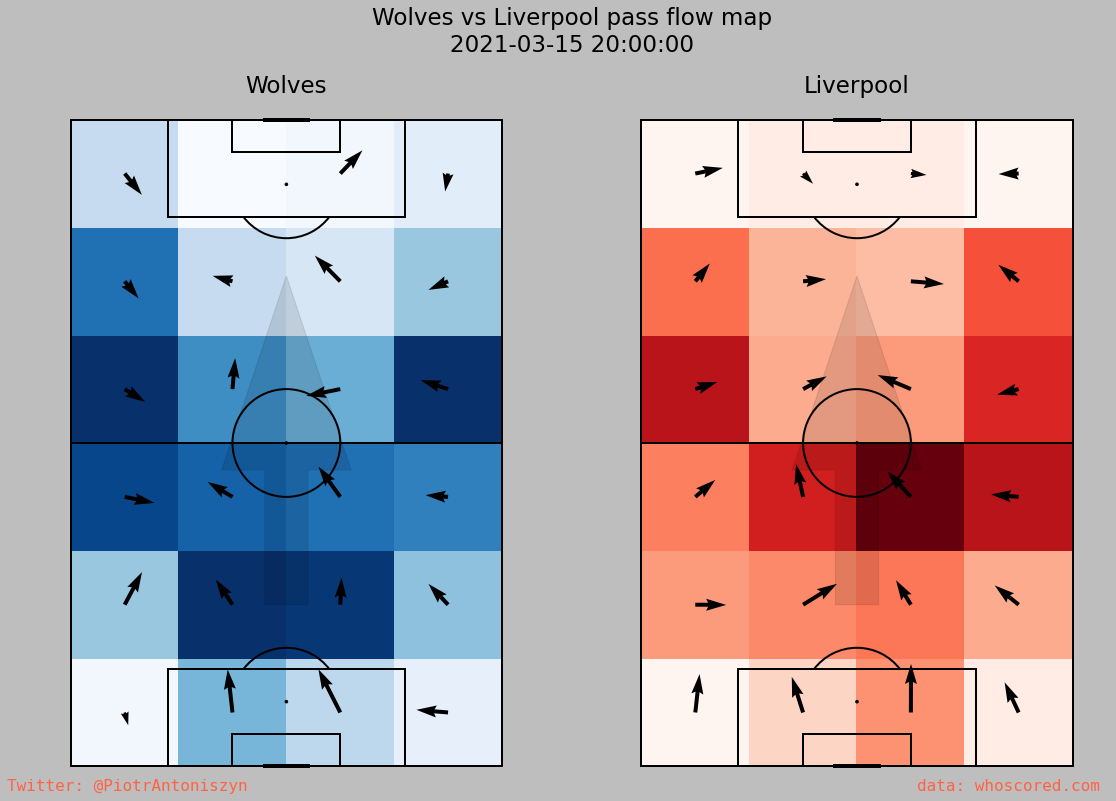

In [28]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', figsize=(16, 11), layout=(1, 2), line_zorder=2,
              pitch_color='#BEBEBE', line_color='black', orientation='vertical')
# draw
fig, ax = pitch.draw()
# heatmap specified by (nx, ny) for horizontal pitch
bins = (6, 4)
#fig, ax = pitch.draw()
# plot the heatmap - darker colors = more passes originating from that square


bs_heatmap = pitch.bin_statistic(home_pass_df.x, home_pass_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax[0], cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(home_pass_df.x, home_pass_df.y, home_pass_df.endX, home_pass_df.endY, color='black', arrow_type='scale',
                arrow_length=9, bins=bins, ax=ax[0])
bs_heatmap = pitch.bin_statistic(away_pass_df.x, away_pass_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax[1], cmap='Reds')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(away_pass_df.x, away_pass_df.y, away_pass_df.endX, away_pass_df.endY, color='black', arrow_type='scale',
                arrow_length=9, bins=bins, ax=ax[1])
#ax.set_title("{} pass flow map vs {}".format(home['name'],away['name']), fontsize=30, pad=-20)
fig.set_facecolor('#BEBEBE')
sup = fig.suptitle("{} vs {} pass flow map\n{} {}".format(home['name'],away['name'],xg_data['startTime'][:10],xg_data['startTime'][11:20]),size=23, y=1,color='black')
arrow = mpatches.Arrow(20.0,20.0,0.0,25.0,color='black',width=15,alpha=0.4,figure=fig)
ax[0].set_title("{}".format(home['name']), size=23, y=1, color='black')
ax[1].set_title("{}".format(away['name']), size=23, y=1, color='black')
fig.text(.01,.01,'Twitter: @PiotrAntoniszyn ',fontstyle='normal',fontsize=16,fontfamily='monospace',color='#FF6347')
fig.text(.80,.01,'data: whoscored.com ',fontstyle='normal',fontsize=16,fontfamily='monospace',color='#FF6347')
ax[0].arrow(40.0,30.0,0.0,25.0,color='black',width=8,alpha=0.1)  
ax[1].arrow(40.0,30.0,0.0,25.0,color='black',width=8,alpha=0.1)  